# Data Preparation (merge BC data and satellite data)

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import DataFrame
from pycaret.regression import *

In [34]:
csv3 = pd.read_csv(r"D:\phd\Chapter_3\Data\1316cover.csv")
csv6 = pd.read_csv(r"D:\phd\Chapter_3\Data\1619cover.csv")
csv9 = pd.read_csv(r"D:\phd\Chapter_3\Data\1921cover.csv")
combine = csv3.append(csv6).append(csv9)
combine['target'] =  combine.water_area - combine.veg_area/combine.water_area
combine.count()

Unnamed: 0       951
date             951
sensor           951
veg_area         951
water_area       951
percent_cover    951
target           951
dtype: int64

In [35]:
import dateutil.parser as parser
datep = []
for date in combine['date']:
    d = parser.parse(str(date))
    datep.append(d)
combine['date'] = datep

combine.head()

,Unnamed: 0,date,sensor,veg_area,water_area,percent_cover,target
0,0,2013-05-05,L8,0.474836,18.172297,0.026130,18.146168
1,1,2013-05-21,L8,3.553265,18.172297,0.195532,17.976766
2,2,2013-06-06,L8,2.810621,18.386816,0.152861,18.233956
3,3,2013-06-22,L8,1.036538,18.386816,0.056374,18.330442
4,4,2013-07-08,L8,0.446783,18.437337,0.024232,18.413105


In [36]:
combine.dtypes

Unnamed: 0                int64
date             datetime64[ns]
sensor                   object
veg_area                float64
water_area              float64
percent_cover           float64
target                  float64
dtype: object

In [37]:
cov3 = pd.read_csv(r"D:\phd\Chapter_3\Data\1216covariates.csv")
cov6 = pd.read_csv(r"D:\phd\Chapter_3\Data\1621covariates.csv")
covcombine = cov3.append(cov6)
covcombine.count()

Unnamed: 0                    2748
maximum_2m_air_temperature    2748
mean_2m_air_temperature       2748
minimum_2m_air_temperature    2748
total_precipitation           2748
wind_speed                    2748
winddir                       2748
date                          2748
dtype: int64

In [38]:
datep = []
for date in covcombine['date']:
    d = parser.parse(str(date))
    datep.append(d)
covcombine['date'] = datep

covcombine.head()

,Unnamed: 0,maximum_2m_air_temperature,mean_2m_air_temperature,minimum_2m_air_temperature,total_precipitation,wind_speed,winddir,date
0,0,29.016931,22.799219,19.153192,0.002159,0.736165,12.648188,2012-12-31
1,1,29.639581,24.007410,18.737177,0.002530,1.081049,128.652657,2013-01-01
2,2,27.580469,22.239343,19.093439,0.004687,1.812260,50.933189,2013-01-02
3,3,26.402979,22.483942,19.018427,0.001060,1.974387,301.192032,2013-01-03
4,4,32.694330,25.549951,18.912134,0.000000,0.965553,181.194019,2013-01-04


In [39]:
covcombine.dtypes

Unnamed: 0                             int64
maximum_2m_air_temperature           float64
mean_2m_air_temperature              float64
minimum_2m_air_temperature           float64
total_precipitation                  float64
wind_speed                           float64
winddir                              float64
date                          datetime64[ns]
dtype: object

In [40]:
merge = combine.merge(covcombine, on=['date'], how='outer')
# merge.dropna(inplace=True)
print(merge.isna().sum())
merge

Unnamed: 0_x                  2128
date                             0
sensor                        2128
veg_area                      2128
water_area                    2128
percent_cover                 2128
target                        2128
Unnamed: 0_y                   207
maximum_2m_air_temperature     207
mean_2m_air_temperature        207
minimum_2m_air_temperature     207
total_precipitation            207
wind_speed                     207
winddir                        207
dtype: int64


,Unnamed: 0_x,date,sensor,veg_area,water_area,percent_cover,target,Unnamed: 0_y,maximum_2m_air_temperature,mean_2m_air_temperature,minimum_2m_air_temperature,total_precipitation,wind_speed,winddir
0,0.0,2013-05-05,L8,0.474836,18.172297,0.026130,18.146168,125.0,21.864648,13.249994,4.476831,0.000000e+00,1.480745,143.104192
1,1.0,2013-05-21,L8,3.553265,18.172297,0.195532,17.976766,141.0,23.838464,14.414240,7.023889,0.000000e+00,0.426737,214.481214
2,2.0,2013-06-06,L8,2.810621,18.386816,0.152861,18.233956,157.0,23.551141,14.799707,6.932886,0.000000e+00,0.454797,268.764428
3,3.0,2013-06-22,L8,1.036538,18.386816,0.056374,18.330442,173.0,22.953333,11.474634,2.462274,0.000000e+00,0.871391,173.284775
4,4.0,2013-07-08,L8,0.446783,18.437337,0.024232,18.413105,189.0,22.253107,14.206964,7.922144,1.862645e-09,0.333566,333.491481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3074,NaN,2020-07-04,NaN,NaN,NaN,NaN,NaN,1281.0,20.935938,11.596429,3.989282,-4.284084e-08,0.843617,258.040859
3075,NaN,2020-07-06,NaN,NaN,NaN,NaN,NaN,1283.0,24.496637,13.576776,2.044336,-4.284084e-08,0.257199,182.764829
3076,NaN,2020-07-07,NaN,NaN,NaN,NaN,NaN,1284.0,24.199213,14.299005,5.540582,0.000000e+00,0.542385,177.738231
3077,NaN,2020-07-08,NaN,NaN,NaN,NaN,NaN,1285.0,19.164056,13.499200,9.071771,0.000000e+00,4.201706,65.570226


# BC data

In [41]:
from datetime import datetime, timedelta

dates = pd.read_csv(r"D:\phd\Chapter_3\T_series\1inputs\hartees_wh_BC_release_dates.csv", sep = ';')
dates = dates[['DATE RELEASED']]
dates.drop_duplicates(inplace = True)
dates = dates['DATE RELEASED'].dropna().tolist()
print('Number of releases:', len(dates))

bcrdates = []
for date in dates:
    d = datetime.strptime(date, '%d/%m/%Y')
    bcrdates.append(str(d))
print('Release dates:', bcrdates)

dates_df = []
days_since_df = []
for i in range (len(bcrdates)):
    if i>(len(bcrdates)-2):
        break
    else:
        startd = bcrdates[i]
        endd = bcrdates [i+1]
        dates = pd.date_range(start= startd, end= str(datetime.strptime(endd, '%Y-%m-%d  %H:%M:%S')- timedelta(days=1)))
        d = DataFrame(dates, columns = ['date'])
        days_since = [k for k in range(len(d.index))]
        days_since = DataFrame(days_since, columns = ['days_since'])
        dates_df.append(d)
        days_since_df.append(days_since)

Number of releases: 19
Release dates: ['2018-05-10 00:00:00', '2018-10-18 00:00:00', '2018-11-15 00:00:00', '2018-11-23 00:00:00', '2018-11-30 00:00:00', '2018-12-07 00:00:00', '2019-01-25 00:00:00', '2019-02-01 00:00:00', '2019-02-22 00:00:00', '2019-03-28 00:00:00', '2019-04-05 00:00:00', '2019-05-17 00:00:00', '2019-05-16 00:00:00', '2020-10-07 00:00:00', '2019-10-24 00:00:00', '2019-11-01 00:00:00', '2019-11-08 00:00:00', '2020-09-30 00:00:00', '2020-10-14 00:00:00']


In [42]:
rdf = pd.read_csv(r"D:\phd\Chapter_3\T_series\1inputs\hartees_wh_BC_release_dates.csv", sep = ';')
rdf = rdf[['DATE RELEASED','BIOCONTROL AGENT', 'NUMBER RELEASED']].dropna()
rdf['NUMBER RELEASED']= pd.to_numeric(rdf['NUMBER RELEASED'].str.replace(' ',''))
rdf['Total_release'] = rdf.groupby(['DATE RELEASED'])['NUMBER RELEASED'].transform('sum')
rdf['No_releases'] = rdf.groupby(['DATE RELEASED'])['NUMBER RELEASED'].transform('count')
rdf.drop_duplicates('DATE RELEASED',inplace = True)

pd.DataFrame(dates)
bdf = pd.DataFrame()
for i in range (0, len(dates_df)):
    dates = dates_df[i]
    days = days_since_df[i]
    data = pd.DataFrame(rdf.iloc[i,:]).T
    replicates = int(len(days)-1)
    #print('check',replicates) 
    data = data.append([data]*replicates, ignore_index=True)
    bdf = bdf.append(pd.concat([pd.DataFrame(dates), pd.DataFrame(days), data], ignore_index =True, axis=1))
bdf.columns = ['date', 'days_since_bcrelease', *rdf.columns]
bdf = bdf.drop(['NUMBER RELEASED', 'DATE RELEASED'], axis=1)
# bdf.to_csv(r"D:\phd\Chapter_3\T_series\1inputs\days_since_release.csv")

In [43]:
bdf.dropna(inplace=True)

datep = []
for date in bdf['date']:
    d = parser.parse(str(date))
    datep.append(d)
bdf['date'] = datep

def is_release(row):
    if row['days_since_bcrelease']==0:
        return 1
    return 0
bdf['Release'] = bdf.apply(lambda row: is_release(row), axis=1)

bdf.head()

,date,days_since_bcrelease,BIOCONTROL AGENT,Total_release,No_releases,Release
0,2018-05-10,0,Megamelus scutellaris,12000,3,1
1,2018-05-11,1,Megamelus scutellaris,12000,3,0
2,2018-05-12,2,Megamelus scutellaris,12000,3,0
3,2018-05-13,3,Megamelus scutellaris,12000,3,0
4,2018-05-14,4,Megamelus scutellaris,12000,3,0


In [44]:
# bcrdf = pd.read_csv(r"D:\phd\Chapter_3\T_series\1inputs\days_since_release.csv", sep =',')
bdf['date'] = pd.to_datetime(bdf['date'])
# concat_test = pd.concat([test, bcrdf])

outer_merged = pd.merge(merge, bdf, how = "right", on = "date")
outer_merged = outer_merged.dropna(subset=['days_since_bcrelease','mean_2m_air_temperature'])
outer_merged['target'] = outer_merged.veg_area/(outer_merged.veg_area+outer_merged.water_area)
print(bdf.shape)
print(outer_merged.shape)

(1238, 6)
(1127, 19)


In [45]:
outer_merged.isna().sum()

Unnamed: 0_x                  660
date                            0
sensor                        660
veg_area                      660
water_area                    660
percent_cover                 660
target                        660
Unnamed: 0_y                    0
maximum_2m_air_temperature      0
mean_2m_air_temperature         0
minimum_2m_air_temperature      0
total_precipitation             0
wind_speed                      0
winddir                         0
days_since_bcrelease            0
BIOCONTROL AGENT                0
Total_release                   0
No_releases                     0
Release                         0
dtype: int64

In [46]:
ohe = pd.get_dummies(outer_merged['BIOCONTROL AGENT'], prefix='agent')
df = pd.concat([outer_merged,ohe], axis=1)
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['week'] = df['date'].dt.week
df['day_of_year'] = df['date'].dt.day_of_year
df = df.drop(['Unnamed: 0_x', 'water_area', 'veg_area', 'percent_cover', 'Unnamed: 0_y', 'sensor', 'BIOCONTROL AGENT'],axis=1)

In [47]:
df.days_since_bcrelease = df.days_since_bcrelease.astype('int64')
df.Total_release = df.Total_release.astype('int64')
df.No_releases = df.No_releases.astype('int64')
df = df.sort_values(by = ['date']).reset_index(drop=True)
df.dtypes

date                           datetime64[ns]
target                                float64
maximum_2m_air_temperature            float64
mean_2m_air_temperature               float64
minimum_2m_air_temperature            float64
total_precipitation                   float64
wind_speed                            float64
winddir                               float64
days_since_bcrelease                    int64
Total_release                           int64
No_releases                             int64
Release                                 int64
agent_Eccritotarsus                     uint8
agent_Megamelus scutellaris             uint8
year                                    int64
month                                   int64
week                                    int64
day_of_year                             int64
dtype: object

In [48]:
df.shape

(1127, 18)

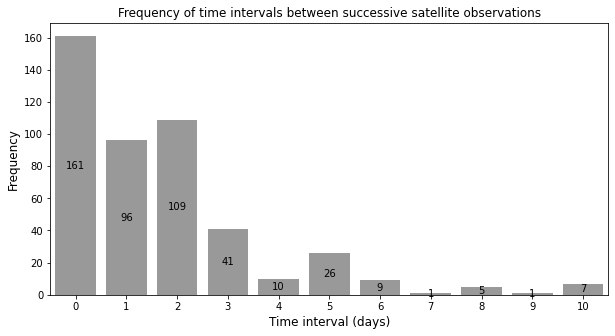

In [49]:
#plot frequency of interval between observations

import seaborn as sns
intdf = df.dropna().date.diff().value_counts().sort_index(ascending=False)
intdf.index = [10, 9, 8, 7, 6, 5,4,3,2,1, 0]
intdf.index

plt.figure(figsize=(10,5))
ax = sns.barplot(intdf.index, intdf.values, alpha=0.8, color ='grey')
ax.bar_label(ax.containers[0], label_type = 'center')
plt.title('Frequency of time intervals between successive satellite observations')
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Time interval (days)', fontsize=12)
plt.savefig(r'D:\phd\Chapter_3\Figures\interval_all3.png', dpi = 400, transparent=True, bbox_inches='tight')

In [50]:
df = df.groupby('date').mean().reset_index()
df

,date,target,maximum_2m_air_temperature,mean_2m_air_temperature,minimum_2m_air_temperature,total_precipitation,wind_speed,winddir,days_since_bcrelease,Total_release,No_releases,Release,agent_Eccritotarsus,agent_Megamelus scutellaris,year,month,week,day_of_year
0,2018-05-10,0.165258,26.522852,17.613062,8.112390,0.000000e+00,0.261637,313.844770,0.0,12000.0,3.0,1.0,0.0,1.0,2018.0,5.0,19.0,130.0
1,2018-05-11,NaN,24.422784,16.947992,9.399744,0.000000e+00,0.278435,340.822923,1.0,12000.0,3.0,0.0,0.0,1.0,2018.0,5.0,19.0,131.0
2,2018-05-12,NaN,23.488458,17.520380,12.514612,2.278760e-05,1.216463,333.924787,2.0,12000.0,3.0,0.0,0.0,1.0,2018.0,5.0,19.0,132.0
3,2018-05-13,0.213294,23.028894,14.790155,6.545099,0.000000e+00,0.804805,256.183548,3.0,12000.0,3.0,0.0,0.0,1.0,2018.0,5.0,19.0,133.0
4,2018-05-14,NaN,13.785669,11.226282,7.129388,6.532650e-03,1.100936,97.385230,4.0,12000.0,3.0,0.0,0.0,1.0,2018.0,5.0,20.0,134.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,2020-07-05,0.031168,24.210443,11.952325,1.998590,0.000000e+00,2.391072,181.235949,328.0,5500.0,1.0,0.0,0.5,0.5,2020.0,7.0,27.0,187.0
788,2020-07-06,NaN,24.496637,13.576776,2.044336,-4.284084e-08,0.257199,182.764829,329.0,5500.0,1.0,0.0,0.5,0.5,2020.0,7.0,28.0,188.0
789,2020-07-07,NaN,24.199213,14.299005,5.540582,0.000000e+00,0.542385,177.738231,330.0,5500.0,1.0,0.0,0.5,0.5,2020.0,7.0,28.0,189.0
790,2020-07-08,NaN,19.164056,13.499200,9.071771,0.000000e+00,4.201706,65.570226,331.0,5500.0,1.0,0.0,0.5,0.5,2020.0,7.0,28.0,190.0


In [51]:
%load_ext rpy2.ipython

R[write to console]: Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



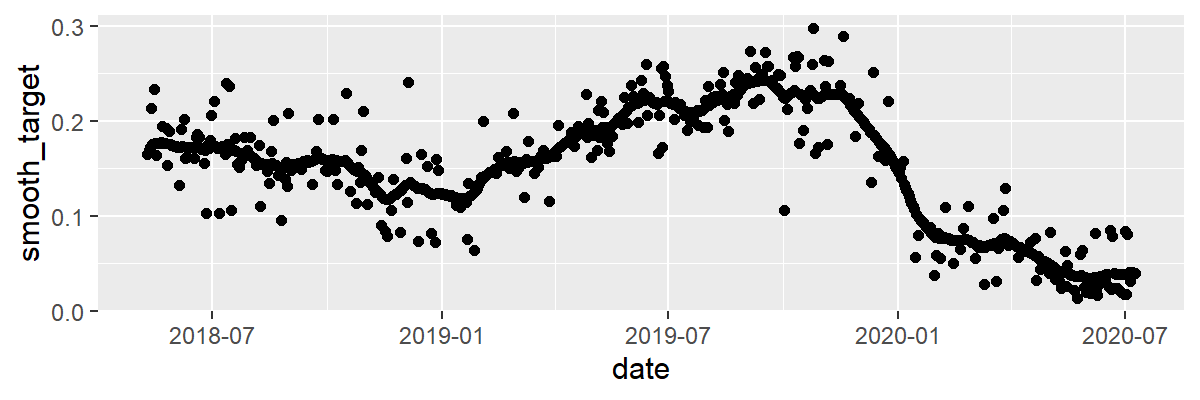

In [52]:
%%R -i df -w 6 -h 2 --units in -r 200 

smooth_target <- imputeTS::na_kalman(df$target,model = 'StructTS', smooth=TRUE)
library(ggplot2)
ggplot(df, aes(x=date, y=smooth_target)) + geom_point()

In [53]:
%Rpull smooth_target
df['impute_target'] = pd.DataFrame(smooth_target)
df

,date,target,maximum_2m_air_temperature,mean_2m_air_temperature,minimum_2m_air_temperature,total_precipitation,wind_speed,winddir,days_since_bcrelease,Total_release,No_releases,Release,agent_Eccritotarsus,agent_Megamelus scutellaris,year,month,week,day_of_year,impute_target
0,2018-05-10,0.165258,26.522852,17.613062,8.112390,0.000000e+00,0.261637,313.844770,0.0,12000.0,3.0,1.0,0.0,1.0,2018.0,5.0,19.0,130.0,0.165258
1,2018-05-11,NaN,24.422784,16.947992,9.399744,0.000000e+00,0.278435,340.822923,1.0,12000.0,3.0,0.0,0.0,1.0,2018.0,5.0,19.0,131.0,0.169660
2,2018-05-12,NaN,23.488458,17.520380,12.514612,2.278760e-05,1.216463,333.924787,2.0,12000.0,3.0,0.0,0.0,1.0,2018.0,5.0,19.0,132.0,0.171965
3,2018-05-13,0.213294,23.028894,14.790155,6.545099,0.000000e+00,0.804805,256.183548,3.0,12000.0,3.0,0.0,0.0,1.0,2018.0,5.0,19.0,133.0,0.213294
4,2018-05-14,NaN,13.785669,11.226282,7.129388,6.532650e-03,1.100936,97.385230,4.0,12000.0,3.0,0.0,0.0,1.0,2018.0,5.0,20.0,134.0,0.175563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,2020-07-05,0.031168,24.210443,11.952325,1.998590,0.000000e+00,2.391072,181.235949,328.0,5500.0,1.0,0.0,0.5,0.5,2020.0,7.0,27.0,187.0,0.031168
788,2020-07-06,NaN,24.496637,13.576776,2.044336,-4.284084e-08,0.257199,182.764829,329.0,5500.0,1.0,0.0,0.5,0.5,2020.0,7.0,28.0,188.0,0.040487
789,2020-07-07,NaN,24.199213,14.299005,5.540582,0.000000e+00,0.542385,177.738231,330.0,5500.0,1.0,0.0,0.5,0.5,2020.0,7.0,28.0,189.0,0.040332
790,2020-07-08,NaN,19.164056,13.499200,9.071771,0.000000e+00,4.201706,65.570226,331.0,5500.0,1.0,0.0,0.5,0.5,2020.0,7.0,28.0,190.0,0.040177


0 val


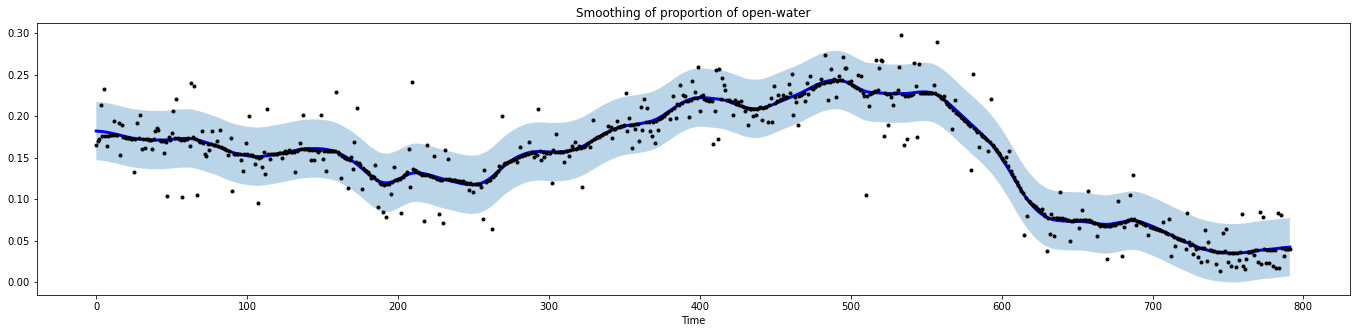

In [70]:
#Smooth data

# import libraries
import numpy as np
import matplotlib.pyplot as plt
from tsmoothie.utils_func import sim_randomwalk
from tsmoothie.smoother import LowessSmoother, DecomposeSmoother, GaussianSmoother, KalmanSmoother

# operate smoothing
smoother = KalmanSmoother(component='level_trend',component_noise={'level':0, 'trend':0.0003})
smoother.smooth(df.impute_target)

# generate intervals
low, up = smoother.get_intervals('sigma_interval')

# plot the smoothed timeseries with intervals
plt.figure(figsize=(80,5))

for i in range(1):
    print(i,'val')
    
    plt.subplot(1,3,i+1)
    plt.plot(smoother.smooth_data[i], linewidth=3, color='blue')
    plt.plot(smoother.data[i], '.k')
    plt.title("Smoothing of proportion of open-water"); plt.xlabel('Time')

    plt.fill_between(range(len(smoother.data[i])), low[i], up[i], alpha=0.3)

In [72]:
df['smooth_target'] = smoother.smooth_data[0,:]

In [73]:
indices = list(range(0,13))+ list(range(14,17))
indices

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16]

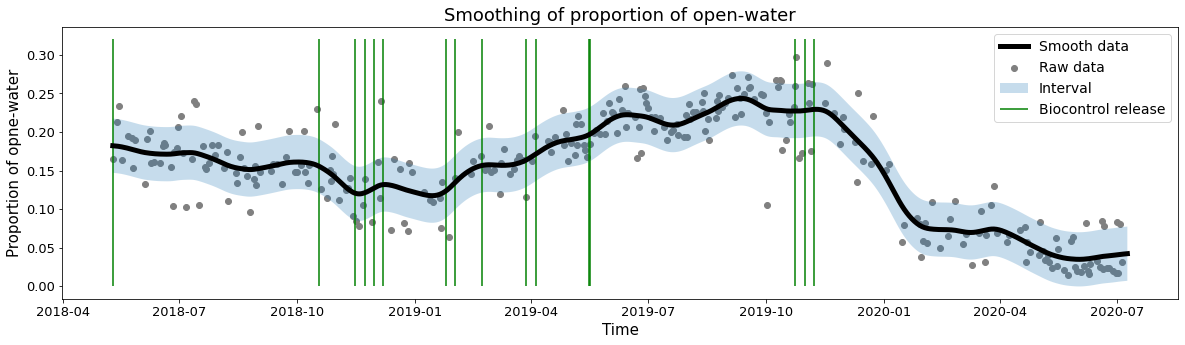

In [74]:
plt.figure(figsize=(20,5))

plt.scatter(df.date, df.target, color ='grey', label = 'Raw data', linewidth= 1)
plt.plot(df.date, df.smooth_target, color ='k', label= 'Smooth data', linewidth=5)
plt.fill_between(df.date, low[0], up[0], alpha=0.25, label = 'Interval')
plt.vlines([bcrdates[index] for index in indices], ymin=0 , ymax=0.32, color='green' , label = 'Biocontrol release')
plt.legend(fontsize=14)

plt.title("Smoothing of proportion of open-water", size =18);
plt.xlabel('Time', size = 15);
plt.ylabel('Proportion of opne-water', size=15)
plt.xticks(size=13)
plt.yticks(size=13)
plt.savefig(r'D:\phd\Chapter_3\Figures\smooth_data.png', dpi = 400, transparent=True, bbox_inches='tight')

In [75]:
df.smooth_target.kurtosis()

-0.8149908053568669

In [36]:
df

,maximum_2m_air_temperature,mean_2m_air_temperature,minimum_2m_air_temperature,total_precipitation,wind_speed,winddir,days_since_bcrelease,Total_release,No_releases,Release,agent_Eccritotarsus,agent_Megamelus scutellaris,year,month,week,day_of_year,smooth_target
0,0.556313,0.438137,0.358698,1.126934e-06,0.040661,0.871461,0.000000,0.583333,1.0,1.0,0.0,1.0,0.0,0.363636,0.352941,0.354396,0.633802
1,0.464590,0.407037,0.418033,1.126934e-06,0.043793,0.946610,0.005747,0.583333,1.0,0.0,0.0,1.0,0.0,0.363636,0.352941,0.357143,0.632955
2,0.423782,0.433803,0.561598,3.008425e-04,0.218650,0.927395,0.011494,0.583333,1.0,0.0,0.0,1.0,0.0,0.363636,0.352941,0.359890,0.632065
3,0.403710,0.306133,0.286462,1.126934e-06,0.141913,0.710844,0.017241,0.583333,1.0,0.0,0.0,1.0,0.0,0.363636,0.352941,0.362637,0.631067
4,0.000000,0.139479,0.313392,8.592228e-02,0.197115,0.268504,0.022989,0.583333,1.0,0.0,0.0,1.0,0.0,0.363636,0.372549,0.365385,0.629877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,0.455315,0.173430,0.076912,1.126934e-06,0.437608,0.502074,1.885057,0.041667,0.0,0.0,0.5,0.5,1.0,0.545455,0.509804,0.510989,-0.205341
788,0.467815,0.249393,0.079021,5.634672e-07,0.039834,0.506333,1.890805,0.041667,0.0,0.0,0.5,0.5,1.0,0.545455,0.529412,0.513736,-0.204311
789,0.454825,0.283166,0.240163,1.126934e-06,0.092996,0.492331,1.896552,0.041667,0.0,0.0,0.5,0.5,1.0,0.545455,0.529412,0.516484,-0.203303
790,0.234908,0.245765,0.402916,1.126934e-06,0.775127,0.179882,1.902299,0.041667,0.0,0.0,0.5,0.5,1.0,0.545455,0.529412,0.519231,-0.202306


In [76]:
df.to_csv(r"D:\phd\Chapter_3\Data\smooth_perc_water_unscaled.csv")

# Modelling

In [77]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime as dt
from dateutil.relativedelta import *

class TimeBasedCV(object):
    '''
    Parameters 
    ----------
    train_period: int
        number of time units to include in each train set
        default is 30
    test_period: int
        number of time units to include in each test set
        default is 7
    freq: string
        frequency of input parameters. possible values are: days, months, years, weeks, hours, minutes, seconds
        possible values designed to be used by dateutil.relativedelta class
        deafault is days
    '''
    
    
    def __init__(self, train_period=30, test_period=7, freq='days'):
        self.train_period = train_period
        self.test_period = test_period
        self.freq = freq

        
        
    def split(self, data, validation_split_date=None, date_column='record_date', gap=0):
        '''
        Generate indices to split data into training and test set
        
        Parameters 
        ----------
        data: pandas DataFrame
            your data, contain one column for the record date 
        validation_split_date: datetime.date()
            first date to perform the splitting on.
            if not provided will set to be the minimum date in the data after the first training set
        date_column: string, deafult='record_date'
            date of each record
        gap: int, default=0
            for cases the test set does not come right after the train set,
            *gap* days are left between train and test sets
        
        Returns 
        -------
        train_index ,test_index: 
            list of tuples (train index, test index) similar to sklearn model selection
        '''
        
        # check that date_column exist in the data:
        try:
            data[date_column]
        except:
            raise KeyError(date_column)
                    
        train_indices_list = []
        test_indices_list = []

        if validation_split_date==None:
            validation_split_date = data[date_column].min().date() + eval('relativedelta('+self.freq+'=self.train_period)')
        
        start_train = validation_split_date - eval('relativedelta('+self.freq+'=self.train_period)')
        end_train = start_train + eval('relativedelta('+self.freq+'=self.train_period)')
        start_test = end_train + eval('relativedelta('+self.freq+'=gap)')
        end_test = start_test + eval('relativedelta('+self.freq+'=self.test_period)')

        while end_test < data[date_column].max().date():
            # train indices:
            cur_train_indices = list(data[(data[date_column].dt.date>=start_train) & 
                                     (data[date_column].dt.date<end_train)].index)

            # test indices:
            cur_test_indices = list(data[(data[date_column].dt.date>=start_test) &
                                    (data[date_column].dt.date<end_test)].index)
            
            print("Train period:",start_train,"-" , end_train, ", Test period", start_test, "-", end_test,
                  "# train records", len(cur_train_indices), ", # test records", len(cur_test_indices))

            train_indices_list.append(cur_train_indices)
            test_indices_list.append(cur_test_indices)

            # update dates:
            start_train = start_train + eval('relativedelta('+self.freq+'=self.test_period)')
            end_train = start_train + eval('relativedelta('+self.freq+'=self.train_period)')
            start_test = end_train + eval('relativedelta('+self.freq+'=gap)')
            end_test = start_test + eval('relativedelta('+self.freq+'=self.test_period)')

        # mimic sklearn output  
        index_output = [(train,test) for train,test in zip(train_indices_list,test_indices_list)]

        self.n_splits = len(index_output)
        
        return index_output
    
    
    def get_n_splits(self):
        """Returns the number of splitting iterations in the cross-validator
        Returns
        -------
        n_splits : int
            Returns the number of splitting iterations in the cross-validator.
        """
        return self.n_splits 

In [78]:
import pandas as pd

def series_to_supervised(data, colnames, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
    data: Sequence of observations as a list or NumPy array.
    colnames: Names of features
    n_in: Number of lag observations as input (X).
    n_out: Number of observations as output (y).
    dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
    Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('%s(t-%d)' % (colnames[j], i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('%s(t)' % (colnames[j])) for j in range(n_vars)]
        else:
            names += [('%s(t+%d)' % (colnames[j], i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [5]:
df = pd.read_csv(r"D:\phd\Chapter_3\Data\smooth_perc_water_unscaled.csv", parse_dates = ['date'])

In [6]:
df.drop(['target', 'impute_target', 'Unnamed: 0'], axis=1, inplace=True)
print(df.shape)
df.head()

(792, 18)


,date,maximum_2m_air_temperature,mean_2m_air_temperature,minimum_2m_air_temperature,total_precipitation,wind_speed,winddir,days_since_bcrelease,Total_release,No_releases,Release,agent_Eccritotarsus,agent_Megamelus scutellaris,year,month,week,day_of_year,smooth_target
0,2018-05-10,26.522852,17.613062,8.112390,0.000000,0.261637,313.844770,0.0,12000.0,3.0,1.0,0.0,1.0,2018.0,5.0,19.0,130.0,0.182087
1,2018-05-11,24.422784,16.947992,9.399744,0.000000,0.278435,340.822923,1.0,12000.0,3.0,0.0,0.0,1.0,2018.0,5.0,19.0,131.0,0.181945
2,2018-05-12,23.488458,17.520380,12.514612,0.000023,1.216463,333.924787,2.0,12000.0,3.0,0.0,0.0,1.0,2018.0,5.0,19.0,132.0,0.181796
3,2018-05-13,23.028894,14.790155,6.545099,0.000000,0.804805,256.183548,3.0,12000.0,3.0,0.0,0.0,1.0,2018.0,5.0,19.0,133.0,0.181628
4,2018-05-14,13.785669,11.226282,7.129388,0.006533,1.100936,97.385230,4.0,12000.0,3.0,0.0,0.0,1.0,2018.0,5.0,20.0,134.0,0.181429


In [82]:
# How to use TimeBasedCV
tscv = TimeBasedCV(train_period=240,
                   test_period=180,
                   freq='days')

#### Example- compute average test sets score: ####
X = df.drop('smooth_target', axis=1)
y = df['smooth_target']

from sklearn.linear_model import LinearRegression, OrthogonalMatchingPursuit
from sklearn.metrics import mean_squared_error
from math import sqrt

scores = []
for train_index, test_index in tscv.split(X, validation_split_date=datetime.date(2019,1,15), date_column = 'date'):

    data_train   = X.loc[train_index].drop('date', axis=1)
    target_train = y.loc[train_index]

    data_test    = X.loc[test_index].drop('date', axis=1)
    target_test  = y.loc[test_index]

    # if needed, do preprocessing here

    clf = OrthogonalMatchingPursuit()
    clf.fit(data_train,target_train)

    yhat = clf.predict(data_test)

    # accuracy for the current fold only
    rms = sqrt(mean_squared_error(target_test, yhat))

    scores.append(rms)

# this is the average accuracy over all folds
average_rms = np.mean(scores)
print(average_rms)

#### End of example ####

# #### Example- RandomizedSearchCV ####
# from sklearn.model_selection import RandomizedSearchCV
# from lightgbm import LGBMRegressor
# from random import randint, uniform

# tscv = TimeBasedCV(train_period=10, test_period=3)
# index_output = tscv.split(data_for_modeling, validation_split_date=datetime.date(2019,2,1))

# lgbm = LGBMRegressor()

# lgbmPd = {" max_depth": [-1,2]
#          }

# model = RandomizedSearchCV(
#     estimator = lgbm,
#     param_distributions = lgbmPd,
#     n_iter = 10,
#     n_jobs = -1,
#     iid = True,
#     cv = index_output,
#     verbose=5,
#     pre_dispatch='2*n_jobs',
#     random_state = None,
#     return_train_score = True)

# model.fit(X.drop('date', axis=1),y)
# model.cv_results_
#### End of example ####

Train period: 2018-05-20 - 2019-01-15 , Test period 2019-01-15 - 2019-07-14 # train records 240 , # test records 180
Train period: 2018-11-16 - 2019-07-14 , Test period 2019-07-14 - 2020-01-10 # train records 240 , # test records 180
Train period: 2019-05-15 - 2020-01-10 , Test period 2020-01-10 - 2020-07-08 # train records 240 , # test records 180
0.05616918050791601


# Multi-step LSTM

In [83]:
from sklearn.linear_model import LinearRegression, OrthogonalMatchingPursuit
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import gc

import tensorflow as tf
import keras
from keras import backend as K
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, TimeDistributed, Conv1D, MaxPooling1D, Flatten, Bidirectional, Input, Flatten, Activation, Reshape, RepeatVector, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

from tensorflow.keras.layers import Bidirectional, LSTM, Multiply
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.layers import Concatenate, Add, GRU
from tensorflow.keras.layers import BatchNormalization

from sklearn.preprocessing import RobustScaler

def inverse_transform(ytest, yhat):
    yhat_reshaped = yhat.flatten().reshape(-1, 1)
    yhat_copies = np.repeat(yhat_reshaped, n_features, axis=-1)
    yhat_inverse = scaler.inverse_transform(yhat_copies)[:,-1]
    yhat = yhat_inverse.reshape(Y_test.shape[0],n_steps_out)
    
    ytest_reshaped = ytest.flatten().reshape(-1, 1)
    ytest_copies = np.repeat(ytest_reshaped, n_features, axis=-1)
    ytest_inverse = scaler.inverse_transform(ytest_copies)[:,-1]
    ytest = ytest_inverse.reshape(Y_test.shape[0],n_steps_out)
    return yhat, ytest
    
def evaluate_forecast(y_test_inverse, yhat_inverse):
    
    mse_ = tf.keras.losses.MeanSquaredError()
    mae_ = tf.keras.losses.MeanAbsoluteError()
    mape_ = tf.keras.losses.MeanAbsolutePercentageError()
        
    mae = mae_(y_test_inverse,yhat_inverse).numpy()
    print('mae:', mae)
    mse = mse_(y_test_inverse,yhat_inverse).numpy()
    print('mse:', mse)
    mape = mape_(y_test_inverse,yhat_inverse).numpy()
    print('mape:', mape)
    return mae,mse, mape

colnames = [
 'maximum_2m_air_temperature',
 'mean_2m_air_temperature',
 'minimum_2m_air_temperature',
 'total_precipitation',
 'wind_speed',
 'winddir',
 'days_since_bcrelease',
 'Total_release',
 'No_releases',
 'Release',
 'agent_Eccritotarsus',
 'agent_Megamelus scutellaris',
 'year',
 'month',
 'week',
 'day_of_year', 'smooth_target']

In [ ]:
# Use Keras's Sequential API to build the model architecture
model = keras.models.Sequential()
model.add(keras.layers.LSTM(256, input_shape=(n_timesteps, n_features), return_sequences=True))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(128, activation='relu'))

model.add(keras.layers.Bidirectional(keras.layers.LSTM(128, return_sequences=True)))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(64, activation='relu'))

model.add(keras.layers.Bidirectional(keras.layers.LSTM(64, return_sequences=True)))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(32, activation='relu'))

model.add(keras.layers.Bidirectional(keras.layers.LSTM(32, return_sequences=True)))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(16, activation='relu'))

model.add(keras.layers.LSTM(16, activation='relu', return_sequences=False))
model.add(keras.layers.Dense(n_outputs, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(learning_rate= 0.001) ,metrics=['accuracy'])

print(model.summary())

In [7]:
# Use Keras's Sequential API to build the model architecture
def create_new_model():
    model = keras.models.Sequential()
    model.add(keras.layers.LSTM(256, input_shape=(n_steps_in+1, n_features), return_sequences=True))
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Dense(128, activation='relu'))

    model.add(keras.layers.Bidirectional(keras.layers.LSTM(128, return_sequences=True)))
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Dense(64, activation='relu'))

    model.add(keras.layers.Bidirectional(keras.layers.LSTM(64, return_sequences=True)))
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Dense(32, activation='relu'))

    model.add(keras.layers.Bidirectional(keras.layers.LSTM(32, return_sequences=True)))
    model.add(keras.layers.Dense(32, activation='relu'))
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Dense(16, activation='relu'))

    model.add(keras.layers.LSTM(16, activation='relu', return_sequences=False))
    model.add(keras.layers.Dense(n_steps_out, activation='linear'))
    return model

earlyStopping = EarlyStopping(monitor='val_loss', patience=100, verbose=0, mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=7, verbose=1, min_lr= 0.0001, mode='min')

# Time based CV

In [84]:
# Obtain the correct input and output dimensions for the model
train_period = 250
test_period = 120
lag_steps = 30
horizon = 1
n_steps_in, n_features, n_steps_out = lag_steps-1, len(colnames), horizon

tscv = TimeBasedCV(train_period = train_period,
                   test_period = test_period,
                   freq='days')

epochs = 2000
batch_size= 128
validation = 0.1

Train period: 2018-05-10 - 2019-01-15 , Test period 2019-01-15 - 2019-05-15 # train records 250 , # test records 120
Train period: 2018-09-07 - 2019-05-15 , Test period 2019-05-15 - 2019-09-12 # train records 250 , # test records 120
Train period: 2019-01-05 - 2019-09-12 , Test period 2019-09-12 - 2020-01-10 # train records 250 , # test records 120
Train period: 2019-05-05 - 2020-01-10 , Test period 2020-01-10 - 2020-05-09 # train records 250 , # test records 120
(221, 30, 17) (221, 1)
(91, 30, 17) (91, 1)
Epoch 1/2000
2/2 [==============================] - ETA: 0s - loss: 101.0755 - mape: 101.0755 
Epoch 00001: val_loss improved from inf to 99.98675, saving model to C3_transformer_1.hdf5
2/2 [==============================] - 32s 17s/step - loss: 101.0755 - mape: 101.0755 - val_loss: 99.9867 - val_mape: 99.9867 - lr: 0.0010
Epoch 2/2000
2/2 [==============================] - ETA: 0s - loss: 115.7187 - mape: 115.7187 
Epoch 00002: val_loss improved from 99.98675 to 86.94141, saving mod

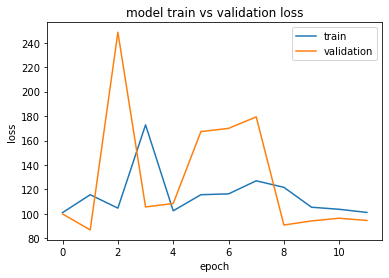

3/3 [==============================] - 5s 2s/step
mae: 0.012241661
mse: 0.00030727164
mape: 8.675291
(221, 30, 17) (221, 1)
(91, 30, 17) (91, 1)
Epoch 1/2000
2/2 [==============================] - ETA: 0s - loss: 97.1354 - mape: 97.1354 
Epoch 00001: val_loss improved from inf to 70.86411, saving model to C3_transformer_2.hdf5
2/2 [==============================] - 33s 16s/step - loss: 97.1354 - mape: 97.1354 - val_loss: 70.8641 - val_mape: 70.8641 - lr: 0.0010
Epoch 2/2000
2/2 [==============================] - ETA: 0s - loss: 229.5620 - mape: 229.5620 
Epoch 00002: val_loss did not improve from 70.86411
2/2 [==============================] - 23s 12s/step - loss: 229.5620 - mape: 229.5620 - val_loss: 98.8483 - val_mape: 98.8483 - lr: 0.0010
Epoch 3/2000
2/2 [==============================] - ETA: 0s - loss: 96.2860 - mape: 96.2860   
Epoch 00003: val_loss did not improve from 70.86411
2/2 [==============================] - 23s 12s/step - loss: 96.2860 - mape: 96.2860 - val_loss: 96.81

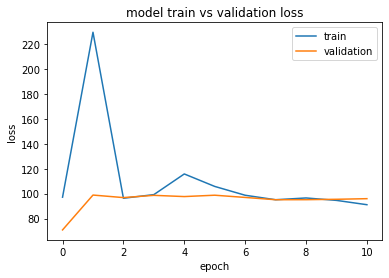

3/3 [==============================] - 5s 2s/step
mae: 0.05750293
mse: 0.0033475484
mape: 26.696136
(221, 30, 17) (221, 1)
(91, 30, 17) (91, 1)
Epoch 1/2000
2/2 [==============================] - ETA: 0s - loss: 106.2092 - mape: 106.2092
Epoch 00001: val_loss improved from inf to 243.20619, saving model to C3_transformer_3.hdf5
2/2 [==============================] - 36s 20s/step - loss: 106.2092 - mape: 106.2092 - val_loss: 243.2062 - val_mape: 243.2062 - lr: 0.0010
Epoch 2/2000
2/2 [==============================] - ETA: 0s - loss: 105.7728 - mape: 105.7728
Epoch 00002: val_loss did not improve from 243.20619
2/2 [==============================] - 27s 14s/step - loss: 105.7728 - mape: 105.7728 - val_loss: 348.0645 - val_mape: 348.0645 - lr: 0.0010
Epoch 3/2000


KeyboardInterrupt: 

In [85]:
maecv = list()
msecv = list()
mapecv = list()

i = 0

X = df.drop(['smooth_target'], axis=1)
y = df['smooth_target']

for train_index, test_index in tscv.split(df, validation_split_date=datetime.date(2019,1,15), date_column = 'date'):
    i+=1 #counter to save new model and allows reset model for next iteration

    #Subset train and test datasets for each fold
    data_train   = X.loc[train_index].drop(['date'], axis=1)
    target_train = y.loc[train_index]
    
    data_test    = X.loc[test_index].drop(['date'], axis=1)
    target_test = y.loc[test_index]
    
    #preprocessing
    #Scale data
    scaler = RobustScaler()
    scaled_train = pd.DataFrame(scaler.fit_transform(pd.concat([data_train, target_train], axis=1)), columns =colnames)
    scaled_test = pd.DataFrame(scaler.transform(pd.concat([data_test, target_test], axis=1)), columns =colnames)
    
    #Format data (samples, timesteps, features)
    #Train
    #get lag steps and horizon
    X_train = series_to_supervised(scaled_train.values, scaled_train.columns, n_in = n_steps_in)

    Y_train = series_to_supervised(scaled_train.values, scaled_train.columns, n_out = n_steps_out+1)
    Y_train = Y_train[[col for col in Y_train if col.startswith('smooth_target(t+')]]

    # Make shapes compatible
    if X_train.shape[0]>Y_train.shape[0]:
        X_train = X_train.iloc[0:Y_train.shape[0]]
    else:
        Y_train = Y_train.iloc[0:X_train.shape[0]]

    #convert to arrays
    X_train = X_train.values.reshape(X_train.shape[0], n_steps_in+1, n_features)
    Y_train = np.array(Y_train)

    #Test
    X_test = series_to_supervised(scaled_test.values, scaled_test.columns, n_in = n_steps_in)

    Y_test = series_to_supervised(scaled_test.values, scaled_test.columns, n_out = n_steps_out+1)
    Y_test = Y_test[[col for col in Y_test if col.startswith('smooth_target(t+')]]

    # Make shapes compatible
    if X_test.shape[0]>Y_test.shape[0]:
        X_test = X_test.iloc[0:Y_test.shape[0]]
    else:
        Y_test = Y_test.iloc[0:X_test.shape[0]]

    #convert to arrays
    X_test = X_test.values.reshape(X_test.shape[0], n_steps_in+1, n_features)
    Y_test = np.array(Y_test)
    
    print(X_train.shape, Y_train.shape)
    print(X_test.shape, Y_test.shape)
    
    # Use Keras's Sequential API to build the model architecture
    model = create_new_model()
    model.compile(loss= 'mape', optimizer= tf.keras.optimizers.Adam(learning_rate= 0.001) ,metrics=['mape'], run_eagerly=True, sample_weight_mode='temporal')
    
    #fit model
    model_checkpoint = ModelCheckpoint(f'C3_transformer_{i}.hdf5', monitor='val_loss', mode ='min', verbose=1, save_best_only=True)
    history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_data= (X_test, Y_test), shuffle = False,callbacks=[earlyStopping, model_checkpoint, reduce_lr_loss])
    
    # plot learning curves
    plt.plot(history.history['loss'])
    plt.plot(history.history[ 'val_loss' ])
    plt.title( 'model train vs validation loss' )
    plt.ylabel( 'loss' )
    plt.xlabel( 'epoch' )
    plt.legend([ 'train' , 'validation' ], loc= 'upper right' )
    plt.show()
    
    #forecast
    yhat = model.predict(X_test, verbose=1)
    
    #evaluate for fold
    yhat_inverse, y_test_inverse = inverse_transform(Y_test, yhat)
    mae, mse, mape = evaluate_forecast(y_test_inverse, yhat_inverse)
    #append fold results
    maecv.append(mae)
    msecv.append(mse)
    mapecv.append(mape)

# Average metrics over 4 folds
average_maecv = np.mean(maecv)
average_msecv = np.mean(msecv)
average_mapecv = np.mean(mapecv)

print(average_maecv, average_msecv, average_mapecv)

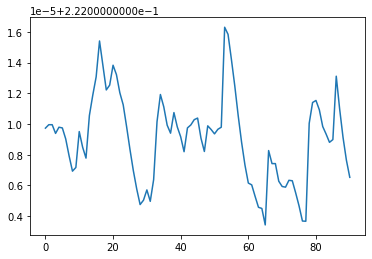

In [29]:
plt.plot(yhat_inverse)

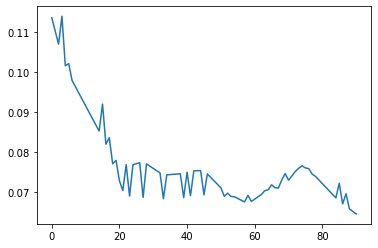

In [32]:
plt.plot(y_test_inverse)

In [ ]:
model1.summary()

In [18]:
print(mapecv)
yhat_inverse.shape

[9.743123, 31.571852, 89.09452]


(89, 60)

In [19]:
print(mapecv)
yhat_inverse.shape

[8.548127, 27.612234, 19.04752, 193.70976]


(91, 1)

In [20]:
model1 = tf.keras.models.load_model(r'C:\Users\G10\C3_transformer_1.hdf5')
model2 = tf.keras.models.load_model(r'C:\Users\G10\C3_transformer_2.hdf5')
model3 = tf.keras.models.load_model(r'C:\Users\G10\C3_transformer_3.hdf5')

In [23]:
yhat = model1.predict(X_test, verbose=1)
    
#evaluate for fold
yhat_inverse1, y_test_inverse1 = inverse_transform(Y_test, yhat)
mae, mse, mape = evaluate_forecast(y_test_inverse1, yhat_inverse1)

yhat = model2.predict(X_test, verbose=1)
    
#evaluate for fold
yhat_inverse2, y_test_inverse2 = inverse_transform(Y_test, yhat)
mae, mse, mape = evaluate_forecast(y_test_inverse2, yhat_inverse2)

yhat = model3.predict(X_test, verbose=1)
    
#evaluate for fold
yhat_inverse3, y_test_inverse3 = inverse_transform(Y_test, yhat)
mae, mse, mape = evaluate_forecast(y_test_inverse3, yhat_inverse3)

3/3 [==============================] - 2s 667ms/step
mae: 0.14363901
mse: 0.02075241
mape: 191.70718
3/3 [==============================] - 2s 581ms/step
mae: 0.14649393
mse: 0.021638788
mape: 195.83226
3/3 [==============================] - 2s 586ms/step
mae: 0.14305611
mse: 0.020585412
mape: 190.93692


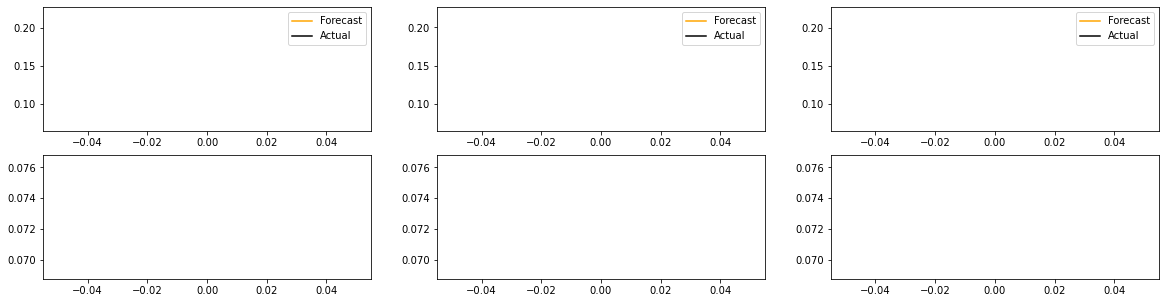

In [22]:
import matplotlib.pyplot as plt
plot_index = 20

fig, axs = plt.subplots(2, 3, figsize= (20,5))
axs[0,0].plot(pd.DataFrame(yhat_inverse1).iloc[plot_index], color='orange', label = 'Forecast')
axs[0,0].plot(pd.DataFrame(y_test_inverse1).iloc[plot_index], color= 'k', label = 'Actual')
axs[0,0].legend()

axs[1,0].plot(pd.DataFrame(y_test_inverse1).iloc[plot_index], color= 'k')

axs[0,1].plot(pd.DataFrame(yhat_inverse2).iloc[plot_index], color='orange', label = 'Forecast')
axs[0,1].plot(pd.DataFrame(y_test_inverse2).iloc[plot_index], color= 'k', label = 'Actual')
axs[0,1].legend()

axs[1,1].plot(pd.DataFrame(y_test_inverse3).iloc[plot_index], color= 'k')

axs[0,2].plot(pd.DataFrame(yhat_inverse3).iloc[plot_index], color='orange', label = 'Forecast')
axs[0,2].plot(pd.DataFrame(y_test_inverse3).iloc[plot_index], color= 'k', label = 'Actual')
axs[0,2].legend()

axs[1,2].plot(pd.DataFrame(y_test_inverse3).iloc[plot_index], color= 'k')

# Deploy model

In [14]:
def train_test_split(X, y, proportion):
    Xtrain = X.iloc[0:round(len(X)*proportion),:]
    Xtest = X.iloc[round(len(X)*proportion):len(y)+1,:]
    ytrain = y.iloc[0:round(len(y)*proportion)]
    ytest = y.iloc[round(len(y)*proportion):len(y)+1]
    return Xtrain, ytrain, Xtest, ytest


model_checkpoint = ModelCheckpoint('ai4eo_02012022.hdf5', monitor='val_loss', mode ='min', verbose=1, save_best_only=True)
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=7, verbose=1, min_lr= 0.0001, mode='min')

In [15]:
maecv = list()
msecv = list()
mapecv = list()

X = df.drop(['smooth_target'], axis=1)
y = df['smooth_target']

#Subset train and test datasets for each fold
# X_train, y_train, X_test, y_test = train_test_split(X,y, 0.5)

data_train   = X.drop(['date'], axis=1)
target_train = y
    
data_test    = X.drop(['date'], axis=1)
target_test = y
    
#preprocessing
#Scale data
scaler = RobustScaler()
scaled_train = pd.DataFrame(scaler.fit_transform(pd.concat([data_train, target_train], axis=1)), columns =colnames)
scaled_test = pd.DataFrame(scaler.transform(pd.concat([data_test, target_test], axis=1)), columns =colnames)
    
#Format data (samples, timesteps, features)
#Train
#get lag steps and horizon
X_train = series_to_supervised(scaled_train.values, scaled_train.columns, n_in = n_steps_in)

Y_train = series_to_supervised(scaled_train.values, scaled_train.columns, n_out = n_steps_out+1)
Y_train = Y_train[[col for col in Y_train if col.startswith('smooth_target(t+')]]

# Make shapes compatible
if X_train.shape[0]>Y_train.shape[0]:
        X_train = X_train.iloc[0:Y_train.shape[0]]
else:
        Y_train = Y_train.iloc[0:X_train.shape[0]]
#convert to arrays
X_train = X_train.values.reshape(X_train.shape[0], n_steps_in+1, n_features)
Y_train = np.array(Y_train)

#Test
X_test = series_to_supervised(scaled_test.values, scaled_test.columns, n_in = n_steps_in)

Y_test = series_to_supervised(scaled_test.values, scaled_test.columns, n_out = n_steps_out+1)
Y_test = Y_test[[col for col in Y_test if col.startswith('smooth_target(t+')]]
    
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)
    
#fit model
model = create_new_model()
model.compile(loss= 'mape', optimizer= tf.keras.optimizers.Adam(learning_rate= 0.001) ,metrics=['mape'], run_eagerly=True, sample_weight_mode='temporal')
    
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_split=validation,callbacks=[earlyStopping, model_checkpoint, reduce_lr_loss])
    
#forecast
yhat = model.predict(X_test, verbose=1)
    
#evaluate for fold
yhat_inverse, y_test_inverse = inverse_transform(Y_test, yhat)
mae, mse, mape = evaluate_forecast(y_test_inverse, yhat_inverse)
#append fold results
maecv.append(mae)
msecv.append(mse)
mapecv.append(mape)

# Average metrics over 4 folds
average_maecv = np.mean(maecv)
average_msecv = np.mean(msecv)
average_mapecv = np.mean(mapecv)

print(average_maecv)

(763, 30, 17) (763, 1)
(763, 510) (790, 1)
Epoch 1/2000
6/6 [==============================] - ETA: 0s - loss: 209.5421 - mape: 209.5421
Epoch 00001: val_loss improved from inf to 100.01177, saving model to ai4eo_02012022.hdf5
6/6 [==============================] - 68s 11s/step - loss: 209.5421 - mape: 209.5421 - val_loss: 100.0118 - val_mape: 100.0118 - lr: 0.0010
Epoch 2/2000
6/6 [==============================] - ETA: 0s - loss: 136.0659 - mape: 136.0659 
Epoch 00002: val_loss did not improve from 100.01177
6/6 [==============================] - 61s 10s/step - loss: 136.0659 - mape: 136.0659 - val_loss: 100.1841 - val_mape: 100.1841 - lr: 0.0010
Epoch 3/2000
2/6 [=========>....................] - ETA: 41s - loss: 116.2044 - mape: 116.2044

KeyboardInterrupt: 

<Figure size 720x360 with 0 Axes>

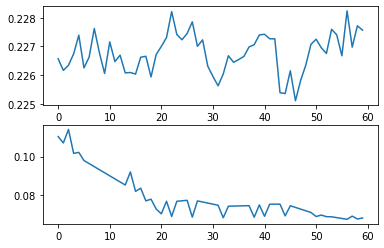

In [90]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
fig, (ax1, ax2) = plt.subplots(2)

ax1.plot(pd.DataFrame(yhat_inverse).iloc[1])
ax2.plot(pd.DataFrame(y_test_inverse).iloc[1])

# Supervised models

In [1]:
import pandas as pd

def series_to_supervised(data, colnames, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
    data: Sequence of observations as a list or NumPy array.
    colnames: Names of features
    n_in: Number of lag observations as input (X).
    n_out: Number of observations as output (y).
    dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
    Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('%s(t-%d)' % (colnames[j], i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('%s(t)' % (colnames[j])) for j in range(n_vars)]
        else:
            names += [('%s(t+%d)' % (colnames[j], i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [2]:
def train_test_split(X, y, proportion):
    Xtrain = X.iloc[0:round(len(X)*proportion),:]
    Xtest = X.iloc[round(len(X)*proportion):len(y)+1,:]
    ytrain = y.iloc[0:round(len(y)*proportion),:]
    ytest = y.iloc[round(len(y)*proportion):len(y)+1,:]
    return Xtrain, ytrain, Xtest, ytest

In [7]:
X = df.drop(['smooth_target','date'],axis=1)
y= df[['smooth_target']]

In [8]:
X_train, y_train, X_test, y_test = train_test_split(X,y, 0.8)

In [9]:
# Scale data
from sklearn.preprocessing import MinMaxScaler

train_df = pd.concat([X_train,y_train], axis =1)
test_df = pd.concat([X_test, y_test], axis=1)

scaler = MinMaxScaler(feature_range=(0,1))
scaler = scaler.fit(train_df)
train_df = pd.DataFrame(scaler.transform(train_df),index = train_df.index,columns= train_df.columns)
test_df = pd.DataFrame(scaler.transform(test_df),index= test_df.index,columns= test_df.columns)

In [10]:
df = pd.concat([train_df,test_df])
df.head()

,maximum_2m_air_temperature,mean_2m_air_temperature,minimum_2m_air_temperature,total_precipitation,wind_speed,winddir,days_since_bcrelease,Total_release,No_releases,Release,agent_Eccritotarsus,agent_Megamelus scutellaris,year,month,week,day_of_year,smooth_target
0,0.556313,0.438137,0.358698,0.000001,0.040661,0.871461,0.000000,0.583333,1.0,1.0,0.0,1.0,0.0,0.363636,0.352941,0.354396,0.633802
1,0.464590,0.407037,0.418033,0.000001,0.043793,0.946610,0.005747,0.583333,1.0,0.0,0.0,1.0,0.0,0.363636,0.352941,0.357143,0.632955
2,0.423782,0.433803,0.561598,0.000301,0.218650,0.927395,0.011494,0.583333,1.0,0.0,0.0,1.0,0.0,0.363636,0.352941,0.359890,0.632065
3,0.403710,0.306133,0.286462,0.000001,0.141913,0.710844,0.017241,0.583333,1.0,0.0,0.0,1.0,0.0,0.363636,0.352941,0.362637,0.631067
4,0.000000,0.139479,0.313392,0.085922,0.197115,0.268504,0.022989,0.583333,1.0,0.0,0.0,1.0,0.0,0.363636,0.372549,0.365385,0.629877


In [11]:
df.to_csv(r"D:\phd\Chapter_3\Data\smooth_perc_water.csv")

In [12]:
# df = df.drop(['days_since_bcrelease', 'Total_release', 'No_releases','agent_Eccritotarsus', 'agent_Megamelus scutellaris'], axis=1)

In [13]:
data = series_to_supervised(df.values, df.columns, 2) 
# print(data.head())

In [14]:
data.columns

Index(['maximum_2m_air_temperature(t-2)', 'mean_2m_air_temperature(t-2)',
       'minimum_2m_air_temperature(t-2)', 'total_precipitation(t-2)',
       'wind_speed(t-2)', 'winddir(t-2)', 'days_since_bcrelease(t-2)',
       'Total_release(t-2)', 'No_releases(t-2)', 'Release(t-2)',
       'agent_Eccritotarsus(t-2)', 'agent_Megamelus scutellaris(t-2)',
       'year(t-2)', 'month(t-2)', 'week(t-2)', 'day_of_year(t-2)',
       'smooth_target(t-2)', 'maximum_2m_air_temperature(t-1)',
       'mean_2m_air_temperature(t-1)', 'minimum_2m_air_temperature(t-1)',
       'total_precipitation(t-1)', 'wind_speed(t-1)', 'winddir(t-1)',
       'days_since_bcrelease(t-1)', 'Total_release(t-1)', 'No_releases(t-1)',
       'Release(t-1)', 'agent_Eccritotarsus(t-1)',
       'agent_Megamelus scutellaris(t-1)', 'year(t-1)', 'month(t-1)',
       'week(t-1)', 'day_of_year(t-1)', 'smooth_target(t-1)',
       'maximum_2m_air_temperature(t)', 'mean_2m_air_temperature(t)',
       'minimum_2m_air_temperature(t)', 'to

In [15]:
X = data.drop(['smooth_target(t)'],axis=1)
y= data[['smooth_target(t)']]

In [16]:
X_train, y_train, X_test, y_test = train_test_split(X,y, 0.8)

In [17]:
train_df = pd.concat([X_train,y_train], axis =1)
test_df = pd.concat([X_test, y_test], axis=1)

In [20]:
exp_reg = setup(data= train_df,  train_size = 1.0, test_data= test_df, target= 'smooth_target(t)',use_gpu=True, fold_shuffle=True)

,Description,Value
0,session_id,8124
1,Target,smooth_target(t)
2,Original Data,"(632, 51)"
3,Missing Values,False
4,Numeric Features,50
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(632, 41)"


AttributeError: 'Simple_Imputer' object has no attribute 'fill_value_categorical'

In [231]:
compare_models(exclude =['huber', 'xgboost', 'lasso', 'en', 'llar'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0084,0.0002,0.0123,0.9971,0.0083,0.0440,1.0260
catboost,CatBoost Regressor,0.0116,0.0003,0.0160,0.9950,0.0108,0.0583,23.4690
knn,K Neighbors Regressor,0.0126,0.0003,0.0175,0.9942,0.0107,0.0407,0.0320
lightgbm,Light Gradient Boosting Machine,0.0124,0.0003,0.0174,0.9941,0.0115,0.0495,0.4770
rf,Random Forest Regressor,0.0125,0.0003,0.0177,0.9938,0.0118,0.0487,2.1970
gbr,Gradient Boosting Regressor,0.0151,0.0004,0.0201,0.9922,0.0132,0.0547,2.8430
dt,Decision Tree Regressor,0.0179,0.0008,0.0268,0.9858,0.0171,0.0674,0.0880
ada,AdaBoost Regressor,0.0270,0.0010,0.0322,0.9801,0.0209,0.0906,1.0760
omp,Orthogonal Matching Pursuit,0.0360,0.0021,0.0451,0.9612,0.0297,0.1019,0.0270
br,Bayesian Ridge,0.0362,0.0022,0.0464,0.9589,0.0319,0.1144,0.0700


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='squared_error',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                    oob_score=False, random_state=1047, verbose=0,
                    warm_start=False)

In [21]:
compare_models(exclude =['huber', 'xgboost', 'lasso', 'en', 'llar'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0019,0.0000,0.0028,0.9999,0.0020,0.0100,0.6300
lr,Linear Regression,0.0029,0.0000,0.0036,0.9998,0.0024,0.0133,0.0710
br,Bayesian Ridge,0.0029,0.0000,0.0036,0.9998,0.0024,0.0133,0.0310
omp,Orthogonal Matching Pursuit,0.0037,0.0000,0.0044,0.9996,0.0029,0.0137,0.0080
gbr,Gradient Boosting Regressor,0.0036,0.0000,0.0048,0.9996,0.0033,0.0116,0.3050
rf,Random Forest Regressor,0.0046,0.0000,0.0064,0.9992,0.0044,0.0212,0.9320
lightgbm,Light Gradient Boosting Machine,0.0045,0.0001,0.0075,0.9988,0.0059,0.0450,0.1310
catboost,CatBoost Regressor,0.0066,0.0001,0.0095,0.9983,0.0069,0.0538,2.7280
dt,Decision Tree Regressor,0.0066,0.0001,0.0097,0.9982,0.0067,0.0236,0.0160
ridge,Ridge Regression,0.0107,0.0002,0.0143,0.9961,0.0099,0.0608,0.0100


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='squared_error',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                    oob_score=False, random_state=8124, verbose=0,
                    warm_start=False)

In [241]:
# best_model = compare_models()

In [29]:
best_model = compare_models(include=['lr'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0029,0.0000,0.0036,0.9998,0.0024,0.0133,0.0090


In [30]:
from sklearn.metrics import mean_squared_error
from math import sqrt

y_hat = predict_model(best_model, test_df.drop('smooth_target(t)', axis =1))['Label']
rms = sqrt(mean_squared_error(test_df['smooth_target(t)'], y_hat))
print(rms)

0.016601027239732707


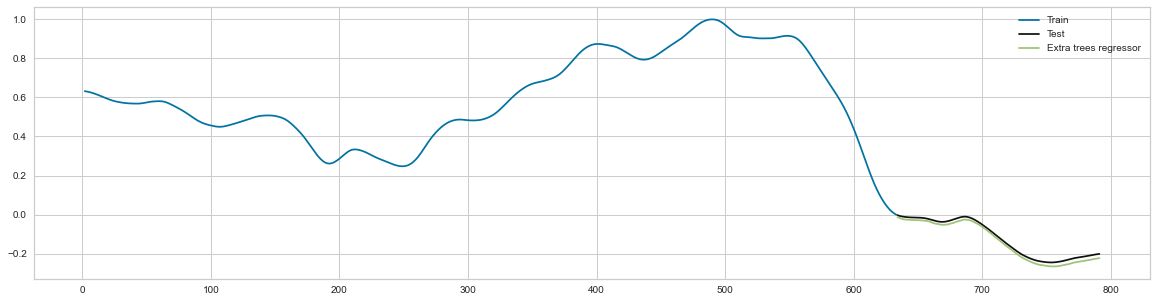

In [31]:
y_hat_ = test_df['smooth_target(t)'].copy()
y_hat_['normal'] = y_hat
plt.figure(figsize=(20,5))
# plt.plot(outer_merged['target'], label= 'Raw data', color= 'k', alpha=0.5)
plt.plot(train_df['smooth_target(t)'], label='Train')
plt.plot(test_df['smooth_target(t)'], label='Test', color ='k')
plt.plot(y_hat_['normal'], label= 'Extra trees regressor')#'Orthogonal Matching Pursuit'
plt.legend(loc='best')
plt.show()

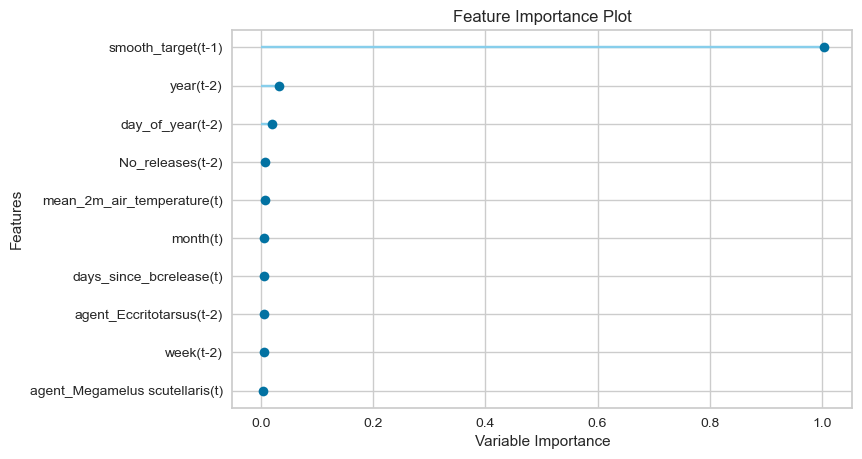

In [34]:
plot_model(best_model, plot='feature')

# Bandit

In [34]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

In [35]:
def running_mean(data,window=50):
    c = data.shape[0] - window
    smoothened = np.zeros(c)
    conv = np.ones(window)
    for i in range(c):
        smoothened[i] = (data[i:i+window] @ conv)/window
    return smoothened

In [36]:
def one_hot_encode(pos, dim):
    vec = np.zeros(dim)
    vec[pos] = 1
    return vec

In [37]:
def softmax(data, tau=1.2):
    softm = np.exp(data) / np.sum(np.exp(data))
    return softm

In [38]:
class Environment(object):
    
    def __init__(self, model):
        self.model = model
        self.setArm()
        self._update_states()
        
    def setArm(self, arm = None):
        np.random.seed(None)
        self.arm = arm if arm else np.random.randint(0, 2)
    
    def getArm(self):
        return self.arm
    
    def _update_states(self, data = df, step = None):
        self.data = data
        self.step = step if step else np.random.randint(30, self.data.shape[0]-61)
        data = self._get_data()
        self.creward = predict_model(self.model, data = data)
        if (self.arm == 0):# and (self.data.at[self.step, 'Release'] == 1):
            self.data.at[self.step, 'Release'] = 0
#             day_since = self.data.at[self.step-1, 'days_since_bcrelease'].astype('int32')
#             nrows = (self.data.iloc[self.step:self.data.shape[0]]).shape[0]
#             self.data.at[self.step:self.data.shape[0],'days_since_bcrelease'] = list(range(day_since, nrows))
        if self.arm == 1:
            self.data.at[self.step, 'Release'] = 1
#             nrows = (self.data.iloc[self.step:self.data.shape[0]]).shape[0]
#             self.data.at[self.step:self.data.shape[0],'days_since_bcrelease'] = list(range(0, nrows))
    
    def _get_data(self):
        data = self.data.iloc[self.step-30: self.step + 61]
        return series_to_supervised(data.values, data.columns, 30)
    
    def get_state(self):
        return torch.flatten(torch.Tensor(np.array(self._get_data().values.astype('float32'))))
        
    def get_reward(self, arm):
        self.setArm(arm)
        self._update_states()
        data = self._get_data()
        self.reward = predict_model(self.model, data = data)
        return sum(self.reward['Label'].rolling(window=2).apply(lambda x: x.iloc[1] - x.iloc[0]).dropna())

In [39]:
env = Environment(model= best_model)

In [49]:
# print(env.data.iloc[env.step-30: env.step + 61].shape)
env.setArm()
env.getArm()
print(env.get_reward(env.arm))
print(env.arm, env.step)

0.027111477993789268
1 308


In [44]:
env.reward

,maximum_2m_air_temperature(t-30),mean_2m_air_temperature(t-30),minimum_2m_air_temperature(t-30),total_precipitation(t-30),wind_speed(t-30),winddir(t-30),days_since_bcrelease(t-30),Total_release(t-30),No_releases(t-30),Release(t-30),...,wind_speed(t),winddir(t),days_since_bcrelease(t),Total_release(t),No_releases(t),Release(t),agent_Eccritotarsus(t),agent_Megamelus scutellaris(t),smooth_target(t),Label
30,0.178567,0.140250,0.298002,0.000557,0.067715,0.950307,0.101695,0.000000,0.0,0.0,...,0.162463,0.350803,0.401937,0.083333,0.0,0.0,0.0,1.0,0.938435,0.941134
31,0.298885,0.283892,0.410152,0.001106,0.483032,0.060625,0.188862,0.000000,0.0,0.0,...,0.162463,0.350803,0.828087,0.000000,0.0,0.0,1.0,0.0,0.939104,0.949738
32,0.502036,0.405555,0.436352,0.000005,0.000000,0.598544,0.217918,0.000000,0.0,0.0,...,0.162463,0.350803,0.401937,0.083333,0.0,0.0,0.0,1.0,0.941256,0.950990
33,0.224701,0.196419,0.349226,0.000005,0.531332,0.147487,0.276029,0.000000,0.0,0.0,...,0.157451,0.774492,0.866828,0.000000,0.0,0.0,1.0,0.0,0.945266,0.951132
34,0.377134,0.350747,0.482857,0.006490,0.836056,0.264258,0.334140,0.000000,0.0,0.0,...,0.157451,0.774492,0.440678,0.083333,0.0,0.0,0.0,1.0,0.949054,0.946114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,0.650394,0.669945,0.780973,0.020251,0.386691,0.275220,0.164649,0.083333,0.0,0.0,...,0.212735,0.523728,0.387409,0.083333,0.0,0.0,0.0,1.0,0.916020,0.922742
87,0.732025,0.713334,0.791527,0.011678,0.107189,0.353865,0.619855,0.000000,0.0,0.0,...,0.407444,0.372172,0.825666,0.000000,0.0,0.0,1.0,0.0,0.929270,0.940508
88,0.732025,0.713334,0.791527,0.011678,0.107189,0.353865,0.193705,0.083333,0.0,0.0,...,0.407444,0.372172,0.399516,0.083333,0.0,0.0,0.0,1.0,0.937682,0.951015
89,0.732025,0.713334,0.791527,0.011678,0.107189,0.353865,0.619855,0.000000,0.0,0.0,...,0.097242,0.985882,0.832930,0.000000,0.0,0.0,1.0,0.0,0.942500,0.954264


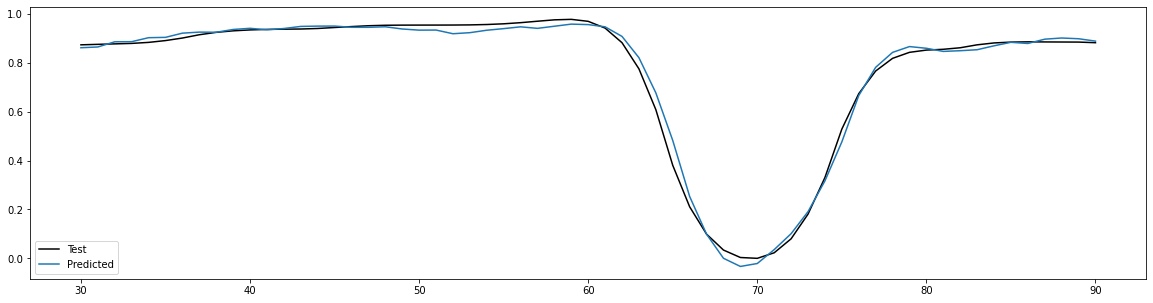

In [50]:
plt.figure(figsize=(20,5))
# plt.plot(outer_merged['target'], label= 'Raw data', color= 'k', alpha=0.5)
# plt.plot(train_df['smooth_target(t)'], label='Train')
plt.plot(env.reward['smooth_target(t)'], label='Test', color ='k')
plt.plot(env.reward['Label'], label= 'Predicted')#'Orthogonal Matching Pursuit'
plt.legend(loc='best')
plt.show()

In [334]:
env._get_data()

,maximum_2m_air_temperature(t-30),mean_2m_air_temperature(t-30),minimum_2m_air_temperature(t-30),total_precipitation(t-30),wind_speed(t-30),winddir(t-30),days_since_bcrelease(t-30),Total_release(t-30),No_releases(t-30),Release(t-30),...,total_precipitation(t),wind_speed(t),winddir(t),days_since_bcrelease(t),Total_release(t),No_releases(t),Release(t),agent_Eccritotarsus(t),agent_Megamelus scutellaris(t),smooth_target(t)
30,0.057642,0.011597,0.108086,0.000008,0.320489,0.201865,44.0,0.583333,1.0,1.0,...,0.000005,0.591047,0.714318,74.0,0.083333,0.0,1.0,0.0,1.0,0.989042
31,0.122296,0.040628,0.127447,0.000008,0.323217,0.243962,45.0,0.583333,1.0,1.0,...,0.000073,0.647563,0.532171,75.0,0.666667,0.5,1.0,0.0,1.0,0.990520
32,0.219612,0.099670,0.150425,0.000005,0.080771,0.509950,46.0,0.583333,1.0,1.0,...,0.002561,0.425686,0.961672,76.0,0.333333,0.0,1.0,0.0,1.0,0.991127
33,0.219612,0.099670,0.150425,0.000005,0.080771,0.509950,47.0,0.583333,1.0,1.0,...,0.000319,0.553202,0.905718,77.0,0.333333,0.0,1.0,0.0,1.0,0.990630
34,0.356905,0.174920,0.126897,0.000005,0.089636,0.298252,48.0,0.583333,1.0,1.0,...,0.000503,0.207795,0.757870,78.0,0.333333,0.0,1.0,0.0,1.0,0.988542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,0.409855,0.383372,0.420587,0.007028,0.107385,0.120439,7.0,0.416667,0.0,1.0,...,0.000005,0.437525,0.550405,37.0,0.000000,0.0,1.0,1.0,0.0,0.983510
87,0.460879,0.349431,0.392366,0.000005,0.113393,0.622831,8.0,0.416667,0.0,1.0,...,0.000005,0.437525,0.550405,38.0,0.000000,0.0,1.0,1.0,0.0,0.981205
88,0.470125,0.333609,0.383348,0.000005,0.144788,0.691516,9.0,0.416667,0.0,1.0,...,0.000005,0.135690,0.979240,39.0,0.000000,0.0,1.0,1.0,0.0,0.981414
89,0.477436,0.343028,0.330788,0.000005,0.063669,0.697879,10.0,0.000000,0.0,1.0,...,0.001115,0.052532,0.967009,40.0,0.000000,0.0,1.0,1.0,0.0,0.981865


In [51]:
n_arms = 2
n_actions = 2
# 24583
# 15128
model = nn.Sequential(
    nn.Linear(24583, 500),
    nn.ReLU(),
    nn.Linear(500, 50),
    nn.ReLU(),
    nn.Linear(50, n_actions),
    nn.ReLU()
)

In [52]:
print(model)

Sequential(
  (0): Linear(in_features=24583, out_features=500, bias=True)
  (1): ReLU()
  (2): Linear(in_features=500, out_features=50, bias=True)
  (3): ReLU()
  (4): Linear(in_features=50, out_features=2, bias=True)
  (5): ReLU()
)


In [53]:
def train_network(environ, net, epochs=2000, lr=1e-2):
    optimizer = optim.Adam(net.parameters(), lr=lr)
    criterion = nn.MSELoss()
    rewards = []
    losses = []
    for e in tqdm(range(1, epochs + 1)):
        print('arm', environ.getArm())
        state = env.get_state()
        rewards_pred = net(state)
        print('predicted rewards', rewards_pred)
        action_probas = softmax(rewards_pred.data.numpy().copy())
        print('action probs', action_probas)

        arm = np.random.choice(n_arms, p=action_probas)
        reward = environ.get_reward(arm)
        print('actual reward', reward)
        rewards.append(reward)

        true_rewards = rewards_pred.data.numpy().copy()
        true_rewards[arm] = reward 

        loss = criterion(rewards_pred, torch.Tensor(true_rewards))
        losses.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        for params in model.parameters():
            params.grad.data.clamp_(-1, 1)
        #nn.utils.clip_grad_norm_(model.parameters(), 0.5)
        optimizer.step()

    return (np.array(losses), np.array(rewards))

In [54]:
env = Environment(model= best_model)

In [55]:
losses, rewards = train_network(env, model)

  0%|                                                                                         | 0/2000 [00:00<?, ?it/s]

arm 0
predicted rewards tensor([0.0000, 0.1184], grad_fn=<ReluBackward0>)
action probs [0.470431 0.529569]
actual reward 0.0018442076781001182


  0%|                                                                               | 1/2000 [00:01<1:02:48,  1.89s/it]

arm 0
predicted rewards tensor([0.0000, 0.1267], grad_fn=<ReluBackward0>)
action probs [0.46837795 0.5316221 ]


  0%|                                                                                 | 2/2000 [00:02<46:10,  1.39s/it]

actual reward 0.0547508095484579
arm 1
predicted rewards tensor([0.0000, 0.1486], grad_fn=<ReluBackward0>)
action probs [0.46291536 0.5370846 ]


  0%|                                                                                 | 3/2000 [00:03<41:16,  1.24s/it]

actual reward 0.07454796893365717
arm 0
predicted rewards tensor([0.0000, 0.1283], grad_fn=<ReluBackward0>)
action probs [0.46796876 0.5320313 ]


  0%|▏                                                                                | 4/2000 [00:05<38:58,  1.17s/it]

actual reward -0.012685492048979508
arm 1
predicted rewards tensor([0.0000, 0.1344], grad_fn=<ReluBackward0>)
action probs [0.46645218 0.5335478 ]


  0%|▏                                                                                | 5/2000 [00:06<37:36,  1.13s/it]

actual reward -0.5183327551758681
arm 0
predicted rewards tensor([0.0000, 0.1313], grad_fn=<ReluBackward0>)
action probs [0.4672098  0.53279024]


  0%|▏                                                                                | 6/2000 [00:07<37:25,  1.13s/it]

actual reward -0.10890747385846894
arm 1
predicted rewards tensor([0.0000, 0.1330], grad_fn=<ReluBackward0>)
action probs [0.46678674 0.53321326]


  0%|▎                                                                                | 7/2000 [00:08<37:12,  1.12s/it]

actual reward -0.000504273979840264
arm 1
predicted rewards tensor([0.0000, 0.1067], grad_fn=<ReluBackward0>)
action probs [0.47334313 0.52665687]


  0%|▎                                                                                | 8/2000 [00:09<38:00,  1.14s/it]

actual reward -0.5183327551758681
arm 1
predicted rewards tensor([0.0000, 0.1314], grad_fn=<ReluBackward0>)
action probs [0.46718675 0.53281325]


  0%|▎                                                                                | 9/2000 [00:10<39:03,  1.18s/it]

actual reward -0.009520722597965436
arm 1
predicted rewards tensor([0.0000, 0.1272], grad_fn=<ReluBackward0>)
action probs [0.46823585 0.5317642 ]


  0%|▍                                                                               | 10/2000 [00:12<39:29,  1.19s/it]

actual reward 0.05745026904997319
arm 1
predicted rewards tensor([0.0000, 0.1542], grad_fn=<ReluBackward0>)
action probs [0.46151412 0.5384858 ]


  1%|▍                                                                               | 11/2000 [00:13<38:44,  1.17s/it]

actual reward -0.0323104086599153
arm 1
predicted rewards tensor([0.0000, 0.1246], grad_fn=<ReluBackward0>)
action probs [0.46888104 0.5311189 ]


  1%|▍                                                                               | 12/2000 [00:14<39:03,  1.18s/it]

actual reward -0.022467706687071654
arm 0
predicted rewards tensor([0.0000, 0.1405], grad_fn=<ReluBackward0>)
action probs [0.46493065 0.53506935]


  1%|▌                                                                               | 13/2000 [00:15<38:19,  1.16s/it]

actual reward -0.009281905151073855
arm 0
predicted rewards tensor([0.0000, 0.1565], grad_fn=<ReluBackward0>)
action probs [0.4609632 0.5390368]


  1%|▌                                                                               | 14/2000 [00:16<38:39,  1.17s/it]

actual reward -0.010976353901839708
arm 1
predicted rewards tensor([0.0000, 0.1209], grad_fn=<ReluBackward0>)
action probs [0.4698015  0.53019845]


  1%|▌                                                                               | 15/2000 [00:17<39:20,  1.19s/it]

actual reward 0.03491079311091061
arm 0
predicted rewards tensor([0.0000, 0.1145], grad_fn=<ReluBackward0>)
action probs [0.4713966 0.5286034]


  1%|▋                                                                               | 16/2000 [00:18<38:22,  1.16s/it]

actual reward -0.022238007060821463
arm 0
predicted rewards tensor([0.0000, 0.1332], grad_fn=<ReluBackward0>)
action probs [0.4667429 0.533257 ]


  1%|▋                                                                               | 17/2000 [00:20<37:47,  1.14s/it]

actual reward -0.01831465671010657
arm 1
predicted rewards tensor([0.0000, 0.1165], grad_fn=<ReluBackward0>)
action probs [0.47090587 0.5290941 ]


  1%|▋                                                                               | 18/2000 [00:21<39:10,  1.19s/it]

actual reward -0.015619140454821712
arm 0
predicted rewards tensor([0.0000, 0.1178], grad_fn=<ReluBackward0>)
action probs [0.4705916  0.52940834]


  1%|▊                                                                               | 19/2000 [00:22<39:24,  1.19s/it]

actual reward -0.09309324597062973
arm 0
predicted rewards tensor([0.0000, 0.1340], grad_fn=<ReluBackward0>)
action probs [0.46655175 0.5334482 ]


  1%|▊                                                                               | 20/2000 [00:23<39:44,  1.20s/it]

actual reward -0.02292759279698886
arm 1
predicted rewards tensor([0.0000, 0.1470], grad_fn=<ReluBackward0>)
action probs [0.4633171  0.53668284]


  1%|▊                                                                               | 21/2000 [00:24<39:26,  1.20s/it]

actual reward -0.036709132158468716
arm 0
predicted rewards tensor([0.0000, 0.1461], grad_fn=<ReluBackward0>)
action probs [0.46354625 0.5364538 ]


  1%|▉                                                                               | 22/2000 [00:26<38:20,  1.16s/it]

actual reward -0.07607040368923912
arm 1
predicted rewards tensor([0.0000, 0.1196], grad_fn=<ReluBackward0>)
action probs [0.47014642 0.5298535 ]


  1%|▉                                                                               | 23/2000 [00:27<37:42,  1.14s/it]

actual reward -0.09098071495672821
arm 0
predicted rewards tensor([0.0000, 0.1082], grad_fn=<ReluBackward0>)
action probs [0.47296578 0.5270343 ]


  1%|▉                                                                               | 24/2000 [00:28<37:14,  1.13s/it]

actual reward -0.021956527362347433
arm 1
predicted rewards tensor([0.0000, 0.1384], grad_fn=<ReluBackward0>)
action probs [0.46544433 0.5345557 ]


  1%|█                                                                               | 25/2000 [00:29<37:14,  1.13s/it]

actual reward 0.02044527940157337
arm 0
predicted rewards tensor([0.0000, 0.0931], grad_fn=<ReluBackward0>)
action probs [0.47673672 0.5232632 ]


  1%|█                                                                               | 26/2000 [00:30<37:44,  1.15s/it]

actual reward 0.010069009269143336
arm 1
predicted rewards tensor([0.0000, 0.1308], grad_fn=<ReluBackward0>)
action probs [0.46734828 0.5326517 ]


  1%|█                                                                               | 27/2000 [00:31<37:18,  1.13s/it]

actual reward 0.005371252135281446
arm 1
predicted rewards tensor([0.0000, 0.1385], grad_fn=<ReluBackward0>)
action probs [0.4654345  0.53456557]


  1%|█                                                                               | 28/2000 [00:32<36:58,  1.13s/it]

actual reward -0.06511430430274467
arm 1
predicted rewards tensor([0.0000, 0.1298], grad_fn=<ReluBackward0>)
action probs [0.4675946  0.53240544]


  1%|█▏                                                                              | 29/2000 [00:34<39:02,  1.19s/it]

actual reward 0.08316610212921782
arm 1
predicted rewards tensor([0.0000, 0.1400], grad_fn=<ReluBackward0>)
action probs [0.46505624 0.5349437 ]


  2%|█▏                                                                              | 30/2000 [00:35<38:19,  1.17s/it]

actual reward -0.07607040368923912
arm 0
predicted rewards tensor([0.0000, 0.1172], grad_fn=<ReluBackward0>)
action probs [0.47073072 0.5292693 ]


  2%|█▏                                                                              | 31/2000 [00:36<38:49,  1.18s/it]

actual reward -0.05263724357133148
arm 1
predicted rewards tensor([0.0000, 0.1539], grad_fn=<ReluBackward0>)
action probs [0.4615901 0.5384099]


  2%|█▎                                                                              | 32/2000 [00:37<38:21,  1.17s/it]

actual reward -0.016340156012534912
arm 0
predicted rewards tensor([0.0000, 0.0891], grad_fn=<ReluBackward0>)
action probs [0.47773814 0.5222618 ]


  2%|█▎                                                                              | 33/2000 [00:38<38:50,  1.19s/it]

actual reward 0.029992130722118593
arm 0
predicted rewards tensor([0.0000, 0.0967], grad_fn=<ReluBackward0>)
action probs [0.47583663 0.5241633 ]


  2%|█▎                                                                              | 34/2000 [00:40<39:15,  1.20s/it]

actual reward -0.041089288969296756
arm 1
predicted rewards tensor([0.0000, 0.1621], grad_fn=<ReluBackward0>)
action probs [0.45955846 0.5404416 ]


  2%|█▍                                                                              | 35/2000 [00:41<38:33,  1.18s/it]

actual reward -0.0013269247447883492
arm 1
predicted rewards tensor([0.0000, 0.1093], grad_fn=<ReluBackward0>)
action probs [0.47269985 0.5273002 ]


  2%|█▍                                                                              | 36/2000 [00:42<37:40,  1.15s/it]

actual reward -0.186280277958764
arm 0
predicted rewards tensor([0.0000, 0.1213], grad_fn=<ReluBackward0>)
action probs [0.4697012  0.53029877]


  2%|█▍                                                                              | 37/2000 [00:43<37:36,  1.15s/it]

actual reward -0.03310144414663663
arm 0
predicted rewards tensor([0.0000, 0.1160], grad_fn=<ReluBackward0>)
action probs [0.4710349  0.52896506]


  2%|█▌                                                                              | 38/2000 [00:44<36:59,  1.13s/it]

actual reward 0.03656368402216115
arm 1
predicted rewards tensor([0.0000, 0.1310], grad_fn=<ReluBackward0>)
action probs [0.46729776 0.5327022 ]


  2%|█▌                                                                              | 39/2000 [00:45<36:43,  1.12s/it]

actual reward 0.03793830692904154
arm 1
predicted rewards tensor([0.0000, 0.1718], grad_fn=<ReluBackward0>)
action probs [0.4571433 0.5428567]


  2%|█▌                                                                              | 40/2000 [00:46<38:14,  1.17s/it]

actual reward -0.028228598613595113
arm 0
predicted rewards tensor([0.0000, 0.1234], grad_fn=<ReluBackward0>)
action probs [0.4691939 0.5308061]


  2%|█▋                                                                              | 41/2000 [00:48<37:55,  1.16s/it]

actual reward -0.0554763169481286
arm 1
predicted rewards tensor([0.0000, 0.1142], grad_fn=<ReluBackward0>)
action probs [0.47148022 0.5285198 ]


  2%|█▋                                                                              | 42/2000 [00:49<37:49,  1.16s/it]

actual reward -0.004209280647703428
arm 1
predicted rewards tensor([0.0000, 0.1102], grad_fn=<ReluBackward0>)
action probs [0.4724819  0.52751803]


  2%|█▋                                                                              | 43/2000 [00:50<37:46,  1.16s/it]

actual reward -0.028228598613595113
arm 1
predicted rewards tensor([0.0000, 0.1268], grad_fn=<ReluBackward0>)
action probs [0.46834877 0.5316512 ]


  2%|█▊                                                                              | 44/2000 [00:51<39:06,  1.20s/it]

actual reward -0.9913096727643514
arm 1
predicted rewards tensor([0.0000, 0.1328], grad_fn=<ReluBackward0>)
action probs [0.46683893 0.53316116]


  2%|█▊                                                                              | 45/2000 [00:52<39:23,  1.21s/it]

actual reward -0.009941347388686017
arm 1
predicted rewards tensor([0.0000, 0.1489], grad_fn=<ReluBackward0>)
action probs [0.4628499  0.53715014]


  2%|█▊                                                                              | 46/2000 [00:53<38:39,  1.19s/it]

actual reward 0.036663993005631335
arm 0
predicted rewards tensor([0.0000, 0.1219], grad_fn=<ReluBackward0>)
action probs [0.4695627 0.5304373]


  2%|█▉                                                                              | 47/2000 [00:55<37:37,  1.16s/it]

actual reward -0.015619140454821712
arm 1
predicted rewards tensor([0.0000, 0.1174], grad_fn=<ReluBackward0>)
action probs [0.4706891 0.5293109]


  2%|█▉                                                                              | 48/2000 [00:56<36:37,  1.13s/it]

actual reward -0.00620206392674727
arm 0
predicted rewards tensor([0.0000, 0.1599], grad_fn=<ReluBackward0>)
action probs [0.460107   0.53989303]


  2%|█▉                                                                              | 49/2000 [00:57<35:46,  1.10s/it]

actual reward 0.00846621162892608
arm 0
predicted rewards tensor([0.0000, 0.1053], grad_fn=<ReluBackward0>)
action probs [0.47371128 0.5262888 ]


  2%|██                                                                              | 50/2000 [00:58<35:22,  1.09s/it]

actual reward -0.0020162366546959687
arm 1
predicted rewards tensor([0.0000, 0.1372], grad_fn=<ReluBackward0>)
action probs [0.46574265 0.53425735]


  3%|██                                                                              | 51/2000 [00:59<34:46,  1.07s/it]

actual reward 0.012259371480606851
arm 0
predicted rewards tensor([0.0000, 0.1352], grad_fn=<ReluBackward0>)
action probs [0.46624303 0.533757  ]


  3%|██                                                                              | 52/2000 [01:00<34:34,  1.06s/it]

actual reward -2.1777450273041676e-05
arm 0
predicted rewards tensor([0.0000, 0.1099], grad_fn=<ReluBackward0>)
action probs [0.47254685 0.5274532 ]


  3%|██                                                                              | 53/2000 [01:01<35:02,  1.08s/it]

actual reward 0.04731411688187148
arm 1
predicted rewards tensor([0.0000, 0.1377], grad_fn=<ReluBackward0>)
action probs [0.46562207 0.5343779 ]


  3%|██▏                                                                             | 54/2000 [01:02<37:19,  1.15s/it]

actual reward -0.4772989578127307
arm 0
predicted rewards tensor([0.0000, 0.1367], grad_fn=<ReluBackward0>)
action probs [0.4658768  0.53412324]


  3%|██▏                                                                             | 55/2000 [01:03<36:54,  1.14s/it]

actual reward -0.02741334650421201
arm 1
predicted rewards tensor([0.0000, 0.1025], grad_fn=<ReluBackward0>)
action probs [0.47439054 0.5256095 ]


  3%|██▏                                                                             | 56/2000 [01:04<36:41,  1.13s/it]

actual reward -0.09476679664826893
arm 0
predicted rewards tensor([0.0000, 0.1290], grad_fn=<ReluBackward0>)
action probs [0.46779695 0.5322031 ]


  3%|██▎                                                                             | 57/2000 [01:06<35:46,  1.10s/it]

actual reward 0.05895139244249181
arm 1
predicted rewards tensor([0.0000, 0.1559], grad_fn=<ReluBackward0>)
action probs [0.4611027 0.5388973]


  3%|██▎                                                                             | 58/2000 [01:07<35:27,  1.10s/it]

actual reward -0.02292759279698886
arm 1
predicted rewards tensor([0.0000, 0.1439], grad_fn=<ReluBackward0>)
action probs [0.46409088 0.5359092 ]


  3%|██▎                                                                             | 59/2000 [01:08<35:09,  1.09s/it]

actual reward -1.0099933033209387
arm 1
predicted rewards tensor([0.0000, 0.1266], grad_fn=<ReluBackward0>)
action probs [0.46838015 0.53161985]


  3%|██▍                                                                             | 60/2000 [01:09<34:40,  1.07s/it]

actual reward -0.12963056967361442
arm 0
predicted rewards tensor([0.0000, 0.1133], grad_fn=<ReluBackward0>)
action probs [0.47170404 0.528296  ]


  3%|██▍                                                                             | 61/2000 [01:10<34:09,  1.06s/it]

actual reward -0.8780640938770637
arm 1
predicted rewards tensor([0.0000, 0.1148], grad_fn=<ReluBackward0>)
action probs [0.47134298 0.52865696]


  3%|██▍                                                                             | 62/2000 [01:11<33:55,  1.05s/it]

actual reward 0.014128054313569227
arm 0
predicted rewards tensor([0.0000, 0.1097], grad_fn=<ReluBackward0>)
action probs [0.4726033 0.5273967]


  3%|██▌                                                                             | 63/2000 [01:12<33:56,  1.05s/it]

actual reward -0.053748620224215726
arm 1
predicted rewards tensor([0.0000, 0.1429], grad_fn=<ReluBackward0>)
action probs [0.4643343  0.53566563]


  3%|██▌                                                                             | 64/2000 [01:13<35:39,  1.11s/it]

actual reward 0.00429893269164261
arm 0
predicted rewards tensor([0.0000, 0.1370], grad_fn=<ReluBackward0>)
action probs [0.4657921 0.534208 ]


  3%|██▌                                                                             | 65/2000 [01:14<36:27,  1.13s/it]

actual reward -0.009941347388686017
arm 0
predicted rewards tensor([0.0000, 0.1472], grad_fn=<ReluBackward0>)
action probs [0.46327615 0.5367238 ]


  3%|██▋                                                                             | 66/2000 [01:15<35:54,  1.11s/it]

actual reward -0.12963056967361442
arm 1
predicted rewards tensor([0.0000, 0.1210], grad_fn=<ReluBackward0>)
action probs [0.46979654 0.5302034 ]


  3%|██▋                                                                             | 67/2000 [01:16<35:16,  1.10s/it]

actual reward -0.05483844659500453
arm 0
predicted rewards tensor([0.0000, 0.1084], grad_fn=<ReluBackward0>)
action probs [0.47292984 0.5270701 ]


  3%|██▋                                                                             | 68/2000 [01:17<34:54,  1.08s/it]

actual reward 0.023336469560746198
arm 0
predicted rewards tensor([0.0000, 0.1247], grad_fn=<ReluBackward0>)
action probs [0.4688698 0.5311302]


  3%|██▊                                                                             | 69/2000 [01:18<34:47,  1.08s/it]

actual reward 0.04731411688187148
arm 1
predicted rewards tensor([0.0000, 0.1349], grad_fn=<ReluBackward0>)
action probs [0.46631855 0.53368145]


  4%|██▊                                                                             | 70/2000 [01:20<35:14,  1.10s/it]

actual reward -0.9458246259677208
arm 0
predicted rewards tensor([0.0000, 0.1477], grad_fn=<ReluBackward0>)
action probs [0.46314994 0.53685004]


  4%|██▊                                                                             | 71/2000 [01:21<34:48,  1.08s/it]

actual reward 0.08829208338108785
arm 1
predicted rewards tensor([0.0000, 0.1657], grad_fn=<ReluBackward0>)
action probs [0.45867494 0.54132503]


  4%|██▉                                                                             | 72/2000 [01:22<35:28,  1.10s/it]

actual reward 0.003292201779244386
arm 0
predicted rewards tensor([0.0000, 0.1052], grad_fn=<ReluBackward0>)
action probs [0.4737195 0.5262805]


  4%|██▉                                                                             | 73/2000 [01:23<35:30,  1.11s/it]

actual reward 0.07684060396267967
arm 1
predicted rewards tensor([0.0000, 0.1410], grad_fn=<ReluBackward0>)
action probs [0.46479973 0.53520024]


  4%|██▉                                                                             | 74/2000 [01:24<36:03,  1.12s/it]

actual reward 0.0025079664422360537
arm 0
predicted rewards tensor([0.0000, 0.1201], grad_fn=<ReluBackward0>)
action probs [0.47001123 0.52998877]


  4%|███                                                                             | 75/2000 [01:25<36:04,  1.12s/it]

actual reward -0.004098871436376217
arm 0
predicted rewards tensor([0.0000, 0.1250], grad_fn=<ReluBackward0>)
action probs [0.46878606 0.53121394]


  4%|███                                                                             | 76/2000 [01:26<35:49,  1.12s/it]

actual reward -0.04743871439292491
arm 1
predicted rewards tensor([0.0000, 0.1639], grad_fn=<ReluBackward0>)
action probs [0.45911008 0.54088986]


  4%|███                                                                             | 77/2000 [01:27<35:47,  1.12s/it]

actual reward -0.013552011349761806
arm 0
predicted rewards tensor([0.0000, 0.0990], grad_fn=<ReluBackward0>)
action probs [0.47526264 0.5247374 ]


  4%|███                                                                             | 78/2000 [01:29<36:26,  1.14s/it]

actual reward 0.020872693040679402
arm 1
predicted rewards tensor([0.0000, 0.1170], grad_fn=<ReluBackward0>)
action probs [0.47079095 0.52920896]


  4%|███▏                                                                            | 79/2000 [01:30<37:25,  1.17s/it]

actual reward -0.07914894989899635
arm 1
predicted rewards tensor([0.0000, 0.0950], grad_fn=<ReluBackward0>)
action probs [0.47627616 0.5237238 ]


  4%|███▏                                                                            | 80/2000 [01:31<37:23,  1.17s/it]

actual reward 0.015330399303851772
arm 1
predicted rewards tensor([0.0000, 0.1157], grad_fn=<ReluBackward0>)
action probs [0.47109544 0.52890456]


  4%|███▏                                                                            | 81/2000 [01:32<37:16,  1.17s/it]

actual reward -0.8780640938770637
arm 0
predicted rewards tensor([0.0000, 0.1097], grad_fn=<ReluBackward0>)
action probs [0.47259358 0.52740645]


  4%|███▎                                                                            | 82/2000 [01:34<39:31,  1.24s/it]

actual reward 0.013245757273020353
arm 0
predicted rewards tensor([0.0000, 0.1307], grad_fn=<ReluBackward0>)
action probs [0.4673776 0.5326224]


  4%|███▎                                                                            | 83/2000 [01:35<39:45,  1.24s/it]

actual reward -0.016180739571420966
arm 0
predicted rewards tensor([0.0000, 0.1212], grad_fn=<ReluBackward0>)
action probs [0.46972883 0.5302712 ]


  4%|███▎                                                                            | 84/2000 [01:36<37:54,  1.19s/it]

actual reward 0.0035841321407881765
arm 0
predicted rewards tensor([0.0000, 0.1263], grad_fn=<ReluBackward0>)
action probs [0.46846068 0.5315393 ]


  4%|███▍                                                                            | 85/2000 [01:37<36:37,  1.15s/it]

actual reward -0.042493928928230895
arm 0
predicted rewards tensor([0.0000, 0.1390], grad_fn=<ReluBackward0>)
action probs [0.46529603 0.53470397]


  4%|███▍                                                                            | 86/2000 [01:38<36:08,  1.13s/it]

actual reward 0.04815074806307629
arm 1
predicted rewards tensor([0.0000, 0.1208], grad_fn=<ReluBackward0>)
action probs [0.46983346 0.5301665 ]


  4%|███▍                                                                            | 87/2000 [01:39<36:06,  1.13s/it]

actual reward -0.0163401560125348
arm 0
predicted rewards tensor([0.0000, 0.0864], grad_fn=<ReluBackward0>)
action probs [0.47841996 0.52158004]


  4%|███▌                                                                            | 88/2000 [01:40<37:37,  1.18s/it]

actual reward 0.8177935061711763
arm 1
predicted rewards tensor([0.0000, 0.1237], grad_fn=<ReluBackward0>)
action probs [0.46912575 0.5308742 ]


  4%|███▌                                                                            | 89/2000 [01:42<37:12,  1.17s/it]

actual reward -0.186280277958764
arm 1
predicted rewards tensor([0.0000, 0.1130], grad_fn=<ReluBackward0>)
action probs [0.4717755  0.52822447]


  4%|███▌                                                                            | 90/2000 [01:43<36:20,  1.14s/it]

actual reward 0.004767228830637293
arm 1
predicted rewards tensor([0.0000, 0.1334], grad_fn=<ReluBackward0>)
action probs [0.46670303 0.533297  ]


  5%|███▋                                                                            | 91/2000 [01:44<36:15,  1.14s/it]

actual reward -0.023646183368511986
arm 1
predicted rewards tensor([0.0000, 0.1331], grad_fn=<ReluBackward0>)
action probs [0.46677995 0.53322005]


  5%|███▋                                                                            | 92/2000 [01:45<36:09,  1.14s/it]

actual reward -0.06432621511490033
arm 1
predicted rewards tensor([0.0000, 0.1565], grad_fn=<ReluBackward0>)
action probs [0.46096298 0.539037  ]


  5%|███▋                                                                            | 93/2000 [01:46<36:01,  1.13s/it]

actual reward -0.010210234902001125
arm 0
predicted rewards tensor([0.0000, 0.1348], grad_fn=<ReluBackward0>)
action probs [0.46635976 0.53364027]


  5%|███▊                                                                            | 94/2000 [01:47<37:18,  1.17s/it]

actual reward -0.026017075960035108
arm 0
predicted rewards tensor([0.0000, 0.1199], grad_fn=<ReluBackward0>)
action probs [0.47006717 0.52993286]


  5%|███▊                                                                            | 95/2000 [01:49<37:28,  1.18s/it]

actual reward 0.038269970974257994
arm 1
predicted rewards tensor([0.0000, 0.1228], grad_fn=<ReluBackward0>)
action probs [0.4693392 0.5306608]


  5%|███▊                                                                            | 96/2000 [01:50<37:20,  1.18s/it]

actual reward -0.021059155322249556
arm 1
predicted rewards tensor([0.0000, 0.1084], grad_fn=<ReluBackward0>)
action probs [0.4729174 0.5270826]


  5%|███▉                                                                            | 97/2000 [01:51<36:00,  1.14s/it]

actual reward 0.010651882867318663
arm 1
predicted rewards tensor([0.0000, 0.1010], grad_fn=<ReluBackward0>)
action probs [0.47477874 0.5252213 ]


  5%|███▉                                                                            | 98/2000 [01:52<36:00,  1.14s/it]

actual reward -0.03203657390277953
arm 0
predicted rewards tensor([0.0000, 0.1378], grad_fn=<ReluBackward0>)
action probs [0.46560666 0.5343933 ]


  5%|███▉                                                                            | 99/2000 [01:53<35:15,  1.11s/it]

actual reward -0.04574754299128436
arm 0
predicted rewards tensor([0.0000, 0.1291], grad_fn=<ReluBackward0>)
action probs [0.46776783 0.53223217]


  5%|███▉                                                                           | 100/2000 [01:54<34:58,  1.10s/it]

actual reward -0.0670711963960342
arm 1
predicted rewards tensor([0.0000, 0.1362], grad_fn=<ReluBackward0>)
action probs [0.46599266 0.5340074 ]


  5%|███▉                                                                           | 101/2000 [01:55<36:23,  1.15s/it]

actual reward 0.000750230285724629
arm 1
predicted rewards tensor([0.0000, 0.0836], grad_fn=<ReluBackward0>)
action probs [0.47910306 0.520897  ]


  5%|████                                                                           | 102/2000 [01:56<36:50,  1.16s/it]

actual reward 0.010069009269143336
arm 0
predicted rewards tensor([0.0000, 0.1280], grad_fn=<ReluBackward0>)
action probs [0.46804968 0.53195035]


  5%|████                                                                           | 103/2000 [01:58<37:18,  1.18s/it]

actual reward -0.02128387868756343
arm 0
predicted rewards tensor([0.0000, 0.1582], grad_fn=<ReluBackward0>)
action probs [0.4605276  0.53947246]


  5%|████                                                                           | 104/2000 [01:59<37:10,  1.18s/it]

actual reward 0.013928977883746474
arm 1
predicted rewards tensor([0.0000, 0.1044], grad_fn=<ReluBackward0>)
action probs [0.4739242 0.5260757]


  5%|████▏                                                                          | 105/2000 [02:00<36:20,  1.15s/it]

actual reward -0.07607040368923912
arm 1
predicted rewards tensor([0.0000, 0.1054], grad_fn=<ReluBackward0>)
action probs [0.4736643 0.5263357]


  5%|████▏                                                                          | 106/2000 [02:01<36:36,  1.16s/it]

actual reward -0.021033845152492514
arm 1
predicted rewards tensor([0.0000, 0.1081], grad_fn=<ReluBackward0>)
action probs [0.47300625 0.52699375]


  5%|████▏                                                                          | 107/2000 [02:02<36:40,  1.16s/it]

actual reward 0.020453369727912007
arm 1
predicted rewards tensor([0.0000, 0.1344], grad_fn=<ReluBackward0>)
action probs [0.4664387 0.5335613]


  5%|████▎                                                                          | 108/2000 [02:03<36:16,  1.15s/it]

actual reward -0.09990728914028102
arm 0
predicted rewards tensor([0.0000, 0.1184], grad_fn=<ReluBackward0>)
action probs [0.4704436  0.52955633]


  5%|████▎                                                                          | 109/2000 [02:05<35:47,  1.14s/it]

actual reward 0.004488728066519343
arm 1
predicted rewards tensor([0.0000, 0.1296], grad_fn=<ReluBackward0>)
action probs [0.46763766 0.5323624 ]


  6%|████▎                                                                          | 110/2000 [02:06<35:09,  1.12s/it]

actual reward 0.0025079664422360537
arm 0
predicted rewards tensor([0.0000, 0.1157], grad_fn=<ReluBackward0>)
action probs [0.47111475 0.52888525]


  6%|████▍                                                                          | 111/2000 [02:07<34:48,  1.11s/it]

actual reward -0.03406917658479647
arm 1
predicted rewards tensor([0.0000, 0.1557], grad_fn=<ReluBackward0>)
action probs [0.46116227 0.5388377 ]


  6%|████▍                                                                          | 112/2000 [02:08<36:31,  1.16s/it]

actual reward 0.0035841321407881765
arm 1
predicted rewards tensor([0.0000, 0.1281], grad_fn=<ReluBackward0>)
action probs [0.46801004 0.53199005]


  6%|████▍                                                                          | 113/2000 [02:09<36:47,  1.17s/it]

actual reward -0.092536339059617
arm 1
predicted rewards tensor([0.0000, 0.1196], grad_fn=<ReluBackward0>)
action probs [0.47014388 0.5298561 ]


  6%|████▌                                                                          | 114/2000 [02:10<37:04,  1.18s/it]

actual reward -0.028572461254150194
arm 0
predicted rewards tensor([0.0000, 0.1087], grad_fn=<ReluBackward0>)
action probs [0.47283942 0.52716064]


  6%|████▌                                                                          | 115/2000 [02:12<37:37,  1.20s/it]

actual reward -0.01635130605823587
arm 0
predicted rewards tensor([0.0000, 0.1049], grad_fn=<ReluBackward0>)
action probs [0.47379497 0.52620506]


  6%|████▌                                                                          | 116/2000 [02:13<37:11,  1.18s/it]

actual reward -0.028572461254150194
arm 0
predicted rewards tensor([0.0000, 0.1087], grad_fn=<ReluBackward0>)
action probs [0.47283942 0.52716064]


  6%|████▌                                                                          | 117/2000 [02:14<37:14,  1.19s/it]

actual reward -0.0053005125229349526
arm 1
predicted rewards tensor([0.0000, 0.1197], grad_fn=<ReluBackward0>)
action probs [0.4701166  0.52988344]


  6%|████▋                                                                          | 118/2000 [02:15<36:11,  1.15s/it]

actual reward 0.005371252135281446
arm 1
predicted rewards tensor([0.0000, 0.1325], grad_fn=<ReluBackward0>)
action probs [0.46691662 0.5330834 ]


  6%|████▋                                                                          | 119/2000 [02:16<36:34,  1.17s/it]

actual reward -0.040805776181513154
arm 0
predicted rewards tensor([0.0000, 0.1160], grad_fn=<ReluBackward0>)
action probs [0.47104242 0.5289576 ]


  6%|████▋                                                                          | 120/2000 [02:17<36:34,  1.17s/it]

actual reward 0.0007514586382576516
arm 0
predicted rewards tensor([0.0000, 0.0987], grad_fn=<ReluBackward0>)
action probs [0.47535732 0.5246426 ]


  6%|████▊                                                                          | 121/2000 [02:19<35:54,  1.15s/it]

actual reward -0.09476679664826893
arm 1
predicted rewards tensor([0.0000, 0.1313], grad_fn=<ReluBackward0>)
action probs [0.46721652 0.5327835 ]


  6%|████▊                                                                          | 122/2000 [02:20<35:32,  1.14s/it]

actual reward 0.04306094839767971
arm 1
predicted rewards tensor([0.0000, 0.1502], grad_fn=<ReluBackward0>)
action probs [0.4625316 0.5374684]


  6%|████▊                                                                          | 123/2000 [02:21<35:55,  1.15s/it]

actual reward -0.010029442697671587
arm 1
predicted rewards tensor([0.0000, 0.1387], grad_fn=<ReluBackward0>)
action probs [0.46539122 0.5346088 ]


  6%|████▉                                                                          | 124/2000 [02:22<37:34,  1.20s/it]

actual reward -0.07819495839025215
arm 1
predicted rewards tensor([0.0000, 0.1031], grad_fn=<ReluBackward0>)
action probs [0.4742591 0.5257408]


  6%|████▉                                                                          | 125/2000 [02:23<38:55,  1.25s/it]

actual reward 0.010651882867318663
arm 0
predicted rewards tensor([0.0000, 0.1067], grad_fn=<ReluBackward0>)
action probs [0.4733566  0.52664346]


  6%|████▉                                                                          | 126/2000 [02:25<38:27,  1.23s/it]

actual reward -0.012839846905187358
arm 1
predicted rewards tensor([0.0000, 0.1152], grad_fn=<ReluBackward0>)
action probs [0.4712295 0.5287705]


  6%|█████                                                                          | 127/2000 [02:26<37:03,  1.19s/it]

actual reward 0.012752203822214203
arm 0
predicted rewards tensor([0.0000, 0.0877], grad_fn=<ReluBackward0>)
action probs [0.4780955 0.5219045]


  6%|█████                                                                          | 128/2000 [02:27<35:43,  1.15s/it]

actual reward -0.023646183368511986
arm 0
predicted rewards tensor([0.0000, 0.1330], grad_fn=<ReluBackward0>)
action probs [0.4668024 0.5331976]


  6%|█████                                                                          | 129/2000 [02:28<34:34,  1.11s/it]

actual reward 0.03783490397656075
arm 0
predicted rewards tensor([0.0000, 0.1383], grad_fn=<ReluBackward0>)
action probs [0.46548006 0.5345199 ]


  6%|█████▏                                                                         | 130/2000 [02:29<33:50,  1.09s/it]

actual reward 0.03597286866824734
arm 1
predicted rewards tensor([0.0000, 0.1177], grad_fn=<ReluBackward0>)
action probs [0.47061074 0.52938926]


  7%|█████▏                                                                         | 131/2000 [02:30<33:34,  1.08s/it]

actual reward -0.092536339059617
arm 1
predicted rewards tensor([0.0000, 0.1196], grad_fn=<ReluBackward0>)
action probs [0.47014388 0.5298561 ]


  7%|█████▏                                                                         | 132/2000 [02:31<33:07,  1.06s/it]

actual reward -0.04743871439292491
arm 1
predicted rewards tensor([0.0000, 0.1592], grad_fn=<ReluBackward0>)
action probs [0.4602751 0.5397248]


  7%|█████▎                                                                         | 133/2000 [02:32<33:07,  1.06s/it]

actual reward -0.013552011349761806
arm 0
predicted rewards tensor([0.0000, 0.1043], grad_fn=<ReluBackward0>)
action probs [0.47394145 0.5260586 ]


  7%|█████▎                                                                         | 134/2000 [02:33<32:48,  1.06s/it]

actual reward -0.5183327551758681
arm 0
predicted rewards tensor([0.0000, 0.1267], grad_fn=<ReluBackward0>)
action probs [0.4683602 0.5316398]


  7%|█████▎                                                                         | 135/2000 [02:34<33:08,  1.07s/it]

actual reward 0.8856916454845328
arm 0
predicted rewards tensor([0.0000, 0.1354], grad_fn=<ReluBackward0>)
action probs [0.46620512 0.5337949 ]


  7%|█████▎                                                                         | 136/2000 [02:35<33:10,  1.07s/it]

actual reward -0.052265686317840065
arm 0
predicted rewards tensor([0.0000, 0.1318], grad_fn=<ReluBackward0>)
action probs [0.46710756 0.53289247]


  7%|█████▍                                                                         | 137/2000 [02:36<33:18,  1.07s/it]

actual reward -0.00392133569404951
arm 1
predicted rewards tensor([0.0000, 0.1391], grad_fn=<ReluBackward0>)
action probs [0.4652919  0.53470814]


  7%|█████▍                                                                         | 138/2000 [02:38<34:47,  1.12s/it]

actual reward -0.009853909798792693
arm 1
predicted rewards tensor([0.0000, 0.1187], grad_fn=<ReluBackward0>)
action probs [0.47035325 0.52964675]


  7%|█████▍                                                                         | 139/2000 [02:39<34:54,  1.13s/it]

actual reward -0.04744412100905615
arm 0
predicted rewards tensor([0.0000, 0.1175], grad_fn=<ReluBackward0>)
action probs [0.47065932 0.5293407 ]


  7%|█████▌                                                                         | 140/2000 [02:40<34:23,  1.11s/it]

actual reward 0.06952314517277824
arm 1
predicted rewards tensor([0.0000, 0.1420], grad_fn=<ReluBackward0>)
action probs [0.4645678 0.5354322]


  7%|█████▌                                                                         | 141/2000 [02:41<34:16,  1.11s/it]

actual reward -0.027512648389240835
arm 0
predicted rewards tensor([0.0000, 0.1354], grad_fn=<ReluBackward0>)
action probs [0.4662037 0.5337963]


  7%|█████▌                                                                         | 142/2000 [02:42<33:46,  1.09s/it]

actual reward 0.014128054313569227
arm 0
predicted rewards tensor([0.0000, 0.1070], grad_fn=<ReluBackward0>)
action probs [0.47326356 0.52673644]


  7%|█████▋                                                                         | 143/2000 [02:43<33:53,  1.09s/it]

actual reward -0.023903146022225874
arm 1
predicted rewards tensor([0.0000, 0.0882], grad_fn=<ReluBackward0>)
action probs [0.4779538 0.5220462]


  7%|█████▋                                                                         | 144/2000 [02:44<33:57,  1.10s/it]

actual reward -0.03099168931168106
arm 1
predicted rewards tensor([0.0000, 0.1390], grad_fn=<ReluBackward0>)
action probs [0.46530563 0.53469443]


  7%|█████▋                                                                         | 145/2000 [02:45<33:52,  1.10s/it]

actual reward 0.059223298174748584
arm 1
predicted rewards tensor([0.0000, 0.1525], grad_fn=<ReluBackward0>)
action probs [0.4619427  0.53805727]


  7%|█████▊                                                                         | 146/2000 [02:46<33:46,  1.09s/it]

actual reward -0.04899977442881831
arm 0
predicted rewards tensor([0.0000, 0.1219], grad_fn=<ReluBackward0>)
action probs [0.4695705 0.5304295]


  7%|█████▊                                                                         | 147/2000 [02:47<33:27,  1.08s/it]

actual reward 0.42693678424453585
arm 1
predicted rewards tensor([0.0000, 0.1485], grad_fn=<ReluBackward0>)
action probs [0.4629443 0.5370557]


  7%|█████▊                                                                         | 148/2000 [02:48<33:03,  1.07s/it]

actual reward -0.007441053139618514
arm 1
predicted rewards tensor([0.0000, 0.1036], grad_fn=<ReluBackward0>)
action probs [0.47413126 0.5258688 ]


  7%|█████▉                                                                         | 149/2000 [02:49<32:50,  1.06s/it]

actual reward 0.024060543814313773
arm 1
predicted rewards tensor([0.0000, 0.1415], grad_fn=<ReluBackward0>)
action probs [0.46468562 0.5353144 ]


  8%|█████▉                                                                         | 150/2000 [02:50<32:47,  1.06s/it]

actual reward -0.024836107177222178
arm 1
predicted rewards tensor([0.0000, 0.1012], grad_fn=<ReluBackward0>)
action probs [0.47473258 0.5252674 ]


  8%|█████▉                                                                         | 151/2000 [02:52<32:41,  1.06s/it]

actual reward -0.057749516527773936
arm 0
predicted rewards tensor([0.0000, 0.1353], grad_fn=<ReluBackward0>)
action probs [0.46621737 0.53378266]


  8%|██████                                                                         | 152/2000 [02:53<32:34,  1.06s/it]

actual reward -0.0148995651505609
arm 1
predicted rewards tensor([0.0000, 0.0928], grad_fn=<ReluBackward0>)
action probs [0.47681943 0.5231805 ]


  8%|██████                                                                         | 153/2000 [02:54<32:37,  1.06s/it]

actual reward 0.028279779430590457
arm 1
predicted rewards tensor([0.0000, 0.1244], grad_fn=<ReluBackward0>)
action probs [0.46893984 0.5310601 ]


  8%|██████                                                                         | 154/2000 [02:55<32:49,  1.07s/it]

actual reward 0.04311985604392321
arm 0
predicted rewards tensor([0.0000, 0.1363], grad_fn=<ReluBackward0>)
action probs [0.4659894 0.5340106]


  8%|██████                                                                         | 155/2000 [02:56<32:44,  1.06s/it]

actual reward -0.016850279709933358
arm 0
predicted rewards tensor([0.0000, 0.1244], grad_fn=<ReluBackward0>)
action probs [0.4689399 0.5310601]


  8%|██████▏                                                                        | 156/2000 [02:57<32:47,  1.07s/it]

actual reward -0.012166790172855269
arm 0
predicted rewards tensor([0.0000, 0.1123], grad_fn=<ReluBackward0>)
action probs [0.47195524 0.5280448 ]


  8%|██████▏                                                                        | 157/2000 [02:58<32:41,  1.06s/it]

actual reward -0.038327399044108534
arm 0
predicted rewards tensor([0.0000, 0.1370], grad_fn=<ReluBackward0>)
action probs [0.46580118 0.53419876]


  8%|██████▏                                                                        | 158/2000 [02:59<32:41,  1.07s/it]

actual reward -0.010332083383331025
arm 0
predicted rewards tensor([0.0000, 0.1171], grad_fn=<ReluBackward0>)
action probs [0.47075894 0.5292411 ]


  8%|██████▎                                                                        | 159/2000 [03:00<32:41,  1.07s/it]

actual reward -0.05509660445680853
arm 0
predicted rewards tensor([0.0000, 0.1029], grad_fn=<ReluBackward0>)
action probs [0.4742943  0.52570564]


  8%|██████▎                                                                        | 160/2000 [03:01<32:24,  1.06s/it]

actual reward -0.00460986610651698
arm 0
predicted rewards tensor([0.0000, 0.1256], grad_fn=<ReluBackward0>)
action probs [0.46864653 0.53135353]


  8%|██████▎                                                                        | 161/2000 [03:02<32:19,  1.05s/it]

actual reward -0.023646183368511986
arm 0
predicted rewards tensor([0.0000, 0.1298], grad_fn=<ReluBackward0>)
action probs [0.46758616 0.5324139 ]


  8%|██████▍                                                                        | 162/2000 [03:03<32:23,  1.06s/it]

actual reward -0.052265686317840065
arm 1
predicted rewards tensor([0.0000, 0.1381], grad_fn=<ReluBackward0>)
action probs [0.4655242 0.5344758]


  8%|██████▍                                                                        | 163/2000 [03:04<32:18,  1.06s/it]

actual reward 0.03178496925249319
arm 0
predicted rewards tensor([0.0000, 0.0916], grad_fn=<ReluBackward0>)
action probs [0.47712222 0.5228778 ]


  8%|██████▍                                                                        | 164/2000 [03:05<32:23,  1.06s/it]

actual reward 0.824389947493006
arm 1
predicted rewards tensor([0.0000, 0.1331], grad_fn=<ReluBackward0>)
action probs [0.46677595 0.5332241 ]


  8%|██████▌                                                                        | 165/2000 [03:06<32:17,  1.06s/it]

actual reward 0.025806880764672746
arm 0
predicted rewards tensor([0.0000, 0.1455], grad_fn=<ReluBackward0>)
action probs [0.46368715 0.5363128 ]


  8%|██████▌                                                                        | 166/2000 [03:07<32:26,  1.06s/it]

actual reward -0.034515803605866036
arm 0
predicted rewards tensor([0.0000, 0.1070], grad_fn=<ReluBackward0>)
action probs [0.4732784  0.52672154]


  8%|██████▌                                                                        | 167/2000 [03:09<32:29,  1.06s/it]

actual reward -0.01731823695052015
arm 0
predicted rewards tensor([0.0000, 0.1279], grad_fn=<ReluBackward0>)
action probs [0.46806747 0.5319325 ]


  8%|██████▋                                                                        | 168/2000 [03:10<32:11,  1.05s/it]

actual reward 0.0032293257608907444
arm 1
predicted rewards tensor([0.0000, 0.1513], grad_fn=<ReluBackward0>)
action probs [0.46223664 0.5377634 ]


  8%|██████▋                                                                        | 169/2000 [03:11<32:34,  1.07s/it]

actual reward 0.044166866915552494
arm 1
predicted rewards tensor([0.0000, 0.1157], grad_fn=<ReluBackward0>)
action probs [0.47111598 0.52888405]


  8%|██████▋                                                                        | 170/2000 [03:12<32:23,  1.06s/it]

actual reward -0.19447427620606916
arm 0
predicted rewards tensor([0.0000, 0.1165], grad_fn=<ReluBackward0>)
action probs [0.47091538 0.5290846 ]


  9%|██████▊                                                                        | 171/2000 [03:13<32:12,  1.06s/it]

actual reward 0.021436721420143967
arm 0
predicted rewards tensor([0.0000, 0.1625], grad_fn=<ReluBackward0>)
action probs [0.45945692 0.54054314]


  9%|██████▊                                                                        | 172/2000 [03:14<32:24,  1.06s/it]

actual reward 0.0032293257608907444
arm 1
predicted rewards tensor([0.0000, 0.1513], grad_fn=<ReluBackward0>)
action probs [0.46223664 0.5377634 ]


  9%|██████▊                                                                        | 173/2000 [03:15<32:17,  1.06s/it]

actual reward -0.03626127462459139
arm 0
predicted rewards tensor([0.0000, 0.1402], grad_fn=<ReluBackward0>)
action probs [0.4650061 0.5349939]


  9%|██████▊                                                                        | 174/2000 [03:16<32:28,  1.07s/it]

actual reward 0.029992130722118593
arm 1
predicted rewards tensor([0.0000, 0.0977], grad_fn=<ReluBackward0>)
action probs [0.47560486 0.52439517]


  9%|██████▉                                                                        | 175/2000 [03:17<32:19,  1.06s/it]

actual reward 0.03783490397656075
arm 1
predicted rewards tensor([0.0000, 0.1377], grad_fn=<ReluBackward0>)
action probs [0.4656235  0.53437656]


  9%|██████▉                                                                        | 176/2000 [03:18<32:05,  1.06s/it]

actual reward -0.024562819257443025
arm 1
predicted rewards tensor([0.0000, 0.1110], grad_fn=<ReluBackward0>)
action probs [0.4722722  0.52772784]


  9%|██████▉                                                                        | 177/2000 [03:19<32:14,  1.06s/it]

actual reward 0.0025079664422360537
arm 0
predicted rewards tensor([0.0000, 0.1119], grad_fn=<ReluBackward0>)
action probs [0.47205713 0.52794296]


  9%|███████                                                                        | 178/2000 [03:20<32:21,  1.07s/it]

actual reward -0.24368347109940602
arm 1
predicted rewards tensor([0.0000, 0.1360], grad_fn=<ReluBackward0>)
action probs [0.46605712 0.5339429 ]


  9%|███████                                                                        | 179/2000 [03:21<32:46,  1.08s/it]

actual reward -0.44311049644702544
arm 0
predicted rewards tensor([0.0000, 0.1186], grad_fn=<ReluBackward0>)
action probs [0.47039574 0.52960426]


  9%|███████                                                                        | 180/2000 [03:22<33:15,  1.10s/it]

actual reward 0.010971313175961783
arm 0
predicted rewards tensor([0.0000, 0.1026], grad_fn=<ReluBackward0>)
action probs [0.47437337 0.5256266 ]


  9%|███████▏                                                                       | 181/2000 [03:24<33:15,  1.10s/it]

actual reward -0.011331078987887766
arm 1
predicted rewards tensor([0.0000, 0.1183], grad_fn=<ReluBackward0>)
action probs [0.47045067 0.52954924]


  9%|███████▏                                                                       | 182/2000 [03:25<33:36,  1.11s/it]

actual reward -0.009947415075579391
arm 0
predicted rewards tensor([0.0000, 0.1343], grad_fn=<ReluBackward0>)
action probs [0.4664655 0.5335345]


  9%|███████▏                                                                       | 183/2000 [03:26<33:52,  1.12s/it]

actual reward -0.023651188136303958
arm 0
predicted rewards tensor([0.0000, 0.1046], grad_fn=<ReluBackward0>)
action probs [0.47386834 0.52613163]


  9%|███████▎                                                                       | 184/2000 [03:27<33:13,  1.10s/it]

actual reward -0.01475756638545156
arm 1
predicted rewards tensor([0.0000, 0.1710], grad_fn=<ReluBackward0>)
action probs [0.45735502 0.5426449 ]


  9%|███████▎                                                                       | 185/2000 [03:28<33:20,  1.10s/it]

actual reward -0.04635339562429441
arm 1
predicted rewards tensor([0.0000, 0.0859], grad_fn=<ReluBackward0>)
action probs [0.47854075 0.5214592 ]


  9%|███████▎                                                                       | 186/2000 [03:29<33:07,  1.10s/it]

actual reward -0.07600254281245322
arm 1
predicted rewards tensor([0.0000, 0.0838], grad_fn=<ReluBackward0>)
action probs [0.47905403 0.520946  ]


  9%|███████▍                                                                       | 187/2000 [03:30<33:46,  1.12s/it]

actual reward 0.06934651867330321
arm 0
predicted rewards tensor([0.0000, 0.1254], grad_fn=<ReluBackward0>)
action probs [0.46869022 0.5313098 ]


  9%|███████▍                                                                       | 188/2000 [03:32<35:39,  1.18s/it]

actual reward 0.03651138429664813
arm 1
predicted rewards tensor([0.0000, 0.1376], grad_fn=<ReluBackward0>)
action probs [0.46565837 0.53434163]


  9%|███████▍                                                                       | 189/2000 [03:33<36:55,  1.22s/it]

actual reward -0.011101860936335584
arm 1
predicted rewards tensor([0.0000, 0.1450], grad_fn=<ReluBackward0>)
action probs [0.4638257 0.5361743]


 10%|███████▌                                                                       | 190/2000 [03:34<37:23,  1.24s/it]

actual reward -0.024607241477635267
arm 0
predicted rewards tensor([0.0000, 0.1566], grad_fn=<ReluBackward0>)
action probs [0.46092084 0.53907925]


 10%|███████▌                                                                       | 191/2000 [03:35<37:33,  1.25s/it]

actual reward -0.012223030473531682
arm 1
predicted rewards tensor([0.0000, 0.1587], grad_fn=<ReluBackward0>)
action probs [0.46041054 0.5395895 ]


 10%|███████▌                                                                       | 192/2000 [03:37<36:20,  1.21s/it]

actual reward -0.002557128581930246
arm 1
predicted rewards tensor([0.0000, 0.1229], grad_fn=<ReluBackward0>)
action probs [0.46932238 0.53067756]


 10%|███████▌                                                                       | 193/2000 [03:38<35:33,  1.18s/it]

actual reward 0.008909792280291207
arm 0
predicted rewards tensor([0.0000, 0.1681], grad_fn=<ReluBackward0>)
action probs [0.4580797  0.54192036]


 10%|███████▋                                                                       | 194/2000 [03:39<34:47,  1.16s/it]

actual reward -0.011594410586581894
arm 0
predicted rewards tensor([0.0000, 0.1326], grad_fn=<ReluBackward0>)
action probs [0.46690077 0.5330992 ]


 10%|███████▋                                                                       | 195/2000 [03:40<36:12,  1.20s/it]

actual reward 0.0005731158742978137
arm 1
predicted rewards tensor([0.0000, 0.1468], grad_fn=<ReluBackward0>)
action probs [0.46337816 0.53662187]


 10%|███████▋                                                                       | 196/2000 [03:41<35:34,  1.18s/it]

actual reward -0.0013269247447883492
arm 0
predicted rewards tensor([0.0000, 0.1009], grad_fn=<ReluBackward0>)
action probs [0.47480118 0.5251988 ]


 10%|███████▊                                                                       | 197/2000 [03:42<34:24,  1.14s/it]

actual reward -0.022961477597120528
arm 0
predicted rewards tensor([0.0000, 0.0937], grad_fn=<ReluBackward0>)
action probs [0.4765974 0.5234026]


 10%|███████▊                                                                       | 198/2000 [03:43<34:10,  1.14s/it]

actual reward -0.027972179319272594
arm 1
predicted rewards tensor([0.0000, 0.1220], grad_fn=<ReluBackward0>)
action probs [0.46954262 0.53045744]


 10%|███████▊                                                                       | 199/2000 [03:44<33:36,  1.12s/it]

actual reward -0.009037139812200667
arm 0
predicted rewards tensor([0.0000, 0.1107], grad_fn=<ReluBackward0>)
action probs [0.47234365 0.52765626]


 10%|███████▉                                                                       | 200/2000 [03:46<33:33,  1.12s/it]

actual reward 0.06589726132222329
arm 0
predicted rewards tensor([0.0000, 0.1077], grad_fn=<ReluBackward0>)
action probs [0.4731123 0.5268877]


 10%|███████▉                                                                       | 201/2000 [03:47<33:17,  1.11s/it]

actual reward -0.02281248231907851
arm 1
predicted rewards tensor([0.0000, 0.1265], grad_fn=<ReluBackward0>)
action probs [0.4684085 0.5315915]


 10%|███████▉                                                                       | 202/2000 [03:48<33:10,  1.11s/it]

actual reward 0.08654994247014675
arm 0
predicted rewards tensor([0.0000, 0.1195], grad_fn=<ReluBackward0>)
action probs [0.47015938 0.5298406 ]


 10%|████████                                                                       | 203/2000 [03:49<33:58,  1.13s/it]

actual reward -0.01635130605823587
arm 1
predicted rewards tensor([0.0000, 0.1148], grad_fn=<ReluBackward0>)
action probs [0.47133726 0.5286627 ]


 10%|████████                                                                       | 204/2000 [03:50<34:48,  1.16s/it]

actual reward -0.01561680626286377
arm 0
predicted rewards tensor([0.0000, 0.1061], grad_fn=<ReluBackward0>)
action probs [0.4734954  0.52650464]


 10%|████████                                                                       | 205/2000 [03:52<36:04,  1.21s/it]

actual reward -0.004721179187582192
arm 1
predicted rewards tensor([0.0000, 0.1465], grad_fn=<ReluBackward0>)
action probs [0.463439 0.536561]


 10%|████████▏                                                                      | 206/2000 [03:53<36:22,  1.22s/it]

actual reward 0.04849088061542506
arm 1
predicted rewards tensor([0.0000, 0.1137], grad_fn=<ReluBackward0>)
action probs [0.47160304 0.52839696]


 10%|████████▏                                                                      | 207/2000 [03:54<36:59,  1.24s/it]

actual reward 0.014856763634121362
arm 1
predicted rewards tensor([0.0000, 0.1340], grad_fn=<ReluBackward0>)
action probs [0.46655393 0.533446  ]


 10%|████████▏                                                                      | 208/2000 [03:55<36:41,  1.23s/it]

actual reward 0.00038106057142861527
arm 1
predicted rewards tensor([0.0000, 0.1340], grad_fn=<ReluBackward0>)
action probs [0.46655154 0.5334485 ]


 10%|████████▎                                                                      | 209/2000 [03:56<36:19,  1.22s/it]

actual reward -0.09476679664826893
arm 1
predicted rewards tensor([0.0000, 0.1321], grad_fn=<ReluBackward0>)
action probs [0.4670301  0.53296995]


 10%|████████▎                                                                      | 210/2000 [03:58<35:54,  1.20s/it]

actual reward -0.018364618889068485
arm 1
predicted rewards tensor([0.0000, 0.1544], grad_fn=<ReluBackward0>)
action probs [0.46146607 0.53853387]


 11%|████████▎                                                                      | 211/2000 [03:59<34:56,  1.17s/it]

actual reward 0.03623240475147893
arm 1
predicted rewards tensor([0.0000, 0.1597], grad_fn=<ReluBackward0>)
action probs [0.46016124 0.53983873]


 11%|████████▎                                                                      | 212/2000 [04:00<34:20,  1.15s/it]

actual reward -0.05364617299610386
arm 0
predicted rewards tensor([0.0000, 0.1135], grad_fn=<ReluBackward0>)
action probs [0.47165135 0.5283487 ]


 11%|████████▍                                                                      | 213/2000 [04:01<33:40,  1.13s/it]

actual reward 0.010971313175961783
arm 1
predicted rewards tensor([0.0000, 0.1013], grad_fn=<ReluBackward0>)
action probs [0.4746962 0.5253038]


 11%|████████▍                                                                      | 214/2000 [04:02<33:30,  1.13s/it]

actual reward -0.02590367527875026
arm 0
predicted rewards tensor([0.0000, 0.0895], grad_fn=<ReluBackward0>)
action probs [0.4776423 0.5223577]


 11%|████████▍                                                                      | 215/2000 [04:03<32:58,  1.11s/it]

actual reward 0.021273696366177042
arm 1
predicted rewards tensor([0.0000, 0.0876], grad_fn=<ReluBackward0>)
action probs [0.47811526 0.52188474]


 11%|████████▌                                                                      | 216/2000 [04:04<32:41,  1.10s/it]

actual reward -0.00949400709425352
arm 0
predicted rewards tensor([0.0000, 0.1148], grad_fn=<ReluBackward0>)
action probs [0.4713414  0.52865857]


 11%|████████▌                                                                      | 217/2000 [04:05<32:18,  1.09s/it]

actual reward -0.011331078987887766
arm 1
predicted rewards tensor([0.0000, 0.1213], grad_fn=<ReluBackward0>)
action probs [0.4697074 0.5302925]


 11%|████████▌                                                                      | 218/2000 [04:06<32:45,  1.10s/it]

actual reward 0.003300398827339346
arm 0
predicted rewards tensor([0.0000, 0.1202], grad_fn=<ReluBackward0>)
action probs [0.46998784 0.5300122 ]


 11%|████████▋                                                                      | 219/2000 [04:08<33:34,  1.13s/it]

actual reward -0.03099168931168106
arm 0
predicted rewards tensor([0.0000, 0.1372], grad_fn=<ReluBackward0>)
action probs [0.46574208 0.53425795]


 11%|████████▋                                                                      | 220/2000 [04:09<33:27,  1.13s/it]

actual reward 0.06589726132222329
arm 1
predicted rewards tensor([0.0000, 0.1010], grad_fn=<ReluBackward0>)
action probs [0.4747768 0.5252232]


 11%|████████▋                                                                      | 221/2000 [04:10<34:36,  1.17s/it]

actual reward -2.1777450273041676e-05
arm 1
predicted rewards tensor([0.0000, 0.1162], grad_fn=<ReluBackward0>)
action probs [0.47098166 0.52901834]


 11%|████████▊                                                                      | 222/2000 [04:11<34:10,  1.15s/it]

actual reward 0.038269970974257994
arm 1
predicted rewards tensor([0.0000, 0.1282], grad_fn=<ReluBackward0>)
action probs [0.46799916 0.53200084]


 11%|████████▊                                                                      | 223/2000 [04:12<33:49,  1.14s/it]

actual reward 0.02532651411612863
arm 0
predicted rewards tensor([0.0000, 0.1197], grad_fn=<ReluBackward0>)
action probs [0.47009847 0.5299015 ]


 11%|████████▊                                                                      | 224/2000 [04:13<33:05,  1.12s/it]

actual reward 0.4385532398257918
arm 1
predicted rewards tensor([0.0000, 0.1217], grad_fn=<ReluBackward0>)
action probs [0.46962237 0.5303776 ]


 11%|████████▉                                                                      | 225/2000 [04:14<32:44,  1.11s/it]

actual reward -0.01731823695052015
arm 0
predicted rewards tensor([0.0000, 0.1323], grad_fn=<ReluBackward0>)
action probs [0.4669676 0.5330324]


 11%|████████▉                                                                      | 226/2000 [04:15<32:26,  1.10s/it]

actual reward 0.033995308597083995
arm 0
predicted rewards tensor([0.0000, 0.1503], grad_fn=<ReluBackward0>)
action probs [0.46249223 0.53750783]


 11%|████████▉                                                                      | 227/2000 [04:16<32:09,  1.09s/it]

actual reward -0.2879681841938776
arm 0
predicted rewards tensor([0.0000, 0.1267], grad_fn=<ReluBackward0>)
action probs [0.4683629  0.53163713]


 11%|█████████                                                                      | 228/2000 [04:18<32:11,  1.09s/it]

actual reward -0.010332083383331025
arm 1
predicted rewards tensor([0.0000, 0.1101], grad_fn=<ReluBackward0>)
action probs [0.47250935 0.52749056]


 11%|█████████                                                                      | 229/2000 [04:19<33:23,  1.13s/it]

actual reward -0.007572890121069986
arm 1
predicted rewards tensor([0.0000, 0.1237], grad_fn=<ReluBackward0>)
action probs [0.46912637 0.53087366]


 12%|█████████                                                                      | 230/2000 [04:20<33:41,  1.14s/it]

actual reward -0.015296352763688237
arm 1
predicted rewards tensor([0.0000, 0.1182], grad_fn=<ReluBackward0>)
action probs [0.4704951  0.52950495]


 12%|█████████                                                                      | 231/2000 [04:21<33:14,  1.13s/it]

actual reward -0.00017435099815332755
arm 1
predicted rewards tensor([0.0000, 0.1309], grad_fn=<ReluBackward0>)
action probs [0.46731442 0.5326855 ]


 12%|█████████▏                                                                     | 232/2000 [04:22<33:05,  1.12s/it]

actual reward 0.05550811512917653
arm 1
predicted rewards tensor([0.0000, 0.1416], grad_fn=<ReluBackward0>)
action probs [0.46466857 0.53533137]


 12%|█████████▏                                                                     | 233/2000 [04:23<32:36,  1.11s/it]

actual reward 0.021273696366177042
arm 1
predicted rewards tensor([0.0000, 0.0896], grad_fn=<ReluBackward0>)
action probs [0.47760868 0.5223913 ]


 12%|█████████▏                                                                     | 234/2000 [04:24<32:21,  1.10s/it]

actual reward 0.14127752466114285
arm 1
predicted rewards tensor([0.0000, 0.1343], grad_fn=<ReluBackward0>)
action probs [0.46647018 0.53352976]


 12%|█████████▎                                                                     | 235/2000 [04:25<32:08,  1.09s/it]

actual reward -0.02312850452364168
arm 0
predicted rewards tensor([0.0000, 0.1310], grad_fn=<ReluBackward0>)
action probs [0.46730036 0.5326996 ]


 12%|█████████▎                                                                     | 236/2000 [04:26<32:06,  1.09s/it]

actual reward -0.02590367527875026
arm 0
predicted rewards tensor([0.0000, 0.0940], grad_fn=<ReluBackward0>)
action probs [0.47652712 0.52347296]


 12%|█████████▎                                                                     | 237/2000 [04:28<32:04,  1.09s/it]

actual reward -0.034287350866983424
arm 0
predicted rewards tensor([0.0000, 0.1414], grad_fn=<ReluBackward0>)
action probs [0.46471316 0.5352869 ]


 12%|█████████▍                                                                     | 238/2000 [04:29<33:23,  1.14s/it]

actual reward -0.004475658682777106
arm 0
predicted rewards tensor([0.0000, 0.0874], grad_fn=<ReluBackward0>)
action probs [0.47816116 0.52183884]


 12%|█████████▍                                                                     | 239/2000 [04:30<33:34,  1.14s/it]

actual reward 0.9122756321697273
arm 1
predicted rewards tensor([0.0000, 0.0888], grad_fn=<ReluBackward0>)
action probs [0.477815   0.52218497]


 12%|█████████▍                                                                     | 240/2000 [04:31<35:14,  1.20s/it]

actual reward -0.02281248231907851
arm 1
predicted rewards tensor([0.0000, 0.1297], grad_fn=<ReluBackward0>)
action probs [0.46762562 0.5323744 ]


 12%|█████████▌                                                                     | 241/2000 [04:32<34:50,  1.19s/it]

actual reward 0.016891189370793425
arm 1
predicted rewards tensor([0.0000, 0.1294], grad_fn=<ReluBackward0>)
action probs [0.46769336 0.5323067 ]


 12%|█████████▌                                                                     | 242/2000 [04:34<34:38,  1.18s/it]

actual reward 0.029992130722118593
arm 1
predicted rewards tensor([0.0000, 0.0989], grad_fn=<ReluBackward0>)
action probs [0.4752872 0.5247128]


 12%|█████████▌                                                                     | 243/2000 [04:35<34:02,  1.16s/it]

actual reward -0.0025848418596132183
arm 0
predicted rewards tensor([0.0000, 0.0946], grad_fn=<ReluBackward0>)
action probs [0.47636864 0.5236314 ]


 12%|█████████▋                                                                     | 244/2000 [04:36<33:39,  1.15s/it]

actual reward 0.04090777049968364
arm 1
predicted rewards tensor([0.0000, 0.1156], grad_fn=<ReluBackward0>)
action probs [0.47112602 0.5288739 ]


 12%|█████████▋                                                                     | 245/2000 [04:37<33:51,  1.16s/it]

actual reward -0.027539999892339462
arm 0
predicted rewards tensor([0.0000, 0.1016], grad_fn=<ReluBackward0>)
action probs [0.47463328 0.5253668 ]


 12%|█████████▋                                                                     | 246/2000 [04:38<33:55,  1.16s/it]

actual reward -0.01729341820239938
arm 0
predicted rewards tensor([0.0000, 0.1412], grad_fn=<ReluBackward0>)
action probs [0.46475652 0.53524345]


 12%|█████████▊                                                                     | 247/2000 [04:39<33:02,  1.13s/it]

actual reward 0.013210967509358462
arm 1
predicted rewards tensor([0.0000, 0.1581], grad_fn=<ReluBackward0>)
action probs [0.46056178 0.5394381 ]


 12%|█████████▊                                                                     | 248/2000 [04:40<32:43,  1.12s/it]

actual reward -0.03924471614561975
arm 0
predicted rewards tensor([0.0000, 0.1505], grad_fn=<ReluBackward0>)
action probs [0.4624507  0.53754926]


 12%|█████████▊                                                                     | 249/2000 [04:42<32:59,  1.13s/it]

actual reward 0.07078366250477797
arm 0
predicted rewards tensor([0.0000, 0.1202], grad_fn=<ReluBackward0>)
action probs [0.46998647 0.53001356]


 12%|█████████▉                                                                     | 250/2000 [04:43<34:13,  1.17s/it]

actual reward -0.004475658682777106
arm 0
predicted rewards tensor([0.0000, 0.0874], grad_fn=<ReluBackward0>)
action probs [0.47816116 0.52183884]


 13%|█████████▉                                                                     | 251/2000 [04:44<33:59,  1.17s/it]

actual reward -0.03926908447030497
arm 1
predicted rewards tensor([0.0000, 0.1479], grad_fn=<ReluBackward0>)
action probs [0.46308497 0.53691506]


 13%|█████████▉                                                                     | 252/2000 [04:45<34:03,  1.17s/it]

actual reward -0.008535673881518324
arm 0
predicted rewards tensor([0.0000, 0.0955], grad_fn=<ReluBackward0>)
action probs [0.4761415 0.5238585]


 13%|█████████▉                                                                     | 253/2000 [04:46<33:09,  1.14s/it]

actual reward 0.4364892992563777
arm 0
predicted rewards tensor([0.0000, 0.1489], grad_fn=<ReluBackward0>)
action probs [0.4628508  0.53714913]


 13%|██████████                                                                     | 254/2000 [04:47<32:42,  1.12s/it]

actual reward -0.05263724357133148
arm 1
predicted rewards tensor([0.0000, 0.1613], grad_fn=<ReluBackward0>)
action probs [0.45976704 0.5402329 ]


 13%|██████████                                                                     | 255/2000 [04:48<32:34,  1.12s/it]

actual reward -0.015296352763688237
arm 1
predicted rewards tensor([0.0000, 0.1182], grad_fn=<ReluBackward0>)
action probs [0.4704951  0.52950495]


 13%|██████████                                                                     | 256/2000 [04:49<32:34,  1.12s/it]

actual reward -0.019715258878460318
arm 1
predicted rewards tensor([0.0000, 0.1335], grad_fn=<ReluBackward0>)
action probs [0.46666607 0.5333339 ]


 13%|██████████▏                                                                    | 257/2000 [04:51<33:31,  1.15s/it]

actual reward -0.004736394711751801
arm 0
predicted rewards tensor([0.0000, 0.1153], grad_fn=<ReluBackward0>)
action probs [0.471196 0.528804]


 13%|██████████▏                                                                    | 258/2000 [04:52<34:52,  1.20s/it]

actual reward -0.0233018376897125
arm 1
predicted rewards tensor([0.0000, 0.1586], grad_fn=<ReluBackward0>)
action probs [0.46043015 0.5395699 ]


 13%|██████████▏                                                                    | 259/2000 [04:53<35:15,  1.22s/it]

actual reward -0.08114767074537732
arm 1
predicted rewards tensor([0.0000, 0.1157], grad_fn=<ReluBackward0>)
action probs [0.4711174 0.5288826]


 13%|██████████▎                                                                    | 260/2000 [04:54<34:04,  1.18s/it]

actual reward 0.022544518512731204
arm 0
predicted rewards tensor([0.0000, 0.1252], grad_fn=<ReluBackward0>)
action probs [0.46873033 0.5312697 ]


 13%|██████████▎                                                                    | 261/2000 [04:56<33:43,  1.16s/it]

actual reward 0.0787395683692459
arm 0
predicted rewards tensor([0.0000, 0.1612], grad_fn=<ReluBackward0>)
action probs [0.45979527 0.5402047 ]


 13%|██████████▎                                                                    | 262/2000 [04:57<33:12,  1.15s/it]

actual reward 0.029992130722118593
arm 1
predicted rewards tensor([0.0000, 0.0986], grad_fn=<ReluBackward0>)
action probs [0.4753694  0.52463055]


 13%|██████████▍                                                                    | 263/2000 [04:58<32:19,  1.12s/it]

actual reward -0.0036914835074658425
arm 1
predicted rewards tensor([0.0000, 0.0978], grad_fn=<ReluBackward0>)
action probs [0.47556883 0.5244311 ]


 13%|██████████▍                                                                    | 264/2000 [04:59<34:11,  1.18s/it]

actual reward 0.0072043757865878355
arm 0
predicted rewards tensor([0.0000, 0.1601], grad_fn=<ReluBackward0>)
action probs [0.4600688  0.53993124]


 13%|██████████▍                                                                    | 265/2000 [05:00<34:12,  1.18s/it]

actual reward -0.4652969842762411
arm 0
predicted rewards tensor([0.0000, 0.1345], grad_fn=<ReluBackward0>)
action probs [0.46641904 0.53358096]


 13%|██████████▌                                                                    | 266/2000 [05:01<34:09,  1.18s/it]

actual reward 0.04856565755865072
arm 1
predicted rewards tensor([0.0000, 0.1371], grad_fn=<ReluBackward0>)
action probs [0.4657897  0.53421026]


 13%|██████████▌                                                                    | 267/2000 [05:02<33:13,  1.15s/it]

actual reward -0.010976353901839708
arm 1
predicted rewards tensor([0.0000, 0.1024], grad_fn=<ReluBackward0>)
action probs [0.47443116 0.52556884]


 13%|██████████▌                                                                    | 268/2000 [05:04<37:12,  1.29s/it]

actual reward -0.10098500936412508
arm 0
predicted rewards tensor([0.0000, 0.1203], grad_fn=<ReluBackward0>)
action probs [0.46997198 0.530028  ]


 13%|██████████▋                                                                    | 269/2000 [05:06<43:35,  1.51s/it]

actual reward 0.016574680627046368
arm 1
predicted rewards tensor([0.0000, 0.1568], grad_fn=<ReluBackward0>)
action probs [0.46088624 0.53911376]


 14%|██████████▋                                                                    | 270/2000 [05:09<51:31,  1.79s/it]

actual reward -0.06432621511490033
arm 0
predicted rewards tensor([0.0000, 0.1568], grad_fn=<ReluBackward0>)
action probs [0.460887 0.539113]


 14%|██████████▋                                                                    | 271/2000 [05:10<46:33,  1.62s/it]

actual reward -0.0034987611338123115
arm 0
predicted rewards tensor([0.0000, 0.1101], grad_fn=<ReluBackward0>)
action probs [0.4724984  0.52750164]


 14%|██████████▋                                                                    | 272/2000 [05:11<44:10,  1.53s/it]

actual reward 0.0021273728043251783
arm 1
predicted rewards tensor([0.0000, 0.1097], grad_fn=<ReluBackward0>)
action probs [0.4726086  0.52739143]


 14%|██████████▊                                                                    | 273/2000 [05:12<41:47,  1.45s/it]

actual reward 0.08016696652362887
arm 1
predicted rewards tensor([0.0000, 0.1373], grad_fn=<ReluBackward0>)
action probs [0.46572354 0.5342764 ]


 14%|██████████▊                                                                    | 274/2000 [05:14<40:20,  1.40s/it]

actual reward 0.015287494648283162
arm 1
predicted rewards tensor([0.0000, 0.1084], grad_fn=<ReluBackward0>)
action probs [0.4729165 0.5270836]


 14%|██████████▊                                                                    | 275/2000 [05:15<39:09,  1.36s/it]

actual reward -0.014015102423545533
arm 0
predicted rewards tensor([0.0000, 0.1196], grad_fn=<ReluBackward0>)
action probs [0.47014663 0.52985346]


 14%|██████████▉                                                                    | 276/2000 [05:16<37:38,  1.31s/it]

actual reward -0.8780640938770637
arm 0
predicted rewards tensor([0.0000, 0.0970], grad_fn=<ReluBackward0>)
action probs [0.47578073 0.5242193 ]


 14%|██████████▉                                                                    | 277/2000 [05:17<37:59,  1.32s/it]

actual reward 0.04856565755865072
arm 1
predicted rewards tensor([0.0000, 0.1371], grad_fn=<ReluBackward0>)
action probs [0.4657897  0.53421026]


 14%|██████████▉                                                                    | 278/2000 [05:19<37:16,  1.30s/it]

actual reward 0.012678694793374246
arm 0
predicted rewards tensor([0.0000, 0.1200], grad_fn=<ReluBackward0>)
action probs [0.47004598 0.52995396]


 14%|███████████                                                                    | 279/2000 [05:20<39:09,  1.36s/it]

actual reward -0.03542769334933327
arm 0
predicted rewards tensor([0.0000, 0.1499], grad_fn=<ReluBackward0>)
action probs [0.46259904 0.537401  ]


 14%|███████████                                                                    | 280/2000 [05:21<38:22,  1.34s/it]

actual reward -0.04964958743254655
arm 1
predicted rewards tensor([0.0000, 0.1634], grad_fn=<ReluBackward0>)
action probs [0.4592411 0.5407589]


 14%|███████████                                                                    | 281/2000 [05:23<38:49,  1.36s/it]

actual reward -0.011731363675721695
arm 1
predicted rewards tensor([0.0000, 0.1683], grad_fn=<ReluBackward0>)
action probs [0.45802286 0.5419771 ]


 14%|███████████▏                                                                   | 282/2000 [05:24<38:08,  1.33s/it]

actual reward -0.09990728914028102
arm 0
predicted rewards tensor([0.0000, 0.1340], grad_fn=<ReluBackward0>)
action probs [0.46654844 0.5334515 ]


 14%|███████████▏                                                                   | 283/2000 [05:25<37:45,  1.32s/it]

actual reward -0.03752469433111466
arm 1
predicted rewards tensor([0.0000, 0.1201], grad_fn=<ReluBackward0>)
action probs [0.47000384 0.5299961 ]


 14%|███████████▏                                                                   | 284/2000 [05:27<37:22,  1.31s/it]

actual reward -0.031138708073078614
arm 0
predicted rewards tensor([0.0000, 0.1489], grad_fn=<ReluBackward0>)
action probs [0.4628459 0.537154 ]


 14%|███████████▎                                                                   | 285/2000 [05:28<37:20,  1.31s/it]

actual reward 0.9500247451119261
arm 0
predicted rewards tensor([0.0000, 0.1184], grad_fn=<ReluBackward0>)
action probs [0.4704404 0.5295596]


 14%|███████████▎                                                                   | 286/2000 [05:29<38:13,  1.34s/it]

actual reward -0.038327399044108534
arm 0
predicted rewards tensor([0.0000, 0.1364], grad_fn=<ReluBackward0>)
action probs [0.46596134 0.53403866]


 14%|███████████▎                                                                   | 287/2000 [05:31<40:34,  1.42s/it]

actual reward -0.024821416183135936
arm 0
predicted rewards tensor([0.0000, 0.1265], grad_fn=<ReluBackward0>)
action probs [0.46841007 0.53158987]


 14%|███████████▍                                                                   | 288/2000 [05:32<38:45,  1.36s/it]

actual reward -0.01958195770951343
arm 0
predicted rewards tensor([0.0000, 0.1257], grad_fn=<ReluBackward0>)
action probs [0.46861804 0.531382  ]


 14%|███████████▍                                                                   | 289/2000 [05:34<41:20,  1.45s/it]

actual reward 0.016891189370793314
arm 0
predicted rewards tensor([0.0000, 0.1190], grad_fn=<ReluBackward0>)
action probs [0.47029516 0.52970487]


 14%|███████████▍                                                                   | 290/2000 [05:35<39:46,  1.40s/it]

actual reward -0.0015328677626901266
arm 0
predicted rewards tensor([0.0000, 0.1346], grad_fn=<ReluBackward0>)
action probs [0.46639284 0.5336071 ]


 15%|███████████▍                                                                   | 291/2000 [05:36<38:42,  1.36s/it]

actual reward -0.027512648389240835
arm 0
predicted rewards tensor([0.0000, 0.1352], grad_fn=<ReluBackward0>)
action probs [0.4662526 0.5337473]


 15%|███████████▌                                                                   | 292/2000 [05:38<37:31,  1.32s/it]

actual reward -1.035397088563771
arm 0
predicted rewards tensor([0.0000, 0.0777], grad_fn=<ReluBackward0>)
action probs [0.48057437 0.51942563]


 15%|███████████▌                                                                   | 293/2000 [05:39<36:00,  1.27s/it]

actual reward -0.02632180535856088
arm 1
predicted rewards tensor([0.0000, 0.0985], grad_fn=<ReluBackward0>)
action probs [0.47538993 0.5246101 ]


 15%|███████████▌                                                                   | 294/2000 [05:40<36:28,  1.28s/it]

actual reward -0.024607241477635267
arm 0
predicted rewards tensor([0.0000, 0.1575], grad_fn=<ReluBackward0>)
action probs [0.4607 0.5393]


 15%|███████████▋                                                                   | 295/2000 [05:41<35:44,  1.26s/it]

actual reward -0.05374862022421584
arm 0
predicted rewards tensor([0.0000, 0.1449], grad_fn=<ReluBackward0>)
action probs [0.46384013 0.5361598 ]


 15%|███████████▋                                                                   | 296/2000 [05:43<36:46,  1.29s/it]

actual reward 0.031729685991800816
arm 0
predicted rewards tensor([0.0000, 0.1334], grad_fn=<ReluBackward0>)
action probs [0.46669587 0.5333042 ]


 15%|███████████▋                                                                   | 297/2000 [05:44<35:41,  1.26s/it]

actual reward 0.06675278308494748
arm 0
predicted rewards tensor([0.0000, 0.1388], grad_fn=<ReluBackward0>)
action probs [0.46535507 0.53464496]


 15%|███████████▊                                                                   | 298/2000 [05:45<34:59,  1.23s/it]

actual reward 0.06675278308494748
arm 1
predicted rewards tensor([0.0000, 0.1397], grad_fn=<ReluBackward0>)
action probs [0.46513328 0.53486675]


 15%|███████████▊                                                                   | 299/2000 [05:46<34:17,  1.21s/it]

actual reward -0.6481169582783828
arm 1
predicted rewards tensor([0.0000, 0.1173], grad_fn=<ReluBackward0>)
action probs [0.47071102 0.52928895]


 15%|███████████▊                                                                   | 300/2000 [05:47<33:53,  1.20s/it]

actual reward -0.11231948570670786
arm 0
predicted rewards tensor([0.0000, 0.1286], grad_fn=<ReluBackward0>)
action probs [0.46788722 0.53211284]


 15%|███████████▉                                                                   | 301/2000 [05:49<33:43,  1.19s/it]

actual reward -0.020034600366290067
arm 0
predicted rewards tensor([0.0000, 0.1209], grad_fn=<ReluBackward0>)
action probs [0.46981463 0.53018534]


 15%|███████████▉                                                                   | 302/2000 [05:50<33:23,  1.18s/it]

actual reward -0.05556178929090261
arm 0
predicted rewards tensor([0.0000, 0.1165], grad_fn=<ReluBackward0>)
action probs [0.47091714 0.52908283]


 15%|███████████▉                                                                   | 303/2000 [05:51<33:03,  1.17s/it]

actual reward -0.05263724357133148
arm 0
predicted rewards tensor([0.0000, 0.1438], grad_fn=<ReluBackward0>)
action probs [0.46412405 0.5358759 ]


 15%|████████████                                                                   | 304/2000 [05:52<33:12,  1.18s/it]

actual reward -0.020034600366290067
arm 0
predicted rewards tensor([0.0000, 0.1209], grad_fn=<ReluBackward0>)
action probs [0.46981463 0.53018534]


 15%|████████████                                                                   | 305/2000 [05:53<32:47,  1.16s/it]

actual reward 0.05586632323003815
arm 1
predicted rewards tensor([0.0000, 0.1579], grad_fn=<ReluBackward0>)
action probs [0.46059608 0.53940386]


 15%|████████████                                                                   | 306/2000 [05:54<32:44,  1.16s/it]

actual reward 0.02197795279620951
arm 0
predicted rewards tensor([0.0000, 0.1258], grad_fn=<ReluBackward0>)
action probs [0.4685893 0.5314107]


 15%|████████████▏                                                                  | 307/2000 [05:56<33:05,  1.17s/it]

actual reward 0.0031996888103722476
arm 1
predicted rewards tensor([0.0000, 0.0774], grad_fn=<ReluBackward0>)
action probs [0.4806486 0.5193515]
actual reward -0.03603410550372821


 15%|████████████▏                                                                  | 308/2000 [05:57<36:53,  1.31s/it]

arm 0
predicted rewards tensor([0.0000, 0.1219], grad_fn=<ReluBackward0>)
action probs [0.46956512 0.53043485]


 15%|████████████▏                                                                  | 309/2000 [05:59<39:17,  1.39s/it]

actual reward 0.07386663073605759
arm 0
predicted rewards tensor([0.0000, 0.1441], grad_fn=<ReluBackward0>)
action probs [0.46402878 0.5359712 ]
actual reward 5.480188580420098e-05


 16%|████████████▏                                                                  | 310/2000 [06:00<41:09,  1.46s/it]

arm 1
predicted rewards tensor([0.0000, 0.1176], grad_fn=<ReluBackward0>)
action probs [0.47062257 0.5293774 ]


 16%|████████████▎                                                                  | 311/2000 [06:02<40:39,  1.44s/it]

actual reward -0.024607241477635267
arm 1
predicted rewards tensor([0.0000, 0.1623], grad_fn=<ReluBackward0>)
action probs [0.4595233 0.5404767]


 16%|████████████▎                                                                  | 312/2000 [06:03<39:45,  1.41s/it]

actual reward 0.05343026385190108
arm 0
predicted rewards tensor([0.0000, 0.1400], grad_fn=<ReluBackward0>)
action probs [0.46505013 0.53494984]


 16%|████████████▎                                                                  | 313/2000 [06:04<37:58,  1.35s/it]

actual reward 0.00846621162892619
arm 1
predicted rewards tensor([0.0000, 0.1096], grad_fn=<ReluBackward0>)
action probs [0.47263533 0.5273646 ]


 16%|████████████▍                                                                  | 314/2000 [06:06<36:48,  1.31s/it]

actual reward -0.007441053139618514
arm 1
predicted rewards tensor([0.0000, 0.0972], grad_fn=<ReluBackward0>)
action probs [0.47573042 0.5242696 ]


 16%|████████████▍                                                                  | 315/2000 [06:07<36:03,  1.28s/it]

actual reward 0.055134786487971654
arm 1
predicted rewards tensor([0.0000, 0.1283], grad_fn=<ReluBackward0>)
action probs [0.46798125 0.5320187 ]


 16%|████████████▍                                                                  | 316/2000 [06:08<36:37,  1.31s/it]

actual reward 0.8123879739565164
arm 0
predicted rewards tensor([0.0000, 0.1339], grad_fn=<ReluBackward0>)
action probs [0.46657863 0.5334214 ]


 16%|████████████▌                                                                  | 317/2000 [06:10<39:16,  1.40s/it]

actual reward -0.0128651570749444
arm 0
predicted rewards tensor([0.0000, 0.0987], grad_fn=<ReluBackward0>)
action probs [0.47534603 0.52465403]


 16%|████████████▌                                                                  | 318/2000 [06:11<40:29,  1.44s/it]

actual reward 0.01710719686054507
arm 0
predicted rewards tensor([0.0000, 0.1202], grad_fn=<ReluBackward0>)
action probs [0.46998414 0.5300158 ]


 16%|████████████▌                                                                  | 319/2000 [06:13<43:04,  1.54s/it]

actual reward 0.023524397551156928
arm 0
predicted rewards tensor([0.0000, 0.1050], grad_fn=<ReluBackward0>)
action probs [0.47377688 0.52622306]


 16%|████████████▋                                                                  | 320/2000 [06:15<42:40,  1.52s/it]

actual reward -0.009124238703215104
arm 0
predicted rewards tensor([0.0000, 0.1236], grad_fn=<ReluBackward0>)
action probs [0.4691337 0.5308663]


 16%|████████████▋                                                                  | 321/2000 [06:16<42:16,  1.51s/it]

actual reward 0.07497210388191267
arm 1
predicted rewards tensor([0.0000, 0.1340], grad_fn=<ReluBackward0>)
action probs [0.46656048 0.5334396 ]


 16%|████████████▋                                                                  | 322/2000 [06:17<41:37,  1.49s/it]

actual reward -0.00910848781211937
arm 0
predicted rewards tensor([0.0000, 0.1088], grad_fn=<ReluBackward0>)
action probs [0.47281468 0.5271854 ]


 16%|████████████▊                                                                  | 323/2000 [06:19<40:54,  1.46s/it]

actual reward -0.028493795627208218
arm 0
predicted rewards tensor([0.0000, 0.1294], grad_fn=<ReluBackward0>)
action probs [0.46770287 0.53229713]


 16%|████████████▊                                                                  | 324/2000 [06:20<39:23,  1.41s/it]

actual reward -0.026921692321915547
arm 0
predicted rewards tensor([0.0000, 0.1345], grad_fn=<ReluBackward0>)
action probs [0.46642092 0.5335792 ]


 16%|████████████▊                                                                  | 325/2000 [06:21<38:22,  1.37s/it]

actual reward -0.026921692321915547
arm 0
predicted rewards tensor([0.0000, 0.1345], grad_fn=<ReluBackward0>)
action probs [0.46642092 0.5335792 ]


 16%|████████████▉                                                                  | 326/2000 [06:23<38:14,  1.37s/it]

actual reward -0.10647192766563529
arm 1
predicted rewards tensor([0.0000, 0.1084], grad_fn=<ReluBackward0>)
action probs [0.47292733 0.52707267]


 16%|████████████▉                                                                  | 327/2000 [06:24<39:09,  1.40s/it]

actual reward 0.016574680627046368
arm 1
predicted rewards tensor([0.0000, 0.1489], grad_fn=<ReluBackward0>)
action probs [0.46283516 0.53716487]


 16%|████████████▉                                                                  | 328/2000 [06:26<39:50,  1.43s/it]

actual reward -0.003400412339276737
arm 1
predicted rewards tensor([0.0000, 0.1288], grad_fn=<ReluBackward0>)
action probs [0.4678458 0.5321542]


 16%|████████████▉                                                                  | 329/2000 [06:27<39:25,  1.42s/it]

actual reward -0.05788650249122207
arm 1
predicted rewards tensor([0.0000, 0.1542], grad_fn=<ReluBackward0>)
action probs [0.46152297 0.53847706]


 16%|█████████████                                                                  | 330/2000 [06:28<38:29,  1.38s/it]

actual reward 0.004721727883863602
arm 0
predicted rewards tensor([0.0000, 0.1035], grad_fn=<ReluBackward0>)
action probs [0.47414812 0.52585185]


 17%|█████████████                                                                  | 331/2000 [06:30<37:07,  1.33s/it]

actual reward -0.04224645794715165
arm 0
predicted rewards tensor([0.0000, 0.1169], grad_fn=<ReluBackward0>)
action probs [0.47081444 0.5291856 ]


 17%|█████████████                                                                  | 332/2000 [06:31<37:40,  1.36s/it]

actual reward -0.0034987611338123115
arm 0
predicted rewards tensor([0.0000, 0.1136], grad_fn=<ReluBackward0>)
action probs [0.47163662 0.52836335]


 17%|█████████████▏                                                                 | 333/2000 [06:32<37:03,  1.33s/it]

actual reward 0.02348149289558843
arm 0
predicted rewards tensor([0.0000, 0.1064], grad_fn=<ReluBackward0>)
action probs [0.47342655 0.5265735 ]


 17%|█████████████▏                                                                 | 334/2000 [06:34<36:28,  1.31s/it]

actual reward 0.004721727883863602
arm 1
predicted rewards tensor([0.0000, 0.1040], grad_fn=<ReluBackward0>)
action probs [0.47401813 0.5259818 ]


 17%|█████████████▏                                                                 | 335/2000 [06:35<37:30,  1.35s/it]

actual reward 0.6486915587110169
arm 1
predicted rewards tensor([0.0000, 0.1109], grad_fn=<ReluBackward0>)
action probs [0.47230208 0.527698  ]


 17%|█████████████▎                                                                 | 336/2000 [06:36<37:43,  1.36s/it]

actual reward -0.0013178460852913965
arm 1
predicted rewards tensor([0.0000, 0.1270], grad_fn=<ReluBackward0>)
action probs [0.46829355 0.5317064 ]


 17%|█████████████▎                                                                 | 337/2000 [06:38<37:27,  1.35s/it]

actual reward 0.08654994247014663
arm 0
predicted rewards tensor([0.0000, 0.1203], grad_fn=<ReluBackward0>)
action probs [0.46995088 0.5300491 ]


 17%|█████████████▎                                                                 | 338/2000 [06:39<38:41,  1.40s/it]

actual reward -0.008158411323753834
arm 1
predicted rewards tensor([0.0000, 0.1278], grad_fn=<ReluBackward0>)
action probs [0.46808833 0.5319117 ]


 17%|█████████████▍                                                                 | 339/2000 [06:41<37:40,  1.36s/it]

actual reward 0.01833353152601136
arm 0
predicted rewards tensor([0.0000, 0.1390], grad_fn=<ReluBackward0>)
action probs [0.46530634 0.5346936 ]


 17%|█████████████▍                                                                 | 340/2000 [06:42<36:19,  1.31s/it]

actual reward -0.007787303832915815
arm 1
predicted rewards tensor([0.0000, 0.1355], grad_fn=<ReluBackward0>)
action probs [0.4661802 0.5338198]


 17%|█████████████▍                                                                 | 341/2000 [06:43<36:52,  1.33s/it]

actual reward -0.004475658682777106
arm 1
predicted rewards tensor([0.0000, 0.0853], grad_fn=<ReluBackward0>)
action probs [0.47868007 0.52132   ]


 17%|█████████████▌                                                                 | 342/2000 [06:44<36:55,  1.34s/it]

actual reward -0.007442539609047505
arm 0
predicted rewards tensor([0.0000, 0.0908], grad_fn=<ReluBackward0>)
action probs [0.47731355 0.52268654]


 17%|█████████████▌                                                                 | 343/2000 [06:46<37:59,  1.38s/it]

actual reward 0.04849088061542506
arm 0
predicted rewards tensor([0.0000, 0.1330], grad_fn=<ReluBackward0>)
action probs [0.46680042 0.5331996 ]


 17%|█████████████▌                                                                 | 344/2000 [06:47<37:27,  1.36s/it]

actual reward -0.04628932440347289
arm 1
predicted rewards tensor([0.0000, 0.1520], grad_fn=<ReluBackward0>)
action probs [0.46206322 0.53793675]


 17%|█████████████▋                                                                 | 345/2000 [06:49<37:09,  1.35s/it]

actual reward 0.01238303410791819
arm 1
predicted rewards tensor([0.0000, 0.1463], grad_fn=<ReluBackward0>)
action probs [0.4634923 0.5365078]


 17%|█████████████▋                                                                 | 346/2000 [06:50<36:59,  1.34s/it]

actual reward 0.9582187433592313
arm 1
predicted rewards tensor([0.0000, 0.1119], grad_fn=<ReluBackward0>)
action probs [0.4720653 0.5279347]


 17%|█████████████▋                                                                 | 347/2000 [06:51<37:03,  1.35s/it]

actual reward -0.011331078987887766
arm 1
predicted rewards tensor([0.0000, 0.1185], grad_fn=<ReluBackward0>)
action probs [0.47040477 0.5295952 ]


 17%|█████████████▋                                                                 | 348/2000 [06:53<37:06,  1.35s/it]

actual reward 0.07231686664733339
arm 0
predicted rewards tensor([0.0000, 0.1057], grad_fn=<ReluBackward0>)
action probs [0.47360536 0.5263946 ]


 17%|█████████████▊                                                                 | 349/2000 [06:54<36:21,  1.32s/it]

actual reward -0.5183327551758681
arm 0
predicted rewards tensor([0.0000, 0.1309], grad_fn=<ReluBackward0>)
action probs [0.4673234 0.5326766]


 18%|█████████████▊                                                                 | 350/2000 [06:55<35:32,  1.29s/it]

actual reward 0.022973286712451357
arm 0
predicted rewards tensor([0.0000, 0.0983], grad_fn=<ReluBackward0>)
action probs [0.4754332 0.5245668]


 18%|█████████████▊                                                                 | 351/2000 [06:57<36:23,  1.32s/it]

actual reward 0.03925297310849529
arm 1
predicted rewards tensor([0.0000, 0.1379], grad_fn=<ReluBackward0>)
action probs [0.4655768  0.53442323]


 18%|█████████████▉                                                                 | 352/2000 [06:58<35:39,  1.30s/it]

actual reward -0.0015083985216937101
arm 1
predicted rewards tensor([0.0000, 0.1146], grad_fn=<ReluBackward0>)
action probs [0.47139034 0.5286096 ]


 18%|█████████████▉                                                                 | 353/2000 [06:59<34:49,  1.27s/it]

actual reward 0.0031466258103026723
arm 0
predicted rewards tensor([0.0000, 0.1262], grad_fn=<ReluBackward0>)
action probs [0.4684832  0.53151685]


 18%|█████████████▉                                                                 | 354/2000 [07:00<34:55,  1.27s/it]

actual reward 0.9541028223160313
arm 0
predicted rewards tensor([0.0000, 0.1154], grad_fn=<ReluBackward0>)
action probs [0.4711814 0.5288186]


 18%|██████████████                                                                 | 355/2000 [07:02<35:03,  1.28s/it]

actual reward -1.0353970885637709
arm 1
predicted rewards tensor([0.0000, 0.0750], grad_fn=<ReluBackward0>)
action probs [0.48126152 0.5187384 ]


 18%|██████████████                                                                 | 356/2000 [07:03<35:51,  1.31s/it]

actual reward -0.09098071495672821
arm 0
predicted rewards tensor([0.0000, 0.1089], grad_fn=<ReluBackward0>)
action probs [0.47280616 0.52719384]


 18%|██████████████                                                                 | 357/2000 [07:04<35:20,  1.29s/it]

actual reward -0.2810903819710839
arm 0
predicted rewards tensor([0.0000, 0.1181], grad_fn=<ReluBackward0>)
action probs [0.47050294 0.52949715]


 18%|██████████████▏                                                                | 358/2000 [07:05<34:40,  1.27s/it]

actual reward -0.0015500378132722314
arm 1
predicted rewards tensor([0.0000, 0.0893], grad_fn=<ReluBackward0>)
action probs [0.47768396 0.522316  ]
actual reward 0.022334873210886674


 18%|██████████████▏                                                                | 359/2000 [07:07<36:37,  1.34s/it]

arm 1
predicted rewards tensor([0.0000, 0.1247], grad_fn=<ReluBackward0>)
action probs [0.46887663 0.5311234 ]


 18%|██████████████▏                                                                | 360/2000 [07:08<36:50,  1.35s/it]

actual reward 0.9582187433592313
arm 0
predicted rewards tensor([0.0000, 0.1131], grad_fn=<ReluBackward0>)
action probs [0.47176185 0.5282381 ]


 18%|██████████████▎                                                                | 361/2000 [07:10<37:04,  1.36s/it]

actual reward -0.028342129549024375
arm 1
predicted rewards tensor([0.0000, 0.0797], grad_fn=<ReluBackward0>)
action probs [0.4800921 0.5199079]


 18%|██████████████▎                                                                | 362/2000 [07:11<36:53,  1.35s/it]

actual reward -0.7700737800445543
arm 0
predicted rewards tensor([0.0000, 0.1375], grad_fn=<ReluBackward0>)
action probs [0.46568406 0.53431594]
actual reward 0.015741301510129313


 18%|██████████████▎                                                                | 363/2000 [07:13<38:35,  1.41s/it]

arm 1
predicted rewards tensor([0.0000, 0.1225], grad_fn=<ReluBackward0>)
action probs [0.46941608 0.5305839 ]


 18%|██████████████▍                                                                | 364/2000 [07:14<39:21,  1.44s/it]

actual reward -0.03564815690500156
arm 1
predicted rewards tensor([0.0000, 0.1385], grad_fn=<ReluBackward0>)
action probs [0.4654368  0.53456324]


 18%|██████████████▍                                                                | 365/2000 [07:15<39:08,  1.44s/it]

actual reward -0.06791172628380959
arm 0
predicted rewards tensor([0.0000, 0.0995], grad_fn=<ReluBackward0>)
action probs [0.47513816 0.52486175]


 18%|██████████████▍                                                                | 366/2000 [07:17<37:51,  1.39s/it]

actual reward 0.015741301510129313
arm 0
predicted rewards tensor([0.0000, 0.1222], grad_fn=<ReluBackward0>)
action probs [0.46947557 0.5305244 ]


 18%|██████████████▍                                                                | 367/2000 [07:18<37:08,  1.36s/it]

actual reward 0.6486915587110169
arm 1
predicted rewards tensor([0.0000, 0.1084], grad_fn=<ReluBackward0>)
action probs [0.47292098 0.5270791 ]


 18%|██████████████▌                                                                | 368/2000 [07:19<36:22,  1.34s/it]

actual reward -0.03603410550372821
arm 0
predicted rewards tensor([0.0000, 0.1283], grad_fn=<ReluBackward0>)
action probs [0.4679791  0.53202087]


 18%|██████████████▌                                                                | 369/2000 [07:21<35:59,  1.32s/it]

actual reward -0.011331078987887766
arm 1
predicted rewards tensor([0.0000, 0.1200], grad_fn=<ReluBackward0>)
action probs [0.4700442  0.52995586]


 18%|██████████████▌                                                                | 370/2000 [07:22<35:48,  1.32s/it]

actual reward 0.7196888923419735
arm 1
predicted rewards tensor([0.0000, 0.1031], grad_fn=<ReluBackward0>)
action probs [0.47426003 0.52573997]


 19%|██████████████▋                                                                | 371/2000 [07:23<36:00,  1.33s/it]

actual reward -0.014044008813516307
arm 0
predicted rewards tensor([0.0000, 0.1366], grad_fn=<ReluBackward0>)
action probs [0.46589297 0.53410697]


 19%|██████████████▋                                                                | 372/2000 [07:25<37:04,  1.37s/it]

actual reward -0.060240442187377785
arm 0
predicted rewards tensor([0.0000, 0.1426], grad_fn=<ReluBackward0>)
action probs [0.46440712 0.5355929 ]


 19%|██████████████▋                                                                | 373/2000 [07:26<37:55,  1.40s/it]

actual reward -0.02312850452364168
arm 0
predicted rewards tensor([0.0000, 0.1225], grad_fn=<ReluBackward0>)
action probs [0.46940735 0.5305927 ]


 19%|██████████████▊                                                                | 374/2000 [07:27<37:05,  1.37s/it]

actual reward -0.7219833344458683
arm 0
predicted rewards tensor([0.0000, 0.1204], grad_fn=<ReluBackward0>)
action probs [0.46993443 0.5300655 ]


 19%|██████████████▊                                                                | 375/2000 [07:29<36:15,  1.34s/it]

actual reward -0.06357652334887154
arm 1
predicted rewards tensor([0.0000, 0.1397], grad_fn=<ReluBackward0>)
action probs [0.4651347 0.5348652]


 19%|██████████████▊                                                                | 376/2000 [07:30<36:16,  1.34s/it]

actual reward -0.10647192766563529
arm 1
predicted rewards tensor([0.0000, 0.1033], grad_fn=<ReluBackward0>)
action probs [0.4742022 0.5257979]


 19%|██████████████▉                                                                | 377/2000 [07:31<36:29,  1.35s/it]

actual reward 0.0010993678554768183
arm 0
predicted rewards tensor([0.0000, 0.1057], grad_fn=<ReluBackward0>)
action probs [0.4735981 0.5264019]


 19%|██████████████▉                                                                | 378/2000 [07:33<35:41,  1.32s/it]

actual reward -0.013762529115042388
arm 0
predicted rewards tensor([0.0000, 0.1253], grad_fn=<ReluBackward0>)
action probs [0.46872482 0.53127515]


 19%|██████████████▉                                                                | 379/2000 [07:34<35:56,  1.33s/it]

actual reward 0.058240545498915886
arm 1
predicted rewards tensor([0.0000, 0.1265], grad_fn=<ReluBackward0>)
action probs [0.46840504 0.531595  ]


 19%|███████████████                                                                | 380/2000 [07:35<36:37,  1.36s/it]

actual reward 0.04128220100364266
arm 0
predicted rewards tensor([0.0000, 0.1331], grad_fn=<ReluBackward0>)
action probs [0.46676713 0.53323287]


 19%|███████████████                                                                | 381/2000 [07:37<36:46,  1.36s/it]

actual reward -0.00315404019112675
arm 0
predicted rewards tensor([0.0000, 0.1271], grad_fn=<ReluBackward0>)
action probs [0.46825853 0.53174156]


 19%|███████████████                                                                | 382/2000 [07:38<36:57,  1.37s/it]

actual reward 0.018202802568437426
arm 0
predicted rewards tensor([0.0000, 0.1408], grad_fn=<ReluBackward0>)
action probs [0.4648522 0.5351478]


 19%|███████████████▏                                                               | 383/2000 [07:40<37:13,  1.38s/it]

actual reward -0.007865562333035814
arm 0
predicted rewards tensor([0.0000, 0.1286], grad_fn=<ReluBackward0>)
action probs [0.46790174 0.5320982 ]


 19%|███████████████▏                                                               | 384/2000 [07:41<36:22,  1.35s/it]

actual reward -0.007442539609047616
arm 0
predicted rewards tensor([0.0000, 0.0883], grad_fn=<ReluBackward0>)
action probs [0.47794393 0.52205604]


 19%|███████████████▏                                                               | 385/2000 [07:42<35:42,  1.33s/it]

actual reward 0.02233487321088662
arm 0
predicted rewards tensor([0.0000, 0.1280], grad_fn=<ReluBackward0>)
action probs [0.4680529 0.5319471]


 19%|███████████████▏                                                               | 386/2000 [07:43<35:12,  1.31s/it]

actual reward -0.11173940799890769
arm 0
predicted rewards tensor([0.0000, 0.1096], grad_fn=<ReluBackward0>)
action probs [0.47261754 0.52738243]


 19%|███████████████▎                                                               | 387/2000 [07:45<34:35,  1.29s/it]

actual reward 0.05550811512917653
arm 0
predicted rewards tensor([0.0000, 0.1324], grad_fn=<ReluBackward0>)
action probs [0.46695992 0.53304017]


 19%|███████████████▎                                                               | 388/2000 [07:46<34:47,  1.30s/it]

actual reward 0.07277888619921391
arm 0
predicted rewards tensor([0.0000, 0.1555], grad_fn=<ReluBackward0>)
action probs [0.4612063  0.53879374]


 19%|███████████████▎                                                               | 389/2000 [07:47<34:22,  1.28s/it]

actual reward 0.08990120839520244
arm 1
predicted rewards tensor([0.0000, 0.1137], grad_fn=<ReluBackward0>)
action probs [0.4715963  0.52840376]


 20%|███████████████▍                                                               | 390/2000 [07:49<34:13,  1.28s/it]

actual reward -0.02647349449546388
arm 0
predicted rewards tensor([0.0000, 0.1202], grad_fn=<ReluBackward0>)
action probs [0.46999037 0.5300096 ]


 20%|███████████████▍                                                               | 391/2000 [07:50<34:06,  1.27s/it]

actual reward -0.015923309230539084
arm 0
predicted rewards tensor([0.0000, 0.1396], grad_fn=<ReluBackward0>)
action probs [0.46516702 0.53483295]


 20%|███████████████▍                                                               | 392/2000 [07:51<33:51,  1.26s/it]

actual reward -0.11231948570670786
arm 0
predicted rewards tensor([0.0000, 0.1278], grad_fn=<ReluBackward0>)
action probs [0.46809423 0.5319058 ]


 20%|███████████████▌                                                               | 393/2000 [07:52<34:15,  1.28s/it]

actual reward -0.01635130605823587
arm 1
predicted rewards tensor([0.0000, 0.1079], grad_fn=<ReluBackward0>)
action probs [0.47303998 0.52696   ]


 20%|███████████████▌                                                               | 394/2000 [07:54<34:20,  1.28s/it]

actual reward -0.03885341011154009
arm 1
predicted rewards tensor([0.0000, 0.0951], grad_fn=<ReluBackward0>)
action probs [0.47623625 0.5237638 ]


 20%|███████████████▌                                                               | 395/2000 [07:55<34:54,  1.31s/it]

actual reward 0.07493159308006148
arm 0
predicted rewards tensor([0.0000, 0.1687], grad_fn=<ReluBackward0>)
action probs [0.45793486 0.5420652 ]


 20%|███████████████▋                                                               | 396/2000 [07:56<35:02,  1.31s/it]

actual reward -0.2091724296199341
arm 1
predicted rewards tensor([0.0000, 0.1212], grad_fn=<ReluBackward0>)
action probs [0.46974614 0.53025395]


 20%|███████████████▋                                                               | 397/2000 [07:58<35:31,  1.33s/it]

actual reward -0.06432621511490033
arm 1
predicted rewards tensor([0.0000, 0.1653], grad_fn=<ReluBackward0>)
action probs [0.45877716 0.54122293]


 20%|███████████████▋                                                               | 398/2000 [07:59<35:18,  1.32s/it]

actual reward 0.9242776057062169
arm 0
predicted rewards tensor([0.0000, 0.1025], grad_fn=<ReluBackward0>)
action probs [0.47439262 0.52560735]


 20%|███████████████▊                                                               | 399/2000 [08:00<34:51,  1.31s/it]

actual reward -0.003982326287337856
arm 1
predicted rewards tensor([0.0000, 0.1265], grad_fn=<ReluBackward0>)
action probs [0.46842515 0.5315748 ]


 20%|███████████████▊                                                               | 400/2000 [08:02<34:48,  1.31s/it]

actual reward 0.00438042860015514
arm 0
predicted rewards tensor([0.0000, 0.1556], grad_fn=<ReluBackward0>)
action probs [0.46117777 0.53882223]


 20%|███████████████▊                                                               | 401/2000 [08:03<34:32,  1.30s/it]

actual reward 0.03491079311091072
arm 0
predicted rewards tensor([0.0000, 0.0970], grad_fn=<ReluBackward0>)
action probs [0.47575876 0.5242412 ]


 20%|███████████████▉                                                               | 402/2000 [08:04<34:25,  1.29s/it]

actual reward -0.0063161035410101984
arm 1
predicted rewards tensor([0.0000, 0.1316], grad_fn=<ReluBackward0>)
action probs [0.4671516 0.5328484]


 20%|███████████████▉                                                               | 403/2000 [08:05<34:45,  1.31s/it]

actual reward 0.0019336850147076978
arm 1
predicted rewards tensor([0.0000, 0.1127], grad_fn=<ReluBackward0>)
action probs [0.47184986 0.52815014]


 20%|███████████████▉                                                               | 404/2000 [08:07<34:18,  1.29s/it]

actual reward -0.01561680626286377
arm 1
predicted rewards tensor([0.0000, 0.1026], grad_fn=<ReluBackward0>)
action probs [0.47438464 0.5256154 ]


 20%|███████████████▉                                                               | 405/2000 [08:08<34:13,  1.29s/it]

actual reward -0.06757635736106449
arm 0
predicted rewards tensor([0.0000, 0.1342], grad_fn=<ReluBackward0>)
action probs [0.46650666 0.53349334]


 20%|████████████████                                                               | 406/2000 [08:09<33:56,  1.28s/it]

actual reward -0.027345677073836394
arm 1
predicted rewards tensor([0.0000, 0.1037], grad_fn=<ReluBackward0>)
action probs [0.4741048  0.52589524]


 20%|████████████████                                                               | 407/2000 [08:11<33:59,  1.28s/it]

actual reward 0.04028175296708003
arm 0
predicted rewards tensor([0.0000, 0.1225], grad_fn=<ReluBackward0>)
action probs [0.46942186 0.5305782 ]


 20%|████████████████                                                               | 408/2000 [08:12<33:48,  1.27s/it]

actual reward -0.0015083985216937101
arm 0
predicted rewards tensor([0.0000, 0.1154], grad_fn=<ReluBackward0>)
action probs [0.47118235 0.5288177 ]


 20%|████████████████▏                                                              | 409/2000 [08:13<33:56,  1.28s/it]

actual reward -0.06578845959796997
arm 0
predicted rewards tensor([0.0000, 0.0741], grad_fn=<ReluBackward0>)
action probs [0.48148346 0.51851654]


 20%|████████████████▏                                                              | 410/2000 [08:14<33:44,  1.27s/it]

actual reward -0.05556178929090261
arm 1
predicted rewards tensor([0.0000, 0.1166], grad_fn=<ReluBackward0>)
action probs [0.4708786  0.52912134]


 21%|████████████████▏                                                              | 411/2000 [08:16<33:44,  1.27s/it]

actual reward -0.0015083985216937101
arm 1
predicted rewards tensor([0.0000, 0.1178], grad_fn=<ReluBackward0>)
action probs [0.47058347 0.5294165 ]


 21%|████████████████▎                                                              | 412/2000 [08:17<33:38,  1.27s/it]

actual reward 0.028038406504173885
arm 1
predicted rewards tensor([0.0000, 0.1566], grad_fn=<ReluBackward0>)
action probs [0.46094027 0.53905964]


 21%|████████████████▎                                                              | 413/2000 [08:18<33:35,  1.27s/it]

actual reward -0.009124238703215104
arm 1
predicted rewards tensor([0.0000, 0.1318], grad_fn=<ReluBackward0>)
action probs [0.4670872  0.53291285]


 21%|████████████████▎                                                              | 414/2000 [08:20<34:06,  1.29s/it]

actual reward -0.0008829000025665223
arm 1
predicted rewards tensor([0.0000, 0.1316], grad_fn=<ReluBackward0>)
action probs [0.46715397 0.53284603]


 21%|████████████████▍                                                              | 415/2000 [08:21<33:49,  1.28s/it]

actual reward -0.0013269247447883492
arm 0
predicted rewards tensor([0.0000, 0.1000], grad_fn=<ReluBackward0>)
action probs [0.4750181 0.5249819]


 21%|████████████████▍                                                              | 416/2000 [08:22<33:47,  1.28s/it]

actual reward 0.028038406504173885
arm 1
predicted rewards tensor([0.0000, 0.1578], grad_fn=<ReluBackward0>)
action probs [0.46063593 0.539364  ]


 21%|████████████████▍                                                              | 417/2000 [08:23<33:56,  1.29s/it]

actual reward 0.010069009269143447
arm 0
predicted rewards tensor([0.0000, 0.1268], grad_fn=<ReluBackward0>)
action probs [0.46834773 0.5316523 ]


 21%|████████████████▌                                                              | 418/2000 [08:25<33:49,  1.28s/it]

actual reward 0.07670791363581198
arm 0
predicted rewards tensor([0.0000, 0.1193], grad_fn=<ReluBackward0>)
action probs [0.4702009  0.52979904]


 21%|████████████████▌                                                              | 419/2000 [08:26<33:39,  1.28s/it]

actual reward -0.02986095013526746
arm 1
predicted rewards tensor([0.0000, 0.1288], grad_fn=<ReluBackward0>)
action probs [0.46784693 0.53215307]


 21%|████████████████▌                                                              | 420/2000 [08:27<33:35,  1.28s/it]

actual reward -0.02986095013526746
arm 0
predicted rewards tensor([0.0000, 0.1273], grad_fn=<ReluBackward0>)
action probs [0.4682238  0.53177625]


 21%|████████████████▋                                                              | 421/2000 [08:28<33:39,  1.28s/it]

actual reward 0.07277888619921391
arm 0
predicted rewards tensor([0.0000, 0.1539], grad_fn=<ReluBackward0>)
action probs [0.46159512 0.5384049 ]


 21%|████████████████▋                                                              | 422/2000 [08:30<33:25,  1.27s/it]

actual reward -0.022961477597120528
arm 1
predicted rewards tensor([0.0000, 0.1034], grad_fn=<ReluBackward0>)
action probs [0.47416997 0.52583003]


 21%|████████████████▋                                                              | 423/2000 [08:31<33:49,  1.29s/it]

actual reward 0.07493159308006148
arm 0
predicted rewards tensor([0.0000, 0.1679], grad_fn=<ReluBackward0>)
action probs [0.4581151  0.54188496]


 21%|████████████████▋                                                              | 424/2000 [08:32<33:39,  1.28s/it]

actual reward -0.09309324597062973
arm 0
predicted rewards tensor([0.0000, 0.1362], grad_fn=<ReluBackward0>)
action probs [0.46600914 0.5339909 ]


 21%|████████████████▊                                                              | 425/2000 [08:34<33:36,  1.28s/it]

actual reward 0.00312617978153229
arm 0
predicted rewards tensor([0.0000, 0.1200], grad_fn=<ReluBackward0>)
action probs [0.47004798 0.52995193]


 21%|████████████████▊                                                              | 426/2000 [08:35<33:44,  1.29s/it]

actual reward -0.9913096727643514
arm 0
predicted rewards tensor([0.0000, 0.1265], grad_fn=<ReluBackward0>)
action probs [0.46841562 0.5315843 ]


 21%|████████████████▊                                                              | 427/2000 [08:36<33:37,  1.28s/it]

actual reward 0.013971882539314973
arm 0
predicted rewards tensor([0.0000, 0.0999], grad_fn=<ReluBackward0>)
action probs [0.4750375  0.52496254]


 21%|████████████████▉                                                              | 428/2000 [08:37<33:20,  1.27s/it]

actual reward -0.006349790569205038
arm 0
predicted rewards tensor([0.0000, 0.1277], grad_fn=<ReluBackward0>)
action probs [0.46812138 0.5318786 ]


 21%|████████████████▉                                                              | 429/2000 [08:39<33:11,  1.27s/it]

actual reward -0.12336001162934562
arm 0
predicted rewards tensor([0.0000, 0.1280], grad_fn=<ReluBackward0>)
action probs [0.46803206 0.531968  ]


 22%|████████████████▉                                                              | 430/2000 [08:40<33:18,  1.27s/it]

actual reward 0.010056684691778228
arm 0
predicted rewards tensor([0.0000, 0.1453], grad_fn=<ReluBackward0>)
action probs [0.46373186 0.5362681 ]


 22%|█████████████████                                                              | 431/2000 [08:41<33:17,  1.27s/it]

actual reward 0.02199333506059442
arm 1
predicted rewards tensor([0.0000, 0.1618], grad_fn=<ReluBackward0>)
action probs [0.4596436 0.5403564]


 22%|█████████████████                                                              | 432/2000 [08:43<33:27,  1.28s/it]

actual reward 0.011588997468698459
arm 0
predicted rewards tensor([0.0000, 0.0915], grad_fn=<ReluBackward0>)
action probs [0.4771399 0.5228601]


 22%|█████████████████                                                              | 433/2000 [08:44<33:08,  1.27s/it]

actual reward -0.0010493026091646929
arm 0
predicted rewards tensor([0.0000, 0.1144], grad_fn=<ReluBackward0>)
action probs [0.47143173 0.52856827]


 22%|█████████████████▏                                                             | 434/2000 [08:45<33:30,  1.28s/it]

actual reward -0.9540186242150259
arm 1
predicted rewards tensor([0.0000, 0.1439], grad_fn=<ReluBackward0>)
action probs [0.46408617 0.5359138 ]


 22%|█████████████████▏                                                             | 435/2000 [08:46<33:31,  1.29s/it]

actual reward 0.01285291383918119
arm 1
predicted rewards tensor([0.0000, 0.1042], grad_fn=<ReluBackward0>)
action probs [0.47396737 0.5260327 ]


 22%|█████████████████▏                                                             | 436/2000 [08:48<33:21,  1.28s/it]

actual reward 0.9541028223160313
arm 0
predicted rewards tensor([0.0000, 0.1212], grad_fn=<ReluBackward0>)
action probs [0.46973413 0.53026587]


 22%|█████████████████▎                                                             | 437/2000 [08:49<33:35,  1.29s/it]

actual reward 3.558692355132287e-05
arm 0
predicted rewards tensor([0.0000, 0.1209], grad_fn=<ReluBackward0>)
action probs [0.46980232 0.5301977 ]


 22%|█████████████████▎                                                             | 438/2000 [08:50<33:11,  1.27s/it]

actual reward 0.019618771515641398
arm 1
predicted rewards tensor([0.0000, 0.1356], grad_fn=<ReluBackward0>)
action probs [0.4661399 0.5338601]


 22%|█████████████████▎                                                             | 439/2000 [08:51<33:04,  1.27s/it]

actual reward -0.0013178460852913965
arm 0
predicted rewards tensor([0.0000, 0.1223], grad_fn=<ReluBackward0>)
action probs [0.46946374 0.5305363 ]


 22%|█████████████████▍                                                             | 440/2000 [08:53<34:10,  1.31s/it]

actual reward -0.1613032198931152
arm 1
predicted rewards tensor([0.0000, 0.0993], grad_fn=<ReluBackward0>)
action probs [0.47519118 0.5248088 ]


 22%|█████████████████▍                                                             | 441/2000 [08:54<34:13,  1.32s/it]

actual reward 0.022763482521200418
arm 0
predicted rewards tensor([0.0000, 0.1604], grad_fn=<ReluBackward0>)
action probs [0.45997453 0.5400255 ]


 22%|█████████████████▍                                                             | 442/2000 [08:56<34:33,  1.33s/it]

actual reward -0.03542769334933327
arm 0
predicted rewards tensor([0.0000, 0.1537], grad_fn=<ReluBackward0>)
action probs [0.46166077 0.5383392 ]


 22%|█████████████████▍                                                             | 443/2000 [08:57<34:40,  1.34s/it]

actual reward -0.05835921127196764
arm 1
predicted rewards tensor([0.0000, 0.1016], grad_fn=<ReluBackward0>)
action probs [0.47461846 0.5253815 ]


 22%|█████████████████▌                                                             | 444/2000 [08:58<34:24,  1.33s/it]

actual reward -0.04026371278135049
arm 0
predicted rewards tensor([0.0000, 0.1152], grad_fn=<ReluBackward0>)
action probs [0.47122225 0.5287777 ]


 22%|█████████████████▌                                                             | 445/2000 [08:59<34:04,  1.31s/it]

actual reward 0.05450780646550146
arm 1
predicted rewards tensor([0.0000, 0.1702], grad_fn=<ReluBackward0>)
action probs [0.45754868 0.5424513 ]


 22%|█████████████████▌                                                             | 446/2000 [09:01<34:20,  1.33s/it]

actual reward -0.09376665226276448
arm 0
predicted rewards tensor([0.0000, 0.1251], grad_fn=<ReluBackward0>)
action probs [0.46877372 0.53122634]


 22%|█████████████████▋                                                             | 447/2000 [09:02<34:07,  1.32s/it]

actual reward -0.011126530987152106
arm 1
predicted rewards tensor([0.0000, 0.1255], grad_fn=<ReluBackward0>)
action probs [0.46867743 0.5313226 ]


 22%|█████████████████▋                                                             | 448/2000 [09:04<34:27,  1.33s/it]

actual reward -0.0029756564911957994
arm 0
predicted rewards tensor([0.0000, 0.1443], grad_fn=<ReluBackward0>)
action probs [0.46397996 0.53602004]


 22%|█████████████████▋                                                             | 449/2000 [09:05<34:34,  1.34s/it]

actual reward -0.883672155882975
arm 0
predicted rewards tensor([0.0000, 0.1203], grad_fn=<ReluBackward0>)
action probs [0.46995413 0.53004587]


 22%|█████████████████▊                                                             | 450/2000 [09:06<34:08,  1.32s/it]

actual reward -0.02440525243149816
arm 1
predicted rewards tensor([0.0000, 0.1025], grad_fn=<ReluBackward0>)
action probs [0.47439578 0.52560425]


 23%|█████████████████▊                                                             | 451/2000 [09:07<33:49,  1.31s/it]

actual reward -0.011126530987152106
arm 1
predicted rewards tensor([0.0000, 0.1255], grad_fn=<ReluBackward0>)
action probs [0.46867743 0.5313226 ]


 23%|█████████████████▊                                                             | 452/2000 [09:09<33:45,  1.31s/it]

actual reward 0.001991369300637369
arm 0
predicted rewards tensor([0.0000, 0.0966], grad_fn=<ReluBackward0>)
action probs [0.47586894 0.52413106]


 23%|█████████████████▉                                                             | 453/2000 [09:10<33:58,  1.32s/it]

actual reward -0.009037139812200667
arm 0
predicted rewards tensor([0.0000, 0.1163], grad_fn=<ReluBackward0>)
action probs [0.47095034 0.52904963]


 23%|█████████████████▉                                                             | 454/2000 [09:11<34:04,  1.32s/it]

actual reward 0.010056684691778228
arm 0
predicted rewards tensor([0.0000, 0.1453], grad_fn=<ReluBackward0>)
action probs [0.46373186 0.5362681 ]


 23%|█████████████████▉                                                             | 455/2000 [09:13<35:12,  1.37s/it]

actual reward -0.11955093063042149
arm 1
predicted rewards tensor([0.0000, 0.1288], grad_fn=<ReluBackward0>)
action probs [0.46785498 0.532145  ]


 23%|██████████████████                                                             | 456/2000 [09:14<35:13,  1.37s/it]

actual reward -0.0014993436862212883
arm 1
predicted rewards tensor([0.0000, 0.1314], grad_fn=<ReluBackward0>)
action probs [0.4672047  0.53279537]


 23%|██████████████████                                                             | 457/2000 [09:16<35:18,  1.37s/it]

actual reward -0.056198078748863456
arm 1
predicted rewards tensor([0.0000, 0.1460], grad_fn=<ReluBackward0>)
action probs [0.4635594 0.5364406]


 23%|██████████████████                                                             | 458/2000 [09:17<36:16,  1.41s/it]

actual reward 0.06893711466001418
arm 1
predicted rewards tensor([0.0000, 0.1059], grad_fn=<ReluBackward0>)
action probs [0.47354504 0.526455  ]


 23%|██████████████████▏                                                            | 459/2000 [09:18<35:16,  1.37s/it]

actual reward -0.025617146283049785
arm 1
predicted rewards tensor([0.0000, 0.1367], grad_fn=<ReluBackward0>)
action probs [0.46586585 0.5341342 ]


 23%|██████████████████▏                                                            | 460/2000 [09:20<35:14,  1.37s/it]

actual reward 0.04544829551348384
arm 1
predicted rewards tensor([0.0000, 0.1342], grad_fn=<ReluBackward0>)
action probs [0.4665092  0.53349084]


 23%|██████████████████▏                                                            | 461/2000 [09:21<35:54,  1.40s/it]

actual reward -0.01338553002759324
arm 0
predicted rewards tensor([0.0000, 0.1436], grad_fn=<ReluBackward0>)
action probs [0.46415058 0.5358495 ]


 23%|██████████████████▏                                                            | 462/2000 [09:23<35:57,  1.40s/it]

actual reward -0.32072555830679506
arm 0
predicted rewards tensor([0.0000, 0.1370], grad_fn=<ReluBackward0>)
action probs [0.465807 0.534193]


 23%|██████████████████▎                                                            | 463/2000 [09:24<35:15,  1.38s/it]

actual reward -0.021126212239704678
arm 0
predicted rewards tensor([0.0000, 0.1192], grad_fn=<ReluBackward0>)
action probs [0.47023675 0.5297632 ]


 23%|██████████████████▎                                                            | 464/2000 [09:25<34:15,  1.34s/it]

actual reward -0.009157399209582584
arm 0
predicted rewards tensor([0.0000, 0.1445], grad_fn=<ReluBackward0>)
action probs [0.46394962 0.53605044]


 23%|██████████████████▎                                                            | 465/2000 [09:27<34:06,  1.33s/it]

actual reward -0.023204302492906004
arm 0
predicted rewards tensor([0.0000, 0.1260], grad_fn=<ReluBackward0>)
action probs [0.46854937 0.5314506 ]


 23%|██████████████████▍                                                            | 466/2000 [09:28<33:24,  1.31s/it]

actual reward 0.03380010601130301
arm 0
predicted rewards tensor([0.0000, 0.1015], grad_fn=<ReluBackward0>)
action probs [0.4746465 0.5253535]


 23%|██████████████████▍                                                            | 467/2000 [09:29<33:08,  1.30s/it]

actual reward -0.7219833344458683
arm 1
predicted rewards tensor([0.0000, 0.1223], grad_fn=<ReluBackward0>)
action probs [0.4694632 0.5305368]


 23%|██████████████████▍                                                            | 468/2000 [09:30<33:05,  1.30s/it]

actual reward -0.007094630391828338
arm 1
predicted rewards tensor([0.0000, 0.1024], grad_fn=<ReluBackward0>)
action probs [0.4744179  0.52558213]


 23%|██████████████████▌                                                            | 469/2000 [09:32<33:16,  1.30s/it]

actual reward 0.01617034877456125
arm 1
predicted rewards tensor([0.0000, 0.1151], grad_fn=<ReluBackward0>)
action probs [0.47125137 0.5287487 ]


 24%|██████████████████▌                                                            | 470/2000 [09:33<33:42,  1.32s/it]

actual reward 0.02644370438263538
arm 0
predicted rewards tensor([0.0000, 0.1196], grad_fn=<ReluBackward0>)
action probs [0.4701301  0.52986985]


 24%|██████████████████▌                                                            | 471/2000 [09:34<33:20,  1.31s/it]

actual reward -0.07662371140787605
arm 1
predicted rewards tensor([0.0000, 0.1427], grad_fn=<ReluBackward0>)
action probs [0.4643887 0.5356112]


 24%|██████████████████▋                                                            | 472/2000 [09:36<32:55,  1.29s/it]

actual reward -0.11296711619148325
arm 0
predicted rewards tensor([0.0000, 0.1304], grad_fn=<ReluBackward0>)
action probs [0.46743545 0.5325646 ]


 24%|██████████████████▋                                                            | 473/2000 [09:37<32:45,  1.29s/it]

actual reward -0.044228103751033254
arm 0
predicted rewards tensor([0.0000, 0.1386], grad_fn=<ReluBackward0>)
action probs [0.46541694 0.534583  ]


 24%|██████████████████▋                                                            | 474/2000 [09:38<32:43,  1.29s/it]

actual reward 0.03491079311091072
arm 1
predicted rewards tensor([0.0000, 0.0878], grad_fn=<ReluBackward0>)
action probs [0.47807452 0.5219255 ]


 24%|██████████████████▊                                                            | 475/2000 [09:39<32:25,  1.28s/it]

actual reward -0.027583704489506866
arm 1
predicted rewards tensor([0.0000, 0.1360], grad_fn=<ReluBackward0>)
action probs [0.46605822 0.53394186]


 24%|██████████████████▊                                                            | 476/2000 [09:41<32:35,  1.28s/it]

actual reward 0.014856763634121362
arm 0
predicted rewards tensor([0.0000, 0.1278], grad_fn=<ReluBackward0>)
action probs [0.46808618 0.5319138 ]


 24%|██████████████████▊                                                            | 477/2000 [09:42<32:56,  1.30s/it]

actual reward 0.0072043757865878355
arm 0
predicted rewards tensor([0.0000, 0.1519], grad_fn=<ReluBackward0>)
action probs [0.46209693 0.5379031 ]


 24%|██████████████████▉                                                            | 478/2000 [09:43<32:59,  1.30s/it]

actual reward 0.06541958887007071
arm 0
predicted rewards tensor([0.0000, 0.1326], grad_fn=<ReluBackward0>)
action probs [0.4669045 0.5330954]


 24%|██████████████████▉                                                            | 479/2000 [09:45<34:06,  1.35s/it]

actual reward 0.03925297310849529
arm 1
predicted rewards tensor([0.0000, 0.1265], grad_fn=<ReluBackward0>)
action probs [0.46842682 0.53157324]


 24%|██████████████████▉                                                            | 480/2000 [09:46<33:37,  1.33s/it]

actual reward 0.058240545498915886
arm 1
predicted rewards tensor([0.0000, 0.1224], grad_fn=<ReluBackward0>)
action probs [0.46944818 0.53055185]


 24%|██████████████████▉                                                            | 481/2000 [09:47<34:03,  1.35s/it]

actual reward 0.006772691299421263
arm 0
predicted rewards tensor([0.0000, 0.1147], grad_fn=<ReluBackward0>)
action probs [0.47135517 0.5286448 ]


 24%|███████████████████                                                            | 482/2000 [09:49<33:25,  1.32s/it]

actual reward 0.008262551586808442
arm 0
predicted rewards tensor([0.0000, 0.1428], grad_fn=<ReluBackward0>)
action probs [0.46435693 0.53564304]


 24%|███████████████████                                                            | 483/2000 [09:50<32:58,  1.30s/it]

actual reward 0.002056608164673235
arm 0
predicted rewards tensor([0.0000, 0.1220], grad_fn=<ReluBackward0>)
action probs [0.469538   0.53046197]


 24%|███████████████████                                                            | 484/2000 [09:51<32:29,  1.29s/it]

actual reward -0.023651188136303958
arm 1
predicted rewards tensor([0.0000, 0.0999], grad_fn=<ReluBackward0>)
action probs [0.47504163 0.5249584 ]


 24%|███████████████████▏                                                           | 485/2000 [09:53<32:36,  1.29s/it]

actual reward -0.027345677073836394
arm 1
predicted rewards tensor([0.0000, 0.1039], grad_fn=<ReluBackward0>)
action probs [0.47404504 0.52595496]


 24%|███████████████████▏                                                           | 486/2000 [09:54<32:16,  1.28s/it]

actual reward -0.043630187542819
arm 0
predicted rewards tensor([0.0000, 0.1584], grad_fn=<ReluBackward0>)
action probs [0.46048272 0.5395172 ]


 24%|███████████████████▏                                                           | 487/2000 [09:55<32:23,  1.28s/it]

actual reward 0.021811886492448695
arm 1
predicted rewards tensor([0.0000, 0.1341], grad_fn=<ReluBackward0>)
action probs [0.46651652 0.5334835 ]


 24%|███████████████████▎                                                           | 488/2000 [09:56<32:25,  1.29s/it]

actual reward 5.480188580420098e-05
arm 1
predicted rewards tensor([0.0000, 0.1162], grad_fn=<ReluBackward0>)
action probs [0.47097716 0.5290229 ]


 24%|███████████████████▎                                                           | 489/2000 [09:58<32:50,  1.30s/it]

actual reward -0.9913096727643514
arm 1
predicted rewards tensor([0.0000, 0.1179], grad_fn=<ReluBackward0>)
action probs [0.47054923 0.5294508 ]


 24%|███████████████████▎                                                           | 490/2000 [09:59<32:55,  1.31s/it]

actual reward -0.010022348645717716
arm 0
predicted rewards tensor([0.0000, 0.1144], grad_fn=<ReluBackward0>)
action probs [0.47143105 0.52856904]


 25%|███████████████████▍                                                           | 491/2000 [10:00<32:39,  1.30s/it]

actual reward -0.2879681841938776
arm 0
predicted rewards tensor([0.0000, 0.1237], grad_fn=<ReluBackward0>)
action probs [0.46910307 0.53089696]


 25%|███████████████████▍                                                           | 492/2000 [10:02<32:47,  1.30s/it]

actual reward -0.010170620641763328
arm 0
predicted rewards tensor([0.0000, 0.1640], grad_fn=<ReluBackward0>)
action probs [0.4591012 0.5408988]


 25%|███████████████████▍                                                           | 493/2000 [10:03<33:10,  1.32s/it]

actual reward 0.029640905729255596
arm 1
predicted rewards tensor([0.0000, 0.1230], grad_fn=<ReluBackward0>)
action probs [0.4692916 0.5307084]


 25%|███████████████████▌                                                           | 494/2000 [10:04<33:45,  1.34s/it]

actual reward -0.020034600366289956
arm 1
predicted rewards tensor([0.0000, 0.1217], grad_fn=<ReluBackward0>)
action probs [0.4696137  0.53038627]


 25%|███████████████████▌                                                           | 495/2000 [10:06<33:14,  1.33s/it]

actual reward 0.0668064762226026
arm 1
predicted rewards tensor([0.0000, 0.1387], grad_fn=<ReluBackward0>)
action probs [0.46538347 0.53461653]


 25%|███████████████████▌                                                           | 496/2000 [10:07<34:03,  1.36s/it]

actual reward 0.036663993005631335
arm 0
predicted rewards tensor([0.0000, 0.1012], grad_fn=<ReluBackward0>)
action probs [0.47472388 0.5252761 ]


 25%|███████████████████▋                                                           | 497/2000 [10:08<34:19,  1.37s/it]

actual reward -0.004531137811545127
arm 0
predicted rewards tensor([0.0000, 0.0805], grad_fn=<ReluBackward0>)
action probs [0.47988456 0.52011544]


 25%|███████████████████▋                                                           | 498/2000 [10:10<34:40,  1.38s/it]

actual reward -0.00016481663636569444
arm 0
predicted rewards tensor([0.0000, 0.1147], grad_fn=<ReluBackward0>)
action probs [0.47136083 0.52863914]


 25%|███████████████████▋                                                           | 499/2000 [10:11<33:45,  1.35s/it]

actual reward -0.06357652334887154
arm 1
predicted rewards tensor([0.0000, 0.1409], grad_fn=<ReluBackward0>)
action probs [0.46483058 0.5351695 ]


 25%|███████████████████▊                                                           | 500/2000 [10:13<33:31,  1.34s/it]

actual reward 0.014691263101368035
arm 0
predicted rewards tensor([0.0000, 0.1107], grad_fn=<ReluBackward0>)
action probs [0.47235653 0.52764344]


 25%|███████████████████▊                                                           | 501/2000 [10:14<32:43,  1.31s/it]

actual reward 0.05507171311164094
arm 1
predicted rewards tensor([0.0000, 0.1538], grad_fn=<ReluBackward0>)
action probs [0.46161428 0.53838575]


 25%|███████████████████▊                                                           | 502/2000 [10:15<32:13,  1.29s/it]

actual reward -0.186280277958764
arm 0
predicted rewards tensor([0.0000, 0.1352], grad_fn=<ReluBackward0>)
action probs [0.46625903 0.53374094]


 25%|███████████████████▊                                                           | 503/2000 [10:16<31:59,  1.28s/it]

actual reward 0.04226628726422055
arm 1
predicted rewards tensor([0.0000, 0.1299], grad_fn=<ReluBackward0>)
action probs [0.46757928 0.53242064]


 25%|███████████████████▉                                                           | 504/2000 [10:18<32:11,  1.29s/it]

actual reward -0.014015102423545533
arm 1
predicted rewards tensor([0.0000, 0.1221], grad_fn=<ReluBackward0>)
action probs [0.46950823 0.5304917 ]


 25%|███████████████████▉                                                           | 505/2000 [10:19<32:24,  1.30s/it]

actual reward -0.0706975986719352
arm 1
predicted rewards tensor([0.0000, 0.0908], grad_fn=<ReluBackward0>)
action probs [0.47730577 0.52269423]


 25%|███████████████████▉                                                           | 506/2000 [10:20<32:22,  1.30s/it]

actual reward -0.260249256048126
arm 1
predicted rewards tensor([0.0000, 0.1220], grad_fn=<ReluBackward0>)
action probs [0.46954188 0.5304581 ]


 25%|████████████████████                                                           | 507/2000 [10:22<32:35,  1.31s/it]

actual reward -0.023651188136303958
arm 0
predicted rewards tensor([0.0000, 0.0998], grad_fn=<ReluBackward0>)
action probs [0.47506744 0.5249325 ]


 25%|████████████████████                                                           | 508/2000 [10:23<32:51,  1.32s/it]

actual reward 0.41874278599723075
arm 0
predicted rewards tensor([0.0000, 0.1393], grad_fn=<ReluBackward0>)
action probs [0.4652342 0.5347657]


 25%|████████████████████                                                           | 509/2000 [10:24<34:44,  1.40s/it]

actual reward -0.02505324968214384
arm 0
predicted rewards tensor([0.0000, 0.1229], grad_fn=<ReluBackward0>)
action probs [0.46930447 0.53069556]


 26%|████████████████████▏                                                          | 510/2000 [10:26<33:54,  1.37s/it]

actual reward -0.011126530987152106
arm 0
predicted rewards tensor([0.0000, 0.1223], grad_fn=<ReluBackward0>)
action probs [0.46946472 0.53053534]


 26%|████████████████████▏                                                          | 511/2000 [10:27<33:48,  1.36s/it]

actual reward 0.08654994247014663
arm 1
predicted rewards tensor([0.0000, 0.1410], grad_fn=<ReluBackward0>)
action probs [0.4648056 0.5351944]


 26%|████████████████████▏                                                          | 512/2000 [10:28<33:35,  1.35s/it]

actual reward 0.07670791363581198
arm 0
predicted rewards tensor([0.0000, 0.1229], grad_fn=<ReluBackward0>)
action probs [0.46932122 0.53067875]


 26%|████████████████████▎                                                          | 513/2000 [10:30<34:02,  1.37s/it]

actual reward -0.021126212239704678
arm 0
predicted rewards tensor([0.0000, 0.1174], grad_fn=<ReluBackward0>)
action probs [0.47068956 0.5293104 ]


 26%|████████████████████▎                                                          | 514/2000 [10:31<33:26,  1.35s/it]

actual reward -0.05851466073123657
arm 0
predicted rewards tensor([0.0000, 0.1049], grad_fn=<ReluBackward0>)
action probs [0.47380266 0.5261974 ]


 26%|████████████████████▎                                                          | 515/2000 [10:32<33:17,  1.34s/it]

actual reward 0.028971438838361063
arm 0
predicted rewards tensor([0.0000, 0.1107], grad_fn=<ReluBackward0>)
action probs [0.47234738 0.5276526 ]


 26%|████████████████████▍                                                          | 516/2000 [10:34<33:04,  1.34s/it]

actual reward -0.020658254999117664
arm 1
predicted rewards tensor([0.0000, 0.1311], grad_fn=<ReluBackward0>)
action probs [0.46727106 0.53272897]


 26%|████████████████████▍                                                          | 517/2000 [10:35<32:52,  1.33s/it]

actual reward -0.012915177434887348
arm 1
predicted rewards tensor([0.0000, 0.1403], grad_fn=<ReluBackward0>)
action probs [0.46497038 0.5350296 ]


 26%|████████████████████▍                                                          | 518/2000 [10:36<32:53,  1.33s/it]

actual reward 0.004411628905353293
arm 1
predicted rewards tensor([0.0000, 0.1318], grad_fn=<ReluBackward0>)
action probs [0.4671015 0.5328985]


 26%|████████████████████▌                                                          | 519/2000 [10:38<32:43,  1.33s/it]

actual reward -0.09037117753000806
arm 1
predicted rewards tensor([0.0000, 0.1277], grad_fn=<ReluBackward0>)
action probs [0.4681237 0.5318763]


 26%|████████████████████▌                                                          | 520/2000 [10:39<33:15,  1.35s/it]

actual reward 0.2191870399593871
arm 0
predicted rewards tensor([0.0000, 0.1003], grad_fn=<ReluBackward0>)
action probs [0.474954 0.525046]


 26%|████████████████████▌                                                          | 521/2000 [10:41<33:48,  1.37s/it]

actual reward 0.004488728066519343
arm 1
predicted rewards tensor([0.0000, 0.1095], grad_fn=<ReluBackward0>)
action probs [0.4726414  0.52735853]


 26%|████████████████████▌                                                          | 522/2000 [10:42<35:03,  1.42s/it]

actual reward -0.03428735086698331
arm 1
predicted rewards tensor([0.0000, 0.1484], grad_fn=<ReluBackward0>)
action probs [0.46297106 0.53702897]


 26%|████████████████████▋                                                          | 523/2000 [10:44<35:26,  1.44s/it]

actual reward -0.014919718785425973
arm 1
predicted rewards tensor([0.0000, 0.1367], grad_fn=<ReluBackward0>)
action probs [0.46587387 0.5341261 ]


 26%|████████████████████▋                                                          | 524/2000 [10:45<35:55,  1.46s/it]

actual reward 0.05507171311164094
arm 1
predicted rewards tensor([0.0000, 0.1553], grad_fn=<ReluBackward0>)
action probs [0.46124816 0.5387519 ]


 26%|████████████████████▋                                                          | 525/2000 [10:47<36:11,  1.47s/it]

actual reward -0.0148995651505609
arm 1
predicted rewards tensor([0.0000, 0.1086], grad_fn=<ReluBackward0>)
action probs [0.47288343 0.52711654]


 26%|████████████████████▊                                                          | 526/2000 [10:48<36:18,  1.48s/it]

actual reward -0.028353279594725445
arm 1
predicted rewards tensor([0.0000, 0.0951], grad_fn=<ReluBackward0>)
action probs [0.47623342 0.5237666 ]


 26%|████████████████████▊                                                          | 527/2000 [10:50<36:52,  1.50s/it]

actual reward -0.020034600366289956
arm 0
predicted rewards tensor([0.0000, 0.1203], grad_fn=<ReluBackward0>)
action probs [0.4699651  0.53003484]


 26%|████████████████████▊                                                          | 528/2000 [10:51<36:43,  1.50s/it]

actual reward 0.034853710119692294
arm 1
predicted rewards tensor([0.0000, 0.1297], grad_fn=<ReluBackward0>)
action probs [0.46761155 0.53238845]


 26%|████████████████████▉                                                          | 529/2000 [10:53<36:24,  1.48s/it]

actual reward -0.0008829000025665223
arm 1
predicted rewards tensor([0.0000, 0.1401], grad_fn=<ReluBackward0>)
action probs [0.46503124 0.5349688 ]


 26%|████████████████████▉                                                          | 530/2000 [10:54<35:41,  1.46s/it]

actual reward -0.0041787660349313915
arm 1
predicted rewards tensor([0.0000, 0.1118], grad_fn=<ReluBackward0>)
action probs [0.47208974 0.52791023]


 27%|████████████████████▉                                                          | 531/2000 [10:55<35:06,  1.43s/it]

actual reward -0.02815398775888922
arm 1
predicted rewards tensor([0.0000, 0.1255], grad_fn=<ReluBackward0>)
action probs [0.46867558 0.5313244 ]


 27%|█████████████████████                                                          | 532/2000 [10:57<33:47,  1.38s/it]

actual reward -0.028606882365147412
arm 1
predicted rewards tensor([0.0000, 0.0761], grad_fn=<ReluBackward0>)
action probs [0.48099354 0.5190065 ]


 27%|█████████████████████                                                          | 533/2000 [10:58<33:12,  1.36s/it]

actual reward -0.0064263352303096655
arm 1
predicted rewards tensor([0.0000, 0.1201], grad_fn=<ReluBackward0>)
action probs [0.4700015  0.52999854]


 27%|█████████████████████                                                          | 534/2000 [10:59<31:54,  1.31s/it]

actual reward -0.07607040368923912
arm 1
predicted rewards tensor([0.0000, 0.1154], grad_fn=<ReluBackward0>)
action probs [0.47117016 0.5288299 ]


 27%|█████████████████████▏                                                         | 535/2000 [11:00<31:13,  1.28s/it]

actual reward -0.058552289440660266
arm 0
predicted rewards tensor([0.0000, 0.1121], grad_fn=<ReluBackward0>)
action probs [0.4720109  0.52798903]


 27%|█████████████████████▏                                                         | 536/2000 [11:02<30:28,  1.25s/it]

actual reward 0.0003284359142693982
arm 1
predicted rewards tensor([0.0000, 0.1483], grad_fn=<ReluBackward0>)
action probs [0.46299028 0.5370098 ]


 27%|█████████████████████▏                                                         | 537/2000 [11:03<29:46,  1.22s/it]

actual reward -0.06375885904695966
arm 0
predicted rewards tensor([0.0000, 0.1637], grad_fn=<ReluBackward0>)
action probs [0.4591703 0.5408297]


 27%|█████████████████████▎                                                         | 538/2000 [11:04<29:38,  1.22s/it]

actual reward -0.013259967307236664
arm 0
predicted rewards tensor([0.0000, 0.1402], grad_fn=<ReluBackward0>)
action probs [0.46500415 0.5349959 ]


 27%|█████████████████████▎                                                         | 539/2000 [11:05<29:43,  1.22s/it]

actual reward -0.05364617299610386
arm 1
predicted rewards tensor([0.0000, 0.1234], grad_fn=<ReluBackward0>)
action probs [0.46917805 0.5308219 ]


 27%|█████████████████████▎                                                         | 540/2000 [11:06<29:35,  1.22s/it]

actual reward -0.02498125796499928
arm 1
predicted rewards tensor([0.0000, 0.1175], grad_fn=<ReluBackward0>)
action probs [0.47065994 0.5293401 ]


 27%|█████████████████████▎                                                         | 541/2000 [11:08<30:52,  1.27s/it]

actual reward -0.009157399209582584
arm 1
predicted rewards tensor([0.0000, 0.1521], grad_fn=<ReluBackward0>)
action probs [0.46204376 0.5379562 ]


 27%|█████████████████████▍                                                         | 542/2000 [11:09<32:13,  1.33s/it]

actual reward -0.0732123080999375
arm 1
predicted rewards tensor([0.0000, 0.1317], grad_fn=<ReluBackward0>)
action probs [0.4671123 0.5328877]


 27%|█████████████████████▍                                                         | 543/2000 [11:11<33:05,  1.36s/it]

actual reward 0.04613230517634681
arm 0
predicted rewards tensor([0.0000, 0.1546], grad_fn=<ReluBackward0>)
action probs [0.46142223 0.53857785]


 27%|█████████████████████▍                                                         | 544/2000 [11:12<33:19,  1.37s/it]

actual reward 0.04313281295148208
arm 1
predicted rewards tensor([0.0000, 0.1008], grad_fn=<ReluBackward0>)
action probs [0.47482404 0.52517605]


 27%|█████████████████████▌                                                         | 545/2000 [11:13<32:29,  1.34s/it]

actual reward -0.03811718803595343
arm 1
predicted rewards tensor([0.0000, 0.1490], grad_fn=<ReluBackward0>)
action probs [0.46282154 0.53717846]


 27%|█████████████████████▌                                                         | 546/2000 [11:15<31:52,  1.32s/it]

actual reward -0.014015102423545533
arm 0
predicted rewards tensor([0.0000, 0.1218], grad_fn=<ReluBackward0>)
action probs [0.46957827 0.5304218 ]


 27%|█████████████████████▌                                                         | 547/2000 [11:16<31:22,  1.30s/it]

actual reward 0.026958869284806286
arm 1
predicted rewards tensor([0.0000, 0.1404], grad_fn=<ReluBackward0>)
action probs [0.46496218 0.5350379 ]


 27%|█████████████████████▋                                                         | 548/2000 [11:17<31:14,  1.29s/it]

actual reward -0.058552289440660266
arm 0
predicted rewards tensor([0.0000, 0.1118], grad_fn=<ReluBackward0>)
action probs [0.4720722 0.5279278]


 27%|█████████████████████▋                                                         | 549/2000 [11:18<31:03,  1.28s/it]

actual reward -0.3289195565541001
arm 1
predicted rewards tensor([0.0000, 0.1431], grad_fn=<ReluBackward0>)
action probs [0.46427613 0.53572387]


 28%|█████████████████████▋                                                         | 550/2000 [11:20<30:54,  1.28s/it]

actual reward -0.02037484240410581
arm 0
predicted rewards tensor([0.0000, 0.1218], grad_fn=<ReluBackward0>)
action probs [0.4695948  0.53040516]


 28%|█████████████████████▊                                                         | 551/2000 [11:21<30:48,  1.28s/it]

actual reward -0.01559066996083891
arm 0
predicted rewards tensor([0.0000, 0.1092], grad_fn=<ReluBackward0>)
action probs [0.47273842 0.52726156]


 28%|█████████████████████▊                                                         | 552/2000 [11:22<31:39,  1.31s/it]

actual reward -0.053912442121242465
arm 1
predicted rewards tensor([0.0000, 0.0983], grad_fn=<ReluBackward0>)
action probs [0.4754346  0.52456534]


 28%|█████████████████████▊                                                         | 553/2000 [11:24<32:01,  1.33s/it]

actual reward -0.00827890476164228
arm 1
predicted rewards tensor([0.0000, 0.1616], grad_fn=<ReluBackward0>)
action probs [0.45967883 0.5403212 ]


 28%|█████████████████████▉                                                         | 554/2000 [11:25<31:58,  1.33s/it]

actual reward -0.009894190646055012
arm 1
predicted rewards tensor([0.0000, 0.0908], grad_fn=<ReluBackward0>)
action probs [0.47732067 0.5226793 ]


 28%|█████████████████████▉                                                         | 555/2000 [11:26<31:28,  1.31s/it]

actual reward 0.04795974433994482
arm 1
predicted rewards tensor([0.0000, 0.1188], grad_fn=<ReluBackward0>)
action probs [0.47033498 0.529665  ]


 28%|█████████████████████▉                                                         | 556/2000 [11:27<31:17,  1.30s/it]

actual reward 0.06834671984687102
arm 0
predicted rewards tensor([0.0000, 0.1298], grad_fn=<ReluBackward0>)
action probs [0.46758476 0.5324153 ]


 28%|██████████████████████                                                         | 557/2000 [11:29<30:48,  1.28s/it]

actual reward 0.01492376714712329
arm 1
predicted rewards tensor([0.0000, 0.1400], grad_fn=<ReluBackward0>)
action probs [0.4650573 0.5349427]


 28%|██████████████████████                                                         | 558/2000 [11:30<30:48,  1.28s/it]

actual reward -1.0353970885637709
arm 0
predicted rewards tensor([0.0000, 0.0661], grad_fn=<ReluBackward0>)
action probs [0.4834909 0.5165091]


 28%|██████████████████████                                                         | 559/2000 [11:31<30:45,  1.28s/it]

actual reward 0.07231686664733339
arm 1
predicted rewards tensor([0.0000, 0.1010], grad_fn=<ReluBackward0>)
action probs [0.47476304 0.52523696]


 28%|██████████████████████                                                         | 560/2000 [11:33<30:56,  1.29s/it]

actual reward -0.14110541917875313
arm 1
predicted rewards tensor([0.0000, 0.1348], grad_fn=<ReluBackward0>)
action probs [0.46635976 0.53364027]


 28%|██████████████████████▏                                                        | 561/2000 [11:34<30:56,  1.29s/it]

actual reward 0.07361358711737576
arm 1
predicted rewards tensor([0.0000, 0.1312], grad_fn=<ReluBackward0>)
action probs [0.4672544 0.5327456]


 28%|██████████████████████▏                                                        | 562/2000 [11:35<30:48,  1.29s/it]

actual reward -0.03564815690500156
arm 1
predicted rewards tensor([0.0000, 0.1519], grad_fn=<ReluBackward0>)
action probs [0.46208754 0.53791237]


 28%|██████████████████████▏                                                        | 563/2000 [11:36<30:49,  1.29s/it]

actual reward -0.09037117753000806
arm 0
predicted rewards tensor([0.0000, 0.1269], grad_fn=<ReluBackward0>)
action probs [0.4683284 0.5316716]


 28%|██████████████████████▎                                                        | 564/2000 [11:38<31:03,  1.30s/it]

actual reward -0.0368419160429152
arm 1
predicted rewards tensor([0.0000, 0.1405], grad_fn=<ReluBackward0>)
action probs [0.46494487 0.5350551 ]


 28%|██████████████████████▎                                                        | 565/2000 [11:39<31:27,  1.32s/it]

actual reward 0.05884790712639443
arm 0
predicted rewards tensor([0.0000, 0.1433], grad_fn=<ReluBackward0>)
action probs [0.4642457 0.5357543]


 28%|██████████████████████▎                                                        | 566/2000 [11:41<32:16,  1.35s/it]

actual reward 0.006772691299421263
arm 1
predicted rewards tensor([0.0000, 0.1185], grad_fn=<ReluBackward0>)
action probs [0.4704008 0.5295992]


 28%|██████████████████████▍                                                        | 567/2000 [11:42<32:36,  1.37s/it]

actual reward -0.020034600366289956
arm 0
predicted rewards tensor([0.0000, 0.1216], grad_fn=<ReluBackward0>)
action probs [0.46963766 0.53036225]


 28%|██████████████████████▍                                                        | 568/2000 [11:43<32:26,  1.36s/it]

actual reward 0.030992270532167354
arm 0
predicted rewards tensor([0.0000, 0.1322], grad_fn=<ReluBackward0>)
action probs [0.46700618 0.53299385]


 28%|██████████████████████▍                                                        | 569/2000 [11:45<32:39,  1.37s/it]

actual reward -0.03634798600619438
arm 0
predicted rewards tensor([0.0000, 0.1202], grad_fn=<ReluBackward0>)
action probs [0.46999112 0.53000885]


 28%|██████████████████████▌                                                        | 570/2000 [11:46<33:26,  1.40s/it]

actual reward 0.028172322311050824
arm 1
predicted rewards tensor([0.0000, 0.1047], grad_fn=<ReluBackward0>)
action probs [0.47385436 0.5261456 ]


 29%|██████████████████████▌                                                        | 571/2000 [11:48<33:29,  1.41s/it]

actual reward -0.0732123080999375
arm 1
predicted rewards tensor([0.0000, 0.1260], grad_fn=<ReluBackward0>)
action probs [0.46854815 0.5314518 ]


 29%|██████████████████████▌                                                        | 572/2000 [11:49<32:20,  1.36s/it]

actual reward -0.7340222151542837
arm 0
predicted rewards tensor([0.0000, 0.1158], grad_fn=<ReluBackward0>)
action probs [0.4710803  0.52891964]


 29%|██████████████████████▋                                                        | 573/2000 [11:50<32:10,  1.35s/it]

actual reward 0.0063315579895217855
arm 0
predicted rewards tensor([0.0000, 0.1321], grad_fn=<ReluBackward0>)
action probs [0.467025 0.532975]


 29%|██████████████████████▋                                                        | 574/2000 [11:52<32:28,  1.37s/it]

actual reward -0.02498125796499928
arm 1
predicted rewards tensor([0.0000, 0.1294], grad_fn=<ReluBackward0>)
action probs [0.467699   0.53230107]


 29%|██████████████████████▋                                                        | 575/2000 [11:53<31:42,  1.33s/it]

actual reward -0.09037117753000806
arm 1
predicted rewards tensor([0.0000, 0.1275], grad_fn=<ReluBackward0>)
action probs [0.46816057 0.53183943]


 29%|██████████████████████▊                                                        | 576/2000 [11:54<31:24,  1.32s/it]

actual reward -0.11762859613712484
arm 0
predicted rewards tensor([0.0000, 0.0937], grad_fn=<ReluBackward0>)
action probs [0.47658658 0.5234134 ]


 29%|██████████████████████▊                                                        | 577/2000 [11:56<31:45,  1.34s/it]

actual reward -0.013259967307236664
arm 1
predicted rewards tensor([0.0000, 0.1332], grad_fn=<ReluBackward0>)
action probs [0.46674603 0.533254  ]


 29%|██████████████████████▊                                                        | 578/2000 [11:57<32:28,  1.37s/it]

actual reward 0.058118172570492566
arm 0
predicted rewards tensor([0.0000, 0.1301], grad_fn=<ReluBackward0>)
action probs [0.46752477 0.5324753 ]


 29%|██████████████████████▊                                                        | 579/2000 [11:58<31:28,  1.33s/it]

actual reward -0.032885567536219185
arm 0
predicted rewards tensor([0.0000, 0.1247], grad_fn=<ReluBackward0>)
action probs [0.46887648 0.5311235 ]


 29%|██████████████████████▉                                                        | 580/2000 [12:00<31:30,  1.33s/it]

actual reward -0.003982326287337856
arm 0
predicted rewards tensor([0.0000, 0.1188], grad_fn=<ReluBackward0>)
action probs [0.47033298 0.529667  ]


 29%|██████████████████████▉                                                        | 581/2000 [12:01<31:03,  1.31s/it]

actual reward 0.012056775422293775
arm 1
predicted rewards tensor([0.0000, 0.1186], grad_fn=<ReluBackward0>)
action probs [0.47038907 0.52961093]


 29%|██████████████████████▉                                                        | 582/2000 [12:02<31:04,  1.31s/it]

actual reward 0.010056684691778228
arm 1
predicted rewards tensor([0.0000, 0.1482], grad_fn=<ReluBackward0>)
action probs [0.46301064 0.53698933]


 29%|███████████████████████                                                        | 583/2000 [12:04<32:07,  1.36s/it]

actual reward 0.9122756321697273
arm 1
predicted rewards tensor([0.0000, 0.1157], grad_fn=<ReluBackward0>)
action probs [0.4711056 0.5288945]


 29%|███████████████████████                                                        | 584/2000 [12:05<32:37,  1.38s/it]

actual reward -0.33847207156594195
arm 1
predicted rewards tensor([0.0000, 0.1388], grad_fn=<ReluBackward0>)
action probs [0.46535105 0.53464895]


 29%|███████████████████████                                                        | 585/2000 [12:06<32:21,  1.37s/it]

actual reward 0.027196250598049643
arm 0
predicted rewards tensor([0.0000, 0.1703], grad_fn=<ReluBackward0>)
action probs [0.4575315 0.5424685]


 29%|███████████████████████▏                                                       | 586/2000 [12:08<32:58,  1.40s/it]

actual reward 0.0005731158742978137
arm 1
predicted rewards tensor([0.0000, 0.1274], grad_fn=<ReluBackward0>)
action probs [0.46819508 0.5318049 ]


 29%|███████████████████████▏                                                       | 587/2000 [12:09<32:24,  1.38s/it]

actual reward 0.006772691299421263
arm 1
predicted rewards tensor([0.0000, 0.1142], grad_fn=<ReluBackward0>)
action probs [0.47148383 0.5285161 ]


 29%|███████████████████████▏                                                       | 588/2000 [12:11<32:33,  1.38s/it]

actual reward 0.006643960434032925
arm 0
predicted rewards tensor([0.0000, 0.0861], grad_fn=<ReluBackward0>)
action probs [0.47848797 0.521512  ]


 29%|███████████████████████▎                                                       | 589/2000 [12:12<32:19,  1.37s/it]

actual reward -0.04363614571987173
arm 1
predicted rewards tensor([0.0000, 0.1142], grad_fn=<ReluBackward0>)
action probs [0.47147846 0.52852154]


 30%|███████████████████████▎                                                       | 590/2000 [12:13<32:11,  1.37s/it]

actual reward -0.007579984173023857
arm 1
predicted rewards tensor([0.0000, 0.1104], grad_fn=<ReluBackward0>)
action probs [0.4724196  0.52758044]


 30%|███████████████████████▎                                                       | 591/2000 [12:15<31:40,  1.35s/it]

actual reward -0.07662371140787605
arm 1
predicted rewards tensor([0.0000, 0.1453], grad_fn=<ReluBackward0>)
action probs [0.46374637 0.5362537 ]


 30%|███████████████████████▍                                                       | 592/2000 [12:16<31:52,  1.36s/it]

actual reward 0.016574680627046368
arm 0
predicted rewards tensor([0.0000, 0.1490], grad_fn=<ReluBackward0>)
action probs [0.46281376 0.5371862 ]


 30%|███████████████████████▍                                                       | 593/2000 [12:17<31:37,  1.35s/it]

actual reward -1.0219952768574283
arm 0
predicted rewards tensor([0.0000, 0.1015], grad_fn=<ReluBackward0>)
action probs [0.47464874 0.5253512 ]


 30%|███████████████████████▍                                                       | 594/2000 [12:19<31:59,  1.37s/it]

actual reward -0.01239687360022712
arm 0
predicted rewards tensor([0.0000, 0.1133], grad_fn=<ReluBackward0>)
action probs [0.4717044 0.5282955]


 30%|███████████████████████▌                                                       | 595/2000 [12:20<32:22,  1.38s/it]

actual reward 0.0970365757464744
arm 1
predicted rewards tensor([0.0000, 0.1357], grad_fn=<ReluBackward0>)
action probs [0.46611565 0.53388435]


 30%|███████████████████████▌                                                       | 596/2000 [12:22<32:59,  1.41s/it]

actual reward 0.0004562893092904252
arm 1
predicted rewards tensor([0.0000, 0.1352], grad_fn=<ReluBackward0>)
action probs [0.46624795 0.533752  ]


 30%|███████████████████████▌                                                       | 597/2000 [12:23<34:18,  1.47s/it]

actual reward -0.09018491945057627
arm 1
predicted rewards tensor([0.0000, 0.1011], grad_fn=<ReluBackward0>)
action probs [0.4747457  0.52525425]


 30%|███████████████████████▌                                                       | 598/2000 [12:25<34:26,  1.47s/it]

actual reward -0.051998595739474074
arm 1
predicted rewards tensor([0.0000, 0.0750], grad_fn=<ReluBackward0>)
action probs [0.48125392 0.51874614]


 30%|███████████████████████▋                                                       | 599/2000 [12:26<32:45,  1.40s/it]

actual reward -0.01635130605823587
arm 1
predicted rewards tensor([0.0000, 0.0933], grad_fn=<ReluBackward0>)
action probs [0.47668332 0.5233166 ]


 30%|███████████████████████▋                                                       | 600/2000 [12:27<31:31,  1.35s/it]

actual reward -0.7605212650327124
arm 0
predicted rewards tensor([0.0000, 0.1414], grad_fn=<ReluBackward0>)
action probs [0.46470237 0.53529763]


 30%|███████████████████████▋                                                       | 601/2000 [12:28<31:36,  1.36s/it]

actual reward -0.33847207156594195
arm 1
predicted rewards tensor([0.0000, 0.1388], grad_fn=<ReluBackward0>)
action probs [0.46535105 0.53464895]


 30%|███████████████████████▊                                                       | 602/2000 [12:30<31:31,  1.35s/it]

actual reward -0.001746353076931273
arm 0
predicted rewards tensor([0.0000, 0.0918], grad_fn=<ReluBackward0>)
action probs [0.47706413 0.5229358 ]


 30%|███████████████████████▊                                                       | 603/2000 [12:31<32:14,  1.38s/it]

actual reward -0.04489726425848117
arm 1
predicted rewards tensor([0.0000, 0.1606], grad_fn=<ReluBackward0>)
action probs [0.45992988 0.5400702 ]


 30%|███████████████████████▊                                                       | 604/2000 [12:33<31:23,  1.35s/it]

actual reward -0.033006731765944486
arm 0
predicted rewards tensor([0.0000, 0.0862], grad_fn=<ReluBackward0>)
action probs [0.47847292 0.5215271 ]


 30%|███████████████████████▉                                                       | 605/2000 [12:34<31:18,  1.35s/it]

actual reward -0.045259161648387725
arm 1
predicted rewards tensor([0.0000, 0.1176], grad_fn=<ReluBackward0>)
action probs [0.47062868 0.52937126]


 30%|███████████████████████▉                                                       | 606/2000 [12:35<30:21,  1.31s/it]

actual reward -0.012612202391266092
arm 0
predicted rewards tensor([0.0000, 0.1479], grad_fn=<ReluBackward0>)
action probs [0.46308175 0.5369183 ]


 30%|███████████████████████▉                                                       | 607/2000 [12:36<29:56,  1.29s/it]

actual reward -0.004249721751281688
arm 0
predicted rewards tensor([0.0000, 0.1034], grad_fn=<ReluBackward0>)
action probs [0.47417113 0.52582884]


 30%|████████████████████████                                                       | 608/2000 [12:38<29:30,  1.27s/it]

actual reward -0.06375885904695966
arm 0
predicted rewards tensor([0.0000, 0.1665], grad_fn=<ReluBackward0>)
action probs [0.45846322 0.5415368 ]


 30%|████████████████████████                                                       | 609/2000 [12:39<29:04,  1.25s/it]

actual reward 0.05030507678261842
arm 1
predicted rewards tensor([0.0000, 0.1388], grad_fn=<ReluBackward0>)
action probs [0.4653592  0.53464085]


 30%|████████████████████████                                                       | 610/2000 [12:40<28:54,  1.25s/it]

actual reward -0.02935863451166687
arm 1
predicted rewards tensor([0.0000, 0.1682], grad_fn=<ReluBackward0>)
action probs [0.45805752 0.5419425 ]


 31%|████████████████████████▏                                                      | 611/2000 [12:41<29:05,  1.26s/it]

actual reward 0.05884790712639443
arm 0
predicted rewards tensor([0.0000, 0.1377], grad_fn=<ReluBackward0>)
action probs [0.46564108 0.534359  ]


 31%|████████████████████████▏                                                      | 612/2000 [12:43<30:02,  1.30s/it]

actual reward 0.04727368501654561
arm 1
predicted rewards tensor([0.0000, 0.0936], grad_fn=<ReluBackward0>)
action probs [0.47660974 0.52339023]


 31%|████████████████████████▏                                                      | 613/2000 [12:44<31:46,  1.37s/it]

actual reward 0.0019270043472568998
arm 1
predicted rewards tensor([0.0000, 0.0972], grad_fn=<ReluBackward0>)
action probs [0.47571617 0.52428377]


 31%|████████████████████████▎                                                      | 614/2000 [12:46<32:42,  1.42s/it]

actual reward -0.02103911334869024
arm 1
predicted rewards tensor([0.0000, 0.1231], grad_fn=<ReluBackward0>)
action probs [0.46926105 0.5307389 ]


 31%|████████████████████████▎                                                      | 615/2000 [12:47<31:55,  1.38s/it]

actual reward 0.01492376714712329
arm 0
predicted rewards tensor([0.0000, 0.1419], grad_fn=<ReluBackward0>)
action probs [0.4645872 0.5354128]


 31%|████████████████████████▎                                                      | 616/2000 [12:49<32:21,  1.40s/it]

actual reward -0.49337545071833944
arm 0
predicted rewards tensor([0.0000, 0.0950], grad_fn=<ReluBackward0>)
action probs [0.47627237 0.52372766]


 31%|████████████████████████▎                                                      | 617/2000 [12:50<32:46,  1.42s/it]

actual reward 0.820242964695824
arm 1
predicted rewards tensor([0.0000, 0.1212], grad_fn=<ReluBackward0>)
action probs [0.46972898 0.530271  ]


 31%|████████████████████████▍                                                      | 618/2000 [12:52<33:15,  1.44s/it]

actual reward 0.0032293257608907444
arm 0
predicted rewards tensor([0.0000, 0.1580], grad_fn=<ReluBackward0>)
action probs [0.4605796  0.53942037]


 31%|████████████████████████▍                                                      | 619/2000 [12:53<33:06,  1.44s/it]

actual reward 0.02288526134867319
arm 1
predicted rewards tensor([0.0000, 0.1378], grad_fn=<ReluBackward0>)
action probs [0.46559685 0.53440315]


 31%|████████████████████████▍                                                      | 620/2000 [12:55<34:29,  1.50s/it]

actual reward -0.012192331806697876
arm 0
predicted rewards tensor([0.0000, 0.0899], grad_fn=<ReluBackward0>)
action probs [0.4775444 0.5224556]


 31%|████████████████████████▌                                                      | 621/2000 [12:56<35:13,  1.53s/it]

actual reward 0.006772691299421263
arm 0
predicted rewards tensor([0.0000, 0.1119], grad_fn=<ReluBackward0>)
action probs [0.4720431 0.5279569]


 31%|████████████████████████▌                                                      | 622/2000 [12:58<36:05,  1.57s/it]

actual reward -1.025844573551929
arm 1
predicted rewards tensor([0.0000, 0.0718], grad_fn=<ReluBackward0>)
action probs [0.4820588 0.5179412]


 31%|████████████████████████▌                                                      | 623/2000 [13:00<36:40,  1.60s/it]

actual reward 0.006643960434032925
arm 1
predicted rewards tensor([0.0000, 0.0893], grad_fn=<ReluBackward0>)
action probs [0.47769386 0.5223061 ]


 31%|████████████████████████▋                                                      | 624/2000 [13:01<37:29,  1.63s/it]

actual reward -0.7384727089974525
arm 0
predicted rewards tensor([0.0000, 0.1322], grad_fn=<ReluBackward0>)
action probs [0.4670065 0.5329935]


 31%|████████████████████████▋                                                      | 625/2000 [13:03<38:15,  1.67s/it]

actual reward -0.045259161648387725
arm 0
predicted rewards tensor([0.0000, 0.1181], grad_fn=<ReluBackward0>)
action probs [0.47052136 0.52947867]


 31%|████████████████████████▋                                                      | 626/2000 [13:05<40:04,  1.75s/it]

actual reward 0.08654994247014675
arm 0
predicted rewards tensor([0.0000, 0.1508], grad_fn=<ReluBackward0>)
action probs [0.46236965 0.5376303 ]


 31%|████████████████████████▊                                                      | 627/2000 [13:06<38:20,  1.68s/it]

actual reward -0.10412548745940281
arm 1
predicted rewards tensor([0.0000, 0.1267], grad_fn=<ReluBackward0>)
action probs [0.46837682 0.53162324]


 31%|████████████████████████▊                                                      | 628/2000 [13:08<37:08,  1.62s/it]

actual reward -0.016792255869391925
arm 0
predicted rewards tensor([0.0000, 0.0877], grad_fn=<ReluBackward0>)
action probs [0.47808546 0.5219145 ]


 31%|████████████████████████▊                                                      | 629/2000 [13:09<35:37,  1.56s/it]

actual reward -0.0063161035410101984
arm 0
predicted rewards tensor([0.0000, 0.1342], grad_fn=<ReluBackward0>)
action probs [0.46650335 0.5334967 ]


 32%|████████████████████████▉                                                      | 630/2000 [13:11<36:05,  1.58s/it]

actual reward -0.015923309230539084
arm 1
predicted rewards tensor([0.0000, 0.1445], grad_fn=<ReluBackward0>)
action probs [0.4639406 0.5360595]


 32%|████████████████████████▉                                                      | 631/2000 [13:13<35:52,  1.57s/it]

actual reward -0.022635070438249028
arm 0
predicted rewards tensor([0.0000, 0.1472], grad_fn=<ReluBackward0>)
action probs [0.46326387 0.5367361 ]


 32%|████████████████████████▉                                                      | 632/2000 [13:15<39:14,  1.72s/it]

actual reward -0.03537086951584384
arm 1
predicted rewards tensor([0.0000, 0.1121], grad_fn=<ReluBackward0>)
action probs [0.4719932 0.5280068]


 32%|█████████████████████████                                                      | 633/2000 [13:16<40:27,  1.78s/it]

actual reward 0.005777884292009705
arm 0
predicted rewards tensor([0.0000, 0.0912], grad_fn=<ReluBackward0>)
action probs [0.47721282 0.5227872 ]


 32%|█████████████████████████                                                      | 634/2000 [13:18<39:58,  1.76s/it]

actual reward -0.09098071495672821
arm 0
predicted rewards tensor([0.0000, 0.1125], grad_fn=<ReluBackward0>)
action probs [0.47189823 0.52810174]


 32%|█████████████████████████                                                      | 635/2000 [13:20<38:02,  1.67s/it]

actual reward -0.03924471614561975
arm 0
predicted rewards tensor([0.0000, 0.1389], grad_fn=<ReluBackward0>)
action probs [0.46533093 0.53466904]


 32%|█████████████████████████                                                      | 636/2000 [13:21<36:21,  1.60s/it]

actual reward 0.01457962755159714
arm 1
predicted rewards tensor([0.0000, 0.0956], grad_fn=<ReluBackward0>)
action probs [0.47610748 0.52389246]


 32%|█████████████████████████▏                                                     | 637/2000 [13:23<35:30,  1.56s/it]

actual reward 0.045519198099799096
arm 0
predicted rewards tensor([0.0000, 0.1516], grad_fn=<ReluBackward0>)
action probs [0.4621601 0.5378399]


 32%|█████████████████████████▏                                                     | 638/2000 [13:24<33:04,  1.46s/it]

actual reward 0.004488728066519343
arm 0
predicted rewards tensor([0.0000, 0.1120], grad_fn=<ReluBackward0>)
action probs [0.47203705 0.52796304]


 32%|█████████████████████████▏                                                     | 639/2000 [13:25<30:47,  1.36s/it]

actual reward -0.05154394696531861
arm 0
predicted rewards tensor([0.0000, 0.0934], grad_fn=<ReluBackward0>)
action probs [0.4766756 0.5233244]


 32%|█████████████████████████▎                                                     | 640/2000 [13:26<29:06,  1.28s/it]

actual reward -0.0030921812561983675
arm 0
predicted rewards tensor([0.0000, 0.1643], grad_fn=<ReluBackward0>)
action probs [0.45901227 0.54098773]


 32%|█████████████████████████▎                                                     | 641/2000 [13:27<27:45,  1.23s/it]

actual reward 0.0970365757464744
arm 0
predicted rewards tensor([0.0000, 0.1494], grad_fn=<ReluBackward0>)
action probs [0.46272713 0.5372728 ]


 32%|█████████████████████████▎                                                     | 642/2000 [13:28<26:52,  1.19s/it]

actual reward -0.02522560120859385
arm 1
predicted rewards tensor([0.0000, 0.1826], grad_fn=<ReluBackward0>)
action probs [0.45446628 0.5455337 ]


 32%|█████████████████████████▍                                                     | 643/2000 [13:29<26:14,  1.16s/it]

actual reward -0.015923309230539084
arm 1
predicted rewards tensor([0.0000, 0.1445], grad_fn=<ReluBackward0>)
action probs [0.4639406 0.5360595]


 32%|█████████████████████████▍                                                     | 644/2000 [13:30<26:00,  1.15s/it]

actual reward -0.031915363177889344
arm 1
predicted rewards tensor([0.0000, 0.1835], grad_fn=<ReluBackward0>)
action probs [0.45424315 0.5457568 ]


 32%|█████████████████████████▍                                                     | 645/2000 [13:32<25:41,  1.14s/it]

actual reward 0.002126080777079542
arm 0
predicted rewards tensor([0.0000, 0.1038], grad_fn=<ReluBackward0>)
action probs [0.4740682 0.5259319]


 32%|█████████████████████████▌                                                     | 646/2000 [13:33<25:30,  1.13s/it]

actual reward -0.023204302492906226
arm 1
predicted rewards tensor([0.0000, 0.1268], grad_fn=<ReluBackward0>)
action probs [0.46835446 0.53164554]


 32%|█████████████████████████▌                                                     | 647/2000 [13:34<26:29,  1.17s/it]

actual reward -0.05154394696531861
arm 0
predicted rewards tensor([0.0000, 0.0926], grad_fn=<ReluBackward0>)
action probs [0.4768673 0.5231327]


 32%|█████████████████████████▌                                                     | 648/2000 [13:35<26:56,  1.20s/it]

actual reward 0.02285173658320272
arm 0
predicted rewards tensor([0.0000, 0.1243], grad_fn=<ReluBackward0>)
action probs [0.46897382 0.5310261 ]


 32%|█████████████████████████▋                                                     | 649/2000 [13:36<26:46,  1.19s/it]

actual reward 0.032437776360515036
arm 1
predicted rewards tensor([0.0000, 0.1349], grad_fn=<ReluBackward0>)
action probs [0.46633825 0.5336618 ]


 32%|█████████████████████████▋                                                     | 650/2000 [13:38<26:37,  1.18s/it]

actual reward 0.010125630886139547
arm 0
predicted rewards tensor([0.0000, 0.1347], grad_fn=<ReluBackward0>)
action probs [0.4663648  0.53363514]


 33%|█████████████████████████▋                                                     | 651/2000 [13:39<26:31,  1.18s/it]

actual reward -0.02522560120859385
arm 1
predicted rewards tensor([0.0000, 0.1826], grad_fn=<ReluBackward0>)
action probs [0.45446628 0.5455337 ]


 33%|█████████████████████████▊                                                     | 652/2000 [13:40<26:33,  1.18s/it]

actual reward -0.01635130605823587
arm 1
predicted rewards tensor([0.0000, 0.1000], grad_fn=<ReluBackward0>)
action probs [0.47501823 0.5249818 ]


 33%|█████████████████████████▊                                                     | 653/2000 [13:41<26:25,  1.18s/it]

actual reward 0.01238303410791819
arm 1
predicted rewards tensor([0.0000, 0.1407], grad_fn=<ReluBackward0>)
action probs [0.46487108 0.5351289 ]


 33%|█████████████████████████▊                                                     | 654/2000 [13:42<26:33,  1.18s/it]

actual reward -0.0342596736338211
arm 0
predicted rewards tensor([0.0000, 0.1338], grad_fn=<ReluBackward0>)
action probs [0.4665953 0.5334047]


 33%|█████████████████████████▊                                                     | 655/2000 [13:43<26:52,  1.20s/it]

actual reward 0.03606251735080335
arm 0
predicted rewards tensor([0.0000, 0.1455], grad_fn=<ReluBackward0>)
action probs [0.46368036 0.5363196 ]


 33%|█████████████████████████▉                                                     | 656/2000 [13:45<26:28,  1.18s/it]

actual reward 0.08144566083433691
arm 0
predicted rewards tensor([0.0000, 0.1147], grad_fn=<ReluBackward0>)
action probs [0.47135147 0.5286486 ]


 33%|█████████████████████████▉                                                     | 657/2000 [13:46<26:07,  1.17s/it]

actual reward 0.04856565755865072
arm 1
predicted rewards tensor([0.0000, 0.1394], grad_fn=<ReluBackward0>)
action probs [0.4652134 0.5347866]


 33%|█████████████████████████▉                                                     | 658/2000 [13:47<26:14,  1.17s/it]

actual reward -0.021126212239704678
arm 0
predicted rewards tensor([0.0000, 0.1112], grad_fn=<ReluBackward0>)
action probs [0.4722239 0.5277762]


 33%|██████████████████████████                                                     | 659/2000 [13:48<26:52,  1.20s/it]

actual reward 0.06834671984687102
arm 0
predicted rewards tensor([0.0000, 0.1280], grad_fn=<ReluBackward0>)
action probs [0.4680494  0.53195053]


 33%|██████████████████████████                                                     | 660/2000 [13:49<26:44,  1.20s/it]

actual reward 0.01238303410791819
arm 0
predicted rewards tensor([0.0000, 0.1418], grad_fn=<ReluBackward0>)
action probs [0.46461597 0.53538406]


 33%|██████████████████████████                                                     | 661/2000 [13:51<26:31,  1.19s/it]

actual reward -0.03169678395018227
arm 0
predicted rewards tensor([0.0000, 0.1236], grad_fn=<ReluBackward0>)
action probs [0.46912935 0.5308706 ]


 33%|██████████████████████████▏                                                    | 662/2000 [13:52<26:49,  1.20s/it]

actual reward -0.009584219524747195
arm 0
predicted rewards tensor([0.0000, 0.1713], grad_fn=<ReluBackward0>)
action probs [0.45727843 0.54272157]


 33%|██████████████████████████▏                                                    | 663/2000 [13:53<26:29,  1.19s/it]

actual reward -0.022635070438249028
arm 1
predicted rewards tensor([0.0000, 0.1466], grad_fn=<ReluBackward0>)
action probs [0.46340308 0.53659683]


 33%|██████████████████████████▏                                                    | 664/2000 [13:54<26:19,  1.18s/it]

actual reward -0.00827890476164228
arm 1
predicted rewards tensor([0.0000, 0.1536], grad_fn=<ReluBackward0>)
action probs [0.46166483 0.53833514]


 33%|██████████████████████████▎                                                    | 665/2000 [13:55<26:07,  1.17s/it]

actual reward -0.03590511955871545
arm 1
predicted rewards tensor([0.0000, 0.0679], grad_fn=<ReluBackward0>)
action probs [0.48303777 0.5169622 ]


 33%|██████████████████████████▎                                                    | 666/2000 [13:56<25:51,  1.16s/it]

actual reward -0.01978927736940539
arm 1
predicted rewards tensor([0.0000, 0.1368], grad_fn=<ReluBackward0>)
action probs [0.46586162 0.53413844]


 33%|██████████████████████████▎                                                    | 667/2000 [13:58<26:01,  1.17s/it]

actual reward -0.04191046858475289
arm 0
predicted rewards tensor([0.0000, 0.1001], grad_fn=<ReluBackward0>)
action probs [0.4749904  0.52500963]


 33%|██████████████████████████▍                                                    | 668/2000 [13:59<25:32,  1.15s/it]

actual reward 0.038725376517261156
arm 1
predicted rewards tensor([0.0000, 0.1134], grad_fn=<ReluBackward0>)
action probs [0.47167602 0.528324  ]


 33%|██████████████████████████▍                                                    | 669/2000 [14:00<25:14,  1.14s/it]

actual reward 0.010250606411978391
arm 1
predicted rewards tensor([0.0000, 0.1141], grad_fn=<ReluBackward0>)
action probs [0.47150666 0.52849334]


 34%|██████████████████████████▍                                                    | 670/2000 [14:01<25:55,  1.17s/it]

actual reward 0.0402968823681199
arm 0
predicted rewards tensor([0.0000, 0.1301], grad_fn=<ReluBackward0>)
action probs [0.46752155 0.5324784 ]


 34%|██████████████████████████▌                                                    | 671/2000 [14:02<26:02,  1.18s/it]

actual reward 0.00040756294990756947
arm 0
predicted rewards tensor([0.0000, 0.1310], grad_fn=<ReluBackward0>)
action probs [0.4672847 0.5327153]


 34%|██████████████████████████▌                                                    | 672/2000 [14:04<26:52,  1.21s/it]

actual reward -0.045259161648387725
arm 0
predicted rewards tensor([0.0000, 0.1233], grad_fn=<ReluBackward0>)
action probs [0.46920404 0.530796  ]


 34%|██████████████████████████▌                                                    | 673/2000 [14:05<27:00,  1.22s/it]

actual reward -0.012915177434887348
arm 0
predicted rewards tensor([0.0000, 0.1478], grad_fn=<ReluBackward0>)
action probs [0.46311677 0.5368832 ]


 34%|██████████████████████████▌                                                    | 674/2000 [14:06<27:26,  1.24s/it]

actual reward 0.07606229501383288
arm 1
predicted rewards tensor([0.0000, 0.1525], grad_fn=<ReluBackward0>)
action probs [0.4619545 0.5380454]


 34%|██████████████████████████▋                                                    | 675/2000 [14:07<27:34,  1.25s/it]

actual reward -0.025387503564082814
arm 1
predicted rewards tensor([0.0000, 0.1404], grad_fn=<ReluBackward0>)
action probs [0.46496427 0.53503567]


 34%|██████████████████████████▋                                                    | 676/2000 [14:09<27:42,  1.26s/it]

actual reward -0.021666951887962416
arm 0
predicted rewards tensor([0.0000, 0.1140], grad_fn=<ReluBackward0>)
action probs [0.47153816 0.5284619 ]


 34%|██████████████████████████▋                                                    | 677/2000 [14:10<27:35,  1.25s/it]

actual reward 0.03380010601130301
arm 1
predicted rewards tensor([0.0000, 0.1010], grad_fn=<ReluBackward0>)
action probs [0.47478217 0.52521783]


 34%|██████████████████████████▊                                                    | 678/2000 [14:11<28:20,  1.29s/it]

actual reward 0.02393529975743447
arm 1
predicted rewards tensor([0.0000, 0.1086], grad_fn=<ReluBackward0>)
action probs [0.47287032 0.52712965]


 34%|██████████████████████████▊                                                    | 679/2000 [14:12<28:04,  1.28s/it]

actual reward -0.031106407073798192
arm 0
predicted rewards tensor([0.0000, 0.1494], grad_fn=<ReluBackward0>)
action probs [0.46272576 0.53727424]


 34%|██████████████████████████▊                                                    | 680/2000 [14:14<28:22,  1.29s/it]

actual reward 0.019782995716003615
arm 0
predicted rewards tensor([0.0000, 0.1042], grad_fn=<ReluBackward0>)
action probs [0.47396678 0.5260332 ]


 34%|██████████████████████████▉                                                    | 681/2000 [14:15<28:13,  1.28s/it]

actual reward -0.049704082492293966
arm 1
predicted rewards tensor([0.0000, 0.0838], grad_fn=<ReluBackward0>)
action probs [0.47905087 0.52094907]


 34%|██████████████████████████▉                                                    | 682/2000 [14:16<27:16,  1.24s/it]

actual reward 0.038725376517261156
arm 0
predicted rewards tensor([0.0000, 0.1128], grad_fn=<ReluBackward0>)
action probs [0.4718407  0.52815926]


 34%|██████████████████████████▉                                                    | 683/2000 [14:17<26:44,  1.22s/it]

actual reward -0.025387503564082814
arm 1
predicted rewards tensor([0.0000, 0.1404], grad_fn=<ReluBackward0>)
action probs [0.46496427 0.53503567]


 34%|███████████████████████████                                                    | 684/2000 [14:18<25:36,  1.17s/it]

actual reward 0.04782248598609984
arm 1
predicted rewards tensor([0.0000, 0.1223], grad_fn=<ReluBackward0>)
action probs [0.46946952 0.5305305 ]


 34%|███████████████████████████                                                    | 685/2000 [14:19<24:42,  1.13s/it]

actual reward -0.0480040805015583
arm 1
predicted rewards tensor([0.0000, 0.1535], grad_fn=<ReluBackward0>)
action probs [0.46169603 0.538304  ]


 34%|███████████████████████████                                                    | 686/2000 [14:21<24:55,  1.14s/it]

actual reward -0.0572611351848773
arm 1
predicted rewards tensor([0.0000, 0.1252], grad_fn=<ReluBackward0>)
action probs [0.46873692 0.5312631 ]


 34%|███████████████████████████▏                                                   | 687/2000 [14:22<25:15,  1.15s/it]

actual reward -0.010157765858389456
arm 1
predicted rewards tensor([0.0000, 0.1370], grad_fn=<ReluBackward0>)
action probs [0.4658042 0.5341958]


 34%|███████████████████████████▏                                                   | 688/2000 [14:23<25:43,  1.18s/it]

actual reward -0.3302780733186369
arm 0
predicted rewards tensor([0.0000, 0.1407], grad_fn=<ReluBackward0>)
action probs [0.46488747 0.53511256]


 34%|███████████████████████████▏                                                   | 689/2000 [14:24<26:59,  1.24s/it]

actual reward -0.10453831259610646
arm 1
predicted rewards tensor([0.0000, 0.1256], grad_fn=<ReluBackward0>)
action probs [0.46863198 0.53136796]


 34%|███████████████████████████▎                                                   | 690/2000 [14:26<26:34,  1.22s/it]

actual reward 0.008451396191422433
arm 0
predicted rewards tensor([0.0000, 0.1305], grad_fn=<ReluBackward0>)
action probs [0.46742275 0.5325772 ]


 35%|███████████████████████████▎                                                   | 691/2000 [14:27<26:00,  1.19s/it]

actual reward 0.03380010601130301
arm 1
predicted rewards tensor([0.0000, 0.1046], grad_fn=<ReluBackward0>)
action probs [0.47387484 0.52612525]


 35%|███████████████████████████▎                                                   | 692/2000 [14:28<25:16,  1.16s/it]

actual reward -0.6456674997537349
arm 0
predicted rewards tensor([0.0000, 0.1180], grad_fn=<ReluBackward0>)
action probs [0.47052467 0.5294754 ]


 35%|███████████████████████████▎                                                   | 693/2000 [14:29<24:35,  1.13s/it]

actual reward -0.09990728914028102
arm 0
predicted rewards tensor([0.0000, 0.1208], grad_fn=<ReluBackward0>)
action probs [0.469835 0.530165]


 35%|███████████████████████████▍                                                   | 694/2000 [14:30<24:03,  1.11s/it]

actual reward 0.011884206408302123
arm 1
predicted rewards tensor([0.0000, 0.1575], grad_fn=<ReluBackward0>)
action probs [0.4607169 0.5392831]


 35%|███████████████████████████▍                                                   | 695/2000 [14:31<23:39,  1.09s/it]

actual reward -0.11466592591294045
arm 0
predicted rewards tensor([0.0000, 0.1119], grad_fn=<ReluBackward0>)
action probs [0.47206545 0.52793455]


 35%|███████████████████████████▍                                                   | 696/2000 [14:32<23:34,  1.08s/it]

actual reward -0.10128724421793489
arm 0
predicted rewards tensor([0.0000, 0.1327], grad_fn=<ReluBackward0>)
action probs [0.4668659 0.5331341]


 35%|███████████████████████████▌                                                   | 697/2000 [14:33<23:26,  1.08s/it]

actual reward -0.09990728914028102
arm 0
predicted rewards tensor([0.0000, 0.1206], grad_fn=<ReluBackward0>)
action probs [0.46989664 0.5301034 ]


 35%|███████████████████████████▌                                                   | 698/2000 [14:34<23:20,  1.08s/it]

actual reward -0.08114767074537721
arm 0
predicted rewards tensor([0.0000, 0.1196], grad_fn=<ReluBackward0>)
action probs [0.47012776 0.5298722 ]


 35%|███████████████████████████▌                                                   | 699/2000 [14:35<23:12,  1.07s/it]

actual reward -0.04363614571987173
arm 1
predicted rewards tensor([0.0000, 0.1101], grad_fn=<ReluBackward0>)
action probs [0.47249934 0.5275007 ]


 35%|███████████████████████████▋                                                   | 700/2000 [14:36<23:08,  1.07s/it]

actual reward 0.0013411122220255978
arm 0
predicted rewards tensor([0.0000, 0.0923], grad_fn=<ReluBackward0>)
action probs [0.47694165 0.5230583 ]


 35%|███████████████████████████▋                                                   | 701/2000 [14:37<23:00,  1.06s/it]

actual reward 0.0031996888103722476
arm 0
predicted rewards tensor([0.0000, 0.0869], grad_fn=<ReluBackward0>)
action probs [0.47827774 0.52172226]


 35%|███████████████████████████▋                                                   | 702/2000 [14:38<22:53,  1.06s/it]

actual reward 0.6606935322475065
arm 0
predicted rewards tensor([0.0000, 0.1175], grad_fn=<ReluBackward0>)
action probs [0.47067073 0.52932936]


 35%|███████████████████████████▊                                                   | 703/2000 [14:39<22:50,  1.06s/it]

actual reward 0.038725376517261156
arm 1
predicted rewards tensor([0.0000, 0.1174], grad_fn=<ReluBackward0>)
action probs [0.47067356 0.52932644]


 35%|███████████████████████████▊                                                   | 704/2000 [14:40<22:39,  1.05s/it]

actual reward -0.057556595513400144
arm 1
predicted rewards tensor([0.0000, 0.1541], grad_fn=<ReluBackward0>)
action probs [0.46154287 0.5384572 ]


 35%|███████████████████████████▊                                                   | 705/2000 [14:42<22:43,  1.05s/it]

actual reward -0.03065198562198901
arm 0
predicted rewards tensor([0.0000, 0.1231], grad_fn=<ReluBackward0>)
action probs [0.4692676 0.5307324]


 35%|███████████████████████████▉                                                   | 706/2000 [14:43<22:45,  1.06s/it]

actual reward -0.046960785469655986
arm 0
predicted rewards tensor([0.0000, 0.1451], grad_fn=<ReluBackward0>)
action probs [0.46380094 0.5361991 ]


 35%|███████████████████████████▉                                                   | 707/2000 [14:44<22:38,  1.05s/it]

actual reward -0.04248134911428858
arm 0
predicted rewards tensor([0.0000, 0.1463], grad_fn=<ReluBackward0>)
action probs [0.46349788 0.5365021 ]


 35%|███████████████████████████▉                                                   | 708/2000 [14:45<22:47,  1.06s/it]

actual reward -0.06165156096903612
arm 0
predicted rewards tensor([0.0000, 0.1576], grad_fn=<ReluBackward0>)
action probs [0.46068442 0.5393156 ]


 35%|████████████████████████████                                                   | 709/2000 [14:46<22:54,  1.06s/it]

actual reward 0.013586974443036581
arm 0
predicted rewards tensor([0.0000, 0.1540], grad_fn=<ReluBackward0>)
action probs [0.46158493 0.53841513]


 36%|████████████████████████████                                                   | 710/2000 [14:47<22:40,  1.05s/it]

actual reward -0.023502785702877116
arm 1
predicted rewards tensor([0.0000, 0.1195], grad_fn=<ReluBackward0>)
action probs [0.47016248 0.5298375 ]


 36%|████████████████████████████                                                   | 711/2000 [14:48<22:38,  1.05s/it]

actual reward 0.9462167698227417
arm 1
predicted rewards tensor([0.0000, 0.1130], grad_fn=<ReluBackward0>)
action probs [0.4717874 0.5282126]


 36%|████████████████████████████                                                   | 712/2000 [14:49<22:51,  1.06s/it]

actual reward 0.9462167698227417
arm 0
predicted rewards tensor([0.0000, 0.1125], grad_fn=<ReluBackward0>)
action probs [0.47189248 0.52810746]


 36%|████████████████████████████▏                                                  | 713/2000 [14:50<24:06,  1.12s/it]

actual reward 0.005101816991106678
arm 0
predicted rewards tensor([0.0000, 0.1565], grad_fn=<ReluBackward0>)
action probs [0.46094668 0.5390534 ]


 36%|████████████████████████████▏                                                  | 714/2000 [14:52<25:03,  1.17s/it]

actual reward -0.01870991422142443
arm 1
predicted rewards tensor([0.0000, 0.1460], grad_fn=<ReluBackward0>)
action probs [0.46356103 0.536439  ]


 36%|████████████████████████████▏                                                  | 715/2000 [14:53<24:44,  1.16s/it]

actual reward -0.11173940799890769
arm 0
predicted rewards tensor([0.0000, 0.0936], grad_fn=<ReluBackward0>)
action probs [0.47662306 0.5233769 ]


 36%|████████████████████████████▎                                                  | 716/2000 [14:54<25:04,  1.17s/it]

actual reward 0.006936004476558066
arm 0
predicted rewards tensor([0.0000, 0.1398], grad_fn=<ReluBackward0>)
action probs [0.46509644 0.53490347]


 36%|████████████████████████████▎                                                  | 717/2000 [14:55<26:07,  1.22s/it]

actual reward 0.936356309056884
arm 1
predicted rewards tensor([0.0000, 0.1220], grad_fn=<ReluBackward0>)
action probs [0.4695471 0.5304529]


 36%|████████████████████████████▎                                                  | 718/2000 [14:56<25:50,  1.21s/it]

actual reward -0.011885481754770888
arm 1
predicted rewards tensor([0.0000, 0.1065], grad_fn=<ReluBackward0>)
action probs [0.47339645 0.5266035 ]


 36%|████████████████████████████▍                                                  | 719/2000 [14:58<25:32,  1.20s/it]

actual reward -0.014510101788315244
arm 1
predicted rewards tensor([0.0000, 0.1281], grad_fn=<ReluBackward0>)
action probs [0.4680067 0.5319933]


 36%|████████████████████████████▍                                                  | 720/2000 [14:59<24:50,  1.16s/it]

actual reward 0.7158809170527891
arm 1
predicted rewards tensor([0.0000, 0.1348], grad_fn=<ReluBackward0>)
action probs [0.4663483  0.53365165]


 36%|████████████████████████████▍                                                  | 721/2000 [15:00<24:33,  1.15s/it]

actual reward -0.007657876847765865
arm 0
predicted rewards tensor([0.0000, 0.1079], grad_fn=<ReluBackward0>)
action probs [0.47304654 0.5269534 ]


 36%|████████████████████████████▌                                                  | 722/2000 [15:01<24:00,  1.13s/it]

actual reward -0.26844325429543114
arm 0
predicted rewards tensor([0.0000, 0.1229], grad_fn=<ReluBackward0>)
action probs [0.46932217 0.5306778 ]


 36%|████████████████████████████▌                                                  | 723/2000 [15:02<23:36,  1.11s/it]

actual reward -0.020036027047391713
arm 1
predicted rewards tensor([0.0000, 0.1368], grad_fn=<ReluBackward0>)
action probs [0.46586007 0.53413993]


 36%|████████████████████████████▌                                                  | 724/2000 [15:03<23:14,  1.09s/it]

actual reward -0.015283592165380222
arm 1
predicted rewards tensor([0.0000, 0.0889], grad_fn=<ReluBackward0>)
action probs [0.47779846 0.5222015 ]


 36%|████████████████████████████▋                                                  | 725/2000 [15:04<23:08,  1.09s/it]

actual reward -0.0956828747250682
arm 1
predicted rewards tensor([0.0000, 0.1213], grad_fn=<ReluBackward0>)
action probs [0.46972224 0.5302778 ]


 36%|████████████████████████████▋                                                  | 726/2000 [15:05<23:10,  1.09s/it]

actual reward -0.09035477412843917
arm 0
predicted rewards tensor([0.0000, 0.1252], grad_fn=<ReluBackward0>)
action probs [0.4687465  0.53125346]


 36%|████████████████████████████▋                                                  | 727/2000 [15:06<23:06,  1.09s/it]

actual reward -0.014288909723593646
arm 1
predicted rewards tensor([0.0000, 0.1038], grad_fn=<ReluBackward0>)
action probs [0.4740776 0.5259224]


 36%|████████████████████████████▊                                                  | 728/2000 [15:07<23:07,  1.09s/it]

actual reward 0.0970365757464744
arm 0
predicted rewards tensor([0.0000, 0.1576], grad_fn=<ReluBackward0>)
action probs [0.46067196 0.53932804]


 36%|████████████████████████████▊                                                  | 729/2000 [15:08<22:56,  1.08s/it]

actual reward -0.01239687360022712
arm 1
predicted rewards tensor([0.0000, 0.1102], grad_fn=<ReluBackward0>)
action probs [0.47248673 0.52751327]


 36%|████████████████████████████▊                                                  | 730/2000 [15:09<22:50,  1.08s/it]

actual reward -0.04084222242426716
arm 1
predicted rewards tensor([0.0000, 0.1111], grad_fn=<ReluBackward0>)
action probs [0.4722416 0.5277584]


 37%|████████████████████████████▊                                                  | 731/2000 [15:10<22:33,  1.07s/it]

actual reward -0.03726856746418794
arm 1
predicted rewards tensor([0.0000, 0.1301], grad_fn=<ReluBackward0>)
action probs [0.46752322 0.5324767 ]


 37%|████████████████████████████▉                                                  | 732/2000 [15:12<22:31,  1.07s/it]

actual reward 0.021935549119760034
arm 1
predicted rewards tensor([0.0000, 0.1317], grad_fn=<ReluBackward0>)
action probs [0.46711883 0.5328811 ]


 37%|████████████████████████████▉                                                  | 733/2000 [15:13<22:55,  1.09s/it]

actual reward 0.6606935322475065
arm 0
predicted rewards tensor([0.0000, 0.1147], grad_fn=<ReluBackward0>)
action probs [0.4713551  0.52864486]


 37%|████████████████████████████▉                                                  | 734/2000 [15:14<22:55,  1.09s/it]

actual reward -0.01291289860508793
arm 0
predicted rewards tensor([0.0000, 0.0984], grad_fn=<ReluBackward0>)
action probs [0.47541562 0.52458435]


 37%|█████████████████████████████                                                  | 735/2000 [15:15<22:43,  1.08s/it]

actual reward -0.003281618628890648
arm 0
predicted rewards tensor([0.0000, 0.0887], grad_fn=<ReluBackward0>)
action probs [0.4778405  0.52215946]


 37%|█████████████████████████████                                                  | 736/2000 [15:16<22:42,  1.08s/it]

actual reward 0.0013411122220255978
arm 0
predicted rewards tensor([0.0000, 0.0928], grad_fn=<ReluBackward0>)
action probs [0.47682902 0.52317095]


 37%|█████████████████████████████                                                  | 737/2000 [15:17<22:40,  1.08s/it]

actual reward -0.002755592848961985
arm 0
predicted rewards tensor([0.0000, 0.1664], grad_fn=<ReluBackward0>)
action probs [0.45849138 0.5415087 ]


 37%|█████████████████████████████▏                                                 | 738/2000 [15:18<22:45,  1.08s/it]

actual reward -0.018715177739713984
arm 0
predicted rewards tensor([0.0000, 0.1540], grad_fn=<ReluBackward0>)
action probs [0.46157324 0.5384268 ]


 37%|█████████████████████████████▏                                                 | 739/2000 [15:19<22:34,  1.07s/it]

actual reward -0.018351764105694612
arm 1
predicted rewards tensor([0.0000, 0.1339], grad_fn=<ReluBackward0>)
action probs [0.46657962 0.5334204 ]


 37%|█████████████████████████████▏                                                 | 740/2000 [15:20<22:29,  1.07s/it]

actual reward 0.0002722133816209782
arm 1
predicted rewards tensor([0.0000, 0.1023], grad_fn=<ReluBackward0>)
action probs [0.47445473 0.52554524]


 37%|█████████████████████████████▎                                                 | 741/2000 [15:21<22:29,  1.07s/it]

actual reward -0.08521428163642708
arm 1
predicted rewards tensor([0.0000, 0.1243], grad_fn=<ReluBackward0>)
action probs [0.46896073 0.53103924]


 37%|█████████████████████████████▎                                                 | 742/2000 [15:22<22:32,  1.08s/it]

actual reward -0.012672760716087583
arm 1
predicted rewards tensor([0.0000, 0.1156], grad_fn=<ReluBackward0>)
action probs [0.47112378 0.5288761 ]


 37%|█████████████████████████████▎                                                 | 743/2000 [15:23<22:24,  1.07s/it]

actual reward -0.5183327551758681
arm 0
predicted rewards tensor([0.0000, 0.1317], grad_fn=<ReluBackward0>)
action probs [0.46712592 0.53287417]


 37%|█████████████████████████████▍                                                 | 744/2000 [15:24<22:21,  1.07s/it]

actual reward -0.10128724421793489
arm 0
predicted rewards tensor([0.0000, 0.1337], grad_fn=<ReluBackward0>)
action probs [0.46663707 0.53336287]


 37%|█████████████████████████████▍                                                 | 745/2000 [15:26<22:21,  1.07s/it]

actual reward -0.09143275497867831
arm 0
predicted rewards tensor([0.0000, 0.0721], grad_fn=<ReluBackward0>)
action probs [0.48199287 0.5180071 ]


 37%|█████████████████████████████▍                                                 | 746/2000 [15:27<22:19,  1.07s/it]

actual reward 0.01819960831589451
arm 0
predicted rewards tensor([0.0000, 0.1496], grad_fn=<ReluBackward0>)
action probs [0.4626792 0.5373208]


 37%|█████████████████████████████▌                                                 | 747/2000 [15:28<22:17,  1.07s/it]

actual reward 0.03589578050164188
arm 0
predicted rewards tensor([0.0000, 0.1326], grad_fn=<ReluBackward0>)
action probs [0.46691084 0.5330891 ]


 37%|█████████████████████████████▌                                                 | 748/2000 [15:29<22:36,  1.08s/it]

actual reward 0.006685599725611446
arm 1
predicted rewards tensor([0.0000, 0.1202], grad_fn=<ReluBackward0>)
action probs [0.46997952 0.5300204 ]


 37%|█████████████████████████████▌                                                 | 749/2000 [15:30<22:35,  1.08s/it]

actual reward -0.09854877237574433
arm 1
predicted rewards tensor([0.0000, 0.1304], grad_fn=<ReluBackward0>)
action probs [0.46744433 0.53255564]


 38%|█████████████████████████████▋                                                 | 750/2000 [15:31<22:26,  1.08s/it]

actual reward -0.015923309230539084
arm 1
predicted rewards tensor([0.0000, 0.1419], grad_fn=<ReluBackward0>)
action probs [0.46459672 0.5354033 ]


 38%|█████████████████████████████▋                                                 | 751/2000 [15:32<22:19,  1.07s/it]

actual reward 0.2572562167392991
arm 1
predicted rewards tensor([0.0000, 0.1148], grad_fn=<ReluBackward0>)
action probs [0.47132742 0.52867264]


 38%|█████████████████████████████▋                                                 | 752/2000 [15:33<22:02,  1.06s/it]

actual reward 0.8123879739565163
arm 0
predicted rewards tensor([0.0000, 0.1371], grad_fn=<ReluBackward0>)
action probs [0.46578008 0.5342199 ]


 38%|█████████████████████████████▋                                                 | 753/2000 [15:34<22:01,  1.06s/it]

actual reward -0.035370869515843895
arm 1
predicted rewards tensor([0.0000, 0.1056], grad_fn=<ReluBackward0>)
action probs [0.47361824 0.52638173]


 38%|█████████████████████████████▊                                                 | 754/2000 [15:35<21:53,  1.05s/it]

actual reward 0.001791481680336382
arm 0
predicted rewards tensor([0.0000, 0.0858], grad_fn=<ReluBackward0>)
action probs [0.478569  0.5214311]


 38%|█████████████████████████████▊                                                 | 755/2000 [15:36<22:08,  1.07s/it]

actual reward 0.010056684691778228
arm 0
predicted rewards tensor([0.0000, 0.1556], grad_fn=<ReluBackward0>)
action probs [0.46117514 0.53882486]


 38%|█████████████████████████████▊                                                 | 756/2000 [15:37<22:11,  1.07s/it]

actual reward -0.04351101591067885
arm 1
predicted rewards tensor([0.0000, 0.1378], grad_fn=<ReluBackward0>)
action probs [0.4656017 0.5343983]


 38%|█████████████████████████████▉                                                 | 757/2000 [15:38<21:58,  1.06s/it]

actual reward -0.046394431054757046
arm 0
predicted rewards tensor([0.0000, 0.1468], grad_fn=<ReluBackward0>)
action probs [0.46335343 0.5366465 ]


 38%|█████████████████████████████▉                                                 | 758/2000 [15:39<21:56,  1.06s/it]

actual reward -0.06375885904695966
arm 1
predicted rewards tensor([0.0000, 0.1713], grad_fn=<ReluBackward0>)
action probs [0.45728666 0.54271334]


 38%|█████████████████████████████▉                                                 | 759/2000 [15:40<21:51,  1.06s/it]

actual reward -0.9598136561279699
arm 1
predicted rewards tensor([0.0000, 0.0960], grad_fn=<ReluBackward0>)
action probs [0.4760237  0.52397627]


 38%|██████████████████████████████                                                 | 760/2000 [15:42<22:05,  1.07s/it]

actual reward -0.03099168931168106
arm 1
predicted rewards tensor([0.0000, 0.1269], grad_fn=<ReluBackward0>)
action probs [0.46831712 0.53168285]


 38%|██████████████████████████████                                                 | 761/2000 [15:43<21:51,  1.06s/it]

actual reward -0.10266395237645087
arm 0
predicted rewards tensor([0.0000, 0.1011], grad_fn=<ReluBackward0>)
action probs [0.47475326 0.52524674]


 38%|██████████████████████████████                                                 | 762/2000 [15:44<21:43,  1.05s/it]

actual reward -0.00803405351090214
arm 1
predicted rewards tensor([0.0000, 0.1293], grad_fn=<ReluBackward0>)
action probs [0.4677188 0.5322812]


 38%|██████████████████████████████▏                                                | 763/2000 [15:45<21:55,  1.06s/it]

actual reward -0.12692552087057718
arm 0
predicted rewards tensor([0.0000, 0.1207], grad_fn=<ReluBackward0>)
action probs [0.46985433 0.5301457 ]


 38%|██████████████████████████████▏                                                | 764/2000 [15:46<21:55,  1.06s/it]

actual reward -0.03099168931168106
arm 0
predicted rewards tensor([0.0000, 0.1272], grad_fn=<ReluBackward0>)
action probs [0.46825278 0.53174716]


 38%|██████████████████████████████▏                                                | 765/2000 [15:47<21:44,  1.06s/it]

actual reward 0.9557692848345836
arm 0
predicted rewards tensor([0.0000, 0.1014], grad_fn=<ReluBackward0>)
action probs [0.47466558 0.5253344 ]


 38%|██████████████████████████████▎                                                | 766/2000 [15:48<21:56,  1.07s/it]

actual reward 0.038303103246128845
arm 1
predicted rewards tensor([0.0000, 0.1306], grad_fn=<ReluBackward0>)
action probs [0.46739775 0.5326023 ]


 38%|██████████████████████████████▎                                                | 767/2000 [15:49<22:05,  1.07s/it]

actual reward 0.07522514750059439
arm 0
predicted rewards tensor([0.0000, 0.1250], grad_fn=<ReluBackward0>)
action probs [0.46878266 0.53121734]


 38%|██████████████████████████████▎                                                | 768/2000 [15:50<21:59,  1.07s/it]

actual reward -0.02158619306123677
arm 0
predicted rewards tensor([0.0000, 0.1669], grad_fn=<ReluBackward0>)
action probs [0.45838016 0.54161984]


 38%|██████████████████████████████▍                                                | 769/2000 [15:51<22:03,  1.07s/it]

actual reward -0.006787641000692957
arm 1
predicted rewards tensor([0.0000, 0.0848], grad_fn=<ReluBackward0>)
action probs [0.47880325 0.5211967 ]


 38%|██████████████████████████████▍                                                | 770/2000 [15:52<22:26,  1.09s/it]

actual reward 0.0402968823681199
arm 1
predicted rewards tensor([0.0000, 0.1160], grad_fn=<ReluBackward0>)
action probs [0.47102612 0.5289739 ]


 39%|██████████████████████████████▍                                                | 771/2000 [15:53<22:17,  1.09s/it]

actual reward 0.9072461340328644
arm 1
predicted rewards tensor([0.0000, 0.1385], grad_fn=<ReluBackward0>)
action probs [0.4654361 0.5345639]


 39%|██████████████████████████████▍                                                | 772/2000 [15:54<22:14,  1.09s/it]

actual reward 0.0024578846200135063
arm 0
predicted rewards tensor([0.0000, 0.0900], grad_fn=<ReluBackward0>)
action probs [0.47751397 0.52248603]


 39%|██████████████████████████████▌                                                | 773/2000 [15:56<22:12,  1.09s/it]

actual reward 0.045519198099799096
arm 1
predicted rewards tensor([0.0000, 0.1592], grad_fn=<ReluBackward0>)
action probs [0.4602922 0.5397078]


 39%|██████████████████████████████▌                                                | 774/2000 [15:57<22:14,  1.09s/it]

actual reward -0.048821599482146816
arm 1
predicted rewards tensor([0.0000, 0.1569], grad_fn=<ReluBackward0>)
action probs [0.46085975 0.53914016]


 39%|██████████████████████████████▌                                                | 775/2000 [15:58<22:15,  1.09s/it]

actual reward -0.10098526999052015
arm 0
predicted rewards tensor([0.0000, 0.0739], grad_fn=<ReluBackward0>)
action probs [0.4815336 0.5184664]


 39%|██████████████████████████████▋                                                | 776/2000 [15:59<22:13,  1.09s/it]

actual reward -0.029320210487009724
arm 1
predicted rewards tensor([0.0000, 0.1075], grad_fn=<ReluBackward0>)
action probs [0.47316116 0.5268389 ]


 39%|██████████████████████████████▋                                                | 777/2000 [16:00<22:05,  1.08s/it]

actual reward -0.010879239362502235
arm 1
predicted rewards tensor([0.0000, 0.1058], grad_fn=<ReluBackward0>)
action probs [0.4735652 0.5264348]


 39%|██████████████████████████████▋                                                | 778/2000 [16:01<22:10,  1.09s/it]

actual reward -0.07360615768723794
arm 1
predicted rewards tensor([0.0000, 0.1081], grad_fn=<ReluBackward0>)
action probs [0.47301313 0.5269868 ]


 39%|██████████████████████████████▊                                                | 779/2000 [16:02<21:57,  1.08s/it]

actual reward -0.008875793754957284
arm 1
predicted rewards tensor([0.0000, 0.1158], grad_fn=<ReluBackward0>)
action probs [0.471071 0.528929]


 39%|██████████████████████████████▊                                                | 780/2000 [16:03<21:45,  1.07s/it]

actual reward -0.060492906495493326
arm 0
predicted rewards tensor([0.0000, 0.1106], grad_fn=<ReluBackward0>)
action probs [0.4723858 0.5276142]


 39%|██████████████████████████████▊                                                | 781/2000 [16:04<21:57,  1.08s/it]

actual reward -0.008372868867616234
arm 1
predicted rewards tensor([0.0000, 0.1160], grad_fn=<ReluBackward0>)
action probs [0.471039 0.528961]


 39%|██████████████████████████████▉                                                | 782/2000 [16:05<21:59,  1.08s/it]

actual reward 0.011980196086216477
arm 1
predicted rewards tensor([0.0000, 0.1312], grad_fn=<ReluBackward0>)
action probs [0.46725684 0.53274316]


 39%|██████████████████████████████▉                                                | 783/2000 [16:06<21:53,  1.08s/it]

actual reward -0.007671199938153905
arm 0
predicted rewards tensor([0.0000, 0.1315], grad_fn=<ReluBackward0>)
action probs [0.4671653 0.5328347]


 39%|██████████████████████████████▉                                                | 784/2000 [16:07<21:50,  1.08s/it]

actual reward -0.17439613518971597
arm 0
predicted rewards tensor([0.0000, 0.1108], grad_fn=<ReluBackward0>)
action probs [0.47232676 0.5276732 ]


 39%|███████████████████████████████                                                | 785/2000 [16:08<21:39,  1.07s/it]

actual reward 0.0024578846200135063
arm 1
predicted rewards tensor([0.0000, 0.0903], grad_fn=<ReluBackward0>)
action probs [0.47744286 0.5225572 ]


 39%|███████████████████████████████                                                | 786/2000 [16:10<21:37,  1.07s/it]

actual reward 0.06704190537369947
arm 1
predicted rewards tensor([0.0000, 0.1534], grad_fn=<ReluBackward0>)
action probs [0.46173167 0.53826827]


 39%|███████████████████████████████                                                | 787/2000 [16:11<21:26,  1.06s/it]

actual reward 0.08144566083433691
arm 1
predicted rewards tensor([0.0000, 0.1127], grad_fn=<ReluBackward0>)
action probs [0.47185647 0.52814347]


 39%|███████████████████████████████▏                                               | 788/2000 [16:12<21:44,  1.08s/it]

actual reward 0.005371252135281446
arm 1
predicted rewards tensor([0.0000, 0.1406], grad_fn=<ReluBackward0>)
action probs [0.46490747 0.53509253]


 39%|███████████████████████████████▏                                               | 789/2000 [16:13<21:59,  1.09s/it]

actual reward -0.07360615768723794
arm 0
predicted rewards tensor([0.0000, 0.1045], grad_fn=<ReluBackward0>)
action probs [0.47390348 0.5260965 ]


 40%|███████████████████████████████▏                                               | 790/2000 [16:14<21:52,  1.09s/it]

actual reward -0.9598136561279699
arm 0
predicted rewards tensor([0.0000, 0.0938], grad_fn=<ReluBackward0>)
action probs [0.47656584 0.52343416]


 40%|███████████████████████████████▏                                               | 791/2000 [16:15<21:39,  1.07s/it]

actual reward 0.040118268151064895
arm 0
predicted rewards tensor([0.0000, 0.1644], grad_fn=<ReluBackward0>)
action probs [0.45899233 0.54100776]


 40%|███████████████████████████████▎                                               | 792/2000 [16:16<21:46,  1.08s/it]

actual reward 0.01399390785704735
arm 1
predicted rewards tensor([0.0000, 0.1612], grad_fn=<ReluBackward0>)
action probs [0.4597862 0.5402138]


 40%|███████████████████████████████▎                                               | 793/2000 [16:17<21:46,  1.08s/it]

actual reward -0.007495906847168721
arm 1
predicted rewards tensor([0.0000, 0.1071], grad_fn=<ReluBackward0>)
action probs [0.4732594 0.5267406]


 40%|███████████████████████████████▎                                               | 794/2000 [16:18<21:35,  1.07s/it]

actual reward -0.005307318975405706
arm 0
predicted rewards tensor([0.0000, 0.1415], grad_fn=<ReluBackward0>)
action probs [0.46468052 0.53531945]


 40%|███████████████████████████████▍                                               | 795/2000 [16:19<21:35,  1.07s/it]

actual reward 0.08144566083433691
arm 1
predicted rewards tensor([0.0000, 0.1127], grad_fn=<ReluBackward0>)
action probs [0.47185647 0.52814347]


 40%|███████████████████████████████▍                                               | 796/2000 [16:20<21:49,  1.09s/it]

actual reward -0.038163239488172906
arm 0
predicted rewards tensor([0.0000, 0.0886], grad_fn=<ReluBackward0>)
action probs [0.47785452 0.5221455 ]


 40%|███████████████████████████████▍                                               | 797/2000 [16:21<21:52,  1.09s/it]

actual reward 0.005371252135281446
arm 1
predicted rewards tensor([0.0000, 0.1380], grad_fn=<ReluBackward0>)
action probs [0.46555611 0.5344439 ]


 40%|███████████████████████████████▌                                               | 798/2000 [16:23<21:48,  1.09s/it]

actual reward -0.060492906495493326
arm 0
predicted rewards tensor([0.0000, 0.1116], grad_fn=<ReluBackward0>)
action probs [0.47212502 0.527875  ]


 40%|███████████████████████████████▌                                               | 799/2000 [16:24<21:47,  1.09s/it]

actual reward -1.0195458183327806
arm 1
predicted rewards tensor([0.0000, 0.0928], grad_fn=<ReluBackward0>)
action probs [0.47681218 0.52318776]


 40%|███████████████████████████████▌                                               | 800/2000 [16:25<21:39,  1.08s/it]

actual reward 0.4244873257198881
arm 0
predicted rewards tensor([0.0000, 0.1468], grad_fn=<ReluBackward0>)
action probs [0.4633739  0.53662604]


 40%|███████████████████████████████▋                                               | 801/2000 [16:26<21:45,  1.09s/it]

actual reward -0.035874320370402724
arm 1
predicted rewards tensor([0.0000, 0.1060], grad_fn=<ReluBackward0>)
action probs [0.4735297 0.5264703]


 40%|███████████████████████████████▋                                               | 802/2000 [16:27<21:38,  1.08s/it]

actual reward 0.008443305865083794
arm 1
predicted rewards tensor([0.0000, 0.1053], grad_fn=<ReluBackward0>)
action probs [0.47371116 0.52628887]


 40%|███████████████████████████████▋                                               | 803/2000 [16:28<21:29,  1.08s/it]

actual reward -0.015054726465793422
arm 1
predicted rewards tensor([0.0000, 0.1649], grad_fn=<ReluBackward0>)
action probs [0.45885956 0.54114044]


 40%|███████████████████████████████▊                                               | 804/2000 [16:29<21:20,  1.07s/it]

actual reward 0.006662765386816205
arm 0
predicted rewards tensor([0.0000, 0.1161], grad_fn=<ReluBackward0>)
action probs [0.47101948 0.5289805 ]


 40%|███████████████████████████████▊                                               | 805/2000 [16:30<21:08,  1.06s/it]

actual reward 0.04544829551348384
arm 0
predicted rewards tensor([0.0000, 0.1333], grad_fn=<ReluBackward0>)
action probs [0.46672556 0.5332744 ]


 40%|███████████████████████████████▊                                               | 806/2000 [16:31<21:09,  1.06s/it]

actual reward 0.03491079311091061
arm 1
predicted rewards tensor([0.0000, 0.0878], grad_fn=<ReluBackward0>)
action probs [0.47807592 0.5219241 ]


 40%|███████████████████████████████▉                                               | 807/2000 [16:32<20:59,  1.06s/it]

actual reward -0.012685492048979508
arm 1
predicted rewards tensor([0.0000, 0.1168], grad_fn=<ReluBackward0>)
action probs [0.4708398 0.5291602]


 40%|███████████████████████████████▉                                               | 808/2000 [16:33<20:58,  1.06s/it]

actual reward -0.002782355654534663
arm 1
predicted rewards tensor([0.0000, 0.1010], grad_fn=<ReluBackward0>)
action probs [0.47477588 0.5252241 ]


 40%|███████████████████████████████▉                                               | 809/2000 [16:34<20:59,  1.06s/it]

actual reward 0.08870988717230155
arm 0
predicted rewards tensor([0.0000, 0.1237], grad_fn=<ReluBackward0>)
action probs [0.469115   0.53088504]


 40%|███████████████████████████████▉                                               | 810/2000 [16:35<21:00,  1.06s/it]

actual reward -0.12718111114896669
arm 1
predicted rewards tensor([0.0000, 0.1034], grad_fn=<ReluBackward0>)
action probs [0.4741773 0.5258227]


 41%|████████████████████████████████                                               | 811/2000 [16:36<20:52,  1.05s/it]

actual reward 0.0378322944424323
arm 0
predicted rewards tensor([0.0000, 0.1083], grad_fn=<ReluBackward0>)
action probs [0.47296187 0.5270381 ]


 41%|████████████████████████████████                                               | 812/2000 [16:37<20:48,  1.05s/it]

actual reward 0.05075739419518677
arm 1
predicted rewards tensor([0.0000, 0.1504], grad_fn=<ReluBackward0>)
action probs [0.4624744 0.5375256]


 41%|████████████████████████████████                                               | 813/2000 [16:38<20:44,  1.05s/it]

actual reward 0.025444757091241943
arm 1
predicted rewards tensor([0.0000, 0.1321], grad_fn=<ReluBackward0>)
action probs [0.46703142 0.5329686 ]


 41%|████████████████████████████████▏                                              | 814/2000 [16:39<20:45,  1.05s/it]

actual reward -1.0195458183327806
arm 1
predicted rewards tensor([0.0000, 0.0928], grad_fn=<ReluBackward0>)
action probs [0.47681218 0.52318776]


 41%|████████████████████████████████▏                                              | 815/2000 [16:41<20:50,  1.06s/it]

actual reward -0.7687152632800177
arm 0
predicted rewards tensor([0.0000, 0.1377], grad_fn=<ReluBackward0>)
action probs [0.46561912 0.53438085]


 41%|████████████████████████████████▏                                              | 816/2000 [16:42<20:52,  1.06s/it]

actual reward -0.010010604235852205
arm 0
predicted rewards tensor([0.0000, 0.1005], grad_fn=<ReluBackward0>)
action probs [0.47490785 0.5250921 ]


 41%|████████████████████████████████▎                                              | 817/2000 [16:43<20:55,  1.06s/it]

actual reward -0.002782355654534663
arm 0
predicted rewards tensor([0.0000, 0.1025], grad_fn=<ReluBackward0>)
action probs [0.47440985 0.5255901 ]


 41%|████████████████████████████████▎                                              | 818/2000 [16:44<20:53,  1.06s/it]

actual reward 0.025444757091241943
arm 0
predicted rewards tensor([0.0000, 0.1313], grad_fn=<ReluBackward0>)
action probs [0.4672325 0.5327676]


 41%|████████████████████████████████▎                                              | 819/2000 [16:45<20:48,  1.06s/it]

actual reward -0.06836961213337084
arm 1
predicted rewards tensor([0.0000, 0.0946], grad_fn=<ReluBackward0>)
action probs [0.4763561 0.5236439]


 41%|████████████████████████████████▍                                              | 820/2000 [16:46<20:43,  1.05s/it]

actual reward -0.3170218885144672
arm 1
predicted rewards tensor([0.0000, 0.1313], grad_fn=<ReluBackward0>)
action probs [0.46721062 0.53278935]


 41%|████████████████████████████████▍                                              | 821/2000 [16:47<20:43,  1.05s/it]

actual reward -0.0038135696471501834
arm 0
predicted rewards tensor([0.0000, 0.1787], grad_fn=<ReluBackward0>)
action probs [0.45544717 0.5445529 ]


 41%|████████████████████████████████▍                                              | 822/2000 [16:48<20:52,  1.06s/it]

actual reward 0.03082621137801894
arm 1
predicted rewards tensor([0.0000, 0.1111], grad_fn=<ReluBackward0>)
action probs [0.4722514 0.5277486]


 41%|████████████████████████████████▌                                              | 823/2000 [16:49<20:44,  1.06s/it]

actual reward 0.002126080777079542
arm 1
predicted rewards tensor([0.0000, 0.0999], grad_fn=<ReluBackward0>)
action probs [0.47504464 0.5249554 ]


 41%|████████████████████████████████▌                                              | 824/2000 [16:50<20:51,  1.06s/it]

actual reward -0.012865157074944511
arm 0
predicted rewards tensor([0.0000, 0.1064], grad_fn=<ReluBackward0>)
action probs [0.4734204  0.52657956]


 41%|████████████████████████████████▌                                              | 825/2000 [16:51<20:54,  1.07s/it]

actual reward 0.0016869526788059197
arm 1
predicted rewards tensor([0.0000, 0.1397], grad_fn=<ReluBackward0>)
action probs [0.46514183 0.53485817]


 41%|████████████████████████████████▋                                              | 826/2000 [16:52<21:15,  1.09s/it]

actual reward -0.013891444354298121
arm 0
predicted rewards tensor([0.0000, 0.1471], grad_fn=<ReluBackward0>)
action probs [0.46327922 0.5367207 ]


 41%|████████████████████████████████▋                                              | 827/2000 [16:53<21:14,  1.09s/it]

actual reward -0.12692552087057718
arm 1
predicted rewards tensor([0.0000, 0.1101], grad_fn=<ReluBackward0>)
action probs [0.47251463 0.5274854 ]


 41%|████████████████████████████████▋                                              | 828/2000 [16:55<21:21,  1.09s/it]

actual reward -0.06526475548956434
arm 0
predicted rewards tensor([0.0000, 0.1234], grad_fn=<ReluBackward0>)
action probs [0.46918425 0.5308158 ]


 41%|████████████████████████████████▋                                              | 829/2000 [16:56<21:22,  1.10s/it]

actual reward 0.9243543355203945
arm 1
predicted rewards tensor([0.0000, 0.1286], grad_fn=<ReluBackward0>)
action probs [0.46788442 0.53211564]


 42%|████████████████████████████████▊                                              | 830/2000 [16:57<21:15,  1.09s/it]

actual reward -0.024472233797267817
arm 1
predicted rewards tensor([0.0000, 0.1177], grad_fn=<ReluBackward0>)
action probs [0.47061357 0.5293864 ]


 42%|████████████████████████████████▊                                              | 831/2000 [16:58<21:21,  1.10s/it]

actual reward 0.003690208160997077
arm 1
predicted rewards tensor([0.0000, 0.1524], grad_fn=<ReluBackward0>)
action probs [0.46196866 0.5380314 ]


 42%|████████████████████████████████▊                                              | 832/2000 [16:59<21:09,  1.09s/it]

actual reward 0.056344746310381444
arm 0
predicted rewards tensor([0.0000, 0.1271], grad_fn=<ReluBackward0>)
action probs [0.4682737 0.5317263]


 42%|████████████████████████████████▉                                              | 833/2000 [17:00<20:51,  1.07s/it]

actual reward -0.00016481663636569444
arm 0
predicted rewards tensor([0.0000, 0.1196], grad_fn=<ReluBackward0>)
action probs [0.4701365 0.5298635]


 42%|████████████████████████████████▉                                              | 834/2000 [17:01<20:53,  1.07s/it]

actual reward -0.011885481754770888
arm 1
predicted rewards tensor([0.0000, 0.1155], grad_fn=<ReluBackward0>)
action probs [0.47116947 0.5288305 ]


 42%|████████████████████████████████▉                                              | 835/2000 [17:02<20:49,  1.07s/it]

actual reward -0.012672760716087583
arm 0
predicted rewards tensor([0.0000, 0.1190], grad_fn=<ReluBackward0>)
action probs [0.4702939  0.52970606]


 42%|█████████████████████████████████                                              | 836/2000 [17:03<20:51,  1.08s/it]

actual reward -0.00016481663636569444
arm 0
predicted rewards tensor([0.0000, 0.1177], grad_fn=<ReluBackward0>)
action probs [0.47060013 0.5293999 ]


 42%|█████████████████████████████████                                              | 837/2000 [17:04<20:58,  1.08s/it]

actual reward -0.014288909723593646
arm 1
predicted rewards tensor([0.0000, 0.1062], grad_fn=<ReluBackward0>)
action probs [0.47346282 0.52653724]


 42%|█████████████████████████████████                                              | 838/2000 [17:05<20:54,  1.08s/it]

actual reward 0.056344746310381444
arm 1
predicted rewards tensor([0.0000, 0.1268], grad_fn=<ReluBackward0>)
action probs [0.4683388 0.5316612]


 42%|█████████████████████████████████▏                                             | 839/2000 [17:06<20:51,  1.08s/it]

actual reward 0.0031996888103722476
arm 1
predicted rewards tensor([0.0000, 0.0891], grad_fn=<ReluBackward0>)
action probs [0.47774497 0.52225506]


 42%|█████████████████████████████████▏                                             | 840/2000 [17:07<20:40,  1.07s/it]

actual reward -0.003518924346405994
arm 0
predicted rewards tensor([0.0000, 0.1162], grad_fn=<ReluBackward0>)
action probs [0.47098032 0.5290196 ]


 42%|█████████████████████████████████▏                                             | 841/2000 [17:09<20:46,  1.08s/it]

actual reward 0.04270765490766859
arm 0
predicted rewards tensor([0.0000, 0.1163], grad_fn=<ReluBackward0>)
action probs [0.47095177 0.52904826]


 42%|█████████████████████████████████▎                                             | 842/2000 [17:10<20:49,  1.08s/it]

actual reward -0.021033845152492403
arm 1
predicted rewards tensor([0.0000, 0.1104], grad_fn=<ReluBackward0>)
action probs [0.47242016 0.5275798 ]


 42%|█████████████████████████████████▎                                             | 843/2000 [17:11<20:52,  1.08s/it]

actual reward -0.06526475548956434
arm 1
predicted rewards tensor([0.0000, 0.1263], grad_fn=<ReluBackward0>)
action probs [0.46846846 0.5315316 ]


 42%|█████████████████████████████████▎                                             | 844/2000 [17:12<20:53,  1.08s/it]

actual reward 0.016574680627046368
arm 0
predicted rewards tensor([0.0000, 0.1488], grad_fn=<ReluBackward0>)
action probs [0.4628782 0.5371219]


 42%|█████████████████████████████████▍                                             | 845/2000 [17:13<20:59,  1.09s/it]

actual reward 0.0013411122220255978
arm 0
predicted rewards tensor([0.0000, 0.0920], grad_fn=<ReluBackward0>)
action probs [0.477006   0.52299404]


 42%|█████████████████████████████████▍                                             | 846/2000 [17:14<20:40,  1.08s/it]

actual reward 0.011953944837506447
arm 0
predicted rewards tensor([0.0000, 0.1240], grad_fn=<ReluBackward0>)
action probs [0.46904394 0.53095603]


 42%|█████████████████████████████████▍                                             | 847/2000 [17:15<20:33,  1.07s/it]

actual reward -0.014909836225520001
arm 0
predicted rewards tensor([0.0000, 0.1418], grad_fn=<ReluBackward0>)
action probs [0.4645996  0.53540045]


 42%|█████████████████████████████████▍                                             | 848/2000 [17:16<20:30,  1.07s/it]

actual reward -0.03924471614561975
arm 0
predicted rewards tensor([0.0000, 0.1598], grad_fn=<ReluBackward0>)
action probs [0.4601276 0.5398724]


 42%|█████████████████████████████████▌                                             | 849/2000 [17:17<20:16,  1.06s/it]

actual reward 0.050460285511525704
arm 0
predicted rewards tensor([0.0000, 0.1330], grad_fn=<ReluBackward0>)
action probs [0.4667991  0.53320086]


 42%|█████████████████████████████████▌                                             | 850/2000 [17:18<20:19,  1.06s/it]

actual reward 0.7278828905892787
arm 1
predicted rewards tensor([0.0000, 0.1289], grad_fn=<ReluBackward0>)
action probs [0.46780875 0.5321912 ]


 43%|█████████████████████████████████▌                                             | 851/2000 [17:19<20:17,  1.06s/it]

actual reward 0.07629010984459828
arm 1
predicted rewards tensor([0.0000, 0.1650], grad_fn=<ReluBackward0>)
action probs [0.45883843 0.5411616 ]


 43%|█████████████████████████████████▋                                             | 852/2000 [17:20<20:13,  1.06s/it]

actual reward 0.025444757091241943
arm 1
predicted rewards tensor([0.0000, 0.1285], grad_fn=<ReluBackward0>)
action probs [0.46790916 0.5320909 ]


 43%|█████████████████████████████████▋                                             | 853/2000 [17:21<20:24,  1.07s/it]

actual reward 0.05166037243148125
arm 1
predicted rewards tensor([0.0000, 0.1396], grad_fn=<ReluBackward0>)
action probs [0.46514505 0.534855  ]


 43%|█████████████████████████████████▋                                             | 854/2000 [17:22<20:42,  1.08s/it]

actual reward -0.11328921775442441
arm 1
predicted rewards tensor([0.0000, 0.1329], grad_fn=<ReluBackward0>)
action probs [0.46683154 0.53316844]


 43%|█████████████████████████████████▊                                             | 855/2000 [17:24<20:41,  1.08s/it]

actual reward 0.039696905033712704
arm 0
predicted rewards tensor([0.0000, 0.1361], grad_fn=<ReluBackward0>)
action probs [0.46603462 0.5339654 ]


 43%|█████████████████████████████████▊                                             | 856/2000 [17:25<20:37,  1.08s/it]

actual reward 0.011953944837506447
arm 1
predicted rewards tensor([0.0000, 0.1349], grad_fn=<ReluBackward0>)
action probs [0.46633276 0.5336672 ]


 43%|█████████████████████████████████▊                                             | 857/2000 [17:26<20:29,  1.08s/it]

actual reward -0.08142819994488626
arm 0
predicted rewards tensor([0.0000, 0.1022], grad_fn=<ReluBackward0>)
action probs [0.47448263 0.5255174 ]


 43%|█████████████████████████████████▉                                             | 858/2000 [17:27<20:11,  1.06s/it]

actual reward 0.05682620002838745
arm 1
predicted rewards tensor([0.0000, 0.1039], grad_fn=<ReluBackward0>)
action probs [0.47405446 0.5259455 ]


 43%|█████████████████████████████████▉                                             | 859/2000 [17:28<20:19,  1.07s/it]

actual reward 0.07629010984459828
arm 1
predicted rewards tensor([0.0000, 0.1639], grad_fn=<ReluBackward0>)
action probs [0.459107   0.54089296]


 43%|█████████████████████████████████▉                                             | 860/2000 [17:29<20:26,  1.08s/it]

actual reward 0.05166037243148125
arm 1
predicted rewards tensor([0.0000, 0.1436], grad_fn=<ReluBackward0>)
action probs [0.46416664 0.53583336]


 43%|██████████████████████████████████                                             | 861/2000 [17:30<20:16,  1.07s/it]

actual reward -0.33272753184328463
arm 0
predicted rewards tensor([0.0000, 0.1397], grad_fn=<ReluBackward0>)
action probs [0.46513075 0.53486925]


 43%|██████████████████████████████████                                             | 862/2000 [17:31<20:05,  1.06s/it]

actual reward 0.02532651411612863
arm 0
predicted rewards tensor([0.0000, 0.1433], grad_fn=<ReluBackward0>)
action probs [0.46422854 0.5357715 ]


 43%|██████████████████████████████████                                             | 863/2000 [17:32<19:59,  1.06s/it]

actual reward 0.012526802587769392
arm 1
predicted rewards tensor([0.0000, 0.1365], grad_fn=<ReluBackward0>)
action probs [0.46591687 0.53408307]


 43%|██████████████████████████████████▏                                            | 864/2000 [17:33<19:57,  1.05s/it]

actual reward -0.032921410991196165
arm 0
predicted rewards tensor([0.0000, 0.1127], grad_fn=<ReluBackward0>)
action probs [0.47185883 0.5281412 ]


 43%|██████████████████████████████████▏                                            | 865/2000 [17:34<19:56,  1.05s/it]

actual reward -0.009853909798792637
arm 1
predicted rewards tensor([0.0000, 0.1144], grad_fn=<ReluBackward0>)
action probs [0.47142956 0.52857053]


 43%|██████████████████████████████████▏                                            | 866/2000 [17:35<20:00,  1.06s/it]

actual reward 0.018082218184889864
arm 0
predicted rewards tensor([0.0000, 0.0879], grad_fn=<ReluBackward0>)
action probs [0.4780371 0.5219629]


 43%|██████████████████████████████████▏                                            | 867/2000 [17:36<19:57,  1.06s/it]

actual reward 0.0186198072992087
arm 0
predicted rewards tensor([0.0000, 0.0942], grad_fn=<ReluBackward0>)
action probs [0.4764774  0.52352256]


 43%|██████████████████████████████████▎                                            | 868/2000 [17:37<20:06,  1.07s/it]

actual reward -0.017167564866099383
arm 0
predicted rewards tensor([0.0000, 0.1012], grad_fn=<ReluBackward0>)
action probs [0.47472498 0.525275  ]


 43%|██████████████████████████████████▎                                            | 869/2000 [17:38<20:08,  1.07s/it]

actual reward -0.06375885904695966
arm 1
predicted rewards tensor([0.0000, 0.1663], grad_fn=<ReluBackward0>)
action probs [0.45852128 0.54147875]


 44%|██████████████████████████████████▎                                            | 870/2000 [17:39<20:07,  1.07s/it]

actual reward 0.05166037243148125
arm 0
predicted rewards tensor([0.0000, 0.1414], grad_fn=<ReluBackward0>)
action probs [0.46470296 0.53529704]


 44%|██████████████████████████████████▍                                            | 871/2000 [17:41<19:59,  1.06s/it]

actual reward -0.5183327551758681
arm 0
predicted rewards tensor([0.0000, 0.1177], grad_fn=<ReluBackward0>)
action probs [0.47059795 0.5294021 ]


 44%|██████████████████████████████████▍                                            | 872/2000 [17:42<19:52,  1.06s/it]

actual reward 0.02527282811285947
arm 1
predicted rewards tensor([0.0000, 0.0778], grad_fn=<ReluBackward0>)
action probs [0.48055145 0.5194486 ]


 44%|██████████████████████████████████▍                                            | 873/2000 [17:43<19:53,  1.06s/it]

actual reward -0.027034143244875186
arm 1
predicted rewards tensor([0.0000, 0.0994], grad_fn=<ReluBackward0>)
action probs [0.47518113 0.52481896]


 44%|██████████████████████████████████▌                                            | 874/2000 [17:44<19:46,  1.05s/it]

actual reward 0.025444757091241943
arm 1
predicted rewards tensor([0.0000, 0.1346], grad_fn=<ReluBackward0>)
action probs [0.46641198 0.53358805]


 44%|██████████████████████████████████▌                                            | 875/2000 [17:45<19:36,  1.05s/it]

actual reward 0.20963452494754514
arm 1
predicted rewards tensor([0.0000, 0.0909], grad_fn=<ReluBackward0>)
action probs [0.4772977  0.52270234]


 44%|██████████████████████████████████▌                                            | 876/2000 [17:46<19:43,  1.05s/it]

actual reward 0.008019647249151718
arm 1
predicted rewards tensor([0.0000, 0.1051], grad_fn=<ReluBackward0>)
action probs [0.47375312 0.5262469 ]


 44%|██████████████████████████████████▋                                            | 877/2000 [17:47<19:35,  1.05s/it]

actual reward -0.12910344564226378
arm 1
predicted rewards tensor([0.0000, 0.1180], grad_fn=<ReluBackward0>)
action probs [0.47053    0.52946997]


 44%|██████████████████████████████████▋                                            | 878/2000 [17:48<19:27,  1.04s/it]

actual reward -0.04940046310335966
arm 1
predicted rewards tensor([0.0000, 0.0705], grad_fn=<ReluBackward0>)
action probs [0.482383  0.5176169]


 44%|██████████████████████████████████▋                                            | 879/2000 [17:49<19:22,  1.04s/it]

actual reward -0.0034004123392769037
arm 0
predicted rewards tensor([0.0000, 0.1155], grad_fn=<ReluBackward0>)
action probs [0.47116086 0.5288391 ]


 44%|██████████████████████████████████▊                                            | 880/2000 [17:50<19:28,  1.04s/it]

actual reward 0.0025042604104519306
arm 0
predicted rewards tensor([0.0000, 0.1208], grad_fn=<ReluBackward0>)
action probs [0.46983412 0.53016585]


 44%|██████████████████████████████████▊                                            | 881/2000 [17:51<19:26,  1.04s/it]

actual reward -0.019622855909496972
arm 0
predicted rewards tensor([0.0000, 0.1520], grad_fn=<ReluBackward0>)
action probs [0.4620666  0.53793347]


 44%|██████████████████████████████████▊                                            | 882/2000 [17:52<19:27,  1.04s/it]

actual reward -0.05754606298145626
arm 1
predicted rewards tensor([0.0000, 0.1128], grad_fn=<ReluBackward0>)
action probs [0.47182167 0.5281783 ]


 44%|██████████████████████████████████▉                                            | 883/2000 [17:53<19:21,  1.04s/it]

actual reward 0.008443305865083794
arm 0
predicted rewards tensor([0.0000, 0.1047], grad_fn=<ReluBackward0>)
action probs [0.4738454 0.5261546]


 44%|██████████████████████████████████▉                                            | 884/2000 [17:54<19:14,  1.03s/it]

actual reward 0.036496878011926914
arm 1
predicted rewards tensor([0.0000, 0.1350], grad_fn=<ReluBackward0>)
action probs [0.46629593 0.533704  ]


 44%|██████████████████████████████████▉                                            | 885/2000 [17:55<19:25,  1.05s/it]

actual reward 0.036579790164504855
arm 1
predicted rewards tensor([0.0000, 0.1627], grad_fn=<ReluBackward0>)
action probs [0.45940658 0.54059345]


 44%|██████████████████████████████████▉                                            | 886/2000 [17:56<19:27,  1.05s/it]

actual reward -0.06526475548956434
arm 0
predicted rewards tensor([0.0000, 0.1250], grad_fn=<ReluBackward0>)
action probs [0.46879995 0.53120005]


 44%|███████████████████████████████████                                            | 887/2000 [17:57<19:23,  1.04s/it]

actual reward 0.047685724129243545
arm 0
predicted rewards tensor([0.0000, 0.1448], grad_fn=<ReluBackward0>)
action probs [0.46385366 0.5361464 ]


 44%|███████████████████████████████████                                            | 888/2000 [17:58<19:21,  1.04s/it]

actual reward -0.003518924346405994
arm 1
predicted rewards tensor([0.0000, 0.1156], grad_fn=<ReluBackward0>)
action probs [0.47112826 0.5288717 ]


 44%|███████████████████████████████████                                            | 889/2000 [17:59<19:33,  1.06s/it]

actual reward -0.0028912049867448886
arm 0
predicted rewards tensor([0.0000, 0.1217], grad_fn=<ReluBackward0>)
action probs [0.46960104 0.53039896]


 44%|███████████████████████████████████▏                                           | 890/2000 [18:00<19:33,  1.06s/it]

actual reward -0.004991594614970896
arm 0
predicted rewards tensor([0.0000, 0.1066], grad_fn=<ReluBackward0>)
action probs [0.4733722 0.5266278]


 45%|███████████████████████████████████▏                                           | 891/2000 [18:01<19:27,  1.05s/it]

actual reward -0.0028912049867448886
arm 0
predicted rewards tensor([0.0000, 0.1217], grad_fn=<ReluBackward0>)
action probs [0.46960104 0.53039896]


 45%|███████████████████████████████████▏                                           | 892/2000 [18:03<19:24,  1.05s/it]

actual reward -0.01978927736940539
arm 0
predicted rewards tensor([0.0000, 0.1318], grad_fn=<ReluBackward0>)
action probs [0.46708623 0.53291374]


 45%|███████████████████████████████████▎                                           | 893/2000 [18:04<19:23,  1.05s/it]

actual reward -0.03924471614561975
arm 0
predicted rewards tensor([0.0000, 0.1600], grad_fn=<ReluBackward0>)
action probs [0.4600766  0.53992337]


 45%|███████████████████████████████████▎                                           | 894/2000 [18:05<19:23,  1.05s/it]

actual reward -0.07360615768723794
arm 1
predicted rewards tensor([0.0000, 0.1154], grad_fn=<ReluBackward0>)
action probs [0.4711814 0.5288186]


 45%|███████████████████████████████████▎                                           | 895/2000 [18:06<19:19,  1.05s/it]

actual reward -0.01291289860508793
arm 0
predicted rewards tensor([0.0000, 0.0931], grad_fn=<ReluBackward0>)
action probs [0.4767377 0.5232623]


 45%|███████████████████████████████████▍                                           | 896/2000 [18:07<19:11,  1.04s/it]

actual reward -0.0008829000025665223
arm 0
predicted rewards tensor([0.0000, 0.1288], grad_fn=<ReluBackward0>)
action probs [0.46784523 0.5321548 ]


 45%|███████████████████████████████████▍                                           | 897/2000 [18:08<19:15,  1.05s/it]

actual reward 0.014140874963581296
arm 1
predicted rewards tensor([0.0000, 0.1338], grad_fn=<ReluBackward0>)
action probs [0.46659884 0.5334012 ]


 45%|███████████████████████████████████▍                                           | 898/2000 [18:09<19:15,  1.05s/it]

actual reward 0.01632520631126322
arm 1
predicted rewards tensor([0.0000, 0.0998], grad_fn=<ReluBackward0>)
action probs [0.47508058 0.52491945]


 45%|███████████████████████████████████▌                                           | 899/2000 [18:10<19:08,  1.04s/it]

actual reward 0.0013941036880880109
arm 1
predicted rewards tensor([0.0000, 0.1046], grad_fn=<ReluBackward0>)
action probs [0.47386834 0.52613163]


 45%|███████████████████████████████████▌                                           | 900/2000 [18:11<19:04,  1.04s/it]

actual reward -0.1623941616532263
arm 1
predicted rewards tensor([0.0000, 0.1012], grad_fn=<ReluBackward0>)
action probs [0.47471833 0.52528167]


 45%|███████████████████████████████████▌                                           | 901/2000 [18:12<19:05,  1.04s/it]

actual reward -0.058695625135445684
arm 0
predicted rewards tensor([0.0000, 0.1153], grad_fn=<ReluBackward0>)
action probs [0.47121134 0.5287886 ]


 45%|███████████████████████████████████▋                                           | 902/2000 [18:13<19:07,  1.05s/it]

actual reward 0.033088202756337504
arm 0
predicted rewards tensor([0.0000, 0.1161], grad_fn=<ReluBackward0>)
action probs [0.47099608 0.52900386]


 45%|███████████████████████████████████▋                                           | 903/2000 [18:14<19:05,  1.04s/it]

actual reward -0.5183327551758681
arm 1
predicted rewards tensor([0.0000, 0.1191], grad_fn=<ReluBackward0>)
action probs [0.4702569  0.52974313]


 45%|███████████████████████████████████▋                                           | 904/2000 [18:15<19:10,  1.05s/it]

actual reward -0.8801450405476845
arm 1
predicted rewards tensor([0.0000, 0.1163], grad_fn=<ReluBackward0>)
action probs [0.47096583 0.5290342 ]


 45%|███████████████████████████████████▋                                           | 905/2000 [18:16<19:15,  1.06s/it]

actual reward 0.005371252135281446
arm 0
predicted rewards tensor([0.0000, 0.1313], grad_fn=<ReluBackward0>)
action probs [0.4672226 0.5327774]


 45%|███████████████████████████████████▊                                           | 906/2000 [18:17<19:12,  1.05s/it]

actual reward 0.007037301050075162
arm 0
predicted rewards tensor([0.0000, 0.1466], grad_fn=<ReluBackward0>)
action probs [0.46341395 0.53658605]


 45%|███████████████████████████████████▊                                           | 907/2000 [18:18<19:16,  1.06s/it]

actual reward -0.005307318975405706
arm 0
predicted rewards tensor([0.0000, 0.1356], grad_fn=<ReluBackward0>)
action probs [0.4661407 0.5338593]


 45%|███████████████████████████████████▊                                           | 908/2000 [18:19<19:17,  1.06s/it]

actual reward -0.07087917168521873
arm 1
predicted rewards tensor([0.0000, 0.1444], grad_fn=<ReluBackward0>)
action probs [0.46397203 0.53602797]


 45%|███████████████████████████████████▉                                           | 909/2000 [18:20<19:05,  1.05s/it]

actual reward 0.020652261093085156
arm 1
predicted rewards tensor([0.0000, 0.1452], grad_fn=<ReluBackward0>)
action probs [0.46375826 0.53624177]


 46%|███████████████████████████████████▉                                           | 910/2000 [18:21<18:59,  1.05s/it]

actual reward -0.019622855909496972
arm 0
predicted rewards tensor([0.0000, 0.1488], grad_fn=<ReluBackward0>)
action probs [0.46286434 0.53713566]


 46%|███████████████████████████████████▉                                           | 911/2000 [18:22<19:05,  1.05s/it]

actual reward -0.0032926000895432406
arm 0
predicted rewards tensor([0.0000, 0.1204], grad_fn=<ReluBackward0>)
action probs [0.46992907 0.53007096]


 46%|████████████████████████████████████                                           | 912/2000 [18:23<18:59,  1.05s/it]

actual reward -0.06439096160684643
arm 0
predicted rewards tensor([0.0000, 0.0952], grad_fn=<ReluBackward0>)
action probs [0.47622   0.5237799]


 46%|████████████████████████████████████                                           | 913/2000 [18:25<18:53,  1.04s/it]

actual reward -0.006636560648380807
arm 1
predicted rewards tensor([0.0000, 0.1369], grad_fn=<ReluBackward0>)
action probs [0.46582586 0.53417414]


 46%|████████████████████████████████████                                           | 914/2000 [18:26<19:00,  1.05s/it]

actual reward -0.020299797379903062
arm 0
predicted rewards tensor([0.0000, 0.1149], grad_fn=<ReluBackward0>)
action probs [0.47130653 0.52869344]


 46%|████████████████████████████████████▏                                          | 915/2000 [18:27<18:55,  1.05s/it]

actual reward -0.12718111114896669
arm 0
predicted rewards tensor([0.0000, 0.1051], grad_fn=<ReluBackward0>)
action probs [0.4737569 0.5262431]


 46%|████████████████████████████████████▏                                          | 916/2000 [18:28<18:55,  1.05s/it]

actual reward 0.048632201781082296
arm 0
predicted rewards tensor([0.0000, 0.1117], grad_fn=<ReluBackward0>)
action probs [0.4721073  0.52789277]


 46%|████████████████████████████████████▏                                          | 917/2000 [18:29<18:56,  1.05s/it]

actual reward 0.03932483766229755
arm 0
predicted rewards tensor([0.0000, 0.1272], grad_fn=<ReluBackward0>)
action probs [0.46823865 0.53176135]


 46%|████████████████████████████████████▎                                          | 918/2000 [18:30<18:52,  1.05s/it]

actual reward 0.08278563604126754
arm 1
predicted rewards tensor([0.0000, 0.1191], grad_fn=<ReluBackward0>)
action probs [0.4702532  0.52974683]


 46%|████████████████████████████████████▎                                          | 919/2000 [18:31<18:54,  1.05s/it]

actual reward 0.04514763020231538
arm 1
predicted rewards tensor([0.0000, 0.1423], grad_fn=<ReluBackward0>)
action probs [0.4644831  0.53551686]


 46%|████████████████████████████████████▎                                          | 920/2000 [18:32<18:55,  1.05s/it]

actual reward -0.0013178460852913965
arm 1
predicted rewards tensor([0.0000, 0.1047], grad_fn=<ReluBackward0>)
action probs [0.47385857 0.52614146]


 46%|████████████████████████████████████▍                                          | 921/2000 [18:33<18:50,  1.05s/it]

actual reward -0.031221321793396428
arm 1
predicted rewards tensor([0.0000, 0.1021], grad_fn=<ReluBackward0>)
action probs [0.4744983 0.5255017]


 46%|████████████████████████████████████▍                                          | 922/2000 [18:34<18:55,  1.05s/it]

actual reward 0.018619807299208757
arm 0
predicted rewards tensor([0.0000, 0.1020], grad_fn=<ReluBackward0>)
action probs [0.47453007 0.5254699 ]


 46%|████████████████████████████████████▍                                          | 923/2000 [18:35<18:46,  1.05s/it]

actual reward 0.031102817821726192
arm 1
predicted rewards tensor([0.0000, 0.0942], grad_fn=<ReluBackward0>)
action probs [0.47646707 0.5235329 ]


 46%|████████████████████████████████████▍                                          | 924/2000 [18:36<18:38,  1.04s/it]

actual reward -0.021666951887962416
arm 1
predicted rewards tensor([0.0000, 0.1288], grad_fn=<ReluBackward0>)
action probs [0.46785322 0.5321469 ]


 46%|████████████████████████████████████▌                                          | 925/2000 [18:37<18:46,  1.05s/it]

actual reward -0.01159441058658206
arm 1
predicted rewards tensor([0.0000, 0.1201], grad_fn=<ReluBackward0>)
action probs [0.47001922 0.5299807 ]


 46%|████████████████████████████████████▌                                          | 926/2000 [18:38<18:43,  1.05s/it]

actual reward 0.0444783728084599
arm 0
predicted rewards tensor([0.0000, 0.1268], grad_fn=<ReluBackward0>)
action probs [0.4683491  0.53165096]


 46%|████████████████████████████████████▌                                          | 927/2000 [18:39<18:47,  1.05s/it]

actual reward 0.010223409560443764
arm 1
predicted rewards tensor([0.0000, 0.1092], grad_fn=<ReluBackward0>)
action probs [0.47272474 0.5272753 ]


 46%|████████████████████████████████████▋                                          | 928/2000 [18:40<18:41,  1.05s/it]

actual reward -0.014599887448844329
arm 1
predicted rewards tensor([0.0000, 0.1177], grad_fn=<ReluBackward0>)
action probs [0.47061005 0.52939   ]


 46%|████████████████████████████████████▋                                          | 929/2000 [18:41<18:42,  1.05s/it]

actual reward -0.00897303369598057
arm 0
predicted rewards tensor([0.0000, 0.0824], grad_fn=<ReluBackward0>)
action probs [0.47940487 0.52059513]


 46%|████████████████████████████████████▋                                          | 930/2000 [18:42<18:38,  1.04s/it]

actual reward 0.065539654170233
arm 1
predicted rewards tensor([0.0000, 0.1321], grad_fn=<ReluBackward0>)
action probs [0.46701077 0.5329892 ]


 47%|████████████████████████████████████▊                                          | 931/2000 [18:43<18:38,  1.05s/it]

actual reward -0.03811718803595343
arm 0
predicted rewards tensor([0.0000, 0.1495], grad_fn=<ReluBackward0>)
action probs [0.46268496 0.53731495]


 47%|████████████████████████████████████▊                                          | 932/2000 [18:44<18:37,  1.05s/it]

actual reward -0.04094419479053324
arm 0
predicted rewards tensor([0.0000, 0.1437], grad_fn=<ReluBackward0>)
action probs [0.46413517 0.5358649 ]


 47%|████████████████████████████████████▊                                          | 933/2000 [18:45<18:35,  1.05s/it]

actual reward -0.004440563412294707
arm 1
predicted rewards tensor([0.0000, 0.1458], grad_fn=<ReluBackward0>)
action probs [0.46360683 0.5363931 ]


 47%|████████████████████████████████████▉                                          | 934/2000 [18:47<18:38,  1.05s/it]

actual reward 0.006011588582488514
arm 0
predicted rewards tensor([0.0000, 0.1045], grad_fn=<ReluBackward0>)
action probs [0.4739009 0.5260991]


 47%|████████████████████████████████████▉                                          | 935/2000 [18:48<18:39,  1.05s/it]

actual reward -0.05754606298145626
arm 1
predicted rewards tensor([0.0000, 0.1187], grad_fn=<ReluBackward0>)
action probs [0.4703608  0.52963924]


 47%|████████████████████████████████████▉                                          | 936/2000 [18:49<18:36,  1.05s/it]

actual reward -0.0468556741950632
arm 0
predicted rewards tensor([0.0000, 0.1253], grad_fn=<ReluBackward0>)
action probs [0.46872216 0.53127784]


 47%|█████████████████████████████████████                                          | 937/2000 [18:50<18:33,  1.05s/it]

actual reward 0.0865499424701468
arm 0
predicted rewards tensor([0.0000, 0.1553], grad_fn=<ReluBackward0>)
action probs [0.4612643 0.5387356]


 47%|█████████████████████████████████████                                          | 938/2000 [18:51<18:36,  1.05s/it]

actual reward -0.031957569233146965
arm 0
predicted rewards tensor([0.0000, 0.0838], grad_fn=<ReluBackward0>)
action probs [0.47906864 0.52093136]


 47%|█████████████████████████████████████                                          | 939/2000 [18:52<18:42,  1.06s/it]

actual reward 0.047307449777584054
arm 1
predicted rewards tensor([0.0000, 0.1019], grad_fn=<ReluBackward0>)
action probs [0.474544 0.525456]


 47%|█████████████████████████████████████▏                                         | 940/2000 [18:53<18:41,  1.06s/it]

actual reward -0.026975663047586584
arm 1
predicted rewards tensor([0.0000, 0.1609], grad_fn=<ReluBackward0>)
action probs [0.45985124 0.54014874]


 47%|█████████████████████████████████████▏                                         | 941/2000 [18:54<18:39,  1.06s/it]

actual reward -0.10341460117964141
arm 1
predicted rewards tensor([0.0000, 0.1307], grad_fn=<ReluBackward0>)
action probs [0.46736464 0.53263545]


 47%|█████████████████████████████████████▏                                         | 942/2000 [18:55<18:28,  1.05s/it]

actual reward -0.17672776294692216
arm 1
predicted rewards tensor([0.0000, 0.1146], grad_fn=<ReluBackward0>)
action probs [0.471372   0.52862805]


 47%|█████████████████████████████████████▏                                         | 943/2000 [18:56<18:26,  1.05s/it]

actual reward -0.062240195527998754
arm 1
predicted rewards tensor([0.0000, 0.0685], grad_fn=<ReluBackward0>)
action probs [0.48288974 0.5171102 ]


 47%|█████████████████████████████████████▎                                         | 944/2000 [18:57<18:15,  1.04s/it]

actual reward -0.024472233797267817
arm 0
predicted rewards tensor([0.0000, 0.1205], grad_fn=<ReluBackward0>)
action probs [0.46990648 0.5300935 ]


 47%|█████████████████████████████████████▎                                         | 945/2000 [18:58<18:24,  1.05s/it]

actual reward -0.6470260165182717
arm 1
predicted rewards tensor([0.0000, 0.1084], grad_fn=<ReluBackward0>)
action probs [0.4729246 0.5270754]


 47%|█████████████████████████████████████▎                                         | 946/2000 [18:59<18:16,  1.04s/it]

actual reward 0.013688926215295605
arm 1
predicted rewards tensor([0.0000, 0.1238], grad_fn=<ReluBackward0>)
action probs [0.46910045 0.5308995 ]


 47%|█████████████████████████████████████▍                                         | 947/2000 [19:00<18:15,  1.04s/it]

actual reward -0.04094419479053324
arm 1
predicted rewards tensor([0.0000, 0.1494], grad_fn=<ReluBackward0>)
action probs [0.46272907 0.5372709 ]


 47%|█████████████████████████████████████▍                                         | 948/2000 [19:01<18:19,  1.04s/it]

actual reward -0.07987837897842354
arm 0
predicted rewards tensor([0.0000, 0.0978], grad_fn=<ReluBackward0>)
action probs [0.47557697 0.524423  ]


 47%|█████████████████████████████████████▍                                         | 949/2000 [19:02<18:14,  1.04s/it]

actual reward 0.02153271109805821
arm 0
predicted rewards tensor([0.0000, 0.1479], grad_fn=<ReluBackward0>)
action probs [0.46309254 0.5369075 ]


 48%|█████████████████████████████████████▌                                         | 950/2000 [19:03<18:13,  1.04s/it]

actual reward -0.014793497457863014
arm 0
predicted rewards tensor([0.0000, 0.1225], grad_fn=<ReluBackward0>)
action probs [0.46941388 0.5305862 ]


 48%|█████████████████████████████████████▌                                         | 951/2000 [19:04<18:14,  1.04s/it]

actual reward -0.1294859212580547
arm 1
predicted rewards tensor([0.0000, 0.0967], grad_fn=<ReluBackward0>)
action probs [0.47584334 0.52415663]


 48%|█████████████████████████████████████▌                                         | 952/2000 [19:05<18:06,  1.04s/it]

actual reward -0.01958195770951343
arm 0
predicted rewards tensor([0.0000, 0.1476], grad_fn=<ReluBackward0>)
action probs [0.463179 0.536821]


 48%|█████████████████████████████████████▋                                         | 953/2000 [19:06<18:07,  1.04s/it]

actual reward 0.04604939302376887
arm 1
predicted rewards tensor([0.0000, 0.1383], grad_fn=<ReluBackward0>)
action probs [0.46546894 0.53453106]


 48%|█████████████████████████████████████▋                                         | 954/2000 [19:07<18:10,  1.04s/it]

actual reward -0.01662741793583078
arm 0
predicted rewards tensor([0.0000, 0.1199], grad_fn=<ReluBackward0>)
action probs [0.47004858 0.52995145]


 48%|█████████████████████████████████████▋                                         | 955/2000 [19:08<18:11,  1.04s/it]

actual reward 0.0076900747540584735
arm 1
predicted rewards tensor([0.0000, 0.1409], grad_fn=<ReluBackward0>)
action probs [0.46482596 0.5351741 ]


 48%|█████████████████████████████████████▊                                         | 956/2000 [19:10<18:13,  1.05s/it]

actual reward 0.0367179125410515
arm 0
predicted rewards tensor([0.0000, 0.1445], grad_fn=<ReluBackward0>)
action probs [0.4639337  0.53606635]


 48%|█████████████████████████████████████▊                                         | 957/2000 [19:11<18:13,  1.05s/it]

actual reward 0.414934810708046
arm 1
predicted rewards tensor([0.0000, 0.1431], grad_fn=<ReluBackward0>)
action probs [0.46427828 0.5357217 ]


 48%|█████████████████████████████████████▊                                         | 958/2000 [19:12<18:20,  1.06s/it]

actual reward 0.0031996888103722476
arm 0
predicted rewards tensor([0.0000, 0.1042], grad_fn=<ReluBackward0>)
action probs [0.47397634 0.5260236 ]


 48%|█████████████████████████████████████▉                                         | 959/2000 [19:13<18:24,  1.06s/it]

actual reward 0.0018442076781000072
arm 1
predicted rewards tensor([0.0000, 0.1489], grad_fn=<ReluBackward0>)
action probs [0.46284324 0.53715676]


 48%|█████████████████████████████████████▉                                         | 960/2000 [19:14<18:25,  1.06s/it]

actual reward 0.009135058250259176
arm 1
predicted rewards tensor([0.0000, 0.1077], grad_fn=<ReluBackward0>)
action probs [0.47309217 0.52690786]


 48%|█████████████████████████████████████▉                                         | 961/2000 [19:15<18:25,  1.06s/it]

actual reward -0.8566335480664855
arm 1
predicted rewards tensor([0.0000, 0.1304], grad_fn=<ReluBackward0>)
action probs [0.46743974 0.5325602 ]


 48%|█████████████████████████████████████▉                                         | 962/2000 [19:16<18:24,  1.06s/it]

actual reward -0.06165156096903612
arm 0
predicted rewards tensor([0.0000, 0.1591], grad_fn=<ReluBackward0>)
action probs [0.46030888 0.53969115]


 48%|██████████████████████████████████████                                         | 963/2000 [19:17<18:20,  1.06s/it]

actual reward -0.08142819994488626
arm 1
predicted rewards tensor([0.0000, 0.1226], grad_fn=<ReluBackward0>)
action probs [0.46938875 0.53061116]


 48%|██████████████████████████████████████                                         | 964/2000 [19:18<18:21,  1.06s/it]

actual reward 0.03589578050164188
arm 1
predicted rewards tensor([0.0000, 0.1402], grad_fn=<ReluBackward0>)
action probs [0.46501467 0.5349853 ]


 48%|██████████████████████████████████████                                         | 965/2000 [19:19<18:22,  1.07s/it]

actual reward 0.0791998650627006
arm 1
predicted rewards tensor([0.0000, 0.1144], grad_fn=<ReluBackward0>)
action probs [0.4714342 0.5285658]


 48%|██████████████████████████████████████▏                                        | 966/2000 [19:20<18:15,  1.06s/it]

actual reward -0.03570664663654588
arm 1
predicted rewards tensor([0.0000, 0.1349], grad_fn=<ReluBackward0>)
action probs [0.46631408 0.53368586]


 48%|██████████████████████████████████████▏                                        | 967/2000 [19:21<18:19,  1.06s/it]

actual reward 0.2058265496583606
arm 0
predicted rewards tensor([0.0000, 0.0919], grad_fn=<ReluBackward0>)
action probs [0.47704402 0.522956  ]


 48%|██████████████████████████████████████▏                                        | 968/2000 [19:22<18:19,  1.07s/it]

actual reward 0.021614769947914447
arm 0
predicted rewards tensor([0.0000, 0.0817], grad_fn=<ReluBackward0>)
action probs [0.47959402 0.520406  ]


 48%|██████████████████████████████████████▎                                        | 969/2000 [19:23<18:28,  1.08s/it]

actual reward -0.010010604235852205
arm 1
predicted rewards tensor([0.0000, 0.1213], grad_fn=<ReluBackward0>)
action probs [0.46970147 0.53029853]


 48%|██████████████████████████████████████▎                                        | 970/2000 [19:24<18:29,  1.08s/it]

actual reward -0.04791202423614083
arm 0
predicted rewards tensor([0.0000, 0.1112], grad_fn=<ReluBackward0>)
action probs [0.47222772 0.5277722 ]


 49%|██████████████████████████████████████▎                                        | 971/2000 [19:26<18:17,  1.07s/it]

actual reward -0.04885292033294519
arm 1
predicted rewards tensor([0.0000, 0.1509], grad_fn=<ReluBackward0>)
action probs [0.46234286 0.5376572 ]


 49%|██████████████████████████████████████▍                                        | 972/2000 [19:27<18:08,  1.06s/it]

actual reward 0.024715939004561926
arm 1
predicted rewards tensor([0.0000, 0.1516], grad_fn=<ReluBackward0>)
action probs [0.46217766 0.53782225]


 49%|██████████████████████████████████████▍                                        | 973/2000 [19:28<18:15,  1.07s/it]

actual reward -0.004964672486414412
arm 0
predicted rewards tensor([0.0000, 0.1601], grad_fn=<ReluBackward0>)
action probs [0.460064 0.539936]


 49%|██████████████████████████████████████▍                                        | 974/2000 [19:29<18:09,  1.06s/it]

actual reward 0.018055727414519107
arm 1
predicted rewards tensor([0.0000, 0.1100], grad_fn=<ReluBackward0>)
action probs [0.47253993 0.52746004]


 49%|██████████████████████████████████████▌                                        | 975/2000 [19:30<17:58,  1.05s/it]

actual reward -0.049138193037838396
arm 0
predicted rewards tensor([0.0000, 0.1457], grad_fn=<ReluBackward0>)
action probs [0.4636339  0.53636605]


 49%|██████████████████████████████████████▌                                        | 976/2000 [19:31<18:07,  1.06s/it]

actual reward 0.021614769947914447
arm 0
predicted rewards tensor([0.0000, 0.0814], grad_fn=<ReluBackward0>)
action probs [0.47967368 0.52032626]


 49%|██████████████████████████████████████▌                                        | 977/2000 [19:32<18:01,  1.06s/it]

actual reward -0.028629391472320354
arm 1
predicted rewards tensor([0.0000, 0.1204], grad_fn=<ReluBackward0>)
action probs [0.469945 0.530055]


 49%|██████████████████████████████████████▋                                        | 978/2000 [19:33<17:59,  1.06s/it]

actual reward -0.060492906495493326
arm 0
predicted rewards tensor([0.0000, 0.1094], grad_fn=<ReluBackward0>)
action probs [0.4726673 0.5273327]


 49%|██████████████████████████████████████▋                                        | 979/2000 [19:34<18:08,  1.07s/it]

actual reward -0.03509768270160951
arm 0
predicted rewards tensor([0.0000, 0.1077], grad_fn=<ReluBackward0>)
action probs [0.47309062 0.52690935]


 49%|██████████████████████████████████████▋                                        | 980/2000 [19:35<17:58,  1.06s/it]

actual reward -0.00832589558809782
arm 0
predicted rewards tensor([0.0000, 0.1141], grad_fn=<ReluBackward0>)
action probs [0.47151202 0.52848804]


 49%|██████████████████████████████████████▋                                        | 981/2000 [19:36<17:47,  1.05s/it]

actual reward 0.017643735586207687
arm 0
predicted rewards tensor([0.0000, 0.1333], grad_fn=<ReluBackward0>)
action probs [0.46671644 0.5332836 ]


 49%|██████████████████████████████████████▊                                        | 982/2000 [19:37<17:54,  1.06s/it]

actual reward -0.05754606298145626
arm 0
predicted rewards tensor([0.0000, 0.1155], grad_fn=<ReluBackward0>)
action probs [0.47115377 0.52884626]


 49%|██████████████████████████████████████▊                                        | 983/2000 [19:38<17:50,  1.05s/it]

actual reward 0.0058458590220511475
arm 0
predicted rewards tensor([0.0000, 0.1488], grad_fn=<ReluBackward0>)
action probs [0.4628667  0.53713334]


 49%|██████████████████████████████████████▊                                        | 984/2000 [19:39<17:45,  1.05s/it]

actual reward 0.0831661021292176
arm 0
predicted rewards tensor([0.0000, 0.1393], grad_fn=<ReluBackward0>)
action probs [0.46522036 0.5347796 ]


 49%|██████████████████████████████████████▉                                        | 985/2000 [19:40<17:44,  1.05s/it]

actual reward -0.33272753184328463
arm 0
predicted rewards tensor([0.0000, 0.1350], grad_fn=<ReluBackward0>)
action probs [0.46629527 0.53370476]


 49%|██████████████████████████████████████▉                                        | 986/2000 [19:41<17:42,  1.05s/it]

actual reward 0.0916131439952046
arm 1
predicted rewards tensor([0.0000, 0.1329], grad_fn=<ReluBackward0>)
action probs [0.46682915 0.5331708 ]


 49%|██████████████████████████████████████▉                                        | 987/2000 [19:42<17:42,  1.05s/it]

actual reward -0.03021077001095962
arm 1
predicted rewards tensor([0.0000, 0.1091], grad_fn=<ReluBackward0>)
action probs [0.47276235 0.5272377 ]


 49%|███████████████████████████████████████                                        | 988/2000 [19:43<17:44,  1.05s/it]

actual reward -0.036800664237103264
arm 1
predicted rewards tensor([0.0000, 0.1133], grad_fn=<ReluBackward0>)
action probs [0.47169623 0.52830374]


 49%|███████████████████████████████████████                                        | 989/2000 [19:44<17:47,  1.06s/it]

actual reward 0.04604939302376887
arm 0
predicted rewards tensor([0.0000, 0.1427], grad_fn=<ReluBackward0>)
action probs [0.46439072 0.5356093 ]


 50%|███████████████████████████████████████                                        | 990/2000 [19:46<17:53,  1.06s/it]

actual reward 0.056344746310381444
arm 0
predicted rewards tensor([0.0000, 0.1135], grad_fn=<ReluBackward0>)
action probs [0.47164413 0.5283559 ]


 50%|███████████████████████████████████████▏                                       | 991/2000 [19:47<17:43,  1.05s/it]

actual reward -0.03809532615616784
arm 1
predicted rewards tensor([0.0000, 0.1407], grad_fn=<ReluBackward0>)
action probs [0.46488014 0.53511983]


 50%|███████████████████████████████████████▏                                       | 992/2000 [19:48<17:48,  1.06s/it]

actual reward -0.00556853086773712
arm 1
predicted rewards tensor([0.0000, 0.1400], grad_fn=<ReluBackward0>)
action probs [0.4650513  0.53494877]


 50%|███████████████████████████████████████▏                                       | 993/2000 [19:49<17:52,  1.07s/it]

actual reward -0.05887719814872916
arm 0
predicted rewards tensor([0.0000, 0.1406], grad_fn=<ReluBackward0>)
action probs [0.46490768 0.5350924 ]


 50%|███████████████████████████████████████▎                                       | 994/2000 [19:50<17:45,  1.06s/it]

actual reward -0.03926908447030486
arm 0
predicted rewards tensor([0.0000, 0.1407], grad_fn=<ReluBackward0>)
action probs [0.46487758 0.5351224 ]


 50%|███████████████████████████████████████▎                                       | 995/2000 [19:51<17:35,  1.05s/it]

actual reward -0.034778116220435695
arm 0
predicted rewards tensor([0.0000, 0.1769], grad_fn=<ReluBackward0>)
action probs [0.455898 0.544102]


 50%|███████████████████████████████████████▎                                       | 996/2000 [19:52<17:48,  1.06s/it]

actual reward -0.0468556741950632
arm 0
predicted rewards tensor([0.0000, 0.1265], grad_fn=<ReluBackward0>)
action probs [0.46840495 0.531595  ]


 50%|███████████████████████████████████████▍                                       | 997/2000 [19:53<17:39,  1.06s/it]

actual reward -0.008158411323753834
arm 0
predicted rewards tensor([0.0000, 0.1121], grad_fn=<ReluBackward0>)
action probs [0.47200358 0.5279964 ]


 50%|███████████████████████████████████████▍                                       | 998/2000 [19:54<17:38,  1.06s/it]

actual reward 0.01841740780774892
arm 1
predicted rewards tensor([0.0000, 0.1061], grad_fn=<ReluBackward0>)
action probs [0.47349742 0.5265026 ]


 50%|███████████████████████████████████████▍                                       | 999/2000 [19:55<17:40,  1.06s/it]

actual reward 0.0031996888103722476
arm 1
predicted rewards tensor([0.0000, 0.0972], grad_fn=<ReluBackward0>)
action probs [0.47572136 0.52427864]


 50%|███████████████████████████████████████                                       | 1000/2000 [19:56<17:33,  1.05s/it]

actual reward 0.027234709804533574
arm 1
predicted rewards tensor([0.0000, 0.1232], grad_fn=<ReluBackward0>)
action probs [0.46923733 0.5307627 ]


 50%|███████████████████████████████████████                                       | 1001/2000 [19:57<17:34,  1.06s/it]

actual reward 0.04372939969844092
arm 1
predicted rewards tensor([0.0000, 0.1503], grad_fn=<ReluBackward0>)
action probs [0.46249023 0.5375098 ]


 50%|███████████████████████████████████████                                       | 1002/2000 [19:58<17:32,  1.05s/it]

actual reward 0.07699742745830496
arm 1
predicted rewards tensor([0.0000, 0.1544], grad_fn=<ReluBackward0>)
action probs [0.46148834 0.53851163]


 50%|███████████████████████████████████████                                       | 1003/2000 [19:59<17:26,  1.05s/it]

actual reward -0.0441895589865805
arm 0
predicted rewards tensor([0.0000, 0.1349], grad_fn=<ReluBackward0>)
action probs [0.46633813 0.5336618 ]


 50%|███████████████████████████████████████▏                                      | 1004/2000 [20:00<17:32,  1.06s/it]

actual reward 0.03589578050164188
arm 1
predicted rewards tensor([0.0000, 0.1542], grad_fn=<ReluBackward0>)
action probs [0.4615354 0.5384646]


 50%|███████████████████████████████████████▏                                      | 1005/2000 [20:01<17:27,  1.05s/it]

actual reward 0.02527282811285947
arm 0
predicted rewards tensor([0.0000, 0.0747], grad_fn=<ReluBackward0>)
action probs [0.48133445 0.51866555]


 50%|███████████████████████████████████████▏                                      | 1006/2000 [20:02<17:16,  1.04s/it]

actual reward 0.09238479741381256
arm 1
predicted rewards tensor([0.0000, 0.1316], grad_fn=<ReluBackward0>)
action probs [0.4671513 0.5328487]


 50%|███████████████████████████████████████▎                                      | 1007/2000 [20:03<17:24,  1.05s/it]

actual reward -0.0918748994358839
arm 1
predicted rewards tensor([0.0000, 0.1142], grad_fn=<ReluBackward0>)
action probs [0.471487   0.52851295]


 50%|███████████████████████████████████████▎                                      | 1008/2000 [20:05<17:19,  1.05s/it]

actual reward -0.8815035573122214
arm 0
predicted rewards tensor([0.0000, 0.1152], grad_fn=<ReluBackward0>)
action probs [0.47122955 0.5287704 ]


 50%|███████████████████████████████████████▎                                      | 1009/2000 [20:06<17:23,  1.05s/it]

actual reward -0.10794344518588883
arm 1
predicted rewards tensor([0.0000, 0.0780], grad_fn=<ReluBackward0>)
action probs [0.48052007 0.51947993]


 50%|███████████████████████████████████████▍                                      | 1010/2000 [20:07<17:22,  1.05s/it]

actual reward -0.042447805733833444
arm 0
predicted rewards tensor([0.0000, 0.1571], grad_fn=<ReluBackward0>)
action probs [0.46079606 0.539204  ]


 51%|███████████████████████████████████████▍                                      | 1011/2000 [20:08<17:26,  1.06s/it]

actual reward -0.00556853086773712
arm 1
predicted rewards tensor([0.0000, 0.1397], grad_fn=<ReluBackward0>)
action probs [0.46512064 0.5348794 ]


 51%|███████████████████████████████████████▍                                      | 1012/2000 [20:09<17:14,  1.05s/it]

actual reward 0.01841740780774892
arm 1
predicted rewards tensor([0.0000, 0.1069], grad_fn=<ReluBackward0>)
action probs [0.47331116 0.5266889 ]


 51%|███████████████████████████████████████▌                                      | 1013/2000 [20:10<17:16,  1.05s/it]

actual reward 0.027234709804533574
arm 0
predicted rewards tensor([0.0000, 0.1236], grad_fn=<ReluBackward0>)
action probs [0.4691463  0.53085375]


 51%|███████████████████████████████████████▌                                      | 1014/2000 [20:11<17:08,  1.04s/it]

actual reward -0.005821104176240377
arm 0
predicted rewards tensor([0.0000, 0.1252], grad_fn=<ReluBackward0>)
action probs [0.4687337 0.5312663]


 51%|███████████████████████████████████████▌                                      | 1015/2000 [20:12<17:09,  1.05s/it]

actual reward -0.006067917470225503
arm 1
predicted rewards tensor([0.0000, 0.1019], grad_fn=<ReluBackward0>)
action probs [0.47455907 0.52544093]


 51%|███████████████████████████████████████▌                                      | 1016/2000 [20:13<17:12,  1.05s/it]

actual reward -0.20672297109528648
arm 1
predicted rewards tensor([0.0000, 0.1090], grad_fn=<ReluBackward0>)
action probs [0.4727775  0.52722245]


 51%|███████████████████████████████████████▋                                      | 1017/2000 [20:14<17:06,  1.04s/it]

actual reward 0.9462167698227417
arm 0
predicted rewards tensor([0.0000, 0.1027], grad_fn=<ReluBackward0>)
action probs [0.47434622 0.5256538 ]


 51%|███████████████████████████████████████▋                                      | 1018/2000 [20:15<17:05,  1.04s/it]

actual reward -0.0441895589865805
arm 1
predicted rewards tensor([0.0000, 0.1348], grad_fn=<ReluBackward0>)
action probs [0.46636242 0.5336375 ]


 51%|███████████████████████████████████████▋                                      | 1019/2000 [20:16<17:12,  1.05s/it]

actual reward -0.007787303832915815
arm 1
predicted rewards tensor([0.0000, 0.1366], grad_fn=<ReluBackward0>)
action probs [0.46590152 0.5340985 ]


 51%|███████████████████████████████████████▊                                      | 1020/2000 [20:17<17:07,  1.05s/it]

actual reward -0.068369612133371
arm 0
predicted rewards tensor([0.0000, 0.0954], grad_fn=<ReluBackward0>)
action probs [0.476172  0.5238279]


 51%|███████████████████████████████████████▊                                      | 1021/2000 [20:18<17:06,  1.05s/it]

actual reward 0.05734454513681353
arm 1
predicted rewards tensor([0.0000, 0.1060], grad_fn=<ReluBackward0>)
action probs [0.4735336  0.52646637]


 51%|███████████████████████████████████████▊                                      | 1022/2000 [20:19<17:05,  1.05s/it]

actual reward 0.022305947186588848
arm 0
predicted rewards tensor([0.0000, 0.0889], grad_fn=<ReluBackward0>)
action probs [0.47779757 0.5222024 ]


 51%|███████████████████████████████████████▉                                      | 1023/2000 [20:20<17:01,  1.05s/it]

actual reward -0.014098673124462113
arm 1
predicted rewards tensor([0.0000, 0.1097], grad_fn=<ReluBackward0>)
action probs [0.4726033 0.5273967]


 51%|███████████████████████████████████████▉                                      | 1024/2000 [20:21<17:02,  1.05s/it]

actual reward -0.04605443323633607
arm 0
predicted rewards tensor([0.0000, 0.1176], grad_fn=<ReluBackward0>)
action probs [0.4706349 0.529365 ]


 51%|███████████████████████████████████████▉                                      | 1025/2000 [20:22<17:07,  1.05s/it]

actual reward 0.4149348107080461
arm 1
predicted rewards tensor([0.0000, 0.1591], grad_fn=<ReluBackward0>)
action probs [0.46031988 0.5396801 ]


 51%|████████████████████████████████████████                                      | 1026/2000 [20:23<17:00,  1.05s/it]

actual reward -0.008157307810930714
arm 1
predicted rewards tensor([0.0000, 0.1207], grad_fn=<ReluBackward0>)
action probs [0.46986794 0.53013206]


 51%|████████████████████████████████████████                                      | 1027/2000 [20:24<16:51,  1.04s/it]

actual reward -0.03615437599717575
arm 0
predicted rewards tensor([0.0000, 0.1273], grad_fn=<ReluBackward0>)
action probs [0.46822736 0.53177255]


 51%|████████████████████████████████████████                                      | 1028/2000 [20:26<17:01,  1.05s/it]

actual reward 0.029808768195219604
arm 0
predicted rewards tensor([0.0000, 0.0852], grad_fn=<ReluBackward0>)
action probs [0.47871476 0.52128524]


 51%|████████████████████████████████████████▏                                     | 1029/2000 [20:27<16:56,  1.05s/it]

actual reward -0.01923820436078305
arm 0
predicted rewards tensor([0.0000, 0.1260], grad_fn=<ReluBackward0>)
action probs [0.46853685 0.53146315]


 52%|████████████████████████████████████████▏                                     | 1030/2000 [20:28<17:00,  1.05s/it]

actual reward -0.012810759982149755
arm 0
predicted rewards tensor([0.0000, 0.0852], grad_fn=<ReluBackward0>)
action probs [0.47871625 0.5212838 ]


 52%|████████████████████████████████████████▏                                     | 1031/2000 [20:29<17:12,  1.07s/it]

actual reward -0.009520922992093506
arm 0
predicted rewards tensor([0.0000, 0.1111], grad_fn=<ReluBackward0>)
action probs [0.4722491 0.5277509]


 52%|████████████████████████████████████████▏                                     | 1032/2000 [20:30<17:24,  1.08s/it]

actual reward 0.0031996888103722476
arm 1
predicted rewards tensor([0.0000, 0.0946], grad_fn=<ReluBackward0>)
action probs [0.47636804 0.52363193]


 52%|████████████████████████████████████████▎                                     | 1033/2000 [20:31<17:15,  1.07s/it]

actual reward -0.0568348337126654
arm 0
predicted rewards tensor([0.0000, 0.1248], grad_fn=<ReluBackward0>)
action probs [0.46883187 0.53116816]


 52%|████████████████████████████████████████▎                                     | 1034/2000 [20:32<17:16,  1.07s/it]

actual reward -0.047365515646868195
arm 1
predicted rewards tensor([0.0000, 0.1042], grad_fn=<ReluBackward0>)
action probs [0.47398412 0.5260159 ]


 52%|████████████████████████████████████████▎                                     | 1035/2000 [20:33<17:12,  1.07s/it]

actual reward -0.022467692446729193
arm 0
predicted rewards tensor([0.0000, 0.1295], grad_fn=<ReluBackward0>)
action probs [0.46766055 0.53233945]


 52%|████████████████████████████████████████▍                                     | 1036/2000 [20:34<17:08,  1.07s/it]

actual reward -0.04860039389247861
arm 1
predicted rewards tensor([0.0000, 0.1358], grad_fn=<ReluBackward0>)
action probs [0.46609208 0.5339079 ]


 52%|████████████████████████████████████████▍                                     | 1037/2000 [20:35<16:55,  1.06s/it]

actual reward 0.007551275515754408
arm 1
predicted rewards tensor([0.0000, 0.1498], grad_fn=<ReluBackward0>)
action probs [0.462622   0.53737795]


 52%|████████████████████████████████████████▍                                     | 1038/2000 [20:36<16:56,  1.06s/it]

actual reward 0.043104791358215766
arm 0
predicted rewards tensor([0.0000, 0.0981], grad_fn=<ReluBackward0>)
action probs [0.47549987 0.52450013]


 52%|████████████████████████████████████████▌                                     | 1039/2000 [20:37<17:01,  1.06s/it]

actual reward -0.006563568138146403
arm 0
predicted rewards tensor([0.0000, 0.1740], grad_fn=<ReluBackward0>)
action probs [0.45661747 0.5433825 ]


 52%|████████████████████████████████████████▌                                     | 1040/2000 [20:38<16:46,  1.05s/it]

actual reward -0.05609563152075148
arm 0
predicted rewards tensor([0.0000, 0.1133], grad_fn=<ReluBackward0>)
action probs [0.4717078 0.5282922]


 52%|████████████████████████████████████████▌                                     | 1041/2000 [20:39<16:51,  1.05s/it]

actual reward -0.04860039389247861
arm 1
predicted rewards tensor([0.0000, 0.1327], grad_fn=<ReluBackward0>)
action probs [0.46688253 0.5331175 ]


 52%|████████████████████████████████████████▋                                     | 1042/2000 [20:40<16:57,  1.06s/it]

actual reward -0.0568348337126654
arm 1
predicted rewards tensor([0.0000, 0.1249], grad_fn=<ReluBackward0>)
action probs [0.46882245 0.5311775 ]


 52%|████████████████████████████████████████▋                                     | 1043/2000 [20:41<16:47,  1.05s/it]

actual reward 0.02627621643219502
arm 0
predicted rewards tensor([0.0000, 0.0899], grad_fn=<ReluBackward0>)
action probs [0.4775306  0.52246934]


 52%|████████████████████████████████████████▋                                     | 1044/2000 [20:42<16:37,  1.04s/it]

actual reward -0.07340441017633881
arm 0
predicted rewards tensor([0.0000, 0.0696], grad_fn=<ReluBackward0>)
action probs [0.48259506 0.517405  ]


 52%|████████████████████████████████████████▊                                     | 1045/2000 [20:44<16:46,  1.05s/it]

actual reward 0.012526802587769392
arm 1
predicted rewards tensor([0.0000, 0.1336], grad_fn=<ReluBackward0>)
action probs [0.46663824 0.53336173]


 52%|████████████████████████████████████████▊                                     | 1046/2000 [20:45<16:43,  1.05s/it]

actual reward 0.04688100266446016
arm 1
predicted rewards tensor([0.0000, 0.1329], grad_fn=<ReluBackward0>)
action probs [0.46681818 0.5331818 ]


 52%|████████████████████████████████████████▊                                     | 1047/2000 [20:46<16:45,  1.06s/it]

actual reward 0.0372934185780629
arm 0
predicted rewards tensor([0.0000, 0.1703], grad_fn=<ReluBackward0>)
action probs [0.45752245 0.5424775 ]


 52%|████████████████████████████████████████▊                                     | 1048/2000 [20:47<16:44,  1.05s/it]

actual reward 0.03589578050164188
arm 1
predicted rewards tensor([0.0000, 0.1547], grad_fn=<ReluBackward0>)
action probs [0.4614075 0.5385925]


 52%|████████████████████████████████████████▉                                     | 1049/2000 [20:48<16:37,  1.05s/it]

actual reward -0.008701574709150228
arm 1
predicted rewards tensor([0.0000, 0.1162], grad_fn=<ReluBackward0>)
action probs [0.4709926 0.5290074]


 52%|████████████████████████████████████████▉                                     | 1050/2000 [20:49<16:40,  1.05s/it]

actual reward 0.9325483337676997
arm 0
predicted rewards tensor([0.0000, 0.1286], grad_fn=<ReluBackward0>)
action probs [0.46789435 0.53210574]


 53%|████████████████████████████████████████▉                                     | 1051/2000 [20:50<16:34,  1.05s/it]

actual reward -0.10947620755369203
arm 1
predicted rewards tensor([0.0000, 0.1193], grad_fn=<ReluBackward0>)
action probs [0.4702054  0.52979463]


 53%|█████████████████████████████████████████                                     | 1052/2000 [20:51<16:35,  1.05s/it]

actual reward 0.001991369300637369
arm 0
predicted rewards tensor([0.0000, 0.1114], grad_fn=<ReluBackward0>)
action probs [0.4721752 0.5278248]


 53%|█████████████████████████████████████████                                     | 1053/2000 [20:52<16:47,  1.06s/it]

actual reward 0.0018442076781000072
arm 1
predicted rewards tensor([0.0000, 0.1451], grad_fn=<ReluBackward0>)
action probs [0.46378925 0.5362108 ]


 53%|█████████████████████████████████████████                                     | 1054/2000 [20:53<16:42,  1.06s/it]

actual reward -0.013873204801001737
arm 0
predicted rewards tensor([0.0000, 0.1360], grad_fn=<ReluBackward0>)
action probs [0.46604642 0.53395355]


 53%|█████████████████████████████████████████▏                                    | 1055/2000 [20:54<16:35,  1.05s/it]

actual reward 0.004411628905353293
arm 0
predicted rewards tensor([0.0000, 0.1044], grad_fn=<ReluBackward0>)
action probs [0.47392458 0.5260754 ]


 53%|█████████████████████████████████████████▏                                    | 1056/2000 [20:55<16:28,  1.05s/it]

actual reward 0.001330772800341662
arm 1
predicted rewards tensor([0.0000, 0.1292], grad_fn=<ReluBackward0>)
action probs [0.46775135 0.5322486 ]


 53%|█████████████████████████████████████████▏                                    | 1057/2000 [20:56<16:27,  1.05s/it]

actual reward -0.015707243717275388
arm 1
predicted rewards tensor([0.0000, 0.1124], grad_fn=<ReluBackward0>)
action probs [0.47193834 0.5280617 ]


 53%|█████████████████████████████████████████▎                                    | 1058/2000 [20:57<16:30,  1.05s/it]

actual reward 0.006011588582488514
arm 1
predicted rewards tensor([0.0000, 0.1103], grad_fn=<ReluBackward0>)
action probs [0.4724523  0.52754766]


 53%|█████████████████████████████████████████▎                                    | 1059/2000 [20:58<16:30,  1.05s/it]

actual reward 0.05686663189371344
arm 0
predicted rewards tensor([0.0000, 0.1259], grad_fn=<ReluBackward0>)
action probs [0.4685589  0.53144115]


 53%|█████████████████████████████████████████▎                                    | 1060/2000 [20:59<16:25,  1.05s/it]

actual reward -0.006064291251021925
arm 0
predicted rewards tensor([0.0000, 0.0918], grad_fn=<ReluBackward0>)
action probs [0.4770624  0.52293766]


 53%|█████████████████████████████████████████▍                                    | 1061/2000 [21:00<16:23,  1.05s/it]

actual reward 0.03932483766229755
arm 1
predicted rewards tensor([0.0000, 0.1199], grad_fn=<ReluBackward0>)
action probs [0.47005853 0.52994156]


 53%|█████████████████████████████████████████▍                                    | 1062/2000 [21:01<16:27,  1.05s/it]

actual reward -0.010959504060631065
arm 0
predicted rewards tensor([0.0000, 0.0833], grad_fn=<ReluBackward0>)
action probs [0.47917953 0.52082044]


 53%|█████████████████████████████████████████▍                                    | 1063/2000 [21:02<16:23,  1.05s/it]

actual reward 0.05686663189371344
arm 0
predicted rewards tensor([0.0000, 0.1257], grad_fn=<ReluBackward0>)
action probs [0.4686216  0.53137845]


 53%|█████████████████████████████████████████▍                                    | 1064/2000 [21:04<16:24,  1.05s/it]

actual reward -0.036800664237103264
arm 0
predicted rewards tensor([0.0000, 0.1191], grad_fn=<ReluBackward0>)
action probs [0.4702643  0.52973574]


 53%|█████████████████████████████████████████▌                                    | 1065/2000 [21:05<16:21,  1.05s/it]

actual reward -0.040230572150084964
arm 0
predicted rewards tensor([0.0000, 0.1151], grad_fn=<ReluBackward0>)
action probs [0.4712464 0.5287536]


 53%|█████████████████████████████████████████▌                                    | 1066/2000 [21:06<16:22,  1.05s/it]

actual reward -0.004991594614970896
arm 0
predicted rewards tensor([0.0000, 0.0951], grad_fn=<ReluBackward0>)
action probs [0.47623342 0.52376664]


 53%|█████████████████████████████████████████▌                                    | 1067/2000 [21:07<16:23,  1.05s/it]

actual reward -0.08114767074537732
arm 1
predicted rewards tensor([0.0000, 0.0981], grad_fn=<ReluBackward0>)
action probs [0.47550225 0.52449775]


 53%|█████████████████████████████████████████▋                                    | 1068/2000 [21:08<16:22,  1.05s/it]

actual reward 0.018055727414519107
arm 0
predicted rewards tensor([0.0000, 0.1140], grad_fn=<ReluBackward0>)
action probs [0.47152358 0.52847636]


 53%|█████████████████████████████████████████▋                                    | 1069/2000 [21:09<16:24,  1.06s/it]

actual reward 0.013688926215295605
arm 0
predicted rewards tensor([0.0000, 0.1257], grad_fn=<ReluBackward0>)
action probs [0.4686061  0.53139395]


 54%|█████████████████████████████████████████▋                                    | 1070/2000 [21:10<16:20,  1.05s/it]

actual reward -0.012706555202968595
arm 0
predicted rewards tensor([0.0000, 0.1461], grad_fn=<ReluBackward0>)
action probs [0.46354404 0.536456  ]


 54%|█████████████████████████████████████████▊                                    | 1071/2000 [21:11<16:26,  1.06s/it]

actual reward -0.029175370921338928
arm 0
predicted rewards tensor([0.0000, 0.1500], grad_fn=<ReluBackward0>)
action probs [0.46256843 0.5374316 ]


 54%|█████████████████████████████████████████▊                                    | 1072/2000 [21:12<16:25,  1.06s/it]

actual reward -0.03835950922429887
arm 0
predicted rewards tensor([0.0000, 0.1099], grad_fn=<ReluBackward0>)
action probs [0.47254124 0.5274587 ]


 54%|█████████████████████████████████████████▊                                    | 1073/2000 [21:13<16:23,  1.06s/it]

actual reward 0.7398848641257683
arm 1
predicted rewards tensor([0.0000, 0.1496], grad_fn=<ReluBackward0>)
action probs [0.4626772 0.5373228]


 54%|█████████████████████████████████████████▉                                    | 1074/2000 [21:14<16:17,  1.06s/it]

actual reward -0.068369612133371
arm 1
predicted rewards tensor([0.0000, 0.0919], grad_fn=<ReluBackward0>)
action probs [0.4770517  0.52294827]


 54%|█████████████████████████████████████████▉                                    | 1075/2000 [21:15<16:25,  1.07s/it]

actual reward -0.006156632763078762
arm 1
predicted rewards tensor([0.0000, 0.0784], grad_fn=<ReluBackward0>)
action probs [0.4804014 0.5195986]


 54%|█████████████████████████████████████████▉                                    | 1076/2000 [21:16<16:24,  1.07s/it]

actual reward -0.06594351477507909
arm 1
predicted rewards tensor([0.0000, 0.1354], grad_fn=<ReluBackward0>)
action probs [0.46620494 0.53379506]


 54%|██████████████████████████████████████████                                    | 1077/2000 [21:17<16:18,  1.06s/it]

actual reward 0.011423324008195901
arm 0
predicted rewards tensor([0.0000, 0.1534], grad_fn=<ReluBackward0>)
action probs [0.46173656 0.5382634 ]


 54%|██████████████████████████████████████████                                    | 1078/2000 [21:18<16:10,  1.05s/it]

actual reward -0.00556853086773712
arm 0
predicted rewards tensor([0.0000, 0.1409], grad_fn=<ReluBackward0>)
action probs [0.46482694 0.53517306]


 54%|██████████████████████████████████████████                                    | 1079/2000 [21:19<16:06,  1.05s/it]

actual reward 0.040083893281797844
arm 1
predicted rewards tensor([0.0000, 0.1280], grad_fn=<ReluBackward0>)
action probs [0.46804845 0.5319515 ]


 54%|██████████████████████████████████████████                                    | 1080/2000 [21:20<16:02,  1.05s/it]

actual reward 0.22750772994366242
arm 1
predicted rewards tensor([0.0000, 0.1156], grad_fn=<ReluBackward0>)
action probs [0.47112072 0.5288793 ]


 54%|██████████████████████████████████████████▏                                   | 1081/2000 [21:21<16:10,  1.06s/it]

actual reward -0.10266395237645087
arm 0
predicted rewards tensor([0.0000, 0.1026], grad_fn=<ReluBackward0>)
action probs [0.4743693  0.52563065]


 54%|██████████████████████████████████████████▏                                   | 1082/2000 [21:23<16:07,  1.05s/it]

actual reward -0.010755920111583772
arm 1
predicted rewards tensor([0.0000, 0.1283], grad_fn=<ReluBackward0>)
action probs [0.46796945 0.5320305 ]


 54%|██████████████████████████████████████████▏                                   | 1083/2000 [21:24<16:09,  1.06s/it]

actual reward -0.006277522711669148
arm 1
predicted rewards tensor([0.0000, 0.1113], grad_fn=<ReluBackward0>)
action probs [0.4721978 0.5278022]


 54%|██████████████████████████████████████████▎                                   | 1084/2000 [21:25<16:07,  1.06s/it]

actual reward -0.044648051946197365
arm 1
predicted rewards tensor([0.0000, 0.0824], grad_fn=<ReluBackward0>)
action probs [0.47940546 0.5205945 ]


 54%|██████████████████████████████████████████▎                                   | 1085/2000 [21:26<16:07,  1.06s/it]

actual reward -0.03446968022356112
arm 0
predicted rewards tensor([0.0000, 0.1353], grad_fn=<ReluBackward0>)
action probs [0.46622804 0.533772  ]


 54%|██████████████████████████████████████████▎                                   | 1086/2000 [21:27<15:58,  1.05s/it]

actual reward 0.02627621643219502
arm 0
predicted rewards tensor([0.0000, 0.0841], grad_fn=<ReluBackward0>)
action probs [0.4789779  0.52102214]


 54%|██████████████████████████████████████████▍                                   | 1087/2000 [21:28<16:06,  1.06s/it]

actual reward -0.05801022604049777
arm 0
predicted rewards tensor([0.0000, 0.1144], grad_fn=<ReluBackward0>)
action probs [0.4714196 0.5285805]


 54%|██████████████████████████████████████████▍                                   | 1088/2000 [21:29<16:07,  1.06s/it]

actual reward -0.3290238620509568
arm 0
predicted rewards tensor([0.0000, 0.1144], grad_fn=<ReluBackward0>)
action probs [0.47144133 0.5285586 ]


 54%|██████████████████████████████████████████▍                                   | 1089/2000 [21:30<16:03,  1.06s/it]

actual reward 0.02627621643219502
arm 1
predicted rewards tensor([0.0000, 0.0837], grad_fn=<ReluBackward0>)
action probs [0.4790783 0.5209217]


 55%|██████████████████████████████████████████▌                                   | 1090/2000 [21:31<16:11,  1.07s/it]

actual reward -0.021099470610147053
arm 1
predicted rewards tensor([0.0000, 0.1079], grad_fn=<ReluBackward0>)
action probs [0.4730601  0.52693987]


 55%|██████████████████████████████████████████▌                                   | 1091/2000 [21:32<16:07,  1.06s/it]

actual reward 0.9407423320150049
arm 1
predicted rewards tensor([0.0000, 0.1263], grad_fn=<ReluBackward0>)
action probs [0.46847454 0.53152543]


 55%|██████████████████████████████████████████▌                                   | 1092/2000 [21:33<16:08,  1.07s/it]

actual reward 0.026772830304440887
arm 1
predicted rewards tensor([0.0000, 0.1397], grad_fn=<ReluBackward0>)
action probs [0.4651342  0.53486574]


 55%|██████████████████████████████████████████▋                                   | 1093/2000 [21:34<16:02,  1.06s/it]

actual reward 0.04688100266446016
arm 1
predicted rewards tensor([0.0000, 0.1344], grad_fn=<ReluBackward0>)
action probs [0.46644062 0.53355944]


 55%|██████████████████████████████████████████▋                                   | 1094/2000 [21:35<15:57,  1.06s/it]

actual reward 0.07606229501383288
arm 0
predicted rewards tensor([0.0000, 0.1551], grad_fn=<ReluBackward0>)
action probs [0.4612927 0.5387073]


 55%|██████████████████████████████████████████▋                                   | 1095/2000 [21:36<15:55,  1.06s/it]

actual reward -0.019073237609807392
arm 0
predicted rewards tensor([0.0000, 0.1217], grad_fn=<ReluBackward0>)
action probs [0.46961826 0.53038174]


 55%|██████████████████████████████████████████▋                                   | 1096/2000 [21:37<15:55,  1.06s/it]

actual reward 0.04234800450803822
arm 1
predicted rewards tensor([0.0000, 0.1168], grad_fn=<ReluBackward0>)
action probs [0.47082606 0.52917403]


 55%|██████████████████████████████████████████▊                                   | 1097/2000 [21:38<15:54,  1.06s/it]

actual reward -0.11409082760794853
arm 0
predicted rewards tensor([0.0000, 0.1278], grad_fn=<ReluBackward0>)
action probs [0.4680886 0.5319114]


 55%|██████████████████████████████████████████▊                                   | 1098/2000 [21:40<16:05,  1.07s/it]

actual reward 0.010833347467684384
arm 0
predicted rewards tensor([0.0000, 0.0942], grad_fn=<ReluBackward0>)
action probs [0.47646746 0.5235325 ]


 55%|██████████████████████████████████████████▊                                   | 1099/2000 [21:41<16:32,  1.10s/it]

actual reward -0.068369612133371
arm 0
predicted rewards tensor([0.0000, 0.0913], grad_fn=<ReluBackward0>)
action probs [0.4771792  0.52282083]


 55%|██████████████████████████████████████████▉                                   | 1100/2000 [21:42<17:12,  1.15s/it]

actual reward -0.012166790172855269
arm 1
predicted rewards tensor([0.0000, 0.1127], grad_fn=<ReluBackward0>)
action probs [0.4718596  0.52814037]


 55%|██████████████████████████████████████████▉                                   | 1101/2000 [21:43<16:55,  1.13s/it]

actual reward -0.08232238442404205
arm 0
predicted rewards tensor([0.0000, 0.1146], grad_fn=<ReluBackward0>)
action probs [0.47138855 0.5286115 ]


 55%|██████████████████████████████████████████▉                                   | 1102/2000 [21:44<16:38,  1.11s/it]

actual reward -0.8996185824253953
arm 0
predicted rewards tensor([0.0000, 0.0887], grad_fn=<ReluBackward0>)
action probs [0.4778358 0.5221642]


 55%|███████████████████████████████████████████                                   | 1103/2000 [21:45<16:22,  1.10s/it]

actual reward -0.0441895589865805
arm 0
predicted rewards tensor([0.0000, 0.1305], grad_fn=<ReluBackward0>)
action probs [0.467419   0.53258103]


 55%|███████████████████████████████████████████                                   | 1104/2000 [21:46<16:06,  1.08s/it]

actual reward -0.00556853086773712
arm 1
predicted rewards tensor([0.0000, 0.1344], grad_fn=<ReluBackward0>)
action probs [0.46643937 0.53356063]


 55%|███████████████████████████████████████████                                   | 1105/2000 [21:47<15:59,  1.07s/it]

actual reward -0.031221321793396428
arm 1
predicted rewards tensor([0.0000, 0.0917], grad_fn=<ReluBackward0>)
action probs [0.47709984 0.5229002 ]


 55%|███████████████████████████████████████████▏                                  | 1106/2000 [21:48<15:53,  1.07s/it]

actual reward 0.025600352520269487
arm 1
predicted rewards tensor([0.0000, 0.1215], grad_fn=<ReluBackward0>)
action probs [0.46967295 0.530327  ]


 55%|███████████████████████████████████████████▏                                  | 1107/2000 [21:49<15:50,  1.06s/it]

actual reward 0.005304248622279517
arm 0
predicted rewards tensor([0.0000, 0.1206], grad_fn=<ReluBackward0>)
action probs [0.4698981  0.53010184]


 55%|███████████████████████████████████████████▏                                  | 1108/2000 [21:50<15:52,  1.07s/it]

actual reward -0.11328921775442446
arm 0
predicted rewards tensor([0.0000, 0.1231], grad_fn=<ReluBackward0>)
action probs [0.46925643 0.5307436 ]


 55%|███████████████████████████████████████████▎                                  | 1109/2000 [21:52<15:54,  1.07s/it]

actual reward -0.032480107808830705
arm 1
predicted rewards tensor([0.0000, 0.1446], grad_fn=<ReluBackward0>)
action probs [0.46390066 0.5360993 ]


 56%|███████████████████████████████████████████▎                                  | 1110/2000 [21:53<16:38,  1.12s/it]

actual reward 0.0037314108356015785
arm 0
predicted rewards tensor([0.0000, 0.1158], grad_fn=<ReluBackward0>)
action probs [0.47109458 0.52890533]


 56%|███████████████████████████████████████████▎                                  | 1111/2000 [21:54<16:37,  1.12s/it]

actual reward -0.07029269111915948
arm 1
predicted rewards tensor([0.0000, 0.1238], grad_fn=<ReluBackward0>)
action probs [0.46907857 0.53092146]


 56%|███████████████████████████████████████████▎                                  | 1112/2000 [21:55<16:35,  1.12s/it]

actual reward -0.05619807874886373
arm 1
predicted rewards tensor([0.0000, 0.1365], grad_fn=<ReluBackward0>)
action probs [0.46592942 0.53407055]


 56%|███████████████████████████████████████████▍                                  | 1113/2000 [21:56<16:39,  1.13s/it]

actual reward -0.009057181785760093
arm 0
predicted rewards tensor([0.0000, 0.0934], grad_fn=<ReluBackward0>)
action probs [0.47667888 0.52332115]


 56%|███████████████████████████████████████████▍                                  | 1114/2000 [21:57<16:18,  1.10s/it]

actual reward 0.040083893281797844
arm 0
predicted rewards tensor([0.0000, 0.1273], grad_fn=<ReluBackward0>)
action probs [0.46822122 0.53177875]


 56%|███████████████████████████████████████████▍                                  | 1115/2000 [21:58<16:06,  1.09s/it]

actual reward 0.0045727070905567935
arm 1
predicted rewards tensor([0.0000, 0.1699], grad_fn=<ReluBackward0>)
action probs [0.45761558 0.5423844 ]


 56%|███████████████████████████████████████████▌                                  | 1116/2000 [21:59<15:57,  1.08s/it]

actual reward -0.006563568138146403
arm 1
predicted rewards tensor([0.0000, 0.1767], grad_fn=<ReluBackward0>)
action probs [0.45594108 0.5440589 ]


 56%|███████████████████████████████████████████▌                                  | 1117/2000 [22:00<15:47,  1.07s/it]

actual reward -0.03809532615616784
arm 1
predicted rewards tensor([0.0000, 0.1488], grad_fn=<ReluBackward0>)
action probs [0.46286663 0.53713334]


 56%|███████████████████████████████████████████▌                                  | 1118/2000 [22:01<15:51,  1.08s/it]

actual reward 0.01632520631126322
arm 1
predicted rewards tensor([0.0000, 0.1042], grad_fn=<ReluBackward0>)
action probs [0.47398    0.52601993]


 56%|███████████████████████████████████████████▋                                  | 1119/2000 [22:03<15:50,  1.08s/it]

actual reward 0.04354782360892584
arm 0
predicted rewards tensor([0.0000, 0.1553], grad_fn=<ReluBackward0>)
action probs [0.46125376 0.5387462 ]


 56%|███████████████████████████████████████████▋                                  | 1120/2000 [22:04<15:47,  1.08s/it]

actual reward -0.032921410991196054
arm 0
predicted rewards tensor([0.0000, 0.0979], grad_fn=<ReluBackward0>)
action probs [0.47554177 0.5244583 ]


 56%|███████████████████████████████████████████▋                                  | 1121/2000 [22:05<15:36,  1.07s/it]

actual reward 0.001486057562370302
arm 1
predicted rewards tensor([0.0000, 0.1446], grad_fn=<ReluBackward0>)
action probs [0.46391103 0.53608894]


 56%|███████████████████████████████████████████▊                                  | 1122/2000 [22:06<15:28,  1.06s/it]

actual reward 0.9462167698227417
arm 1
predicted rewards tensor([0.0000, 0.0985], grad_fn=<ReluBackward0>)
action probs [0.4754052  0.52459484]


 56%|███████████████████████████████████████████▊                                  | 1123/2000 [22:07<15:23,  1.05s/it]

actual reward -0.03134797518152388
arm 1
predicted rewards tensor([0.0000, 0.0869], grad_fn=<ReluBackward0>)
action probs [0.4782899 0.5217101]


 56%|███████████████████████████████████████████▊                                  | 1124/2000 [22:08<15:20,  1.05s/it]

actual reward -0.00803405351090214
arm 0
predicted rewards tensor([0.0000, 0.1168], grad_fn=<ReluBackward0>)
action probs [0.47084457 0.52915543]


 56%|███████████████████████████████████████████▉                                  | 1125/2000 [22:09<15:17,  1.05s/it]

actual reward 0.60153243923616
arm 0
predicted rewards tensor([0.0000, 0.0891], grad_fn=<ReluBackward0>)
action probs [0.47774506 0.52225494]


 56%|███████████████████████████████████████████▉                                  | 1126/2000 [22:10<15:29,  1.06s/it]

actual reward 0.01582445568938451
arm 1
predicted rewards tensor([0.0000, 0.1577], grad_fn=<ReluBackward0>)
action probs [0.4606666  0.53933346]


 56%|███████████████████████████████████████████▉                                  | 1127/2000 [22:11<15:34,  1.07s/it]

actual reward 0.05734454513681353
arm 0
predicted rewards tensor([0.0000, 0.1154], grad_fn=<ReluBackward0>)
action probs [0.47119313 0.52880687]


 56%|███████████████████████████████████████████▉                                  | 1128/2000 [22:12<15:22,  1.06s/it]

actual reward -0.017688005341558566
arm 1
predicted rewards tensor([0.0000, 0.1212], grad_fn=<ReluBackward0>)
action probs [0.4697456 0.5302544]


 56%|████████████████████████████████████████████                                  | 1129/2000 [22:13<15:20,  1.06s/it]

actual reward -0.021196724843864367
arm 1
predicted rewards tensor([0.0000, 0.1438], grad_fn=<ReluBackward0>)
action probs [0.46410918 0.5358909 ]


 56%|████████████████████████████████████████████                                  | 1130/2000 [22:14<15:17,  1.05s/it]

actual reward 0.07684060396267967
arm 1
predicted rewards tensor([0.0000, 0.1406], grad_fn=<ReluBackward0>)
action probs [0.4649041 0.5350959]


 57%|████████████████████████████████████████████                                  | 1131/2000 [22:15<15:15,  1.05s/it]

actual reward 0.014657738335897563
arm 1
predicted rewards tensor([0.0000, 0.1328], grad_fn=<ReluBackward0>)
action probs [0.46685466 0.5331453 ]


 57%|████████████████████████████████████████████▏                                 | 1132/2000 [22:16<15:17,  1.06s/it]

actual reward -0.04492338452768563
arm 1
predicted rewards tensor([0.0000, 0.1017], grad_fn=<ReluBackward0>)
action probs [0.4746087 0.5253913]


 57%|████████████████████████████████████████████▏                                 | 1133/2000 [22:17<15:12,  1.05s/it]

actual reward -0.04503591429022036
arm 0
predicted rewards tensor([0.0000, 0.1442], grad_fn=<ReluBackward0>)
action probs [0.46401545 0.5359845 ]


 57%|████████████████████████████████████████████▏                                 | 1134/2000 [22:18<15:13,  1.05s/it]

actual reward -0.04626164717031067
arm 1
predicted rewards tensor([0.0000, 0.1471], grad_fn=<ReluBackward0>)
action probs [0.46328864 0.53671134]


 57%|████████████████████████████████████████████▎                                 | 1135/2000 [22:19<15:13,  1.06s/it]

actual reward 0.04789775403813146
arm 1
predicted rewards tensor([0.0000, 0.1489], grad_fn=<ReluBackward0>)
action probs [0.46285337 0.5371466 ]


 57%|████████████████████████████████████████████▎                                 | 1136/2000 [22:20<15:06,  1.05s/it]

actual reward 0.03216489337906292
arm 1
predicted rewards tensor([0.0000, 0.1146], grad_fn=<ReluBackward0>)
action probs [0.47139034 0.5286096 ]


 57%|████████████████████████████████████████████▎                                 | 1137/2000 [22:22<15:08,  1.05s/it]

actual reward -0.05175381400171819
arm 1
predicted rewards tensor([0.0000, 0.1194], grad_fn=<ReluBackward0>)
action probs [0.4701742 0.5298258]


 57%|████████████████████████████████████████████▍                                 | 1138/2000 [22:23<15:08,  1.05s/it]

actual reward 0.0051387480895260795
arm 1
predicted rewards tensor([0.0000, 0.1359], grad_fn=<ReluBackward0>)
action probs [0.46608496 0.53391504]


 57%|████████████████████████████████████████████▍                                 | 1139/2000 [22:24<15:13,  1.06s/it]

actual reward -0.0783528005919496
arm 0
predicted rewards tensor([0.0000, 0.1081], grad_fn=<ReluBackward0>)
action probs [0.47300076 0.5269992 ]


 57%|████████████████████████████████████████████▍                                 | 1140/2000 [22:25<15:18,  1.07s/it]

actual reward -0.5183327551758681
arm 1
predicted rewards tensor([0.0000, 0.1328], grad_fn=<ReluBackward0>)
action probs [0.46684018 0.53315985]


 57%|████████████████████████████████████████████▍                                 | 1141/2000 [22:26<15:18,  1.07s/it]

actual reward 0.0005637930834577753
arm 0
predicted rewards tensor([0.0000, 0.1106], grad_fn=<ReluBackward0>)
action probs [0.4723715  0.52762854]


 57%|████████████████████████████████████████████▌                                 | 1142/2000 [22:27<15:12,  1.06s/it]

actual reward -0.17194667666506835
arm 0
predicted rewards tensor([0.0000, 0.1093], grad_fn=<ReluBackward0>)
action probs [0.47270092 0.5272991 ]


 57%|████████████████████████████████████████████▌                                 | 1143/2000 [22:28<15:05,  1.06s/it]

actual reward -0.012372764282236548
arm 1
predicted rewards tensor([0.0000, 0.1129], grad_fn=<ReluBackward0>)
action probs [0.47179395 0.5282061 ]


 57%|████████████████████████████████████████████▌                                 | 1144/2000 [22:29<15:05,  1.06s/it]

actual reward -0.031583931246003005
arm 1
predicted rewards tensor([0.0000, 0.1483], grad_fn=<ReluBackward0>)
action probs [0.4630035 0.5369965]


 57%|████████████████████████████████████████████▋                                 | 1145/2000 [22:30<15:02,  1.06s/it]

actual reward -0.020435393225015197
arm 1
predicted rewards tensor([0.0000, 0.1302], grad_fn=<ReluBackward0>)
action probs [0.46748668 0.5325133 ]


 57%|████████████████████████████████████████████▋                                 | 1146/2000 [22:31<15:00,  1.05s/it]

actual reward 0.03932483766229755
arm 1
predicted rewards tensor([0.0000, 0.1181], grad_fn=<ReluBackward0>)
action probs [0.4705168 0.5294832]


 57%|████████████████████████████████████████████▋                                 | 1147/2000 [22:32<15:00,  1.06s/it]

actual reward -0.06376838207188007
arm 0
predicted rewards tensor([0.0000, 0.1171], grad_fn=<ReluBackward0>)
action probs [0.47075894 0.5292411 ]


 57%|████████████████████████████████████████████▊                                 | 1148/2000 [22:33<15:00,  1.06s/it]

actual reward -0.032656349484667
arm 0
predicted rewards tensor([0.0000, 0.1453], grad_fn=<ReluBackward0>)
action probs [0.4637327  0.53626734]


 57%|████████████████████████████████████████████▊                                 | 1149/2000 [22:34<15:15,  1.08s/it]

actual reward -0.027768861904864717
arm 0
predicted rewards tensor([0.0000, 0.1129], grad_fn=<ReluBackward0>)
action probs [0.47180155 0.5281984 ]


 57%|████████████████████████████████████████████▊                                 | 1150/2000 [22:35<15:13,  1.07s/it]

actual reward -0.10208885407145896
arm 0
predicted rewards tensor([0.0000, 0.1226], grad_fn=<ReluBackward0>)
action probs [0.46938914 0.53061086]


 58%|████████████████████████████████████████████▉                                 | 1151/2000 [22:36<15:07,  1.07s/it]

actual reward -0.3409215300905897
arm 0
predicted rewards tensor([0.0000, 0.1332], grad_fn=<ReluBackward0>)
action probs [0.46674332 0.5332567 ]


 58%|████████████████████████████████████████████▉                                 | 1152/2000 [22:37<15:00,  1.06s/it]

actual reward -0.06570717142261606
arm 1
predicted rewards tensor([0.0000, 0.1026], grad_fn=<ReluBackward0>)
action probs [0.47437954 0.52562046]


 58%|████████████████████████████████████████████▉                                 | 1153/2000 [22:38<14:48,  1.05s/it]

actual reward 0.031727426161951344
arm 0
predicted rewards tensor([0.0000, 0.1517], grad_fn=<ReluBackward0>)
action probs [0.4621569 0.5378431]


 58%|█████████████████████████████████████████████                                 | 1154/2000 [22:40<14:55,  1.06s/it]

actual reward -0.03645405369889221
arm 1
predicted rewards tensor([0.0000, 0.0754], grad_fn=<ReluBackward0>)
action probs [0.4811636  0.51883644]


 58%|█████████████████████████████████████████████                                 | 1155/2000 [22:41<14:51,  1.06s/it]

actual reward -0.9540186242150259
arm 0
predicted rewards tensor([0.0000, 0.1416], grad_fn=<ReluBackward0>)
action probs [0.46466798 0.535332  ]


 58%|█████████████████████████████████████████████                                 | 1156/2000 [22:42<14:49,  1.05s/it]

actual reward -0.047171634831381204
arm 1
predicted rewards tensor([0.0000, 0.1536], grad_fn=<ReluBackward0>)
action probs [0.461685 0.538315]


 58%|█████████████████████████████████████████████                                 | 1157/2000 [22:43<15:00,  1.07s/it]

actual reward -0.08180015593454304
arm 1
predicted rewards tensor([0.0000, 0.1206], grad_fn=<ReluBackward0>)
action probs [0.46987864 0.5301213 ]


 58%|█████████████████████████████████████████████▏                                | 1158/2000 [22:44<14:54,  1.06s/it]

actual reward -0.011465852136950283
arm 0
predicted rewards tensor([0.0000, 0.1216], grad_fn=<ReluBackward0>)
action probs [0.4696403 0.5303596]


 58%|█████████████████████████████████████████████▏                                | 1159/2000 [22:45<14:51,  1.06s/it]

actual reward -0.047171634831381204
arm 1
predicted rewards tensor([0.0000, 0.1536], grad_fn=<ReluBackward0>)
action probs [0.461685 0.538315]


 58%|█████████████████████████████████████████████▏                                | 1160/2000 [22:46<15:05,  1.08s/it]

actual reward -0.03615437599717575
arm 1
predicted rewards tensor([0.0000, 0.1307], grad_fn=<ReluBackward0>)
action probs [0.4673591  0.53264093]


 58%|█████████████████████████████████████████████▎                                | 1161/2000 [22:47<15:00,  1.07s/it]

actual reward 0.030005884739753852
arm 0
predicted rewards tensor([0.0000, 0.1334], grad_fn=<ReluBackward0>)
action probs [0.46668714 0.53331286]


 58%|█████████████████████████████████████████████▎                                | 1162/2000 [22:48<14:49,  1.06s/it]

actual reward -0.02822859861359539
arm 1
predicted rewards tensor([0.0000, 0.1215], grad_fn=<ReluBackward0>)
action probs [0.46967205 0.530328  ]


 58%|█████████████████████████████████████████████▎                                | 1163/2000 [22:49<14:51,  1.06s/it]

actual reward 0.02786851910349819
arm 1
predicted rewards tensor([0.0000, 0.1458], grad_fn=<ReluBackward0>)
action probs [0.46360546 0.53639454]


 58%|█████████████████████████████████████████████▍                                | 1164/2000 [22:50<14:47,  1.06s/it]

actual reward 0.02395591837399602
arm 0
predicted rewards tensor([0.0000, 0.1392], grad_fn=<ReluBackward0>)
action probs [0.46526402 0.53473604]


 58%|█████████████████████████████████████████████▍                                | 1165/2000 [22:51<14:44,  1.06s/it]

actual reward 0.024132142563438985
arm 1
predicted rewards tensor([0.0000, 0.0967], grad_fn=<ReluBackward0>)
action probs [0.47584832 0.52415174]


 58%|█████████████████████████████████████████████▍                                | 1166/2000 [22:52<14:43,  1.06s/it]

actual reward -0.10412548745940298
arm 0
predicted rewards tensor([0.0000, 0.1327], grad_fn=<ReluBackward0>)
action probs [0.4668722  0.53312784]


 58%|█████████████████████████████████████████████▌                                | 1167/2000 [22:53<14:34,  1.05s/it]

actual reward 0.029808768195219604
arm 0
predicted rewards tensor([0.0000, 0.0875], grad_fn=<ReluBackward0>)
action probs [0.47812912 0.5218709 ]


 58%|█████████████████████████████████████████████▌                                | 1168/2000 [22:54<14:32,  1.05s/it]

actual reward -0.4540744489108611
arm 1
predicted rewards tensor([0.0000, 0.1039], grad_fn=<ReluBackward0>)
action probs [0.4740371  0.52596295]


 58%|█████████████████████████████████████████████▌                                | 1169/2000 [22:56<14:52,  1.07s/it]

actual reward -0.036709132158468716
arm 0
predicted rewards tensor([0.0000, 0.1560], grad_fn=<ReluBackward0>)
action probs [0.46107802 0.538922  ]


 58%|█████████████████████████████████████████████▋                                | 1170/2000 [22:57<14:51,  1.07s/it]

actual reward 0.005770145669889981
arm 0
predicted rewards tensor([0.0000, 0.1091], grad_fn=<ReluBackward0>)
action probs [0.47276187 0.52723813]


 59%|█████████████████████████████████████████████▋                                | 1171/2000 [22:58<14:49,  1.07s/it]

actual reward 0.03178507780421885
arm 1
predicted rewards tensor([0.0000, 0.1188], grad_fn=<ReluBackward0>)
action probs [0.47032693 0.52967304]


 59%|█████████████████████████████████████████████▋                                | 1172/2000 [22:59<14:55,  1.08s/it]

actual reward -0.20672297109528648
arm 0
predicted rewards tensor([0.0000, 0.1064], grad_fn=<ReluBackward0>)
action probs [0.47343075 0.52656925]


 59%|█████████████████████████████████████████████▋                                | 1173/2000 [23:00<14:51,  1.08s/it]

actual reward -0.059520215766907136
arm 1
predicted rewards tensor([0.0000, 0.1359], grad_fn=<ReluBackward0>)
action probs [0.46607664 0.53392327]


 59%|█████████████████████████████████████████████▊                                | 1174/2000 [23:01<14:44,  1.07s/it]

actual reward -0.0013570831176117348
arm 0
predicted rewards tensor([0.0000, 0.0909], grad_fn=<ReluBackward0>)
action probs [0.47728303 0.522717  ]


 59%|█████████████████████████████████████████████▊                                | 1175/2000 [23:02<14:40,  1.07s/it]

actual reward -0.007620882373007509
arm 0
predicted rewards tensor([0.0000, 0.1474], grad_fn=<ReluBackward0>)
action probs [0.46322748 0.5367725 ]


 59%|█████████████████████████████████████████████▊                                | 1176/2000 [23:03<14:43,  1.07s/it]

actual reward -0.036800664237103264
arm 0
predicted rewards tensor([0.0000, 0.1143], grad_fn=<ReluBackward0>)
action probs [0.47145    0.52854997]


 59%|█████████████████████████████████████████████▉                                | 1177/2000 [23:04<14:36,  1.07s/it]

actual reward 0.029808768195219604
arm 0
predicted rewards tensor([0.0000, 0.0875], grad_fn=<ReluBackward0>)
action probs [0.47812912 0.5218709 ]


 59%|█████████████████████████████████████████████▉                                | 1178/2000 [23:05<14:34,  1.06s/it]

actual reward -0.00881210387722664
arm 0
predicted rewards tensor([0.0000, 0.1515], grad_fn=<ReluBackward0>)
action probs [0.46218634 0.5378136 ]


 59%|█████████████████████████████████████████████▉                                | 1179/2000 [23:06<14:31,  1.06s/it]

actual reward 0.018122722979965755
arm 1
predicted rewards tensor([0.0000, 0.0784], grad_fn=<ReluBackward0>)
action probs [0.48040164 0.5195984 ]


 59%|██████████████████████████████████████████████                                | 1180/2000 [23:07<14:30,  1.06s/it]

actual reward -0.005191531780288083
arm 0
predicted rewards tensor([0.0000, 0.1454], grad_fn=<ReluBackward0>)
action probs [0.46370828 0.5362917 ]


 59%|██████████████████████████████████████████████                                | 1181/2000 [23:08<14:23,  1.05s/it]

actual reward -0.05191320419874457
arm 1
predicted rewards tensor([0.0000, 0.1434], grad_fn=<ReluBackward0>)
action probs [0.4642044  0.53579557]


 59%|██████████████████████████████████████████████                                | 1182/2000 [23:09<14:26,  1.06s/it]

actual reward -0.0064263352303096655
arm 0
predicted rewards tensor([0.0000, 0.1147], grad_fn=<ReluBackward0>)
action probs [0.4713564 0.5286436]


 59%|██████████████████████████████████████████████▏                               | 1183/2000 [23:10<14:26,  1.06s/it]

actual reward 0.0636928450102352
arm 0
predicted rewards tensor([0.0000, 0.1447], grad_fn=<ReluBackward0>)
action probs [0.4638923 0.5361077]


 59%|██████████████████████████████████████████████▏                               | 1184/2000 [23:12<14:43,  1.08s/it]

actual reward 0.05094033914007268
arm 1
predicted rewards tensor([0.0000, 0.1291], grad_fn=<ReluBackward0>)
action probs [0.46777505 0.532225  ]


 59%|██████████████████████████████████████████████▏                               | 1185/2000 [23:13<14:42,  1.08s/it]

actual reward 0.8205819722038216
arm 1
predicted rewards tensor([0.0000, 0.1275], grad_fn=<ReluBackward0>)
action probs [0.4681793 0.5318208]


 59%|██████████████████████████████████████████████▎                               | 1186/2000 [23:14<14:30,  1.07s/it]

actual reward -0.002782355654534663
arm 0
predicted rewards tensor([0.0000, 0.1009], grad_fn=<ReluBackward0>)
action probs [0.4748071 0.5251929]


 59%|██████████████████████████████████████████████▎                               | 1187/2000 [23:15<14:25,  1.06s/it]

actual reward -0.012115333941354667
arm 1
predicted rewards tensor([0.0000, 0.1520], grad_fn=<ReluBackward0>)
action probs [0.46206537 0.5379347 ]


 59%|██████████████████████████████████████████████▎                               | 1188/2000 [23:16<14:20,  1.06s/it]

actual reward 0.04785561825797069
arm 1
predicted rewards tensor([0.0000, 0.1389], grad_fn=<ReluBackward0>)
action probs [0.4653196  0.53468037]


 59%|██████████████████████████████████████████████▎                               | 1189/2000 [23:17<14:12,  1.05s/it]

actual reward -0.06209869287185432
arm 1
predicted rewards tensor([0.0000, 0.1306], grad_fn=<ReluBackward0>)
action probs [0.4674061 0.5325939]


 60%|██████████████████████████████████████████████▍                               | 1190/2000 [23:18<14:05,  1.04s/it]

actual reward 0.23706024495550426
arm 0
predicted rewards tensor([0.0000, 0.1041], grad_fn=<ReluBackward0>)
action probs [0.47400495 0.525995  ]


 60%|██████████████████████████████████████████████▍                               | 1191/2000 [23:19<14:24,  1.07s/it]

actual reward 0.06768679372467823
arm 1
predicted rewards tensor([0.0000, 0.1706], grad_fn=<ReluBackward0>)
action probs [0.45745248 0.54254746]


 60%|██████████████████████████████████████████████▍                               | 1192/2000 [23:20<14:19,  1.06s/it]

actual reward -0.03835950922429887
arm 1
predicted rewards tensor([0.0000, 0.1164], grad_fn=<ReluBackward0>)
action probs [0.47093505 0.5290649 ]


 60%|██████████████████████████████████████████████▌                               | 1193/2000 [23:21<14:21,  1.07s/it]

actual reward -0.0032718538896451266
arm 0
predicted rewards tensor([0.0000, 0.1199], grad_fn=<ReluBackward0>)
action probs [0.47006863 0.5299313 ]


 60%|██████████████████████████████████████████████▌                               | 1194/2000 [23:22<14:28,  1.08s/it]

actual reward -0.047171634831381204
arm 1
predicted rewards tensor([0.0000, 0.1558], grad_fn=<ReluBackward0>)
action probs [0.46111956 0.5388804 ]


 60%|██████████████████████████████████████████████▌                               | 1195/2000 [23:23<14:21,  1.07s/it]

actual reward -0.049704082492293855
arm 0
predicted rewards tensor([0.0000, 0.0943], grad_fn=<ReluBackward0>)
action probs [0.4764304 0.5235696]


 60%|██████████████████████████████████████████████▋                               | 1196/2000 [23:24<14:18,  1.07s/it]

actual reward 0.02044527940157337
arm 0
predicted rewards tensor([0.0000, 0.0906], grad_fn=<ReluBackward0>)
action probs [0.47736928 0.52263075]


 60%|██████████████████████████████████████████████▋                               | 1197/2000 [23:25<14:15,  1.07s/it]

actual reward -0.019406424810634593
arm 1
predicted rewards tensor([0.0000, 0.1114], grad_fn=<ReluBackward0>)
action probs [0.47218806 0.527812  ]


 60%|██████████████████████████████████████████████▋                               | 1198/2000 [23:26<14:08,  1.06s/it]

actual reward -0.004440563412294707
arm 0
predicted rewards tensor([0.0000, 0.1362], grad_fn=<ReluBackward0>)
action probs [0.4660051  0.53399485]


 60%|██████████████████████████████████████████████▊                               | 1199/2000 [23:28<14:17,  1.07s/it]

actual reward -0.00315404019112675
arm 1
predicted rewards tensor([0.0000, 0.1374], grad_fn=<ReluBackward0>)
action probs [0.46569258 0.5343075 ]


 60%|██████████████████████████████████████████████▊                               | 1200/2000 [23:29<14:21,  1.08s/it]

actual reward 0.06940688569062825
arm 1
predicted rewards tensor([0.0000, 0.1295], grad_fn=<ReluBackward0>)
action probs [0.46766552 0.53233445]


 60%|██████████████████████████████████████████████▊                               | 1201/2000 [23:30<14:18,  1.08s/it]

actual reward 0.018082218184889864
arm 0
predicted rewards tensor([0.0000, 0.0777], grad_fn=<ReluBackward0>)
action probs [0.4805751 0.5194249]


 60%|██████████████████████████████████████████████▉                               | 1202/2000 [23:31<14:10,  1.07s/it]

actual reward 0.011479519359098855
arm 1
predicted rewards tensor([0.0000, 0.1022], grad_fn=<ReluBackward0>)
action probs [0.47447652 0.5255234 ]


 60%|██████████████████████████████████████████████▉                               | 1203/2000 [23:32<14:12,  1.07s/it]

actual reward -0.010755920111583772
arm 0
predicted rewards tensor([0.0000, 0.1234], grad_fn=<ReluBackward0>)
action probs [0.4691966 0.5308035]


 60%|██████████████████████████████████████████████▉                               | 1204/2000 [23:33<14:07,  1.06s/it]

actual reward -0.9913096727643516
arm 1
predicted rewards tensor([0.0000, 0.1126], grad_fn=<ReluBackward0>)
action probs [0.47187465 0.5281253 ]


 60%|██████████████████████████████████████████████▉                               | 1205/2000 [23:34<14:03,  1.06s/it]

actual reward 0.08283228240197049
arm 0
predicted rewards tensor([0.0000, 0.1215], grad_fn=<ReluBackward0>)
action probs [0.46965703 0.530343  ]


 60%|███████████████████████████████████████████████                               | 1206/2000 [23:35<13:57,  1.05s/it]

actual reward -0.056918030658709984
arm 1
predicted rewards tensor([0.0000, 0.1153], grad_fn=<ReluBackward0>)
action probs [0.4712018 0.5287981]


 60%|███████████████████████████████████████████████                               | 1207/2000 [23:36<13:55,  1.05s/it]

actual reward -0.06570717142261606
arm 1
predicted rewards tensor([0.0000, 0.0944], grad_fn=<ReluBackward0>)
action probs [0.47641674 0.52358323]


 60%|███████████████████████████████████████████████                               | 1208/2000 [23:37<13:53,  1.05s/it]

actual reward 0.006120749443476181
arm 1
predicted rewards tensor([0.0000, 0.0756], grad_fn=<ReluBackward0>)
action probs [0.48110938 0.5188907 ]


 60%|███████████████████████████████████████████████▏                              | 1209/2000 [23:38<13:59,  1.06s/it]

actual reward -0.006349790569205038
arm 1
predicted rewards tensor([0.0000, 0.1315], grad_fn=<ReluBackward0>)
action probs [0.4671769 0.532823 ]


 60%|███████████████████████████████████████████████▏                              | 1210/2000 [23:39<14:06,  1.07s/it]

actual reward 0.12217249463745916
arm 1
predicted rewards tensor([0.0000, 0.1328], grad_fn=<ReluBackward0>)
action probs [0.46684006 0.53316   ]


 61%|███████████████████████████████████████████████▏                              | 1211/2000 [23:40<14:04,  1.07s/it]

actual reward -0.713789336198563
arm 0
predicted rewards tensor([0.0000, 0.1083], grad_fn=<ReluBackward0>)
action probs [0.47294593 0.527054  ]


 61%|███████████████████████████████████████████████▎                              | 1212/2000 [23:41<14:11,  1.08s/it]

actual reward -0.02311371703273113
arm 1
predicted rewards tensor([0.0000, 0.1288], grad_fn=<ReluBackward0>)
action probs [0.4678337  0.53216624]


 61%|███████████████████████████████████████████████▎                              | 1213/2000 [23:43<14:12,  1.08s/it]

actual reward 0.7316908658784631
arm 0
predicted rewards tensor([0.0000, 0.1324], grad_fn=<ReluBackward0>)
action probs [0.4669492 0.5330508]


 61%|███████████████████████████████████████████████▎                              | 1214/2000 [23:44<14:06,  1.08s/it]

actual reward 0.005304248622279517
arm 1
predicted rewards tensor([0.0000, 0.1132], grad_fn=<ReluBackward0>)
action probs [0.47172847 0.52827156]


 61%|███████████████████████████████████████████████▍                              | 1215/2000 [23:45<14:02,  1.07s/it]

actual reward -0.05434493361513604
arm 1
predicted rewards tensor([0.0000, 0.1387], grad_fn=<ReluBackward0>)
action probs [0.4653901 0.53461  ]


 61%|███████████████████████████████████████████████▍                              | 1216/2000 [23:46<14:00,  1.07s/it]

actual reward 0.06786829676652772
arm 1
predicted rewards tensor([0.0000, 0.1591], grad_fn=<ReluBackward0>)
action probs [0.4603116  0.53968835]


 61%|███████████████████████████████████████████████▍                              | 1217/2000 [23:47<13:57,  1.07s/it]

actual reward 0.010223409560443764
arm 0
predicted rewards tensor([0.0000, 0.0979], grad_fn=<ReluBackward0>)
action probs [0.47553304 0.52446693]


 61%|███████████████████████████████████████████████▌                              | 1218/2000 [23:48<14:00,  1.07s/it]

actual reward 0.0045727070905567935
arm 1
predicted rewards tensor([0.0000, 0.1627], grad_fn=<ReluBackward0>)
action probs [0.4594166  0.54058343]


 61%|███████████████████████████████████████████████▌                              | 1219/2000 [23:49<14:02,  1.08s/it]

actual reward -0.0550867020959791
arm 0
predicted rewards tensor([0.0000, 0.1617], grad_fn=<ReluBackward0>)
action probs [0.45967203 0.5403279 ]


 61%|███████████████████████████████████████████████▌                              | 1220/2000 [23:50<14:01,  1.08s/it]

actual reward 0.06786829676652772
arm 0
predicted rewards tensor([0.0000, 0.1554], grad_fn=<ReluBackward0>)
action probs [0.46122256 0.5387774 ]


 61%|███████████████████████████████████████████████▌                              | 1221/2000 [23:51<14:03,  1.08s/it]

actual reward 0.031623497817474866
arm 1
predicted rewards tensor([0.0000, 0.1292], grad_fn=<ReluBackward0>)
action probs [0.467746   0.53225404]


 61%|███████████████████████████████████████████████▋                              | 1222/2000 [23:52<14:09,  1.09s/it]

actual reward -0.007513245469970231
arm 1
predicted rewards tensor([0.0000, 0.1225], grad_fn=<ReluBackward0>)
action probs [0.46941954 0.5305804 ]


 61%|███████████████████████████████████████████████▋                              | 1223/2000 [23:53<14:19,  1.11s/it]

actual reward -0.07412838617673684
arm 1
predicted rewards tensor([0.0000, 0.1137], grad_fn=<ReluBackward0>)
action probs [0.47160852 0.52839154]


 61%|███████████████████████████████████████████████▋                              | 1224/2000 [23:55<14:25,  1.12s/it]

actual reward 0.002699628986562397
arm 0
predicted rewards tensor([0.0000, 0.0905], grad_fn=<ReluBackward0>)
action probs [0.4773873  0.52261263]


 61%|███████████████████████████████████████████████▊                              | 1225/2000 [23:56<14:25,  1.12s/it]

actual reward -0.019406424810634593
arm 0
predicted rewards tensor([0.0000, 0.1140], grad_fn=<ReluBackward0>)
action probs [0.47152027 0.52847964]


 61%|███████████████████████████████████████████████▊                              | 1226/2000 [23:57<14:24,  1.12s/it]

actual reward -0.04628932440347289
arm 0
predicted rewards tensor([0.0000, 0.1507], grad_fn=<ReluBackward0>)
action probs [0.4623936 0.5376064]


 61%|███████████████████████████████████████████████▊                              | 1227/2000 [23:58<14:17,  1.11s/it]

actual reward -0.02022767629670008
arm 0
predicted rewards tensor([0.0000, 0.1542], grad_fn=<ReluBackward0>)
action probs [0.46153027 0.5384697 ]


 61%|███████████████████████████████████████████████▉                              | 1228/2000 [23:59<14:01,  1.09s/it]

actual reward -0.041778645226385525
arm 1
predicted rewards tensor([0.0000, 0.1579], grad_fn=<ReluBackward0>)
action probs [0.46059668 0.5394033 ]


 61%|███████████████████████████████████████████████▉                              | 1229/2000 [24:00<13:56,  1.08s/it]

actual reward -0.05165784554246289
arm 0
predicted rewards tensor([0.0000, 0.1463], grad_fn=<ReluBackward0>)
action probs [0.4634845 0.5365155]


 62%|███████████████████████████████████████████████▉                              | 1230/2000 [24:01<13:53,  1.08s/it]

actual reward -0.011475616876195693
arm 1
predicted rewards tensor([0.0000, 0.0958], grad_fn=<ReluBackward0>)
action probs [0.47606105 0.52393895]


 62%|████████████████████████████████████████████████                              | 1231/2000 [24:02<13:49,  1.08s/it]

actual reward -0.022467706687071543
arm 0
predicted rewards tensor([0.0000, 0.1242], grad_fn=<ReluBackward0>)
action probs [0.4689937 0.5310063]


 62%|████████████████████████████████████████████████                              | 1232/2000 [24:03<13:52,  1.08s/it]

actual reward -0.019622855909496972
arm 0
predicted rewards tensor([0.0000, 0.1403], grad_fn=<ReluBackward0>)
action probs [0.46498373 0.5350163 ]


 62%|████████████████████████████████████████████████                              | 1233/2000 [24:04<13:52,  1.09s/it]

actual reward -0.027267110933815397
arm 1
predicted rewards tensor([0.0000, 0.1490], grad_fn=<ReluBackward0>)
action probs [0.46281055 0.5371894 ]


 62%|████████████████████████████████████████████████▏                             | 1234/2000 [24:05<13:46,  1.08s/it]

actual reward 0.0021099754027942286
arm 0
predicted rewards tensor([0.0000, 0.0895], grad_fn=<ReluBackward0>)
action probs [0.47763577 0.5223643 ]


 62%|████████████████████████████████████████████████▏                             | 1235/2000 [24:06<13:41,  1.07s/it]

actual reward -0.006094911476288489
arm 1
predicted rewards tensor([0.0000, 0.1076], grad_fn=<ReluBackward0>)
action probs [0.473119  0.5268809]


 62%|████████████████████████████████████████████████▏                             | 1236/2000 [24:07<13:39,  1.07s/it]

actual reward -0.004249721751281688
arm 1
predicted rewards tensor([0.0000, 0.1128], grad_fn=<ReluBackward0>)
action probs [0.47183174 0.5281683 ]


 62%|████████████████████████████████████████████████▏                             | 1237/2000 [24:09<13:35,  1.07s/it]

actual reward 0.05181880227606239
arm 1
predicted rewards tensor([0.0000, 0.1179], grad_fn=<ReluBackward0>)
action probs [0.4705593  0.52944076]


 62%|████████████████████████████████████████████████▎                             | 1238/2000 [24:10<13:32,  1.07s/it]

actual reward 0.014923767147123401
arm 0
predicted rewards tensor([0.0000, 0.1096], grad_fn=<ReluBackward0>)
action probs [0.47262138 0.52737856]


 62%|████████████████████████████████████████████████▎                             | 1239/2000 [24:11<13:34,  1.07s/it]

actual reward -0.655220014765577
arm 1
predicted rewards tensor([0.0000, 0.1268], grad_fn=<ReluBackward0>)
action probs [0.4683412 0.5316588]


 62%|████████████████████████████████████████████████▎                             | 1240/2000 [24:12<13:30,  1.07s/it]

actual reward 0.058118172570492566
arm 1
predicted rewards tensor([0.0000, 0.1196], grad_fn=<ReluBackward0>)
action probs [0.47013986 0.52986014]


 62%|████████████████████████████████████████████████▍                             | 1241/2000 [24:13<13:26,  1.06s/it]

actual reward 0.008975314743688623
arm 0
predicted rewards tensor([0.0000, 0.1348], grad_fn=<ReluBackward0>)
action probs [0.46634272 0.53365725]


 62%|████████████████████████████████████████████████▍                             | 1242/2000 [24:14<13:19,  1.05s/it]

actual reward -0.0550867020959791
arm 1
predicted rewards tensor([0.0000, 0.1662], grad_fn=<ReluBackward0>)
action probs [0.45854002 0.54146   ]


 62%|████████████████████████████████████████████████▍                             | 1243/2000 [24:15<13:22,  1.06s/it]

actual reward 0.006772691299421263
arm 0
predicted rewards tensor([0.0000, 0.1067], grad_fn=<ReluBackward0>)
action probs [0.47336087 0.5266391 ]


 62%|████████████████████████████████████████████████▌                             | 1244/2000 [24:16<13:19,  1.06s/it]

actual reward 0.008503212402677152
arm 1
predicted rewards tensor([0.0000, 0.1264], grad_fn=<ReluBackward0>)
action probs [0.46843028 0.5315697 ]


 62%|████████████████████████████████████████████████▌                             | 1245/2000 [24:17<13:09,  1.05s/it]

actual reward 0.06786829676652772
arm 0
predicted rewards tensor([0.0000, 0.1566], grad_fn=<ReluBackward0>)
action probs [0.46093684 0.5390631 ]


 62%|████████████████████████████████████████████████▌                             | 1246/2000 [24:18<13:06,  1.04s/it]

actual reward 0.05181880227606239
arm 0
predicted rewards tensor([0.0000, 0.1196], grad_fn=<ReluBackward0>)
action probs [0.47013345 0.5298665 ]


 62%|████████████████████████████████████████████████▋                             | 1247/2000 [24:19<13:10,  1.05s/it]

actual reward 0.06934762945941741
arm 1
predicted rewards tensor([0.0000, 0.1340], grad_fn=<ReluBackward0>)
action probs [0.46654364 0.53345627]


 62%|████████████████████████████████████████████████▋                             | 1248/2000 [24:20<13:09,  1.05s/it]

actual reward -0.019406424810634593
arm 0
predicted rewards tensor([0.0000, 0.1171], grad_fn=<ReluBackward0>)
action probs [0.4707506  0.52924937]


 62%|████████████████████████████████████████████████▋                             | 1249/2000 [24:21<13:06,  1.05s/it]

actual reward 0.029808768195219604
arm 0
predicted rewards tensor([0.0000, 0.0810], grad_fn=<ReluBackward0>)
action probs [0.47975498 0.5202451 ]


 62%|████████████████████████████████████████████████▊                             | 1250/2000 [24:22<13:06,  1.05s/it]

actual reward -0.03298673077086611
arm 1
predicted rewards tensor([0.0000, 0.1434], grad_fn=<ReluBackward0>)
action probs [0.46422064 0.53577936]


 63%|████████████████████████████████████████████████▊                             | 1251/2000 [24:23<13:07,  1.05s/it]

actual reward -0.027056700002282996
arm 0
predicted rewards tensor([0.0000, 0.1554], grad_fn=<ReluBackward0>)
action probs [0.46122438 0.5387756 ]


 63%|████████████████████████████████████████████████▊                             | 1252/2000 [24:24<13:04,  1.05s/it]

actual reward 0.03919822413453922
arm 1
predicted rewards tensor([0.0000, 0.1321], grad_fn=<ReluBackward0>)
action probs [0.4670285 0.5329715]


 63%|████████████████████████████████████████████████▊                             | 1253/2000 [24:25<13:03,  1.05s/it]

actual reward -0.05832389043009201
arm 0
predicted rewards tensor([0.0000, 0.1116], grad_fn=<ReluBackward0>)
action probs [0.47212324 0.5278768 ]


 63%|████████████████████████████████████████████████▉                             | 1254/2000 [24:26<13:02,  1.05s/it]

actual reward 0.015741301510129313
arm 0
predicted rewards tensor([0.0000, 0.1367], grad_fn=<ReluBackward0>)
action probs [0.4658725 0.5341276]


 63%|████████████████████████████████████████████████▉                             | 1255/2000 [24:27<13:05,  1.05s/it]

actual reward 0.7316908658784631
arm 1
predicted rewards tensor([0.0000, 0.1239], grad_fn=<ReluBackward0>)
action probs [0.46907166 0.5309284 ]


 63%|████████████████████████████████████████████████▉                             | 1256/2000 [24:29<13:02,  1.05s/it]

actual reward 0.07459163779396238
arm 1
predicted rewards tensor([0.0000, 0.0980], grad_fn=<ReluBackward0>)
action probs [0.47552547 0.5244745 ]


 63%|█████████████████████████████████████████████████                             | 1257/2000 [24:30<13:00,  1.05s/it]

actual reward -0.006349790569205038
arm 1
predicted rewards tensor([0.0000, 0.1274], grad_fn=<ReluBackward0>)
action probs [0.4681806 0.5318194]


 63%|█████████████████████████████████████████████████                             | 1258/2000 [24:31<13:01,  1.05s/it]

actual reward -0.07355308428780571
arm 1
predicted rewards tensor([0.0000, 0.0579], grad_fn=<ReluBackward0>)
action probs [0.48551804 0.51448196]


 63%|█████████████████████████████████████████████████                             | 1259/2000 [24:32<12:57,  1.05s/it]

actual reward -0.060492906495493215
arm 0
predicted rewards tensor([0.0000, 0.1231], grad_fn=<ReluBackward0>)
action probs [0.46927264 0.5307273 ]


 63%|█████████████████████████████████████████████████▏                            | 1260/2000 [24:33<12:55,  1.05s/it]

actual reward -0.004991594614970896
arm 1
predicted rewards tensor([0.0000, 0.0953], grad_fn=<ReluBackward0>)
action probs [0.4762026 0.5237974]


 63%|█████████████████████████████████████████████████▏                            | 1261/2000 [24:34<13:02,  1.06s/it]

actual reward -0.014618484071773352
arm 1
predicted rewards tensor([0.0000, 0.1389], grad_fn=<ReluBackward0>)
action probs [0.4653408 0.5346592]


 63%|█████████████████████████████████████████████████▏                            | 1262/2000 [24:35<13:01,  1.06s/it]

actual reward -0.08140630634724266
arm 0
predicted rewards tensor([0.0000, 0.1092], grad_fn=<ReluBackward0>)
action probs [0.47271892 0.5272811 ]


 63%|█████████████████████████████████████████████████▎                            | 1263/2000 [24:36<13:00,  1.06s/it]

actual reward -0.3111730432949531
arm 0
predicted rewards tensor([0.0000, 0.1349], grad_fn=<ReluBackward0>)
action probs [0.46632963 0.53367037]


 63%|█████████████████████████████████████████████████▎                            | 1264/2000 [24:37<13:04,  1.07s/it]

actual reward -0.10341460117964135
arm 0
predicted rewards tensor([0.0000, 0.1226], grad_fn=<ReluBackward0>)
action probs [0.46939176 0.53060824]


 63%|█████████████████████████████████████████████████▎                            | 1265/2000 [24:38<13:10,  1.08s/it]

actual reward -0.007495906847168721
arm 1
predicted rewards tensor([0.0000, 0.1297], grad_fn=<ReluBackward0>)
action probs [0.46761537 0.5323846 ]


 63%|█████████████████████████████████████████████████▎                            | 1266/2000 [24:39<13:04,  1.07s/it]

actual reward 0.03907968676924045
arm 1
predicted rewards tensor([0.0000, 0.1115], grad_fn=<ReluBackward0>)
action probs [0.4721565  0.52784353]


 63%|█████████████████████████████████████████████████▍                            | 1267/2000 [24:40<13:05,  1.07s/it]

actual reward 0.00043322186995176093
arm 0
predicted rewards tensor([0.0000, 0.1327], grad_fn=<ReluBackward0>)
action probs [0.46686855 0.5331315 ]


 63%|█████████████████████████████████████████████████▍                            | 1268/2000 [24:41<13:00,  1.07s/it]

actual reward -0.019622855909496972
arm 1
predicted rewards tensor([0.0000, 0.1443], grad_fn=<ReluBackward0>)
action probs [0.46399724 0.53600276]


 63%|█████████████████████████████████████████████████▍                            | 1269/2000 [24:42<12:59,  1.07s/it]

actual reward 0.0019336850147076978
arm 0
predicted rewards tensor([0.0000, 0.1221], grad_fn=<ReluBackward0>)
action probs [0.46951202 0.530488  ]


 64%|█████████████████████████████████████████████████▌                            | 1270/2000 [24:43<12:58,  1.07s/it]

actual reward -0.02690917598701914
arm 1
predicted rewards tensor([0.0000, 0.1562], grad_fn=<ReluBackward0>)
action probs [0.461024 0.538976]


 64%|█████████████████████████████████████████████████▌                            | 1271/2000 [24:44<12:58,  1.07s/it]

actual reward -0.10341460117964135
arm 0
predicted rewards tensor([0.0000, 0.1226], grad_fn=<ReluBackward0>)
action probs [0.46939176 0.53060824]


 64%|█████████████████████████████████████████████████▌                            | 1272/2000 [24:46<13:02,  1.08s/it]

actual reward -0.012192331806697987
arm 0
predicted rewards tensor([0.0000, 0.1170], grad_fn=<ReluBackward0>)
action probs [0.47078055 0.52921945]


 64%|█████████████████████████████████████████████████▋                            | 1273/2000 [24:47<12:57,  1.07s/it]

actual reward 0.05065390887908927
arm 1
predicted rewards tensor([0.0000, 0.1666], grad_fn=<ReluBackward0>)
action probs [0.45844665 0.5415534 ]


 64%|█████████████████████████████████████████████████▋                            | 1274/2000 [24:48<12:54,  1.07s/it]

actual reward -0.04371920595143941
arm 1
predicted rewards tensor([0.0000, 0.1356], grad_fn=<ReluBackward0>)
action probs [0.46615836 0.53384167]


 64%|█████████████████████████████████████████████████▋                            | 1275/2000 [24:49<12:55,  1.07s/it]

actual reward 0.012766705337861839
arm 1
predicted rewards tensor([0.0000, 0.1646], grad_fn=<ReluBackward0>)
action probs [0.45893428 0.5410657 ]


 64%|█████████████████████████████████████████████████▊                            | 1276/2000 [24:50<12:53,  1.07s/it]

actual reward -0.0003949000637375466
arm 1
predicted rewards tensor([0.0000, 0.1093], grad_fn=<ReluBackward0>)
action probs [0.47271344 0.5272865 ]


 64%|█████████████████████████████████████████████████▊                            | 1277/2000 [24:51<12:51,  1.07s/it]

actual reward -0.03732137691670656
arm 1
predicted rewards tensor([0.0000, 0.1132], grad_fn=<ReluBackward0>)
action probs [0.47174227 0.5282577 ]


 64%|█████████████████████████████████████████████████▊                            | 1278/2000 [24:52<12:54,  1.07s/it]

actual reward 0.013688926215295716
arm 1
predicted rewards tensor([0.0000, 0.1322], grad_fn=<ReluBackward0>)
action probs [0.46700504 0.5329949 ]


 64%|█████████████████████████████████████████████████▉                            | 1279/2000 [24:53<13:01,  1.08s/it]

actual reward -0.655220014765577
arm 0
predicted rewards tensor([0.0000, 0.1286], grad_fn=<ReluBackward0>)
action probs [0.4678879  0.53211206]


 64%|█████████████████████████████████████████████████▉                            | 1280/2000 [24:54<12:49,  1.07s/it]

actual reward -0.054248431483641224
arm 0
predicted rewards tensor([0.0000, 0.1168], grad_fn=<ReluBackward0>)
action probs [0.4708399  0.52916014]


 64%|█████████████████████████████████████████████████▉                            | 1281/2000 [24:55<12:44,  1.06s/it]

actual reward -0.006156114514438427
arm 0
predicted rewards tensor([0.0000, 0.1553], grad_fn=<ReluBackward0>)
action probs [0.46126375 0.5387362 ]


 64%|█████████████████████████████████████████████████▉                            | 1282/2000 [24:56<12:41,  1.06s/it]

actual reward 0.033411347231396715
arm 0
predicted rewards tensor([0.0000, 0.0798], grad_fn=<ReluBackward0>)
action probs [0.48004997 0.5199501 ]


 64%|██████████████████████████████████████████████████                            | 1283/2000 [24:57<12:33,  1.05s/it]

actual reward 0.09655496301823918
arm 1
predicted rewards tensor([0.0000, 0.1416], grad_fn=<ReluBackward0>)
action probs [0.46466225 0.53533775]


 64%|██████████████████████████████████████████████████                            | 1284/2000 [24:58<12:32,  1.05s/it]

actual reward 0.07083030886548092
arm 0
predicted rewards tensor([0.0000, 0.1209], grad_fn=<ReluBackward0>)
action probs [0.46981412 0.5301859 ]


 64%|██████████████████████████████████████████████████                            | 1285/2000 [24:59<12:28,  1.05s/it]

actual reward 0.07684060396267967
arm 1
predicted rewards tensor([0.0000, 0.1425], grad_fn=<ReluBackward0>)
action probs [0.4644285 0.5355716]


 64%|██████████████████████████████████████████████████▏                           | 1286/2000 [25:00<12:27,  1.05s/it]

actual reward -0.01748162823303334
arm 1
predicted rewards tensor([0.0000, 0.1020], grad_fn=<ReluBackward0>)
action probs [0.4745288 0.5254712]


 64%|██████████████████████████████████████████████████▏                           | 1287/2000 [25:01<12:27,  1.05s/it]

actual reward -0.0004575242040899541
arm 1
predicted rewards tensor([0.0000, 0.1601], grad_fn=<ReluBackward0>)
action probs [0.460055   0.53994495]


 64%|██████████████████████████████████████████████████▏                           | 1288/2000 [25:02<12:23,  1.04s/it]

actual reward -0.015010304245601125
arm 1
predicted rewards tensor([0.0000, 0.1209], grad_fn=<ReluBackward0>)
action probs [0.46980017 0.5301998 ]


 64%|██████████████████████████████████████████████████▎                           | 1289/2000 [25:04<12:28,  1.05s/it]

actual reward -0.0618767565902526
arm 0
predicted rewards tensor([0.0000, 0.1536], grad_fn=<ReluBackward0>)
action probs [0.46166998 0.53833   ]


 64%|██████████████████████████████████████████████████▎                           | 1290/2000 [25:05<12:29,  1.06s/it]

actual reward -0.03615437599717575
arm 1
predicted rewards tensor([0.0000, 0.1191], grad_fn=<ReluBackward0>)
action probs [0.47025785 0.5297422 ]


 65%|██████████████████████████████████████████████████▎                           | 1291/2000 [25:06<12:24,  1.05s/it]

actual reward -0.5183327551758681
arm 1
predicted rewards tensor([0.0000, 0.1309], grad_fn=<ReluBackward0>)
action probs [0.46732733 0.5326726 ]


 65%|██████████████████████████████████████████████████▍                           | 1292/2000 [25:07<12:22,  1.05s/it]

actual reward 0.7316908658784631
arm 0
predicted rewards tensor([0.0000, 0.1209], grad_fn=<ReluBackward0>)
action probs [0.4698164 0.5301836]


 65%|██████████████████████████████████████████████████▍                           | 1293/2000 [25:08<12:17,  1.04s/it]

actual reward 0.03932483766229755
arm 0
predicted rewards tensor([0.0000, 0.1259], grad_fn=<ReluBackward0>)
action probs [0.46855858 0.53144145]


 65%|██████████████████████████████████████████████████▍                           | 1294/2000 [25:09<12:14,  1.04s/it]

actual reward 0.004214669703573759
arm 0
predicted rewards tensor([0.0000, 0.1271], grad_fn=<ReluBackward0>)
action probs [0.46825916 0.5317408 ]


 65%|██████████████████████████████████████████████████▌                           | 1295/2000 [25:10<12:14,  1.04s/it]

actual reward 0.847541992966813
arm 0
predicted rewards tensor([0.0000, 0.1070], grad_fn=<ReluBackward0>)
action probs [0.47327146 0.52672845]


 65%|██████████████████████████████████████████████████▌                           | 1296/2000 [25:11<12:20,  1.05s/it]

actual reward -0.10341460117964135
arm 1
predicted rewards tensor([0.0000, 0.1217], grad_fn=<ReluBackward0>)
action probs [0.46961132 0.53038865]


 65%|██████████████████████████████████████████████████▌                           | 1297/2000 [25:12<12:16,  1.05s/it]

actual reward -0.015917618882956508
arm 1
predicted rewards tensor([0.0000, 0.0925], grad_fn=<ReluBackward0>)
action probs [0.47688514 0.5231149 ]


 65%|██████████████████████████████████████████████████▌                           | 1298/2000 [25:13<12:23,  1.06s/it]

actual reward -0.09992369254185007
arm 1
predicted rewards tensor([0.0000, 0.1335], grad_fn=<ReluBackward0>)
action probs [0.46667653 0.53332347]


 65%|██████████████████████████████████████████████████▋                           | 1299/2000 [25:14<12:21,  1.06s/it]

actual reward -0.655220014765577
arm 0
predicted rewards tensor([0.0000, 0.1285], grad_fn=<ReluBackward0>)
action probs [0.4679315 0.5320685]


 65%|██████████████████████████████████████████████████▋                           | 1300/2000 [25:15<12:23,  1.06s/it]

actual reward 0.0140384559933463
arm 1
predicted rewards tensor([0.0000, 0.0678], grad_fn=<ReluBackward0>)
action probs [0.4830452  0.51695484]


 65%|██████████████████████████████████████████████████▋                           | 1301/2000 [25:16<12:21,  1.06s/it]

actual reward -0.05851466073123657
arm 1
predicted rewards tensor([0.0000, 0.1075], grad_fn=<ReluBackward0>)
action probs [0.47315353 0.52684647]


 65%|██████████████████████████████████████████████████▊                           | 1302/2000 [25:17<12:23,  1.07s/it]

actual reward 0.0021099754027943396
arm 1
predicted rewards tensor([0.0000, 0.0838], grad_fn=<ReluBackward0>)
action probs [0.47906664 0.52093345]


 65%|██████████████████████████████████████████████████▊                           | 1303/2000 [25:18<12:26,  1.07s/it]

actual reward -0.008125444907801871
arm 0
predicted rewards tensor([0.0000, 0.1458], grad_fn=<ReluBackward0>)
action probs [0.46361196 0.5363881 ]


 65%|██████████████████████████████████████████████████▊                           | 1304/2000 [25:19<12:26,  1.07s/it]

actual reward 0.0019621703807055635
arm 0
predicted rewards tensor([0.0000, 0.1011], grad_fn=<ReluBackward0>)
action probs [0.47474825 0.5252518 ]


 65%|██████████████████████████████████████████████████▉                           | 1305/2000 [25:21<12:24,  1.07s/it]

actual reward 0.02038586247952623
arm 0
predicted rewards tensor([0.0000, 0.0879], grad_fn=<ReluBackward0>)
action probs [0.47804722 0.5219528 ]


 65%|██████████████████████████████████████████████████▉                           | 1306/2000 [25:22<12:21,  1.07s/it]

actual reward 0.007903102100113246
arm 1
predicted rewards tensor([0.0000, 0.1206], grad_fn=<ReluBackward0>)
action probs [0.4698856 0.5301144]


 65%|██████████████████████████████████████████████████▉                           | 1307/2000 [25:23<12:24,  1.07s/it]

actual reward -0.039415320040701585
arm 1
predicted rewards tensor([0.0000, 0.1054], grad_fn=<ReluBackward0>)
action probs [0.47367543 0.52632457]


 65%|███████████████████████████████████████████████████                           | 1308/2000 [25:24<12:23,  1.07s/it]

actual reward 0.00027060986076798965
arm 0
predicted rewards tensor([0.0000, 0.1659], grad_fn=<ReluBackward0>)
action probs [0.45862183 0.54137814]


 65%|███████████████████████████████████████████████████                           | 1309/2000 [25:25<12:24,  1.08s/it]

actual reward 0.05903177061783249
arm 1
predicted rewards tensor([0.0000, 0.1411], grad_fn=<ReluBackward0>)
action probs [0.4647936 0.5352063]


 66%|███████████████████████████████████████████████████                           | 1310/2000 [25:26<12:17,  1.07s/it]

actual reward -0.038124976265992094
arm 1
predicted rewards tensor([0.0000, 0.1132], grad_fn=<ReluBackward0>)
action probs [0.47173035 0.52826965]


 66%|███████████████████████████████████████████████████▏                          | 1311/2000 [25:27<12:08,  1.06s/it]

actual reward 0.05610932631299459
arm 1
predicted rewards tensor([0.0000, 0.1330], grad_fn=<ReluBackward0>)
action probs [0.46680957 0.5331904 ]


 66%|███████████████████████████████████████████████████▏                          | 1312/2000 [25:28<12:04,  1.05s/it]

actual reward 0.0140384559933463
arm 0
predicted rewards tensor([0.0000, 0.0722], grad_fn=<ReluBackward0>)
action probs [0.4819651  0.51803493]


 66%|███████████████████████████████████████████████████▏                          | 1313/2000 [25:29<12:14,  1.07s/it]

actual reward -0.03615437599717575
arm 0
predicted rewards tensor([0.0000, 0.1190], grad_fn=<ReluBackward0>)
action probs [0.4702961 0.5297039]


 66%|███████████████████████████████████████████████████▏                          | 1314/2000 [25:30<12:05,  1.06s/it]

actual reward -0.049731777225471174
arm 0
predicted rewards tensor([0.0000, 0.1265], grad_fn=<ReluBackward0>)
action probs [0.46841666 0.53158337]


 66%|███████████████████████████████████████████████████▎                          | 1315/2000 [25:31<12:05,  1.06s/it]

actual reward 0.035595115190473425
arm 1
predicted rewards tensor([0.0000, 0.1389], grad_fn=<ReluBackward0>)
action probs [0.4653327  0.53466725]


 66%|███████████████████████████████████████████████████▎                          | 1316/2000 [25:32<12:03,  1.06s/it]

actual reward -0.02690917598701914
arm 0
predicted rewards tensor([0.0000, 0.1615], grad_fn=<ReluBackward0>)
action probs [0.4597229  0.54027706]


 66%|███████████████████████████████████████████████████▎                          | 1317/2000 [25:33<12:04,  1.06s/it]

actual reward 0.025785928085393928
arm 0
predicted rewards tensor([0.0000, 0.1254], grad_fn=<ReluBackward0>)
action probs [0.46868885 0.5313111 ]


 66%|███████████████████████████████████████████████████▍                          | 1318/2000 [25:34<12:06,  1.07s/it]

actual reward -0.036968882279571624
arm 1
predicted rewards tensor([0.0000, 0.1400], grad_fn=<ReluBackward0>)
action probs [0.4650489  0.53495103]


 66%|███████████████████████████████████████████████████▍                          | 1319/2000 [25:35<11:56,  1.05s/it]

actual reward 0.026405255791612903
arm 0
predicted rewards tensor([0.0000, 0.1214], grad_fn=<ReluBackward0>)
action probs [0.46968478 0.53031516]


 66%|███████████████████████████████████████████████████▍                          | 1320/2000 [25:36<11:56,  1.05s/it]

actual reward 0.02038586247952623
arm 0
predicted rewards tensor([0.0000, 0.0880], grad_fn=<ReluBackward0>)
action probs [0.478013   0.52198696]


 66%|███████████████████████████████████████████████████▌                          | 1321/2000 [25:37<11:58,  1.06s/it]

actual reward -0.03893841794716191
arm 0
predicted rewards tensor([0.0000, 0.1278], grad_fn=<ReluBackward0>)
action probs [0.46809682 0.5319031 ]


 66%|███████████████████████████████████████████████████▌                          | 1322/2000 [25:39<11:59,  1.06s/it]

actual reward 0.003882099464874056
arm 0
predicted rewards tensor([0.0000, 0.1429], grad_fn=<ReluBackward0>)
action probs [0.46432897 0.5356711 ]


 66%|███████████████████████████████████████████████████▌                          | 1323/2000 [25:40<11:59,  1.06s/it]

actual reward -0.019622855909497083
arm 1
predicted rewards tensor([0.0000, 0.1535], grad_fn=<ReluBackward0>)
action probs [0.46170098 0.53829896]


 66%|███████████████████████████████████████████████████▋                          | 1324/2000 [25:41<11:56,  1.06s/it]

actual reward -0.05896275900614556
arm 1
predicted rewards tensor([0.0000, 0.1511], grad_fn=<ReluBackward0>)
action probs [0.46229953 0.53770053]


 66%|███████████████████████████████████████████████████▋                          | 1325/2000 [25:42<11:53,  1.06s/it]

actual reward -0.028790719372625007
arm 1
predicted rewards tensor([0.0000, 0.0942], grad_fn=<ReluBackward0>)
action probs [0.4764599 0.5235401]


 66%|███████████████████████████████████████████████████▋                          | 1326/2000 [25:43<11:49,  1.05s/it]

actual reward -0.01731823695052015
arm 1
predicted rewards tensor([0.0000, 0.1192], grad_fn=<ReluBackward0>)
action probs [0.47023812 0.52976185]


 66%|███████████████████████████████████████████████████▊                          | 1327/2000 [25:44<11:46,  1.05s/it]

actual reward -0.04490313040577387
arm 1
predicted rewards tensor([0.0000, 0.1471], grad_fn=<ReluBackward0>)
action probs [0.46330005 0.53669995]


 66%|███████████████████████████████████████████████████▊                          | 1328/2000 [25:45<11:57,  1.07s/it]

actual reward -0.17291978765773774
arm 0
predicted rewards tensor([0.0000, 0.1256], grad_fn=<ReluBackward0>)
action probs [0.4686392 0.5313608]


 66%|███████████████████████████████████████████████████▊                          | 1329/2000 [25:46<12:06,  1.08s/it]

actual reward -0.04555462197691085
arm 1
predicted rewards tensor([0.0000, 0.1266], grad_fn=<ReluBackward0>)
action probs [0.4683811  0.53161883]


 66%|███████████████████████████████████████████████████▊                          | 1330/2000 [25:47<12:02,  1.08s/it]

actual reward -0.883672155882975
arm 1
predicted rewards tensor([0.0000, 0.1286], grad_fn=<ReluBackward0>)
action probs [0.46788722 0.5321127 ]


 67%|███████████████████████████████████████████████████▉                          | 1331/2000 [25:48<11:56,  1.07s/it]

actual reward -0.017709677031445104
arm 1
predicted rewards tensor([0.0000, 0.0821], grad_fn=<ReluBackward0>)
action probs [0.47947803 0.520522  ]


 67%|███████████████████████████████████████████████████▉                          | 1332/2000 [25:49<11:51,  1.06s/it]

actual reward 0.026925740683612975
arm 1
predicted rewards tensor([0.0000, 0.1065], grad_fn=<ReluBackward0>)
action probs [0.47339556 0.5266045 ]


 67%|███████████████████████████████████████████████████▉                          | 1333/2000 [25:50<11:50,  1.07s/it]

actual reward 0.007510479734815223
arm 1
predicted rewards tensor([0.0000, 0.1329], grad_fn=<ReluBackward0>)
action probs [0.46681678 0.53318316]


 67%|████████████████████████████████████████████████████                          | 1334/2000 [25:51<11:47,  1.06s/it]

actual reward 0.05065390887908927
arm 0
predicted rewards tensor([0.0000, 0.1710], grad_fn=<ReluBackward0>)
action probs [0.45734882 0.54265124]


 67%|████████████████████████████████████████████████████                          | 1335/2000 [25:52<12:02,  1.09s/it]

actual reward -0.08654679883925476
arm 1
predicted rewards tensor([0.0000, 0.0952], grad_fn=<ReluBackward0>)
action probs [0.47622693 0.5237731 ]


 67%|████████████████████████████████████████████████████                          | 1336/2000 [25:54<12:06,  1.09s/it]

actual reward 0.00932561068666149
arm 1
predicted rewards tensor([0.0000, 0.1089], grad_fn=<ReluBackward0>)
action probs [0.47280487 0.5271952 ]


 67%|████████████████████████████████████████████████████▏                         | 1337/2000 [25:55<12:10,  1.10s/it]

actual reward -0.021271906405936458
arm 0
predicted rewards tensor([0.0000, 0.1763], grad_fn=<ReluBackward0>)
action probs [0.4560411  0.54395884]


 67%|████████████████████████████████████████████████████▏                         | 1338/2000 [25:56<12:18,  1.12s/it]

actual reward -0.009057181785760093
arm 0
predicted rewards tensor([0.0000, 0.1017], grad_fn=<ReluBackward0>)
action probs [0.47460568 0.5253944 ]


 67%|████████████████████████████████████████████████████▏                         | 1339/2000 [25:57<12:14,  1.11s/it]

actual reward -0.03729878640549733
arm 0
predicted rewards tensor([0.0000, 0.1527], grad_fn=<ReluBackward0>)
action probs [0.4618949 0.5381051]


 67%|████████████████████████████████████████████████████▎                         | 1340/2000 [25:58<12:11,  1.11s/it]

actual reward -0.020658254999117664
arm 1
predicted rewards tensor([0.0000, 0.1390], grad_fn=<ReluBackward0>)
action probs [0.46531036 0.5346896 ]


 67%|████████████████████████████████████████████████████▎                         | 1341/2000 [25:59<12:08,  1.10s/it]

actual reward 0.9109171154051906
arm 0
predicted rewards tensor([0.0000, 0.0885], grad_fn=<ReluBackward0>)
action probs [0.47788322 0.5221168 ]


 67%|████████████████████████████████████████████████████▎                         | 1342/2000 [26:00<11:54,  1.09s/it]

actual reward 0.00040756294990740294
arm 0
predicted rewards tensor([0.0000, 0.1212], grad_fn=<ReluBackward0>)
action probs [0.46973434 0.5302657 ]


 67%|████████████████████████████████████████████████████▍                         | 1343/2000 [26:01<11:47,  1.08s/it]

actual reward 0.03932483766229755
arm 0
predicted rewards tensor([0.0000, 0.1227], grad_fn=<ReluBackward0>)
action probs [0.46936327 0.5306367 ]


 67%|████████████████████████████████████████████████████▍                         | 1344/2000 [26:02<11:41,  1.07s/it]

actual reward -0.014152158088214462
arm 1
predicted rewards tensor([0.0000, 0.1100], grad_fn=<ReluBackward0>)
action probs [0.47252545 0.5274745 ]


 67%|████████████████████████████████████████████████████▍                         | 1345/2000 [26:03<11:38,  1.07s/it]

actual reward -0.036968882279571624
arm 0
predicted rewards tensor([0.0000, 0.1340], grad_fn=<ReluBackward0>)
action probs [0.46654055 0.5334595 ]


 67%|████████████████████████████████████████████████████▍                         | 1346/2000 [26:04<11:30,  1.06s/it]

actual reward -0.019515219006459805
arm 0
predicted rewards tensor([0.0000, 0.1242], grad_fn=<ReluBackward0>)
action probs [0.46900183 0.5309981 ]


 67%|████████████████████████████████████████████████████▌                         | 1347/2000 [26:05<11:28,  1.05s/it]

actual reward -0.05896275900614556
arm 1
predicted rewards tensor([0.0000, 0.1514], grad_fn=<ReluBackward0>)
action probs [0.4622341  0.53776586]


 67%|████████████████████████████████████████████████████▌                         | 1348/2000 [26:07<11:32,  1.06s/it]

actual reward -0.0432916809489145
arm 0
predicted rewards tensor([0.0000, 0.0991], grad_fn=<ReluBackward0>)
action probs [0.47523722 0.52476275]


 67%|████████████████████████████████████████████████████▌                         | 1349/2000 [26:08<11:29,  1.06s/it]

actual reward 0.8355400194303234
arm 0
predicted rewards tensor([0.0000, 0.1094], grad_fn=<ReluBackward0>)
action probs [0.47267592 0.527324  ]


 68%|████████████████████████████████████████████████████▋                         | 1350/2000 [26:09<11:23,  1.05s/it]

actual reward 0.014917927899950723
arm 1
predicted rewards tensor([0.0000, 0.1295], grad_fn=<ReluBackward0>)
action probs [0.46766728 0.5323328 ]


 68%|████████████████████████████████████████████████████▋                         | 1351/2000 [26:10<11:22,  1.05s/it]

actual reward -0.9458246259677208
arm 1
predicted rewards tensor([0.0000, 0.1329], grad_fn=<ReluBackward0>)
action probs [0.46681958 0.5331805 ]


 68%|████████████████████████████████████████████████████▋                         | 1352/2000 [26:11<11:19,  1.05s/it]

actual reward 0.05190051951988006
arm 0
predicted rewards tensor([0.0000, 0.1126], grad_fn=<ReluBackward0>)
action probs [0.47187176 0.52812827]


 68%|████████████████████████████████████████████████████▊                         | 1353/2000 [26:12<11:19,  1.05s/it]

actual reward -0.028790719372625007
arm 1
predicted rewards tensor([0.0000, 0.0988], grad_fn=<ReluBackward0>)
action probs [0.4753161 0.5246839]


 68%|████████████████████████████████████████████████████▊                         | 1354/2000 [26:13<11:20,  1.05s/it]

actual reward 0.01734520790062799
arm 1
predicted rewards tensor([0.0000, 0.0892], grad_fn=<ReluBackward0>)
action probs [0.47772542 0.52227455]


 68%|████████████████████████████████████████████████████▊                         | 1355/2000 [26:14<11:21,  1.06s/it]

actual reward -0.0033626624230455038
arm 1
predicted rewards tensor([0.0000, 0.1302], grad_fn=<ReluBackward0>)
action probs [0.46749094 0.532509  ]


 68%|████████████████████████████████████████████████████▉                         | 1356/2000 [26:15<11:19,  1.06s/it]

actual reward -0.014152158088214462
arm 1
predicted rewards tensor([0.0000, 0.1101], grad_fn=<ReluBackward0>)
action probs [0.47249138 0.5275087 ]


 68%|████████████████████████████████████████████████████▉                         | 1357/2000 [26:16<11:18,  1.05s/it]

actual reward -0.038124976265992205
arm 1
predicted rewards tensor([0.0000, 0.1094], grad_fn=<ReluBackward0>)
action probs [0.47268206 0.52731794]


 68%|████████████████████████████████████████████████████▉                         | 1358/2000 [26:17<11:17,  1.05s/it]

actual reward -0.04969250424391691
arm 1
predicted rewards tensor([0.0000, 0.1512], grad_fn=<ReluBackward0>)
action probs [0.46227103 0.53772897]


 68%|█████████████████████████████████████████████████████                         | 1359/2000 [26:18<11:16,  1.06s/it]

actual reward -0.004991594614970896
arm 0
predicted rewards tensor([0.0000, 0.0873], grad_fn=<ReluBackward0>)
action probs [0.47818673 0.52181333]


 68%|█████████████████████████████████████████████████████                         | 1360/2000 [26:19<11:18,  1.06s/it]

actual reward -0.5183327551758681
arm 1
predicted rewards tensor([0.0000, 0.1321], grad_fn=<ReluBackward0>)
action probs [0.46702063 0.5329794 ]


 68%|█████████████████████████████████████████████████████                         | 1361/2000 [26:20<11:20,  1.06s/it]

actual reward -0.4704624454054712
arm 0
predicted rewards tensor([0.0000, 0.1078], grad_fn=<ReluBackward0>)
action probs [0.47308537 0.52691454]


 68%|█████████████████████████████████████████████████████                         | 1362/2000 [26:21<11:23,  1.07s/it]

actual reward -0.012193494585225118
arm 1
predicted rewards tensor([0.0000, 0.0846], grad_fn=<ReluBackward0>)
action probs [0.47885895 0.52114105]


 68%|█████████████████████████████████████████████████████▏                        | 1363/2000 [26:22<11:22,  1.07s/it]

actual reward -0.03379743370617161
arm 1
predicted rewards tensor([0.0000, 0.1001], grad_fn=<ReluBackward0>)
action probs [0.47498998 0.52501005]


 68%|█████████████████████████████████████████████████████▏                        | 1364/2000 [26:23<11:18,  1.07s/it]

actual reward -0.024462351237361846
arm 1
predicted rewards tensor([0.0000, 0.1525], grad_fn=<ReluBackward0>)
action probs [0.46195593 0.53804404]


 68%|█████████████████████████████████████████████████████▏                        | 1365/2000 [26:25<11:17,  1.07s/it]

actual reward 0.9500247451119262
arm 1
predicted rewards tensor([0.0000, 0.0925], grad_fn=<ReluBackward0>)
action probs [0.4768925 0.5231074]


 68%|█████████████████████████████████████████████████████▎                        | 1366/2000 [26:26<11:15,  1.07s/it]

actual reward 0.025414313539904088
arm 0
predicted rewards tensor([0.0000, 0.1460], grad_fn=<ReluBackward0>)
action probs [0.46355468 0.5364454 ]


 68%|█████████████████████████████████████████████████████▎                        | 1367/2000 [26:27<11:12,  1.06s/it]

actual reward 0.015720313101017624
arm 0
predicted rewards tensor([0.0000, 0.0799], grad_fn=<ReluBackward0>)
action probs [0.48003864 0.51996136]


 68%|█████████████████████████████████████████████████████▎                        | 1368/2000 [26:28<11:15,  1.07s/it]

actual reward -0.04371920595143941
arm 1
predicted rewards tensor([0.0000, 0.1258], grad_fn=<ReluBackward0>)
action probs [0.46858722 0.5314128 ]


 68%|█████████████████████████████████████████████████████▍                        | 1369/2000 [26:29<11:18,  1.08s/it]

actual reward 0.006415434271259346
arm 0
predicted rewards tensor([0.0000, 0.1004], grad_fn=<ReluBackward0>)
action probs [0.47491887 0.52508116]


 68%|█████████████████████████████████████████████████████▍                        | 1370/2000 [26:30<11:26,  1.09s/it]

actual reward -0.10341460117964135
arm 0
predicted rewards tensor([0.0000, 0.1230], grad_fn=<ReluBackward0>)
action probs [0.46929064 0.5307093 ]


 69%|█████████████████████████████████████████████████████▍                        | 1371/2000 [26:31<11:22,  1.09s/it]

actual reward -0.009302344549927177
arm 0
predicted rewards tensor([0.0000, 0.0856], grad_fn=<ReluBackward0>)
action probs [0.47860155 0.5213985 ]


 69%|█████████████████████████████████████████████████████▌                        | 1372/2000 [26:32<11:18,  1.08s/it]

actual reward -0.4768289295949204
arm 1
predicted rewards tensor([0.0000, 0.1259], grad_fn=<ReluBackward0>)
action probs [0.46856987 0.5314301 ]


 69%|█████████████████████████████████████████████████████▌                        | 1373/2000 [26:33<11:18,  1.08s/it]

actual reward 0.029467694613481976
arm 1
predicted rewards tensor([0.0000, 0.0950], grad_fn=<ReluBackward0>)
action probs [0.476273 0.523727]


 69%|█████████████████████████████████████████████████████▌                        | 1374/2000 [26:34<11:15,  1.08s/it]

actual reward 0.07713111290731922
arm 1
predicted rewards tensor([0.0000, 0.1308], grad_fn=<ReluBackward0>)
action probs [0.4673527 0.5326473]


 69%|█████████████████████████████████████████████████████▋                        | 1375/2000 [26:35<11:13,  1.08s/it]

actual reward -0.023872346833913094
arm 1
predicted rewards tensor([0.0000, 0.1090], grad_fn=<ReluBackward0>)
action probs [0.4727716 0.5272284]


 69%|█████████████████████████████████████████████████████▋                        | 1376/2000 [26:36<11:12,  1.08s/it]

actual reward 0.06719789152621103
arm 0
predicted rewards tensor([0.0000, 0.0987], grad_fn=<ReluBackward0>)
action probs [0.47533503 0.524665  ]


 69%|█████████████████████████████████████████████████████▋                        | 1377/2000 [26:37<11:10,  1.08s/it]

actual reward 0.014917927899950723
arm 0
predicted rewards tensor([0.0000, 0.1357], grad_fn=<ReluBackward0>)
action probs [0.46612638 0.53387356]


 69%|█████████████████████████████████████████████████████▋                        | 1378/2000 [26:39<11:06,  1.07s/it]

actual reward 0.03932483766229755
arm 1
predicted rewards tensor([0.0000, 0.1261], grad_fn=<ReluBackward0>)
action probs [0.4685212 0.5314788]


 69%|█████████████████████████████████████████████████████▊                        | 1379/2000 [26:40<11:05,  1.07s/it]

actual reward -0.883672155882975
arm 0
predicted rewards tensor([0.0000, 0.1311], grad_fn=<ReluBackward0>)
action probs [0.46725956 0.5327405 ]


 69%|█████████████████████████████████████████████████████▊                        | 1380/2000 [26:41<11:03,  1.07s/it]

actual reward 0.00857505881873366
arm 1
predicted rewards tensor([0.0000, 0.1303], grad_fn=<ReluBackward0>)
action probs [0.46747506 0.53252494]


 69%|█████████████████████████████████████████████████████▊                        | 1381/2000 [26:42<11:01,  1.07s/it]

actual reward -0.021437996766612732
arm 0
predicted rewards tensor([0.0000, 0.0978], grad_fn=<ReluBackward0>)
action probs [0.47556892 0.5244311 ]


 69%|█████████████████████████████████████████████████████▉                        | 1382/2000 [26:43<11:01,  1.07s/it]

actual reward -0.0015761644845859735
arm 0
predicted rewards tensor([0.0000, 0.0995], grad_fn=<ReluBackward0>)
action probs [0.47513956 0.5248604 ]


 69%|█████████████████████████████████████████████████████▉                        | 1383/2000 [26:44<10:58,  1.07s/it]

actual reward 0.8989151418687009
arm 1
predicted rewards tensor([0.0000, 0.0848], grad_fn=<ReluBackward0>)
action probs [0.47881123 0.52118874]


 69%|█████████████████████████████████████████████████████▉                        | 1384/2000 [26:45<10:56,  1.07s/it]

actual reward -0.04896783505254343
arm 0
predicted rewards tensor([0.0000, 0.1023], grad_fn=<ReluBackward0>)
action probs [0.47443935 0.5255607 ]


 69%|██████████████████████████████████████████████████████                        | 1385/2000 [26:46<10:53,  1.06s/it]

actual reward -0.11298698290061454
arm 0
predicted rewards tensor([0.0000, 0.1260], grad_fn=<ReluBackward0>)
action probs [0.46854392 0.5314561 ]


 69%|██████████████████████████████████████████████████████                        | 1386/2000 [26:47<10:54,  1.07s/it]

actual reward 0.019609199703620073
arm 0
predicted rewards tensor([0.0000, 0.1698], grad_fn=<ReluBackward0>)
action probs [0.45764256 0.54235744]


 69%|██████████████████████████████████████████████████████                        | 1387/2000 [26:48<10:57,  1.07s/it]

actual reward -0.042447805733833444
arm 0
predicted rewards tensor([0.0000, 0.1639], grad_fn=<ReluBackward0>)
action probs [0.45912617 0.54087377]


 69%|██████████████████████████████████████████████████████▏                       | 1388/2000 [26:49<10:53,  1.07s/it]

actual reward -0.006563568138146403
arm 0
predicted rewards tensor([0.0000, 0.1710], grad_fn=<ReluBackward0>)
action probs [0.45735332 0.54264665]


 69%|██████████████████████████████████████████████████████▏                       | 1389/2000 [26:50<10:47,  1.06s/it]

actual reward 0.07325462838832364
arm 0
predicted rewards tensor([0.0000, 0.1118], grad_fn=<ReluBackward0>)
action probs [0.4720838  0.52791613]


 70%|██████████████████████████████████████████████████████▏                       | 1390/2000 [26:51<10:49,  1.07s/it]

actual reward 0.014227588912740785
arm 0
predicted rewards tensor([0.0000, 0.1129], grad_fn=<ReluBackward0>)
action probs [0.4718049 0.5281951]


 70%|██████████████████████████████████████████████████████▏                       | 1391/2000 [26:52<10:50,  1.07s/it]

actual reward -0.06684042013149438
arm 1
predicted rewards tensor([0.0000, 0.0978], grad_fn=<ReluBackward0>)
action probs [0.4755633 0.5244367]


 70%|██████████████████████████████████████████████████████▎                       | 1392/2000 [26:53<10:50,  1.07s/it]

actual reward -0.04015156748045201
arm 1
predicted rewards tensor([0.0000, 0.0784], grad_fn=<ReluBackward0>)
action probs [0.48041537 0.51958454]


 70%|██████████████████████████████████████████████████████▎                       | 1393/2000 [26:55<10:51,  1.07s/it]

actual reward 0.02223256279237701
arm 1
predicted rewards tensor([0.0000, 0.1195], grad_fn=<ReluBackward0>)
action probs [0.4701616 0.5298384]


 70%|██████████████████████████████████████████████████████▎                       | 1394/2000 [26:56<10:41,  1.06s/it]

actual reward -0.04026371278135077
arm 1
predicted rewards tensor([0.0000, 0.1240], grad_fn=<ReluBackward0>)
action probs [0.4690347  0.53096527]


 70%|██████████████████████████████████████████████████████▍                       | 1395/2000 [26:57<10:43,  1.06s/it]

actual reward -0.0752596864344579
arm 1
predicted rewards tensor([0.0000, 0.1084], grad_fn=<ReluBackward0>)
action probs [0.47293255 0.5270674 ]


 70%|██████████████████████████████████████████████████████▍                       | 1396/2000 [26:58<10:42,  1.06s/it]

actual reward 0.007903102100113246
arm 0
predicted rewards tensor([0.0000, 0.1179], grad_fn=<ReluBackward0>)
action probs [0.47055095 0.529449  ]


 70%|██████████████████████████████████████████████████████▍                       | 1397/2000 [26:59<10:42,  1.07s/it]

actual reward -0.042447805733833444
arm 1
predicted rewards tensor([0.0000, 0.1577], grad_fn=<ReluBackward0>)
action probs [0.46065497 0.5393451 ]


 70%|██████████████████████████████████████████████████████▌                       | 1398/2000 [27:00<10:37,  1.06s/it]

actual reward -0.713789336198563
arm 1
predicted rewards tensor([0.0000, 0.1111], grad_fn=<ReluBackward0>)
action probs [0.4722657  0.52773434]


 70%|██████████████████████████████████████████████████████▌                       | 1399/2000 [27:01<10:38,  1.06s/it]

actual reward 0.016382402136644436
arm 0
predicted rewards tensor([0.0000, 0.1682], grad_fn=<ReluBackward0>)
action probs [0.45804572 0.5419543 ]


 70%|██████████████████████████████████████████████████████▌                       | 1400/2000 [27:02<10:35,  1.06s/it]

actual reward 0.018878125698503334
arm 1
predicted rewards tensor([0.0000, 0.1113], grad_fn=<ReluBackward0>)
action probs [0.47221163 0.5277884 ]


 70%|██████████████████████████████████████████████████████▋                       | 1401/2000 [27:03<10:40,  1.07s/it]

actual reward -0.06209869287185432
arm 1
predicted rewards tensor([0.0000, 0.1364], grad_fn=<ReluBackward0>)
action probs [0.4659503  0.53404975]


 70%|██████████████████████████████████████████████████████▋                       | 1402/2000 [27:04<10:46,  1.08s/it]

actual reward -0.8781880366148169
arm 0
predicted rewards tensor([0.0000, 0.1429], grad_fn=<ReluBackward0>)
action probs [0.4643306 0.5356693]


 70%|██████████████████████████████████████████████████████▋                       | 1403/2000 [27:05<10:46,  1.08s/it]

actual reward 0.008709373446946334
arm 1
predicted rewards tensor([0.0000, 0.1159], grad_fn=<ReluBackward0>)
action probs [0.4710511  0.52894896]


 70%|██████████████████████████████████████████████████████▊                       | 1404/2000 [27:06<10:43,  1.08s/it]

actual reward -0.01731823695052015
arm 0
predicted rewards tensor([0.0000, 0.1169], grad_fn=<ReluBackward0>)
action probs [0.47081664 0.52918327]


 70%|██████████████████████████████████████████████████████▊                       | 1405/2000 [27:07<10:37,  1.07s/it]

actual reward -0.06600976142022785
arm 0
predicted rewards tensor([0.0000, 0.1675], grad_fn=<ReluBackward0>)
action probs [0.45822492 0.54177517]


 70%|██████████████████████████████████████████████████████▊                       | 1406/2000 [27:08<10:35,  1.07s/it]

actual reward 0.01582445568938451
arm 1
predicted rewards tensor([0.0000, 0.1581], grad_fn=<ReluBackward0>)
action probs [0.46055007 0.53944993]


 70%|██████████████████████████████████████████████████████▊                       | 1407/2000 [27:10<10:37,  1.07s/it]

actual reward -0.30264487051941574
arm 1
predicted rewards tensor([0.0000, 0.1317], grad_fn=<ReluBackward0>)
action probs [0.46712726 0.5328728 ]


 70%|██████████████████████████████████████████████████████▉                       | 1408/2000 [27:11<10:36,  1.08s/it]

actual reward -0.03275681750474824
arm 0
predicted rewards tensor([0.0000, 0.1162], grad_fn=<ReluBackward0>)
action probs [0.47097704 0.5290229 ]


 70%|██████████████████████████████████████████████████████▉                       | 1409/2000 [27:12<10:33,  1.07s/it]

actual reward -0.053912442121242465
arm 0
predicted rewards tensor([0.0000, 0.0947], grad_fn=<ReluBackward0>)
action probs [0.47635487 0.52364516]


 70%|██████████████████████████████████████████████████████▉                       | 1410/2000 [27:13<10:32,  1.07s/it]

actual reward -0.018204037463236955
arm 1
predicted rewards tensor([0.0000, 0.1621], grad_fn=<ReluBackward0>)
action probs [0.45956963 0.54043037]


 71%|███████████████████████████████████████████████████████                       | 1411/2000 [27:14<10:28,  1.07s/it]

actual reward -0.013359056654101309
arm 0
predicted rewards tensor([0.0000, 0.0870], grad_fn=<ReluBackward0>)
action probs [0.47825575 0.5217443 ]


 71%|███████████████████████████████████████████████████████                       | 1412/2000 [27:15<10:19,  1.05s/it]

actual reward 0.03932483766229755
arm 1
predicted rewards tensor([0.0000, 0.1245], grad_fn=<ReluBackward0>)
action probs [0.4689129  0.53108704]


 71%|███████████████████████████████████████████████████████                       | 1413/2000 [27:16<10:15,  1.05s/it]

actual reward 0.006415434271259346
arm 1
predicted rewards tensor([0.0000, 0.1016], grad_fn=<ReluBackward0>)
action probs [0.47463372 0.5253663 ]


 71%|███████████████████████████████████████████████████████▏                      | 1414/2000 [27:17<10:10,  1.04s/it]

actual reward -0.013501317222710862
arm 0
predicted rewards tensor([0.0000, 0.1278], grad_fn=<ReluBackward0>)
action probs [0.46808946 0.53191054]


 71%|███████████████████████████████████████████████████████▏                      | 1415/2000 [27:18<10:13,  1.05s/it]

actual reward -0.27841566918203575
arm 0
predicted rewards tensor([0.0000, 0.1215], grad_fn=<ReluBackward0>)
action probs [0.46965772 0.5303423 ]


 71%|███████████████████████████████████████████████████████▏                      | 1416/2000 [27:19<10:25,  1.07s/it]

actual reward 0.03381386002893827
arm 0
predicted rewards tensor([0.0000, 0.1335], grad_fn=<ReluBackward0>)
action probs [0.4666756 0.5333244]


 71%|███████████████████████████████████████████████████████▎                      | 1417/2000 [27:20<10:16,  1.06s/it]

actual reward 0.013783954548904354
arm 0
predicted rewards tensor([0.0000, 0.1234], grad_fn=<ReluBackward0>)
action probs [0.46918938 0.5308106 ]


 71%|███████████████████████████████████████████████████████▎                      | 1418/2000 [27:21<10:25,  1.08s/it]

actual reward -0.07387873012674218
arm 0
predicted rewards tensor([0.0000, 0.1653], grad_fn=<ReluBackward0>)
action probs [0.45877886 0.54122114]


 71%|███████████████████████████████████████████████████████▎                      | 1419/2000 [27:22<10:23,  1.07s/it]

actual reward 0.02740111694316827
arm 1
predicted rewards tensor([0.0000, 0.1350], grad_fn=<ReluBackward0>)
action probs [0.46629655 0.5337034 ]


 71%|███████████████████████████████████████████████████████▍                      | 1420/2000 [27:23<10:19,  1.07s/it]

actual reward 0.05065390887908927
arm 0
predicted rewards tensor([0.0000, 0.1656], grad_fn=<ReluBackward0>)
action probs [0.4586868  0.54131323]


 71%|███████████████████████████████████████████████████████▍                      | 1421/2000 [27:24<10:13,  1.06s/it]

actual reward 0.07083030886548092
arm 1
predicted rewards tensor([0.0000, 0.1241], grad_fn=<ReluBackward0>)
action probs [0.46902448 0.5309756 ]


 71%|███████████████████████████████████████████████████████▍                      | 1422/2000 [27:25<10:09,  1.05s/it]

actual reward 0.06258966425747281
arm 0
predicted rewards tensor([0.0000, 0.0950], grad_fn=<ReluBackward0>)
action probs [0.47628003 0.52371997]


 71%|███████████████████████████████████████████████████████▍                      | 1423/2000 [27:26<10:06,  1.05s/it]

actual reward 0.9500247451119262
arm 0
predicted rewards tensor([0.0000, 0.0992], grad_fn=<ReluBackward0>)
action probs [0.47522807 0.524772  ]


 71%|███████████████████████████████████████████████████████▌                      | 1424/2000 [27:28<10:10,  1.06s/it]

actual reward 0.05770326307491813
arm 1
predicted rewards tensor([0.0000, 0.1094], grad_fn=<ReluBackward0>)
action probs [0.47268817 0.52731174]


 71%|███████████████████████████████████████████████████████▌                      | 1425/2000 [27:29<10:05,  1.05s/it]

actual reward -0.30264487051941574
arm 0
predicted rewards tensor([0.0000, 0.1361], grad_fn=<ReluBackward0>)
action probs [0.46601886 0.53398114]


 71%|███████████████████████████████████████████████████████▌                      | 1426/2000 [27:30<10:02,  1.05s/it]

actual reward 0.0013941036880880109
arm 1
predicted rewards tensor([0.0000, 0.0959], grad_fn=<ReluBackward0>)
action probs [0.47604188 0.5239581 ]


 71%|███████████████████████████████████████████████████████▋                      | 1427/2000 [27:31<10:01,  1.05s/it]

actual reward -0.03893841794716213
arm 0
predicted rewards tensor([0.0000, 0.1247], grad_fn=<ReluBackward0>)
action probs [0.46886882 0.5311312 ]


 71%|███████████████████████████████████████████████████████▋                      | 1428/2000 [27:32<09:59,  1.05s/it]

actual reward 0.05745026904997341
arm 1
predicted rewards tensor([0.0000, 0.1457], grad_fn=<ReluBackward0>)
action probs [0.46363145 0.53636855]


 71%|███████████████████████████████████████████████████████▋                      | 1429/2000 [27:33<09:56,  1.04s/it]

actual reward 0.03628437456115474
arm 0
predicted rewards tensor([0.0000, 0.1425], grad_fn=<ReluBackward0>)
action probs [0.4644322  0.53556776]


 72%|███████████████████████████████████████████████████████▊                      | 1430/2000 [27:34<10:00,  1.05s/it]

actual reward 0.018449618706863347
arm 0
predicted rewards tensor([0.0000, 0.1190], grad_fn=<ReluBackward0>)
action probs [0.4702974 0.5297026]


 72%|███████████████████████████████████████████████████████▊                      | 1431/2000 [27:35<09:58,  1.05s/it]

actual reward 0.033411347231396715
arm 1
predicted rewards tensor([0.0000, 0.0747], grad_fn=<ReluBackward0>)
action probs [0.48133376 0.51866627]


 72%|███████████████████████████████████████████████████████▊                      | 1432/2000 [27:36<10:02,  1.06s/it]

actual reward 0.08626042864765382
arm 1
predicted rewards tensor([0.0000, 0.1096], grad_fn=<ReluBackward0>)
action probs [0.47262853 0.5273715 ]


 72%|███████████████████████████████████████████████████████▉                      | 1433/2000 [27:37<10:02,  1.06s/it]

actual reward -0.01731823695052015
arm 0
predicted rewards tensor([0.0000, 0.1190], grad_fn=<ReluBackward0>)
action probs [0.47028166 0.52971834]


 72%|███████████████████████████████████████████████████████▉                      | 1434/2000 [27:38<09:59,  1.06s/it]

actual reward 0.018449618706863347
arm 0
predicted rewards tensor([0.0000, 0.1190], grad_fn=<ReluBackward0>)
action probs [0.4702974 0.5297026]


 72%|███████████████████████████████████████████████████████▉                      | 1435/2000 [27:39<09:53,  1.05s/it]

actual reward -0.7384727089974525
arm 0
predicted rewards tensor([0.0000, 0.1250], grad_fn=<ReluBackward0>)
action probs [0.46879172 0.5312083 ]


 72%|████████████████████████████████████████████████████████                      | 1436/2000 [27:40<09:53,  1.05s/it]

actual reward -0.007495906847168721
arm 1
predicted rewards tensor([0.0000, 0.1255], grad_fn=<ReluBackward0>)
action probs [0.46866113 0.5313389 ]


 72%|████████████████████████████████████████████████████████                      | 1437/2000 [27:41<09:50,  1.05s/it]

actual reward -0.006067917470225503
arm 0
predicted rewards tensor([0.0000, 0.0929], grad_fn=<ReluBackward0>)
action probs [0.47679478 0.5232052 ]


 72%|████████████████████████████████████████████████████████                      | 1438/2000 [27:42<09:48,  1.05s/it]

actual reward -0.006863225446963495
arm 0
predicted rewards tensor([0.0000, 0.1257], grad_fn=<ReluBackward0>)
action probs [0.468606   0.53139406]


 72%|████████████████████████████████████████████████████████                      | 1439/2000 [27:43<09:48,  1.05s/it]

actual reward -0.012115333941354667
arm 0
predicted rewards tensor([0.0000, 0.1400], grad_fn=<ReluBackward0>)
action probs [0.46505654 0.5349434 ]


 72%|████████████████████████████████████████████████████████▏                     | 1440/2000 [27:44<09:48,  1.05s/it]

actual reward 0.016799978790073777
arm 1
predicted rewards tensor([0.0000, 0.1307], grad_fn=<ReluBackward0>)
action probs [0.4673604 0.5326396]


 72%|████████████████████████████████████████████████████████▏                     | 1441/2000 [27:45<09:46,  1.05s/it]

actual reward 0.015109504457299527
arm 1
predicted rewards tensor([0.0000, 0.1147], grad_fn=<ReluBackward0>)
action probs [0.4713611  0.52863896]


 72%|████████████████████████████████████████████████████████▏                     | 1442/2000 [27:46<09:48,  1.05s/it]

actual reward -0.4704624454054712
arm 0
predicted rewards tensor([0.0000, 0.1113], grad_fn=<ReluBackward0>)
action probs [0.4722151 0.527785 ]


 72%|████████████████████████████████████████████████████████▎                     | 1443/2000 [27:48<09:49,  1.06s/it]

actual reward 0.04274634089276752
arm 1
predicted rewards tensor([0.0000, 0.1258], grad_fn=<ReluBackward0>)
action probs [0.46860218 0.5313978 ]


 72%|████████████████████████████████████████████████████████▎                     | 1444/2000 [27:49<09:49,  1.06s/it]

actual reward -0.5183327551758681
arm 0
predicted rewards tensor([0.0000, 0.1269], grad_fn=<ReluBackward0>)
action probs [0.46831876 0.5316813 ]


 72%|████████████████████████████████████████████████████████▎                     | 1445/2000 [27:50<09:51,  1.07s/it]

actual reward -0.019515219006459805
arm 1
predicted rewards tensor([0.0000, 0.1246], grad_fn=<ReluBackward0>)
action probs [0.46890205 0.53109795]


 72%|████████████████████████████████████████████████████████▍                     | 1446/2000 [27:51<09:48,  1.06s/it]

actual reward 0.06768679372467823
arm 0
predicted rewards tensor([0.0000, 0.1701], grad_fn=<ReluBackward0>)
action probs [0.45757943 0.5424206 ]


 72%|████████████████████████████████████████████████████████▍                     | 1447/2000 [27:52<09:49,  1.07s/it]

actual reward -0.03218758545009104
arm 1
predicted rewards tensor([0.0000, 0.1328], grad_fn=<ReluBackward0>)
action probs [0.4668544  0.53314567]


 72%|████████████████████████████████████████████████████████▍                     | 1448/2000 [27:53<09:56,  1.08s/it]

actual reward -0.1353619851658352
arm 1
predicted rewards tensor([0.0000, 0.1442], grad_fn=<ReluBackward0>)
action probs [0.4640049 0.5359951]


 72%|████████████████████████████████████████████████████████▌                     | 1449/2000 [27:54<10:00,  1.09s/it]

actual reward 0.029808768195219604
arm 0
predicted rewards tensor([0.0000, 0.0859], grad_fn=<ReluBackward0>)
action probs [0.47853246 0.52146757]


 72%|████████████████████████████████████████████████████████▌                     | 1450/2000 [27:55<10:02,  1.10s/it]

actual reward 0.05979511444757546
arm 1
predicted rewards tensor([0.0000, 0.1422], grad_fn=<ReluBackward0>)
action probs [0.46451306 0.535487  ]


 73%|████████████████████████████████████████████████████████▌                     | 1451/2000 [27:56<10:00,  1.09s/it]

actual reward 0.012766705337861839
arm 0
predicted rewards tensor([0.0000, 0.1630], grad_fn=<ReluBackward0>)
action probs [0.45933694 0.54066306]


 73%|████████████████████████████████████████████████████████▋                     | 1452/2000 [27:57<09:59,  1.09s/it]

actual reward -0.000822395364997508
arm 0
predicted rewards tensor([0.0000, 0.1044], grad_fn=<ReluBackward0>)
action probs [0.47393534 0.52606463]


 73%|████████████████████████████████████████████████████████▋                     | 1453/2000 [27:58<09:53,  1.09s/it]

actual reward -0.02590367527875015
arm 1
predicted rewards tensor([0.0000, 0.0767], grad_fn=<ReluBackward0>)
action probs [0.4808393 0.5191607]


 73%|████████████████████████████████████████████████████████▋                     | 1454/2000 [27:59<09:48,  1.08s/it]

actual reward -0.017688005341558566
arm 0
predicted rewards tensor([0.0000, 0.1286], grad_fn=<ReluBackward0>)
action probs [0.4679036 0.5320963]


 73%|████████████████████████████████████████████████████████▋                     | 1455/2000 [28:00<09:42,  1.07s/it]

actual reward 0.018878125698503334
arm 1
predicted rewards tensor([0.0000, 0.1158], grad_fn=<ReluBackward0>)
action probs [0.47108364 0.52891636]


 73%|████████████████████████████████████████████████████████▊                     | 1456/2000 [28:02<09:43,  1.07s/it]

actual reward -0.02014813130171933
arm 0
predicted rewards tensor([0.0000, 0.0799], grad_fn=<ReluBackward0>)
action probs [0.48004776 0.5199522 ]


 73%|████████████████████████████████████████████████████████▊                     | 1457/2000 [28:03<09:38,  1.06s/it]

actual reward 0.026947464744062954
arm 1
predicted rewards tensor([0.0000, 0.1442], grad_fn=<ReluBackward0>)
action probs [0.46401054 0.53598946]


 73%|████████████████████████████████████████████████████████▊                     | 1458/2000 [28:04<09:38,  1.07s/it]

actual reward 0.06322637118737195
arm 0
predicted rewards tensor([0.0000, 0.1478], grad_fn=<ReluBackward0>)
action probs [0.46311268 0.5368873 ]


 73%|████████████████████████████████████████████████████████▉                     | 1459/2000 [28:05<09:43,  1.08s/it]

actual reward -0.05197376252356589
arm 1
predicted rewards tensor([0.0000, 0.1018], grad_fn=<ReluBackward0>)
action probs [0.4745709  0.52542907]


 73%|████████████████████████████████████████████████████████▉                     | 1460/2000 [28:06<09:40,  1.08s/it]

actual reward 0.003936170779644255
arm 0
predicted rewards tensor([0.0000, 0.1027], grad_fn=<ReluBackward0>)
action probs [0.47433963 0.5256604 ]


 73%|████████████████████████████████████████████████████████▉                     | 1461/2000 [28:07<09:38,  1.07s/it]

actual reward -0.0010493026091646929
arm 0
predicted rewards tensor([0.0000, 0.1119], grad_fn=<ReluBackward0>)
action probs [0.47205946 0.5279405 ]


 73%|█████████████████████████████████████████████████████████                     | 1462/2000 [28:08<09:34,  1.07s/it]

actual reward 0.03962848773879468
arm 0
predicted rewards tensor([0.0000, 0.1148], grad_fn=<ReluBackward0>)
action probs [0.47132853 0.5286715 ]


 73%|█████████████████████████████████████████████████████████                     | 1463/2000 [28:09<09:31,  1.06s/it]

actual reward -0.027592643497328595
arm 0
predicted rewards tensor([0.0000, 0.1186], grad_fn=<ReluBackward0>)
action probs [0.4703954 0.5296047]


 73%|█████████████████████████████████████████████████████████                     | 1464/2000 [28:10<09:29,  1.06s/it]

actual reward -0.4768289295949204
arm 0
predicted rewards tensor([0.0000, 0.1353], grad_fn=<ReluBackward0>)
action probs [0.4662293  0.53377074]


 73%|█████████████████████████████████████████████████████████▏                    | 1465/2000 [28:11<09:33,  1.07s/it]

actual reward 0.03187577530356955
arm 1
predicted rewards tensor([0.0000, 0.1493], grad_fn=<ReluBackward0>)
action probs [0.46274918 0.5372509 ]


 73%|█████████████████████████████████████████████████████████▏                    | 1466/2000 [28:12<09:34,  1.08s/it]

actual reward -0.12718111114896669
arm 1
predicted rewards tensor([0.0000, 0.1009], grad_fn=<ReluBackward0>)
action probs [0.47479594 0.52520406]


 73%|█████████████████████████████████████████████████████████▏                    | 1467/2000 [28:13<09:32,  1.07s/it]

actual reward -0.036407516083108216
arm 1
predicted rewards tensor([0.0000, 0.1110], grad_fn=<ReluBackward0>)
action probs [0.47227728 0.5277228 ]


 73%|█████████████████████████████████████████████████████████▎                    | 1468/2000 [28:14<09:30,  1.07s/it]

actual reward -0.08726165997094748
arm 0
predicted rewards tensor([0.0000, 0.1053], grad_fn=<ReluBackward0>)
action probs [0.47370812 0.5262919 ]


 73%|█████████████████████████████████████████████████████████▎                    | 1469/2000 [28:15<09:27,  1.07s/it]

actual reward 0.07606229501383288
arm 0
predicted rewards tensor([0.0000, 0.1523], grad_fn=<ReluBackward0>)
action probs [0.46198875 0.53801125]


 74%|█████████████████████████████████████████████████████████▎                    | 1470/2000 [28:17<09:36,  1.09s/it]

actual reward -0.9458246259677208
arm 0
predicted rewards tensor([0.0000, 0.1440], grad_fn=<ReluBackward0>)
action probs [0.46407098 0.535929  ]


 74%|█████████████████████████████████████████████████████████▎                    | 1471/2000 [28:18<09:33,  1.08s/it]

actual reward -0.009302344549927177
arm 0
predicted rewards tensor([0.0000, 0.0957], grad_fn=<ReluBackward0>)
action probs [0.4760825  0.52391756]


 74%|█████████████████████████████████████████████████████████▍                    | 1472/2000 [28:19<09:30,  1.08s/it]

actual reward -0.0783528005919496
arm 0
predicted rewards tensor([0.0000, 0.1096], grad_fn=<ReluBackward0>)
action probs [0.4726391  0.52736086]


 74%|█████████████████████████████████████████████████████████▍                    | 1473/2000 [28:20<09:26,  1.08s/it]

actual reward -0.11192566607833954
arm 1
predicted rewards tensor([0.0000, 0.1407], grad_fn=<ReluBackward0>)
action probs [0.46487653 0.5351234 ]


 74%|█████████████████████████████████████████████████████████▍                    | 1474/2000 [28:21<09:24,  1.07s/it]

actual reward -0.03303010542452722
arm 1
predicted rewards tensor([0.0000, 0.1092], grad_fn=<ReluBackward0>)
action probs [0.47273037 0.5272696 ]


 74%|█████████████████████████████████████████████████████████▌                    | 1475/2000 [28:22<09:25,  1.08s/it]

actual reward 0.050193766197210055
arm 1
predicted rewards tensor([0.0000, 0.0856], grad_fn=<ReluBackward0>)
action probs [0.47860876 0.52139133]


 74%|█████████████████████████████████████████████████████████▌                    | 1476/2000 [28:23<09:26,  1.08s/it]

actual reward -0.010879239362502235
arm 1
predicted rewards tensor([0.0000, 0.1418], grad_fn=<ReluBackward0>)
action probs [0.46460724 0.53539276]


 74%|█████████████████████████████████████████████████████████▌                    | 1477/2000 [28:24<09:24,  1.08s/it]

actual reward -0.1184599888703109
arm 1
predicted rewards tensor([0.0000, 0.1133], grad_fn=<ReluBackward0>)
action probs [0.47169474 0.5283052 ]


 74%|█████████████████████████████████████████████████████████▋                    | 1478/2000 [28:25<09:19,  1.07s/it]

actual reward 0.011852450744821663
arm 0
predicted rewards tensor([0.0000, 0.1641], grad_fn=<ReluBackward0>)
action probs [0.45905995 0.54094   ]


 74%|█████████████████████████████████████████████████████████▋                    | 1479/2000 [28:26<09:15,  1.07s/it]

actual reward -0.05263724357133148
arm 1
predicted rewards tensor([0.0000, 0.1560], grad_fn=<ReluBackward0>)
action probs [0.4610705 0.5389295]


 74%|█████████████████████████████████████████████████████████▋                    | 1480/2000 [28:27<09:14,  1.07s/it]

actual reward -0.08962219819219142
arm 0
predicted rewards tensor([0.0000, 0.0878], grad_fn=<ReluBackward0>)
action probs [0.47805777 0.52194214]


 74%|█████████████████████████████████████████████████████████▊                    | 1481/2000 [28:28<09:16,  1.07s/it]

actual reward 0.05305865660452902
arm 1
predicted rewards tensor([0.0000, 0.1151], grad_fn=<ReluBackward0>)
action probs [0.47126555 0.5287345 ]


 74%|█████████████████████████████████████████████████████████▊                    | 1482/2000 [28:29<09:13,  1.07s/it]

actual reward 0.2096345249475451
arm 1
predicted rewards tensor([0.0000, 0.0933], grad_fn=<ReluBackward0>)
action probs [0.47668126 0.52331877]


 74%|█████████████████████████████████████████████████████████▊                    | 1483/2000 [28:31<09:14,  1.07s/it]

actual reward -0.27799576930727304
arm 0
predicted rewards tensor([0.0000, 0.1170], grad_fn=<ReluBackward0>)
action probs [0.47077495 0.52922505]


 74%|█████████████████████████████████████████████████████████▉                    | 1484/2000 [28:32<09:13,  1.07s/it]

actual reward -0.01561680626286377
arm 1
predicted rewards tensor([0.0000, 0.0935], grad_fn=<ReluBackward0>)
action probs [0.4766314 0.5233686]


 74%|█████████████████████████████████████████████████████████▉                    | 1485/2000 [28:33<09:12,  1.07s/it]

actual reward 0.09090100722163452
arm 1
predicted rewards tensor([0.0000, 0.1011], grad_fn=<ReluBackward0>)
action probs [0.47475514 0.52524495]


 74%|█████████████████████████████████████████████████████████▉                    | 1486/2000 [28:34<09:11,  1.07s/it]

actual reward 0.0403481210207165
arm 1
predicted rewards tensor([0.0000, 0.1548], grad_fn=<ReluBackward0>)
action probs [0.4613873 0.5386127]


 74%|█████████████████████████████████████████████████████████▉                    | 1487/2000 [28:35<09:09,  1.07s/it]

actual reward -0.032480107808830816
arm 1
predicted rewards tensor([0.0000, 0.1546], grad_fn=<ReluBackward0>)
action probs [0.4614255  0.53857446]


 74%|██████████████████████████████████████████████████████████                    | 1488/2000 [28:36<09:06,  1.07s/it]

actual reward -0.0398691452584381
arm 0
predicted rewards tensor([0.0000, 0.0977], grad_fn=<ReluBackward0>)
action probs [0.47559416 0.5244059 ]


 74%|██████████████████████████████████████████████████████████                    | 1489/2000 [28:37<09:04,  1.06s/it]

actual reward -0.009515824575467624
arm 0
predicted rewards tensor([0.0000, 0.0876], grad_fn=<ReluBackward0>)
action probs [0.47811228 0.5218878 ]


 74%|██████████████████████████████████████████████████████████                    | 1490/2000 [28:38<09:01,  1.06s/it]

actual reward -0.005134900033972878
arm 1
predicted rewards tensor([0.0000, 0.1182], grad_fn=<ReluBackward0>)
action probs [0.470492 0.529508]


 75%|██████████████████████████████████████████████████████████▏                   | 1491/2000 [28:39<08:59,  1.06s/it]

actual reward -0.08140630634724266
arm 1
predicted rewards tensor([0.0000, 0.1155], grad_fn=<ReluBackward0>)
action probs [0.47116143 0.5288386 ]


 75%|██████████████████████████████████████████████████████████▏                   | 1492/2000 [28:40<09:00,  1.06s/it]

actual reward 0.006685599725611446
arm 0
predicted rewards tensor([0.0000, 0.1124], grad_fn=<ReluBackward0>)
action probs [0.47193784 0.5280621 ]


 75%|██████████████████████████████████████████████████████████▏                   | 1493/2000 [28:41<08:55,  1.06s/it]

actual reward -0.02014813130171933
arm 0
predicted rewards tensor([0.0000, 0.0810], grad_fn=<ReluBackward0>)
action probs [0.47976002 0.52023995]


 75%|██████████████████████████████████████████████████████████▎                   | 1494/2000 [28:42<08:59,  1.07s/it]

actual reward 0.025244696709328496
arm 0
predicted rewards tensor([0.0000, 0.1472], grad_fn=<ReluBackward0>)
action probs [0.46325728 0.53674275]


 75%|██████████████████████████████████████████████████████████▎                   | 1495/2000 [28:43<09:01,  1.07s/it]

actual reward 0.011522424014667076
arm 0
predicted rewards tensor([0.0000, 0.1242], grad_fn=<ReluBackward0>)
action probs [0.46898237 0.5310176 ]


 75%|██████████████████████████████████████████████████████████▎                   | 1496/2000 [28:44<08:55,  1.06s/it]

actual reward -0.056905103942263446
arm 0
predicted rewards tensor([0.0000, 0.1400], grad_fn=<ReluBackward0>)
action probs [0.46506912 0.53493094]


 75%|██████████████████████████████████████████████████████████▍                   | 1497/2000 [28:45<08:54,  1.06s/it]

actual reward 0.011479519359098855
arm 0
predicted rewards tensor([0.0000, 0.0879], grad_fn=<ReluBackward0>)
action probs [0.4780485 0.5219515]


 75%|██████████████████████████████████████████████████████████▍                   | 1498/2000 [28:46<08:51,  1.06s/it]

actual reward 0.012397089338748835
arm 0
predicted rewards tensor([0.0000, 0.1454], grad_fn=<ReluBackward0>)
action probs [0.46370542 0.5362946 ]


 75%|██████████████████████████████████████████████████████████▍                   | 1499/2000 [28:48<08:52,  1.06s/it]

actual reward -0.09446995412914572
arm 0
predicted rewards tensor([0.0000, 0.0952], grad_fn=<ReluBackward0>)
action probs [0.47621775 0.5237823 ]


 75%|██████████████████████████████████████████████████████████▌                   | 1500/2000 [28:49<08:51,  1.06s/it]

actual reward -0.0003949000637375466
arm 1
predicted rewards tensor([0.0000, 0.1141], grad_fn=<ReluBackward0>)
action probs [0.4715168  0.52848315]


 75%|██████████████████████████████████████████████████████████▌                   | 1501/2000 [28:50<08:54,  1.07s/it]

actual reward -0.04185428592823448
arm 0
predicted rewards tensor([0.0000, 0.1301], grad_fn=<ReluBackward0>)
action probs [0.46752414 0.5324758 ]


 75%|██████████████████████████████████████████████████████████▌                   | 1502/2000 [28:51<08:49,  1.06s/it]

actual reward 0.004214669703573759
arm 1
predicted rewards tensor([0.0000, 0.1096], grad_fn=<ReluBackward0>)
action probs [0.47263756 0.52736247]


 75%|██████████████████████████████████████████████████████████▌                   | 1503/2000 [28:52<08:49,  1.06s/it]

actual reward 0.03919822413453922
arm 0
predicted rewards tensor([0.0000, 0.1317], grad_fn=<ReluBackward0>)
action probs [0.4671175  0.53288245]


 75%|██████████████████████████████████████████████████████████▋                   | 1504/2000 [28:53<08:43,  1.06s/it]

actual reward -0.01561680626286377
arm 0
predicted rewards tensor([0.0000, 0.0932], grad_fn=<ReluBackward0>)
action probs [0.47672176 0.5232783 ]


 75%|██████████████████████████████████████████████████████████▋                   | 1505/2000 [28:54<08:41,  1.05s/it]

actual reward -0.09374905607160033
arm 0
predicted rewards tensor([0.0000, 0.0626], grad_fn=<ReluBackward0>)
action probs [0.48436725 0.51563275]


 75%|██████████████████████████████████████████████████████████▋                   | 1506/2000 [28:55<08:36,  1.05s/it]

actual reward 0.022304718834056048
arm 0
predicted rewards tensor([0.0000, 0.1013], grad_fn=<ReluBackward0>)
action probs [0.4746898 0.5253102]


 75%|██████████████████████████████████████████████████████████▊                   | 1507/2000 [28:56<08:39,  1.05s/it]

actual reward -0.01561680626286377
arm 1
predicted rewards tensor([0.0000, 0.0904], grad_fn=<ReluBackward0>)
action probs [0.47741526 0.5225847 ]


 75%|██████████████████████████████████████████████████████████▊                   | 1508/2000 [28:57<08:45,  1.07s/it]

actual reward 0.019040711557228418
arm 1
predicted rewards tensor([0.0000, 0.1133], grad_fn=<ReluBackward0>)
action probs [0.47171757 0.5282825 ]


 75%|██████████████████████████████████████████████████████████▊                   | 1509/2000 [28:58<08:48,  1.08s/it]

actual reward -0.056905103942263446
arm 0
predicted rewards tensor([0.0000, 0.1400], grad_fn=<ReluBackward0>)
action probs [0.46506912 0.53493094]


 76%|██████████████████████████████████████████████████████████▉                   | 1510/2000 [28:59<08:45,  1.07s/it]

actual reward -0.031391679778691284
arm 0
predicted rewards tensor([0.0000, 0.1490], grad_fn=<ReluBackward0>)
action probs [0.46283022 0.53716975]


 76%|██████████████████████████████████████████████████████████▉                   | 1511/2000 [29:00<08:43,  1.07s/it]

actual reward 0.011533714208006085
arm 0
predicted rewards tensor([0.0000, 0.1402], grad_fn=<ReluBackward0>)
action probs [0.46500272 0.5349973 ]


 76%|██████████████████████████████████████████████████████████▉                   | 1512/2000 [29:01<08:46,  1.08s/it]

actual reward -0.02658411797313065
arm 1
predicted rewards tensor([0.0000, 0.1766], grad_fn=<ReluBackward0>)
action probs [0.45597556 0.54402447]


 76%|███████████████████████████████████████████████████████████                   | 1513/2000 [29:03<08:46,  1.08s/it]

actual reward 0.06294480779576295
arm 0
predicted rewards tensor([0.0000, 0.1444], grad_fn=<ReluBackward0>)
action probs [0.46397126 0.53602874]


 76%|███████████████████████████████████████████████████████████                   | 1514/2000 [29:04<08:44,  1.08s/it]

actual reward -0.03761911981953936
arm 1
predicted rewards tensor([0.0000, 0.1273], grad_fn=<ReluBackward0>)
action probs [0.46822873 0.5317713 ]


 76%|███████████████████████████████████████████████████████████                   | 1515/2000 [29:05<08:42,  1.08s/it]

actual reward -0.03358464697908048
arm 1
predicted rewards tensor([0.0000, 0.1272], grad_fn=<ReluBackward0>)
action probs [0.46825007 0.53175   ]


 76%|███████████████████████████████████████████████████████████                   | 1516/2000 [29:06<08:36,  1.07s/it]

actual reward -0.00827890476164228
arm 1
predicted rewards tensor([0.0000, 0.1470], grad_fn=<ReluBackward0>)
action probs [0.46331155 0.53668845]


 76%|███████████████████████████████████████████████████████████▏                  | 1517/2000 [29:07<08:34,  1.06s/it]

actual reward 0.012455068593237084
arm 0
predicted rewards tensor([0.0000, 0.1565], grad_fn=<ReluBackward0>)
action probs [0.4609556 0.5390445]


 76%|███████████████████████████████████████████████████████████▏                  | 1518/2000 [29:08<08:32,  1.06s/it]

actual reward -0.03074929541285254
arm 1
predicted rewards tensor([0.0000, 0.1562], grad_fn=<ReluBackward0>)
action probs [0.46102288 0.5389772 ]


 76%|███████████████████████████████████████████████████████████▏                  | 1519/2000 [29:09<08:31,  1.06s/it]

actual reward -0.07332089708372191
arm 1
predicted rewards tensor([0.0000, 0.1256], grad_fn=<ReluBackward0>)
action probs [0.46864665 0.5313534 ]


 76%|███████████████████████████████████████████████████████████▎                  | 1520/2000 [29:10<08:37,  1.08s/it]

actual reward -0.0014238388899978638
arm 0
predicted rewards tensor([0.0000, 0.0963], grad_fn=<ReluBackward0>)
action probs [0.47593632 0.52406377]


 76%|███████████████████████████████████████████████████████████▎                  | 1521/2000 [29:11<08:32,  1.07s/it]

actual reward 0.015396972757882987
arm 1
predicted rewards tensor([0.0000, 0.0657], grad_fn=<ReluBackward0>)
action probs [0.48356873 0.5164312 ]


 76%|███████████████████████████████████████████████████████████▎                  | 1522/2000 [29:12<08:31,  1.07s/it]

actual reward -0.018204037463236955
arm 1
predicted rewards tensor([0.0000, 0.1490], grad_fn=<ReluBackward0>)
action probs [0.4628081 0.5371918]


 76%|███████████████████████████████████████████████████████████▍                  | 1523/2000 [29:13<08:26,  1.06s/it]

actual reward -0.0009034988263524335
arm 0
predicted rewards tensor([0.0000, 0.1079], grad_fn=<ReluBackward0>)
action probs [0.47304687 0.52695316]


 76%|███████████████████████████████████████████████████████████▍                  | 1524/2000 [29:14<08:22,  1.06s/it]

actual reward 0.018449618706863347
arm 0
predicted rewards tensor([0.0000, 0.1362], grad_fn=<ReluBackward0>)
action probs [0.4659909  0.53400904]


 76%|███████████████████████████████████████████████████████████▍                  | 1525/2000 [29:15<08:34,  1.08s/it]

actual reward 0.004214669703573759
arm 1
predicted rewards tensor([0.0000, 0.1043], grad_fn=<ReluBackward0>)
action probs [0.47394064 0.5260594 ]


 76%|███████████████████████████████████████████████████████████▌                  | 1526/2000 [29:16<08:29,  1.08s/it]

actual reward 0.4053822956962043
arm 0
predicted rewards tensor([0.0000, 0.1357], grad_fn=<ReluBackward0>)
action probs [0.46612173 0.5338782 ]


 76%|███████████████████████████████████████████████████████████▌                  | 1527/2000 [29:17<08:29,  1.08s/it]

actual reward 0.03919822413453922
arm 1
predicted rewards tensor([0.0000, 0.1380], grad_fn=<ReluBackward0>)
action probs [0.46554506 0.534455  ]


 76%|███████████████████████████████████████████████████████████▌                  | 1528/2000 [29:19<08:28,  1.08s/it]

actual reward -0.018367077407604238
arm 1
predicted rewards tensor([0.0000, 0.1125], grad_fn=<ReluBackward0>)
action probs [0.47191042 0.5280896 ]


 76%|███████████████████████████████████████████████████████████▋                  | 1529/2000 [29:20<08:26,  1.08s/it]

actual reward -1.0422325700465394
arm 1
predicted rewards tensor([0.0000, 0.0826], grad_fn=<ReluBackward0>)
action probs [0.47935745 0.5206426 ]


 76%|███████████████████████████████████████████████████████████▋                  | 1530/2000 [29:21<08:25,  1.08s/it]

actual reward -0.026179932947672624
arm 1
predicted rewards tensor([0.0000, 0.1167], grad_fn=<ReluBackward0>)
action probs [0.47086558 0.52913445]


 77%|███████████████████████████████████████████████████████████▋                  | 1531/2000 [29:22<08:25,  1.08s/it]

actual reward 0.03361305882615573
arm 1
predicted rewards tensor([0.0000, 0.1405], grad_fn=<ReluBackward0>)
action probs [0.46494406 0.535056  ]


 77%|███████████████████████████████████████████████████████████▋                  | 1532/2000 [29:23<08:22,  1.07s/it]

actual reward -0.03231040865991519
arm 1
predicted rewards tensor([0.0000, 0.1056], grad_fn=<ReluBackward0>)
action probs [0.47361547 0.52638453]


 77%|███████████████████████████████████████████████████████████▊                  | 1533/2000 [29:24<08:20,  1.07s/it]

actual reward -0.03146187375866838
arm 1
predicted rewards tensor([0.0000, 0.1660], grad_fn=<ReluBackward0>)
action probs [0.45859638 0.5414037 ]


 77%|███████████████████████████████████████████████████████████▊                  | 1534/2000 [29:25<08:16,  1.07s/it]

actual reward 0.2572562167392991
arm 1
predicted rewards tensor([0.0000, 0.1091], grad_fn=<ReluBackward0>)
action probs [0.47274056 0.52725947]


 77%|███████████████████████████████████████████████████████████▊                  | 1535/2000 [29:26<08:16,  1.07s/it]

actual reward -1.0422325700465394
arm 0
predicted rewards tensor([0.0000, 0.0808], grad_fn=<ReluBackward0>)
action probs [0.4798    0.5202001]


 77%|███████████████████████████████████████████████████████████▉                  | 1536/2000 [29:27<08:13,  1.06s/it]

actual reward 0.07914736422628643
arm 0
predicted rewards tensor([0.0000, 0.1458], grad_fn=<ReluBackward0>)
action probs [0.46361044 0.5363896 ]


 77%|███████████████████████████████████████████████████████████▉                  | 1537/2000 [29:28<08:15,  1.07s/it]

actual reward 0.03647377767789539
arm 0
predicted rewards tensor([0.0000, 0.1389], grad_fn=<ReluBackward0>)
action probs [0.4653296  0.53467035]


 77%|███████████████████████████████████████████████████████████▉                  | 1538/2000 [29:29<08:12,  1.07s/it]

actual reward -0.02587517833749131
arm 0
predicted rewards tensor([0.0000, 0.1402], grad_fn=<ReluBackward0>)
action probs [0.4649982 0.5350019]


 77%|████████████████████████████████████████████████████████████                  | 1539/2000 [29:30<08:10,  1.06s/it]

actual reward -0.8781880366148169
arm 0
predicted rewards tensor([0.0000, 0.1383], grad_fn=<ReluBackward0>)
action probs [0.46549007 0.5345099 ]


 77%|████████████████████████████████████████████████████████████                  | 1540/2000 [29:31<08:05,  1.06s/it]

actual reward 0.0221749111501095
arm 1
predicted rewards tensor([0.0000, 0.1547], grad_fn=<ReluBackward0>)
action probs [0.46140155 0.5385984 ]


 77%|████████████████████████████████████████████████████████████                  | 1541/2000 [29:32<08:05,  1.06s/it]

actual reward -0.02014813130171933
arm 1
predicted rewards tensor([0.0000, 0.0718], grad_fn=<ReluBackward0>)
action probs [0.48204833 0.51795167]


 77%|████████████████████████████████████████████████████████████▏                 | 1542/2000 [29:33<08:02,  1.05s/it]

actual reward -0.02411730747784424
arm 0
predicted rewards tensor([0.0000, 0.1448], grad_fn=<ReluBackward0>)
action probs [0.4638712 0.5361288]


 77%|████████████████████████████████████████████████████████████▏                 | 1543/2000 [29:35<07:59,  1.05s/it]

actual reward 0.04110139386724743
arm 0
predicted rewards tensor([0.0000, 0.1582], grad_fn=<ReluBackward0>)
action probs [0.46054238 0.5394577 ]


 77%|████████████████████████████████████████████████████████████▏                 | 1544/2000 [29:36<07:54,  1.04s/it]

actual reward 0.006125600294086042
arm 1
predicted rewards tensor([0.0000, 0.1311], grad_fn=<ReluBackward0>)
action probs [0.46727043 0.53272957]


 77%|████████████████████████████████████████████████████████████▎                 | 1545/2000 [29:37<07:58,  1.05s/it]

actual reward 0.03828401244455781
arm 1
predicted rewards tensor([0.0000, 0.1288], grad_fn=<ReluBackward0>)
action probs [0.4678389 0.5321612]


 77%|████████████████████████████████████████████████████████████▎                 | 1546/2000 [29:38<07:56,  1.05s/it]

actual reward 0.007038738020738844
arm 0
predicted rewards tensor([0.0000, 0.1149], grad_fn=<ReluBackward0>)
action probs [0.4713072 0.5286928]


 77%|████████████████████████████████████████████████████████████▎                 | 1547/2000 [29:39<07:50,  1.04s/it]

actual reward 0.03361305882615573
arm 1
predicted rewards tensor([0.0000, 0.1474], grad_fn=<ReluBackward0>)
action probs [0.46322596 0.53677404]


 77%|████████████████████████████████████████████████████████████▎                 | 1548/2000 [29:40<07:57,  1.06s/it]

actual reward -0.004491493801674351
arm 1
predicted rewards tensor([0.0000, 0.1226], grad_fn=<ReluBackward0>)
action probs [0.46937993 0.5306201 ]


 77%|████████████████████████████████████████████████████████████▍                 | 1549/2000 [29:41<07:56,  1.06s/it]

actual reward 0.018202802568437426
arm 0
predicted rewards tensor([0.0000, 0.1516], grad_fn=<ReluBackward0>)
action probs [0.4621624 0.5378377]


 78%|████████████████████████████████████████████████████████████▍                 | 1550/2000 [29:42<07:54,  1.05s/it]

actual reward -0.02577914008894766
arm 1
predicted rewards tensor([0.0000, 0.1158], grad_fn=<ReluBackward0>)
action probs [0.47107363 0.5289264 ]


 78%|████████████████████████████████████████████████████████████▍                 | 1551/2000 [29:43<08:00,  1.07s/it]

actual reward -0.02852186737189255
arm 1
predicted rewards tensor([0.0000, 0.1242], grad_fn=<ReluBackward0>)
action probs [0.46899155 0.5310084 ]


 78%|████████████████████████████████████████████████████████████▌                 | 1552/2000 [29:44<07:54,  1.06s/it]

actual reward -0.05449590246472047
arm 1
predicted rewards tensor([0.0000, 0.1417], grad_fn=<ReluBackward0>)
action probs [0.4646357  0.53536433]


 78%|████████████████████████████████████████████████████████████▌                 | 1553/2000 [29:45<07:54,  1.06s/it]

actual reward -0.24368347109940602
arm 1
predicted rewards tensor([0.0000, 0.1231], grad_fn=<ReluBackward0>)
action probs [0.46926367 0.5307364 ]


 78%|████████████████████████████████████████████████████████████▌                 | 1554/2000 [29:46<07:54,  1.06s/it]

actual reward -0.03292883410244685
arm 0
predicted rewards tensor([0.0000, 0.1428], grad_fn=<ReluBackward0>)
action probs [0.46434897 0.535651  ]


 78%|████████████████████████████████████████████████████████████▋                 | 1555/2000 [29:47<07:54,  1.07s/it]

actual reward 0.005575638306179909
arm 0
predicted rewards tensor([0.0000, 0.1238], grad_fn=<ReluBackward0>)
action probs [0.4690919 0.5309081]


 78%|████████████████████████████████████████████████████████████▋                 | 1556/2000 [29:48<07:52,  1.06s/it]

actual reward -0.036968882279571624
arm 0
predicted rewards tensor([0.0000, 0.1304], grad_fn=<ReluBackward0>)
action probs [0.46743712 0.5325629 ]


 78%|████████████████████████████████████████████████████████████▋                 | 1557/2000 [29:49<07:53,  1.07s/it]

actual reward -0.018404490103458238
arm 0
predicted rewards tensor([0.0000, 0.1054], grad_fn=<ReluBackward0>)
action probs [0.47367415 0.5263258 ]


 78%|████████████████████████████████████████████████████████████▊                 | 1558/2000 [29:50<07:51,  1.07s/it]

actual reward 0.07083030886548092
arm 1
predicted rewards tensor([0.0000, 0.1193], grad_fn=<ReluBackward0>)
action probs [0.4702163 0.5297838]


 78%|████████████████████████████████████████████████████████████▊                 | 1559/2000 [29:51<07:51,  1.07s/it]

actual reward -0.0015761644845860845
arm 0
predicted rewards tensor([0.0000, 0.1004], grad_fn=<ReluBackward0>)
action probs [0.47492957 0.5250704 ]


 78%|████████████████████████████████████████████████████████████▊                 | 1560/2000 [29:53<07:57,  1.09s/it]

actual reward -0.012824368901487082
arm 0
predicted rewards tensor([0.0000, 0.0999], grad_fn=<ReluBackward0>)
action probs [0.47504205 0.5249579 ]


 78%|████████████████████████████████████████████████████████████▉                 | 1561/2000 [29:54<07:54,  1.08s/it]

actual reward 0.012397089338748835
arm 1
predicted rewards tensor([0.0000, 0.1482], grad_fn=<ReluBackward0>)
action probs [0.46302852 0.5369715 ]


 78%|████████████████████████████████████████████████████████████▉                 | 1562/2000 [29:55<07:58,  1.09s/it]

actual reward 0.0014103664669249394
arm 1
predicted rewards tensor([0.0000, 0.1506], grad_fn=<ReluBackward0>)
action probs [0.46242267 0.5375774 ]


 78%|████████████████████████████████████████████████████████████▉                 | 1563/2000 [29:56<07:56,  1.09s/it]

actual reward -0.01777821777205235
arm 0
predicted rewards tensor([0.0000, 0.1406], grad_fn=<ReluBackward0>)
action probs [0.46491653 0.53508353]


 78%|████████████████████████████████████████████████████████████▉                 | 1564/2000 [29:57<07:56,  1.09s/it]

actual reward 0.04110139386724743
arm 0
predicted rewards tensor([0.0000, 0.1627], grad_fn=<ReluBackward0>)
action probs [0.45942378 0.54057616]


 78%|█████████████████████████████████████████████████████████████                 | 1565/2000 [29:58<08:02,  1.11s/it]

actual reward 0.002699628986562397
arm 1
predicted rewards tensor([0.0000, 0.0997], grad_fn=<ReluBackward0>)
action probs [0.47508413 0.5249159 ]


 78%|█████████████████████████████████████████████████████████████                 | 1566/2000 [29:59<07:54,  1.09s/it]

actual reward 0.012397089338748835
arm 1
predicted rewards tensor([0.0000, 0.1482], grad_fn=<ReluBackward0>)
action probs [0.46302852 0.5369715 ]


 78%|█████████████████████████████████████████████████████████████                 | 1567/2000 [30:00<07:52,  1.09s/it]

actual reward 0.009325610686661379
arm 0
predicted rewards tensor([0.0000, 0.1168], grad_fn=<ReluBackward0>)
action probs [0.47082287 0.5291772 ]


 78%|█████████████████████████████████████████████████████████████▏                | 1568/2000 [30:01<07:47,  1.08s/it]

actual reward -0.06511430430274467
arm 0
predicted rewards tensor([0.0000, 0.1065], grad_fn=<ReluBackward0>)
action probs [0.47340417 0.5265958 ]


 78%|█████████████████████████████████████████████████████████████▏                | 1569/2000 [30:02<07:42,  1.07s/it]

actual reward 0.002699628986562397
arm 0
predicted rewards tensor([0.0000, 0.1027], grad_fn=<ReluBackward0>)
action probs [0.47434106 0.52565897]


 78%|█████████████████████████████████████████████████████████████▏                | 1570/2000 [30:03<07:38,  1.07s/it]

actual reward 0.023336469560746198
arm 0
predicted rewards tensor([0.0000, 0.1168], grad_fn=<ReluBackward0>)
action probs [0.47082195 0.5291781 ]


 79%|█████████████████████████████████████████████████████████████▎                | 1571/2000 [30:04<07:36,  1.06s/it]

actual reward -0.02701227778209092
arm 1
predicted rewards tensor([0.0000, 0.1216], grad_fn=<ReluBackward0>)
action probs [0.46964613 0.53035384]


 79%|█████████████████████████████████████████████████████████████▎                | 1572/2000 [30:06<07:34,  1.06s/it]

actual reward -0.040097072420704705
arm 1
predicted rewards tensor([0.0000, 0.1597], grad_fn=<ReluBackward0>)
action probs [0.46016437 0.53983563]


 79%|█████████████████████████████████████████████████████████████▎                | 1573/2000 [30:07<07:31,  1.06s/it]

actual reward -0.021855883335282322
arm 0
predicted rewards tensor([0.0000, 0.1265], grad_fn=<ReluBackward0>)
action probs [0.4684269  0.53157306]


 79%|█████████████████████████████████████████████████████████████▍                | 1574/2000 [30:08<07:29,  1.06s/it]

actual reward 0.005575638306179909
arm 0
predicted rewards tensor([0.0000, 0.1163], grad_fn=<ReluBackward0>)
action probs [0.47096562 0.5290343 ]


 79%|█████████████████████████████████████████████████████████████▍                | 1575/2000 [30:09<07:29,  1.06s/it]

actual reward -0.013359056654101309
arm 1
predicted rewards tensor([0.0000, 0.1017], grad_fn=<ReluBackward0>)
action probs [0.4745944 0.5254055]


 79%|█████████████████████████████████████████████████████████████▍                | 1576/2000 [30:10<07:31,  1.06s/it]

actual reward -0.02411730747784424
arm 0
predicted rewards tensor([0.0000, 0.1446], grad_fn=<ReluBackward0>)
action probs [0.4639096 0.5360905]


 79%|█████████████████████████████████████████████████████████████▌                | 1577/2000 [30:11<07:32,  1.07s/it]

actual reward -0.03626127462459139
arm 1
predicted rewards tensor([0.0000, 0.1646], grad_fn=<ReluBackward0>)
action probs [0.45895377 0.5410463 ]


 79%|█████████████████████████████████████████████████████████████▌                | 1578/2000 [30:12<07:40,  1.09s/it]

actual reward 0.004560920396870949
arm 1
predicted rewards tensor([0.0000, 0.0939], grad_fn=<ReluBackward0>)
action probs [0.47654   0.5234599]


 79%|█████████████████████████████████████████████████████████████▌                | 1579/2000 [30:13<07:36,  1.08s/it]

actual reward 0.0727450899491987
arm 0
predicted rewards tensor([0.0000, 0.1050], grad_fn=<ReluBackward0>)
action probs [0.4737775  0.52622247]


 79%|█████████████████████████████████████████████████████████████▌                | 1580/2000 [30:14<07:32,  1.08s/it]

actual reward -0.07159515573353542
arm 0
predicted rewards tensor([0.0000, 0.1003], grad_fn=<ReluBackward0>)
action probs [0.47495803 0.52504206]


 79%|█████████████████████████████████████████████████████████████▋                | 1581/2000 [30:15<07:29,  1.07s/it]

actual reward -0.08979240667094912
arm 1
predicted rewards tensor([0.0000, 0.0854], grad_fn=<ReluBackward0>)
action probs [0.4786587  0.52134126]


 79%|█████████████████████████████████████████████████████████████▋                | 1582/2000 [30:16<07:31,  1.08s/it]

actual reward -0.032693942935309694
arm 0
predicted rewards tensor([0.0000, 0.1170], grad_fn=<ReluBackward0>)
action probs [0.47078192 0.5292181 ]


 79%|█████████████████████████████████████████████████████████████▋                | 1583/2000 [30:17<07:30,  1.08s/it]

actual reward -0.00827890476164228
arm 1
predicted rewards tensor([0.0000, 0.1475], grad_fn=<ReluBackward0>)
action probs [0.46318278 0.5368172 ]


 79%|█████████████████████████████████████████████████████████████▊                | 1584/2000 [30:18<07:25,  1.07s/it]

actual reward -0.004491493801674351
arm 1
predicted rewards tensor([0.0000, 0.1240], grad_fn=<ReluBackward0>)
action probs [0.46904552 0.5309545 ]


 79%|█████████████████████████████████████████████████████████████▊                | 1585/2000 [30:19<07:23,  1.07s/it]

actual reward -0.05928429223731313
arm 1
predicted rewards tensor([0.0000, 0.1213], grad_fn=<ReluBackward0>)
action probs [0.46972373 0.5302763 ]


 79%|█████████████████████████████████████████████████████████████▊                | 1586/2000 [30:21<07:20,  1.07s/it]

actual reward 0.09090100722163452
arm 0
predicted rewards tensor([0.0000, 0.1015], grad_fn=<ReluBackward0>)
action probs [0.47463796 0.525362  ]


 79%|█████████████████████████████████████████████████████████████▉                | 1587/2000 [30:22<07:20,  1.07s/it]

actual reward 0.021046912086486347
arm 1
predicted rewards tensor([0.0000, 0.0980], grad_fn=<ReluBackward0>)
action probs [0.47551665 0.5244833 ]


 79%|█████████████████████████████████████████████████████████████▉                | 1588/2000 [30:23<07:18,  1.06s/it]

actual reward 0.2572562167392991
arm 1
predicted rewards tensor([0.0000, 0.1110], grad_fn=<ReluBackward0>)
action probs [0.47228876 0.5277112 ]


 79%|█████████████████████████████████████████████████████████████▉                | 1589/2000 [30:24<07:16,  1.06s/it]

actual reward -0.05707075724225941
arm 1
predicted rewards tensor([0.0000, 0.1324], grad_fn=<ReluBackward0>)
action probs [0.46695077 0.5330492 ]


 80%|██████████████████████████████████████████████████████████████                | 1590/2000 [30:25<07:16,  1.07s/it]

actual reward -0.05928429223731313
arm 0
predicted rewards tensor([0.0000, 0.1199], grad_fn=<ReluBackward0>)
action probs [0.47006315 0.5299368 ]


 80%|██████████████████████████████████████████████████████████████                | 1591/2000 [30:26<07:15,  1.06s/it]

actual reward -0.009687898346807722
arm 1
predicted rewards tensor([0.0000, 0.1022], grad_fn=<ReluBackward0>)
action probs [0.47447222 0.52552783]


 80%|██████████████████████████████████████████████████████████████                | 1592/2000 [30:27<07:17,  1.07s/it]

actual reward -0.01731823695052015
arm 1
predicted rewards tensor([0.0000, 0.1173], grad_fn=<ReluBackward0>)
action probs [0.47070187 0.5292982 ]


 80%|██████████████████████████████████████████████████████████████▏               | 1593/2000 [30:28<07:16,  1.07s/it]

actual reward -0.027592643497328484
arm 0
predicted rewards tensor([0.0000, 0.1095], grad_fn=<ReluBackward0>)
action probs [0.4726427 0.5273573]


 80%|██████████████████████████████████████████████████████████████▏               | 1594/2000 [30:29<07:15,  1.07s/it]

actual reward -0.07159515573353542
arm 1
predicted rewards tensor([0.0000, 0.1018], grad_fn=<ReluBackward0>)
action probs [0.47456637 0.5254336 ]


 80%|██████████████████████████████████████████████████████████████▏               | 1595/2000 [30:30<07:13,  1.07s/it]

actual reward -0.4824644189419608
arm 0
predicted rewards tensor([0.0000, 0.1232], grad_fn=<ReluBackward0>)
action probs [0.4692415  0.53075844]


 80%|██████████████████████████████████████████████████████████████▏               | 1596/2000 [30:31<07:12,  1.07s/it]

actual reward -0.009687898346807722
arm 1
predicted rewards tensor([0.0000, 0.1012], grad_fn=<ReluBackward0>)
action probs [0.4747332  0.52526677]


 80%|██████████████████████████████████████████████████████████████▎               | 1597/2000 [30:32<07:08,  1.06s/it]

actual reward 0.04406617167220539
arm 1
predicted rewards tensor([0.0000, 0.1202], grad_fn=<ReluBackward0>)
action probs [0.4699932 0.5300067]


 80%|██████████████████████████████████████████████████████████████▎               | 1598/2000 [30:33<07:06,  1.06s/it]

actual reward 0.02663659019087883
arm 1
predicted rewards tensor([0.0000, 0.1264], grad_fn=<ReluBackward0>)
action probs [0.4684343 0.5315657]


 80%|██████████████████████████████████████████████████████████████▎               | 1599/2000 [30:34<07:05,  1.06s/it]

actual reward -0.026154131624704036
arm 0
predicted rewards tensor([0.0000, 0.1177], grad_fn=<ReluBackward0>)
action probs [0.47061464 0.5293854 ]


 80%|██████████████████████████████████████████████████████████████▍               | 1600/2000 [30:35<07:07,  1.07s/it]

actual reward -0.018404490103458238
arm 0
predicted rewards tensor([0.0000, 0.1130], grad_fn=<ReluBackward0>)
action probs [0.4717878  0.52821225]


 80%|██████████████████████████████████████████████████████████████▍               | 1601/2000 [30:37<07:03,  1.06s/it]

actual reward 0.017107196860545126
arm 0
predicted rewards tensor([0.0000, 0.1113], grad_fn=<ReluBackward0>)
action probs [0.4722103  0.52778965]


 80%|██████████████████████████████████████████████████████████████▍               | 1602/2000 [30:38<07:00,  1.06s/it]

actual reward -0.027592643497328484
arm 0
predicted rewards tensor([0.0000, 0.1101], grad_fn=<ReluBackward0>)
action probs [0.47250628 0.52749366]


 80%|██████████████████████████████████████████████████████████████▌               | 1603/2000 [30:39<06:56,  1.05s/it]

actual reward -0.03729878640549733
arm 1
predicted rewards tensor([0.0000, 0.1572], grad_fn=<ReluBackward0>)
action probs [0.460782   0.53921795]


 80%|██████████████████████████████████████████████████████████████▌               | 1604/2000 [30:40<06:55,  1.05s/it]

actual reward -0.02014813130171933
arm 1
predicted rewards tensor([0.0000, 0.0705], grad_fn=<ReluBackward0>)
action probs [0.48239362 0.5176064 ]


 80%|██████████████████████████████████████████████████████████████▌               | 1605/2000 [30:41<06:53,  1.05s/it]

actual reward -0.032187585450090817
arm 1
predicted rewards tensor([0.0000, 0.1378], grad_fn=<ReluBackward0>)
action probs [0.4655928 0.5344072]


 80%|██████████████████████████████████████████████████████████████▋               | 1606/2000 [30:42<06:54,  1.05s/it]

actual reward -0.02461244671037377
arm 1
predicted rewards tensor([0.0000, 0.1041], grad_fn=<ReluBackward0>)
action probs [0.47398964 0.5260103 ]


 80%|██████████████████████████████████████████████████████████████▋               | 1607/2000 [30:43<06:52,  1.05s/it]

actual reward 0.005371252135281557
arm 1
predicted rewards tensor([0.0000, 0.1265], grad_fn=<ReluBackward0>)
action probs [0.46842256 0.5315774 ]


 80%|██████████████████████████████████████████████████████████████▋               | 1608/2000 [30:44<06:49,  1.04s/it]

actual reward -0.7687152632800176
arm 0
predicted rewards tensor([0.0000, 0.1413], grad_fn=<ReluBackward0>)
action probs [0.46474415 0.5352559 ]


 80%|██████████████████████████████████████████████████████████████▊               | 1609/2000 [30:45<06:52,  1.06s/it]

actual reward 0.44810575483763376
arm 0
predicted rewards tensor([0.0000, 0.1275], grad_fn=<ReluBackward0>)
action probs [0.46816728 0.5318327 ]


 80%|██████████████████████████████████████████████████████████████▊               | 1610/2000 [30:46<06:49,  1.05s/it]

actual reward 0.01471482132711599
arm 1
predicted rewards tensor([0.0000, 0.1175], grad_fn=<ReluBackward0>)
action probs [0.47067103 0.5293289 ]


 81%|██████████████████████████████████████████████████████████████▊               | 1611/2000 [30:47<06:46,  1.05s/it]

actual reward -0.7182122663286095
arm 0
predicted rewards tensor([0.0000, 0.1068], grad_fn=<ReluBackward0>)
action probs [0.47333556 0.5266644 ]


 81%|██████████████████████████████████████████████████████████████▊               | 1612/2000 [30:48<06:46,  1.05s/it]

actual reward -0.019778181071967493
arm 1
predicted rewards tensor([0.0000, 0.1125], grad_fn=<ReluBackward0>)
action probs [0.47189587 0.52810407]


 81%|██████████████████████████████████████████████████████████████▉               | 1613/2000 [30:49<06:48,  1.06s/it]

actual reward 0.022304718834056048
arm 1
predicted rewards tensor([0.0000, 0.0920], grad_fn=<ReluBackward0>)
action probs [0.47701335 0.5229867 ]


 81%|██████████████████████████████████████████████████████████████▉               | 1614/2000 [30:50<06:44,  1.05s/it]

actual reward -0.0510510210084536
arm 0
predicted rewards tensor([0.0000, 0.1556], grad_fn=<ReluBackward0>)
action probs [0.4611771 0.5388229]


 81%|██████████████████████████████████████████████████████████████▉               | 1615/2000 [30:51<06:42,  1.05s/it]

actual reward -0.019778181071967493
arm 0
predicted rewards tensor([0.0000, 0.1134], grad_fn=<ReluBackward0>)
action probs [0.47168678 0.5283132 ]


 81%|███████████████████████████████████████████████████████████████               | 1616/2000 [30:52<06:43,  1.05s/it]

actual reward -0.0013802942148100072
arm 0
predicted rewards tensor([0.0000, 0.1227], grad_fn=<ReluBackward0>)
action probs [0.46935162 0.53064835]


 81%|███████████████████████████████████████████████████████████████               | 1617/2000 [30:53<06:41,  1.05s/it]

actual reward -0.00916266272787214
arm 0
predicted rewards tensor([0.0000, 0.1698], grad_fn=<ReluBackward0>)
action probs [0.4576635 0.5423365]


 81%|███████████████████████████████████████████████████████████████               | 1618/2000 [30:54<06:41,  1.05s/it]

actual reward -0.13155400987665067
arm 1
predicted rewards tensor([0.0000, 0.1484], grad_fn=<ReluBackward0>)
action probs [0.46297547 0.53702456]


 81%|███████████████████████████████████████████████████████████████▏              | 1619/2000 [30:55<06:39,  1.05s/it]

actual reward -0.012610473173884196
arm 0
predicted rewards tensor([0.0000, 0.1102], grad_fn=<ReluBackward0>)
action probs [0.47248435 0.5275157 ]


 81%|███████████████████████████████████████████████████████████████▏              | 1620/2000 [30:56<06:37,  1.05s/it]

actual reward -0.08174708253511076
arm 1
predicted rewards tensor([0.0000, 0.0630], grad_fn=<ReluBackward0>)
action probs [0.48425147 0.5157485 ]


 81%|███████████████████████████████████████████████████████████████▏              | 1621/2000 [30:58<06:37,  1.05s/it]

actual reward 0.07083030886548092
arm 0
predicted rewards tensor([0.0000, 0.1164], grad_fn=<ReluBackward0>)
action probs [0.47092777 0.5290723 ]


 81%|███████████████████████████████████████████████████████████████▎              | 1622/2000 [30:59<06:39,  1.06s/it]

actual reward -0.053748620224216004
arm 0
predicted rewards tensor([0.0000, 0.1428], grad_fn=<ReluBackward0>)
action probs [0.46435237 0.53564763]


 81%|███████████████████████████████████████████████████████████████▎              | 1623/2000 [31:00<06:41,  1.07s/it]

actual reward -0.06796254630699217
arm 0
predicted rewards tensor([0.0000, 0.1051], grad_fn=<ReluBackward0>)
action probs [0.47375757 0.52624243]


 81%|███████████████████████████████████████████████████████████████▎              | 1624/2000 [31:01<06:41,  1.07s/it]

actual reward -0.03485370065857363
arm 1
predicted rewards tensor([0.0000, 0.1185], grad_fn=<ReluBackward0>)
action probs [0.47041818 0.52958184]


 81%|███████████████████████████████████████████████████████████████▍              | 1625/2000 [31:02<06:39,  1.06s/it]

actual reward 0.06338991623702661
arm 0
predicted rewards tensor([0.0000, 0.0958], grad_fn=<ReluBackward0>)
action probs [0.476069   0.52393097]


 81%|███████████████████████████████████████████████████████████████▍              | 1626/2000 [31:03<06:37,  1.06s/it]

actual reward -0.020785752173803518
arm 0
predicted rewards tensor([0.0000, 0.1198], grad_fn=<ReluBackward0>)
action probs [0.47007987 0.52992016]


 81%|███████████████████████████████████████████████████████████████▍              | 1627/2000 [31:04<06:40,  1.07s/it]

actual reward 0.01582445568938451
arm 0
predicted rewards tensor([0.0000, 0.1660], grad_fn=<ReluBackward0>)
action probs [0.45859566 0.54140437]


 81%|███████████████████████████████████████████████████████████████▍              | 1628/2000 [31:05<06:36,  1.07s/it]

actual reward 0.0016698901531585486
arm 0
predicted rewards tensor([0.0000, 0.1042], grad_fn=<ReluBackward0>)
action probs [0.47396854 0.52603143]


 81%|███████████████████████████████████████████████████████████████▌              | 1629/2000 [31:06<06:36,  1.07s/it]

actual reward -0.009972562223350967
arm 0
predicted rewards tensor([0.0000, 0.1015], grad_fn=<ReluBackward0>)
action probs [0.47463942 0.5253605 ]


 82%|███████████████████████████████████████████████████████████████▌              | 1630/2000 [31:07<06:31,  1.06s/it]

actual reward 0.04387774884005913
arm 1
predicted rewards tensor([0.0000, 0.1388], grad_fn=<ReluBackward0>)
action probs [0.46536687 0.53463316]


 82%|███████████████████████████████████████████████████████████████▌              | 1631/2000 [31:08<06:32,  1.06s/it]

actual reward -0.001022388420607645
arm 1
predicted rewards tensor([0.0000, 0.1385], grad_fn=<ReluBackward0>)
action probs [0.4654315 0.5345685]


 82%|███████████████████████████████████████████████████████████████▋              | 1632/2000 [31:09<06:32,  1.07s/it]

actual reward -0.009515824575467624
arm 1
predicted rewards tensor([0.0000, 0.0945], grad_fn=<ReluBackward0>)
action probs [0.47638595 0.52361405]


 82%|███████████████████████████████████████████████████████████████▋              | 1633/2000 [31:10<06:30,  1.06s/it]

actual reward -0.03947570480049012
arm 1
predicted rewards tensor([0.0000, 0.1528], grad_fn=<ReluBackward0>)
action probs [0.4618804 0.5381196]


 82%|███████████████████████████████████████████████████████████████▋              | 1634/2000 [31:11<06:27,  1.06s/it]

actual reward 0.014856763634121362
arm 0
predicted rewards tensor([0.0000, 0.1285], grad_fn=<ReluBackward0>)
action probs [0.4679172  0.53208286]


 82%|███████████████████████████████████████████████████████████████▊              | 1635/2000 [31:12<06:27,  1.06s/it]

actual reward 0.9204696304170324
arm 1
predicted rewards tensor([0.0000, 0.0862], grad_fn=<ReluBackward0>)
action probs [0.47847366 0.5215264 ]


 82%|███████████████████████████████████████████████████████████████▊              | 1636/2000 [31:14<06:28,  1.07s/it]

actual reward -0.0959294591732337
arm 0
predicted rewards tensor([0.0000, 0.0833], grad_fn=<ReluBackward0>)
action probs [0.47919306 0.52080697]


 82%|███████████████████████████████████████████████████████████████▊              | 1637/2000 [31:15<06:28,  1.07s/it]

actual reward -0.025545167689767667
arm 0
predicted rewards tensor([0.0000, 0.0961], grad_fn=<ReluBackward0>)
action probs [0.47600114 0.5239988 ]


 82%|███████████████████████████████████████████████████████████████▉              | 1638/2000 [31:16<06:26,  1.07s/it]

actual reward 0.07629010984459828
arm 0
predicted rewards tensor([0.0000, 0.1523], grad_fn=<ReluBackward0>)
action probs [0.46199587 0.5380041 ]


 82%|███████████████████████████████████████████████████████████████▉              | 1639/2000 [31:17<06:27,  1.07s/it]

actual reward 0.003396400497403418
arm 1
predicted rewards tensor([0.0000, 0.1584], grad_fn=<ReluBackward0>)
action probs [0.46049476 0.53950524]


 82%|███████████████████████████████████████████████████████████████▉              | 1640/2000 [31:18<06:22,  1.06s/it]

actual reward 0.05541532288556417
arm 0
predicted rewards tensor([0.0000, 0.1710], grad_fn=<ReluBackward0>)
action probs [0.45735022 0.5426498 ]


 82%|███████████████████████████████████████████████████████████████▉              | 1641/2000 [31:19<06:19,  1.06s/it]

actual reward 0.025247730809509927
arm 0
predicted rewards tensor([0.0000, 0.1252], grad_fn=<ReluBackward0>)
action probs [0.46875224 0.5312478 ]


 82%|████████████████████████████████████████████████████████████████              | 1642/2000 [31:20<06:16,  1.05s/it]

actual reward -0.05451591514090759
arm 0
predicted rewards tensor([0.0000, 0.1269], grad_fn=<ReluBackward0>)
action probs [0.46831968 0.53168035]


 82%|████████████████████████████████████████████████████████████████              | 1643/2000 [31:21<06:16,  1.06s/it]

actual reward 0.007455815423869305
arm 0
predicted rewards tensor([0.0000, 0.0926], grad_fn=<ReluBackward0>)
action probs [0.47687754 0.5231224 ]


 82%|████████████████████████████████████████████████████████████████              | 1644/2000 [31:22<06:19,  1.07s/it]

actual reward -0.025171655466663667
arm 1
predicted rewards tensor([0.0000, 0.1067], grad_fn=<ReluBackward0>)
action probs [0.47334796 0.5266521 ]


 82%|████████████████████████████████████████████████████████████████▏             | 1645/2000 [31:23<06:18,  1.07s/it]

actual reward 0.051326811198787126
arm 0
predicted rewards tensor([0.0000, 0.1218], grad_fn=<ReluBackward0>)
action probs [0.46958026 0.5304198 ]


 82%|████████████████████████████████████████████████████████████████▏             | 1646/2000 [31:24<06:14,  1.06s/it]

actual reward -0.0034987611338123115
arm 0
predicted rewards tensor([0.0000, 0.1106], grad_fn=<ReluBackward0>)
action probs [0.4723875  0.52761245]


 82%|████████████████████████████████████████████████████████████████▏             | 1647/2000 [31:25<06:13,  1.06s/it]

actual reward 0.03981682873957282
arm 0
predicted rewards tensor([0.0000, 0.1349], grad_fn=<ReluBackward0>)
action probs [0.4663178 0.5336822]


 82%|████████████████████████████████████████████████████████████████▎             | 1648/2000 [31:26<06:16,  1.07s/it]

actual reward -0.024836107177222178
arm 0
predicted rewards tensor([0.0000, 0.1181], grad_fn=<ReluBackward0>)
action probs [0.47049925 0.5295008 ]


 82%|████████████████████████████████████████████████████████████████▎             | 1649/2000 [31:27<06:14,  1.07s/it]

actual reward -0.0995111919854218
arm 0
predicted rewards tensor([0.0000, 0.1183], grad_fn=<ReluBackward0>)
action probs [0.47045997 0.52954   ]


 82%|████████████████████████████████████████████████████████████████▎             | 1650/2000 [31:28<06:14,  1.07s/it]

actual reward -0.27799576930727304
arm 1
predicted rewards tensor([0.0000, 0.1232], grad_fn=<ReluBackward0>)
action probs [0.46923584 0.53076416]


 83%|████████████████████████████████████████████████████████████████▍             | 1651/2000 [31:30<06:19,  1.09s/it]

actual reward -0.026561075654909394
arm 0
predicted rewards tensor([0.0000, 0.1155], grad_fn=<ReluBackward0>)
action probs [0.47115344 0.5288466 ]


 83%|████████████████████████████████████████████████████████████████▍             | 1652/2000 [31:31<06:15,  1.08s/it]

actual reward -0.029127378669401405
arm 1
predicted rewards tensor([0.0000, 0.1166], grad_fn=<ReluBackward0>)
action probs [0.47087678 0.5291231 ]


 83%|████████████████████████████████████████████████████████████████▍             | 1653/2000 [31:32<06:12,  1.07s/it]

actual reward -0.03319869838035394
arm 0
predicted rewards tensor([0.0000, 0.1584], grad_fn=<ReluBackward0>)
action probs [0.46048927 0.5395107 ]


 83%|████████████████████████████████████████████████████████████████▌             | 1654/2000 [31:33<06:13,  1.08s/it]

actual reward 0.04544829551348384
arm 0
predicted rewards tensor([0.0000, 0.1532], grad_fn=<ReluBackward0>)
action probs [0.4617792 0.5382208]


 83%|████████████████████████████████████████████████████████████████▌             | 1655/2000 [31:34<06:13,  1.08s/it]

actual reward 0.9500247451119262
arm 1
predicted rewards tensor([0.0000, 0.0997], grad_fn=<ReluBackward0>)
action probs [0.47510082 0.5248992 ]


 83%|████████████████████████████████████████████████████████████████▌             | 1656/2000 [31:35<06:09,  1.07s/it]

actual reward -0.025171655466663667
arm 0
predicted rewards tensor([0.0000, 0.1031], grad_fn=<ReluBackward0>)
action probs [0.4742425  0.52575755]


 83%|████████████████████████████████████████████████████████████████▌             | 1657/2000 [31:36<06:03,  1.06s/it]

actual reward -0.03672938628038047
arm 0
predicted rewards tensor([0.0000, 0.1100], grad_fn=<ReluBackward0>)
action probs [0.47252107 0.52747893]


 83%|████████████████████████████████████████████████████████████████▋             | 1658/2000 [31:37<06:03,  1.06s/it]

actual reward -0.022016771763654575
arm 1
predicted rewards tensor([0.0000, 0.1411], grad_fn=<ReluBackward0>)
action probs [0.46477765 0.5352224 ]


 83%|████████████████████████████████████████████████████████████████▋             | 1659/2000 [31:38<06:02,  1.06s/it]

actual reward 0.018202802568437426
arm 0
predicted rewards tensor([0.0000, 0.1426], grad_fn=<ReluBackward0>)
action probs [0.4644013 0.5355987]


 83%|████████████████████████████████████████████████████████████████▋             | 1660/2000 [31:39<06:03,  1.07s/it]

actual reward -0.939617684344175
arm 0
predicted rewards tensor([0.0000, 0.0811], grad_fn=<ReluBackward0>)
action probs [0.47973138 0.5202686 ]


 83%|████████████████████████████████████████████████████████████████▊             | 1661/2000 [31:40<06:04,  1.08s/it]

actual reward -0.009731385632152922
arm 0
predicted rewards tensor([0.0000, 0.1176], grad_fn=<ReluBackward0>)
action probs [0.47064516 0.5293549 ]


 83%|████████████████████████████████████████████████████████████████▊             | 1662/2000 [31:41<06:01,  1.07s/it]

actual reward 0.0013411122220257088
arm 1
predicted rewards tensor([0.0000, 0.1024], grad_fn=<ReluBackward0>)
action probs [0.47443068 0.5255693 ]


 83%|████████████████████████████████████████████████████████████████▊             | 1663/2000 [31:42<05:58,  1.06s/it]

actual reward -0.10509521950711925
arm 0
predicted rewards tensor([0.0000, 0.1214], grad_fn=<ReluBackward0>)
action probs [0.4696953 0.5303046]


 83%|████████████████████████████████████████████████████████████████▉             | 1664/2000 [31:43<05:55,  1.06s/it]

actual reward -0.8780640938770637
arm 0
predicted rewards tensor([0.0000, 0.1019], grad_fn=<ReluBackward0>)
action probs [0.47455692 0.525443  ]


 83%|████████████████████████████████████████████████████████████████▉             | 1665/2000 [31:44<05:54,  1.06s/it]

actual reward -0.038124976265992316
arm 1
predicted rewards tensor([0.0000, 0.1114], grad_fn=<ReluBackward0>)
action probs [0.4721753 0.5278247]


 83%|████████████████████████████████████████████████████████████████▉             | 1666/2000 [31:46<05:55,  1.06s/it]

actual reward -0.04015156748045201
arm 0
predicted rewards tensor([0.0000, 0.1010], grad_fn=<ReluBackward0>)
action probs [0.47477254 0.52522737]


 83%|█████████████████████████████████████████████████████████████████             | 1667/2000 [31:47<05:55,  1.07s/it]

actual reward 0.005061021210167604
arm 0
predicted rewards tensor([0.0000, 0.1406], grad_fn=<ReluBackward0>)
action probs [0.46490303 0.53509694]


 83%|█████████████████████████████████████████████████████████████████             | 1668/2000 [31:48<05:55,  1.07s/it]

actual reward 0.0064476451703737725
arm 0
predicted rewards tensor([0.0000, 0.1358], grad_fn=<ReluBackward0>)
action probs [0.46610457 0.53389543]


 83%|█████████████████████████████████████████████████████████████████             | 1669/2000 [31:49<05:55,  1.07s/it]

actual reward 0.005575638306179909
arm 0
predicted rewards tensor([0.0000, 0.1146], grad_fn=<ReluBackward0>)
action probs [0.4713831 0.5286169]


 84%|█████████████████████████████████████████████████████████████████▏            | 1670/2000 [31:50<05:53,  1.07s/it]

actual reward -0.04771575450001486
arm 1
predicted rewards tensor([0.0000, 0.1119], grad_fn=<ReluBackward0>)
action probs [0.47205383 0.5279461 ]


 84%|█████████████████████████████████████████████████████████████████▏            | 1671/2000 [31:51<05:53,  1.07s/it]

actual reward 0.030368909397414656
arm 1
predicted rewards tensor([0.0000, 0.1536], grad_fn=<ReluBackward0>)
action probs [0.46167707 0.538323  ]


 84%|█████████████████████████████████████████████████████████████████▏            | 1672/2000 [31:52<05:55,  1.08s/it]

actual reward -0.03689819208567802
arm 0
predicted rewards tensor([0.0000, 0.0997], grad_fn=<ReluBackward0>)
action probs [0.47509027 0.5249098 ]


 84%|█████████████████████████████████████████████████████████████████▏            | 1673/2000 [31:53<05:53,  1.08s/it]

actual reward 0.03597286866824734
arm 1
predicted rewards tensor([0.0000, 0.1356], grad_fn=<ReluBackward0>)
action probs [0.466141 0.533859]


 84%|█████████████████████████████████████████████████████████████████▎            | 1674/2000 [31:54<05:51,  1.08s/it]

actual reward -0.019444513145537412
arm 1
predicted rewards tensor([0.0000, 0.0863], grad_fn=<ReluBackward0>)
action probs [0.47843704 0.52156293]


 84%|█████████████████████████████████████████████████████████████████▎            | 1675/2000 [31:55<05:48,  1.07s/it]

actual reward 0.02663659019087883
arm 1
predicted rewards tensor([0.0000, 0.1164], grad_fn=<ReluBackward0>)
action probs [0.47092965 0.5290704 ]


 84%|█████████████████████████████████████████████████████████████████▎            | 1676/2000 [31:56<05:55,  1.10s/it]

actual reward 0.014227588912740785
arm 0
predicted rewards tensor([0.0000, 0.1131], grad_fn=<ReluBackward0>)
action probs [0.47174302 0.5282569 ]


 84%|█████████████████████████████████████████████████████████████████▍            | 1677/2000 [31:57<05:52,  1.09s/it]

actual reward 0.9622968205633363
arm 0
predicted rewards tensor([0.0000, 0.1535], grad_fn=<ReluBackward0>)
action probs [0.46170604 0.538294  ]


 84%|█████████████████████████████████████████████████████████████████▍            | 1678/2000 [31:58<05:48,  1.08s/it]

actual reward -0.01001003921593191
arm 1
predicted rewards tensor([0.0000, 0.1463], grad_fn=<ReluBackward0>)
action probs [0.46349424 0.5365057 ]


 84%|█████████████████████████████████████████████████████████████████▍            | 1679/2000 [32:00<05:45,  1.08s/it]

actual reward 0.022304718834056048
arm 1
predicted rewards tensor([0.0000, 0.0865], grad_fn=<ReluBackward0>)
action probs [0.47837642 0.5216236 ]


 84%|█████████████████████████████████████████████████████████████████▌            | 1680/2000 [32:01<05:54,  1.11s/it]

actual reward 0.043553394023819636
arm 0
predicted rewards tensor([0.0000, 0.1391], grad_fn=<ReluBackward0>)
action probs [0.46528375 0.5347163 ]


 84%|█████████████████████████████████████████████████████████████████▌            | 1681/2000 [32:02<06:03,  1.14s/it]

actual reward 0.60153243923616
arm 1
predicted rewards tensor([0.0000, 0.1162], grad_fn=<ReluBackward0>)
action probs [0.47098932 0.52901065]


 84%|█████████████████████████████████████████████████████████████████▌            | 1682/2000 [32:03<06:08,  1.16s/it]

actual reward -0.02169531547001602
arm 1
predicted rewards tensor([0.0000, 0.1310], grad_fn=<ReluBackward0>)
action probs [0.4672907 0.5327093]


 84%|█████████████████████████████████████████████████████████████████▋            | 1683/2000 [32:04<06:13,  1.18s/it]

actual reward -0.04224645794715165
arm 1
predicted rewards tensor([0.0000, 0.1193], grad_fn=<ReluBackward0>)
action probs [0.47019836 0.52980167]


 84%|█████████████████████████████████████████████████████████████████▋            | 1684/2000 [32:06<06:14,  1.18s/it]

actual reward -0.0555648607996545
arm 0
predicted rewards tensor([0.0000, 0.1572], grad_fn=<ReluBackward0>)
action probs [0.46076947 0.5392305 ]


 84%|█████████████████████████████████████████████████████████████████▋            | 1685/2000 [32:07<06:15,  1.19s/it]

actual reward 0.011494397074644502
arm 1
predicted rewards tensor([0.0000, 0.1070], grad_fn=<ReluBackward0>)
action probs [0.47326955 0.52673054]


 84%|█████████████████████████████████████████████████████████████████▊            | 1686/2000 [32:08<06:13,  1.19s/it]

actual reward -0.014599887448844329
arm 0
predicted rewards tensor([0.0000, 0.1244], grad_fn=<ReluBackward0>)
action probs [0.46894997 0.53105   ]


 84%|█████████████████████████████████████████████████████████████████▊            | 1687/2000 [32:09<06:08,  1.18s/it]

actual reward 0.02537334278477621
arm 1
predicted rewards tensor([0.0000, 0.1309], grad_fn=<ReluBackward0>)
action probs [0.46731296 0.532687  ]


 84%|█████████████████████████████████████████████████████████████████▊            | 1688/2000 [32:10<06:08,  1.18s/it]

actual reward 0.06322637118737195
arm 1
predicted rewards tensor([0.0000, 0.1472], grad_fn=<ReluBackward0>)
action probs [0.46325758 0.53674245]


 84%|█████████████████████████████████████████████████████████████████▊            | 1689/2000 [32:11<06:07,  1.18s/it]

actual reward 5.8507917588324077e-05
arm 0
predicted rewards tensor([0.0000, 0.1353], grad_fn=<ReluBackward0>)
action probs [0.46622285 0.5337772 ]


 84%|█████████████████████████████████████████████████████████████████▉            | 1690/2000 [32:13<06:09,  1.19s/it]

actual reward -0.056196963359541385
arm 1
predicted rewards tensor([0.0000, 0.0975], grad_fn=<ReluBackward0>)
action probs [0.47564304 0.5243569 ]


 85%|█████████████████████████████████████████████████████████████████▉            | 1691/2000 [32:14<06:04,  1.18s/it]

actual reward 0.043553394023819636
arm 0
predicted rewards tensor([0.0000, 0.1308], grad_fn=<ReluBackward0>)
action probs [0.46735534 0.5326447 ]


 85%|█████████████████████████████████████████████████████████████████▉            | 1692/2000 [32:15<06:02,  1.18s/it]

actual reward -0.007318555697967688
arm 1
predicted rewards tensor([0.0000, 0.1383], grad_fn=<ReluBackward0>)
action probs [0.46548873 0.5345112 ]


 85%|██████████████████████████████████████████████████████████████████            | 1693/2000 [32:16<06:01,  1.18s/it]

actual reward 0.002275107526494291
arm 0
predicted rewards tensor([0.0000, 0.1111], grad_fn=<ReluBackward0>)
action probs [0.47225302 0.5277469 ]


 85%|██████████████████████████████████████████████████████████████████            | 1694/2000 [32:17<05:58,  1.17s/it]

actual reward -0.06432621511490033
arm 1
predicted rewards tensor([0.0000, 0.1603], grad_fn=<ReluBackward0>)
action probs [0.46000126 0.5399987 ]


 85%|██████████████████████████████████████████████████████████████████            | 1695/2000 [32:18<05:46,  1.14s/it]

actual reward -0.031777790739771494
arm 0
predicted rewards tensor([0.0000, 0.1086], grad_fn=<ReluBackward0>)
action probs [0.47286862 0.52713144]


 85%|██████████████████████████████████████████████████████████████████▏           | 1696/2000 [32:20<05:45,  1.14s/it]

actual reward 0.9500247451119262
arm 1
predicted rewards tensor([0.0000, 0.1020], grad_fn=<ReluBackward0>)
action probs [0.47453168 0.52546835]


 85%|██████████████████████████████████████████████████████████████████▏           | 1697/2000 [32:21<05:47,  1.15s/it]

actual reward -0.019406424810634704
arm 0
predicted rewards tensor([0.0000, 0.1288], grad_fn=<ReluBackward0>)
action probs [0.46783537 0.5321646 ]


 85%|██████████████████████████████████████████████████████████████████▏           | 1698/2000 [32:22<05:48,  1.16s/it]

actual reward 0.011334496024256624
arm 1
predicted rewards tensor([0.0000, 0.1344], grad_fn=<ReluBackward0>)
action probs [0.46645433 0.5335456 ]


 85%|██████████████████████████████████████████████████████████████████▎           | 1699/2000 [32:23<05:45,  1.15s/it]

actual reward 0.707686918805484
arm 1
predicted rewards tensor([0.0000, 0.1268], grad_fn=<ReluBackward0>)
action probs [0.4683521 0.5316478]


 85%|██████████████████████████████████████████████████████████████████▎           | 1700/2000 [32:24<05:38,  1.13s/it]

actual reward -0.029127378669401405
arm 1
predicted rewards tensor([0.0000, 0.1100], grad_fn=<ReluBackward0>)
action probs [0.47253373 0.5274663 ]


 85%|██████████████████████████████████████████████████████████████████▎           | 1701/2000 [32:25<05:42,  1.14s/it]

actual reward -0.05294616832702281
arm 1
predicted rewards tensor([0.0000, 0.1441], grad_fn=<ReluBackward0>)
action probs [0.46403748 0.53596246]


 85%|██████████████████████████████████████████████████████████████████▍           | 1702/2000 [32:26<05:43,  1.15s/it]

actual reward -0.016180739571420966
arm 0
predicted rewards tensor([0.0000, 0.1279], grad_fn=<ReluBackward0>)
action probs [0.46806508 0.531935  ]


 85%|██████████████████████████████████████████████████████████████████▍           | 1703/2000 [32:28<05:45,  1.16s/it]

actual reward -0.0555648607996545
arm 1
predicted rewards tensor([0.0000, 0.1513], grad_fn=<ReluBackward0>)
action probs [0.46223596 0.5377641 ]


 85%|██████████████████████████████████████████████████████████████████▍           | 1704/2000 [32:29<05:46,  1.17s/it]

actual reward -0.05263724357133148
arm 1
predicted rewards tensor([0.0000, 0.1473], grad_fn=<ReluBackward0>)
action probs [0.46325174 0.53674823]


 85%|██████████████████████████████████████████████████████████████████▍           | 1705/2000 [32:30<05:55,  1.20s/it]

actual reward 0.032193767206384116
arm 0
predicted rewards tensor([0.0000, 0.1714], grad_fn=<ReluBackward0>)
action probs [0.45725918 0.54274076]


 85%|██████████████████████████████████████████████████████████████████▌           | 1706/2000 [32:31<05:50,  1.19s/it]

actual reward -0.10509521950711925
arm 1
predicted rewards tensor([0.0000, 0.1220], grad_fn=<ReluBackward0>)
action probs [0.46954083 0.5304592 ]


 85%|██████████████████████████████████████████████████████████████████▌           | 1707/2000 [32:32<05:48,  1.19s/it]

actual reward -0.04203262282067266
arm 0
predicted rewards tensor([0.0000, 0.1547], grad_fn=<ReluBackward0>)
action probs [0.4614037  0.53859633]


 85%|██████████████████████████████████████████████████████████████████▌           | 1708/2000 [32:34<05:50,  1.20s/it]

actual reward -0.018096885012778063
arm 1
predicted rewards tensor([0.0000, 0.1226], grad_fn=<ReluBackward0>)
action probs [0.46939445 0.5306056 ]


 85%|██████████████████████████████████████████████████████████████████▋           | 1709/2000 [32:35<05:47,  1.19s/it]

actual reward -0.27799576930727304
arm 0
predicted rewards tensor([0.0000, 0.1173], grad_fn=<ReluBackward0>)
action probs [0.4707153 0.5292847]


 86%|██████████████████████████████████████████████████████████████████▋           | 1710/2000 [32:36<05:46,  1.19s/it]

actual reward -0.019622855909496972
arm 0
predicted rewards tensor([0.0000, 0.1335], grad_fn=<ReluBackward0>)
action probs [0.466684  0.5333159]


 86%|██████████████████████████████████████████████████████████████████▋           | 1711/2000 [32:37<05:45,  1.20s/it]

actual reward 0.048277891529103
arm 0
predicted rewards tensor([0.0000, 0.0943], grad_fn=<ReluBackward0>)
action probs [0.4764429 0.5235571]


 86%|██████████████████████████████████████████████████████████████████▊           | 1712/2000 [32:38<05:43,  1.19s/it]

actual reward -0.07090655328248252
arm 0
predicted rewards tensor([0.0000, 0.1200], grad_fn=<ReluBackward0>)
action probs [0.47004014 0.52995986]


 86%|██████████████████████████████████████████████████████████████████▊           | 1713/2000 [32:40<05:41,  1.19s/it]

actual reward -0.031075211146296966
arm 0
predicted rewards tensor([0.0000, 0.1136], grad_fn=<ReluBackward0>)
action probs [0.47163323 0.52836686]


 86%|██████████████████████████████████████████████████████████████████▊           | 1714/2000 [32:41<05:41,  1.19s/it]

actual reward 0.04406617167220539
arm 1
predicted rewards tensor([0.0000, 0.1043], grad_fn=<ReluBackward0>)
action probs [0.47394305 0.5260569 ]


 86%|██████████████████████████████████████████████████████████████████▉           | 1715/2000 [32:42<05:41,  1.20s/it]

actual reward 5.8507917588324077e-05
arm 1
predicted rewards tensor([0.0000, 0.1399], grad_fn=<ReluBackward0>)
action probs [0.46508282 0.5349171 ]


 86%|██████████████████████████████████████████████████████████████████▉           | 1716/2000 [32:43<05:35,  1.18s/it]

actual reward 0.022908819574421146
arm 1
predicted rewards tensor([0.0000, 0.1144], grad_fn=<ReluBackward0>)
action probs [0.4714408  0.52855927]


 86%|██████████████████████████████████████████████████████████████████▉           | 1717/2000 [32:44<05:35,  1.18s/it]

actual reward -0.024798907075962995
arm 1
predicted rewards tensor([0.0000, 0.0795], grad_fn=<ReluBackward0>)
action probs [0.4801325  0.51986754]


 86%|███████████████████████████████████████████████████████████████████           | 1718/2000 [32:46<05:36,  1.19s/it]

actual reward 0.037247446509065085
arm 0
predicted rewards tensor([0.0000, 0.1473], grad_fn=<ReluBackward0>)
action probs [0.46323738 0.5367627 ]


 86%|███████████████████████████████████████████████████████████████████           | 1719/2000 [32:47<05:36,  1.20s/it]

actual reward 0.0399214244092565
arm 1
predicted rewards tensor([0.0000, 0.1550], grad_fn=<ReluBackward0>)
action probs [0.4613201 0.5386799]


 86%|███████████████████████████████████████████████████████████████████           | 1720/2000 [32:48<05:36,  1.20s/it]

actual reward -0.7289201939856105
arm 0
predicted rewards tensor([0.0000, 0.1191], grad_fn=<ReluBackward0>)
action probs [0.47024968 0.52975035]


 86%|███████████████████████████████████████████████████████████████████           | 1721/2000 [32:49<05:33,  1.20s/it]

actual reward -0.023704673100056306
arm 0
predicted rewards tensor([0.0000, 0.1218], grad_fn=<ReluBackward0>)
action probs [0.4695897  0.53041035]


 86%|███████████████████████████████████████████████████████████████████▏          | 1722/2000 [32:50<05:30,  1.19s/it]

actual reward -0.007669169196025338
arm 1
predicted rewards tensor([0.0000, 0.1194], grad_fn=<ReluBackward0>)
action probs [0.47017762 0.52982235]


 86%|███████████████████████████████████████████████████████████████████▏          | 1723/2000 [32:52<05:28,  1.19s/it]

actual reward -0.08323875673137315
arm 1
predicted rewards tensor([0.0000, 0.0832], grad_fn=<ReluBackward0>)
action probs [0.4792223  0.52077764]


 86%|███████████████████████████████████████████████████████████████████▏          | 1724/2000 [32:53<05:23,  1.17s/it]

actual reward 0.030885688521935406
arm 1
predicted rewards tensor([0.0000, 0.1002], grad_fn=<ReluBackward0>)
action probs [0.47498277 0.52501726]


 86%|███████████████████████████████████████████████████████████████████▎          | 1725/2000 [32:54<05:13,  1.14s/it]

actual reward -0.0020418955747401046
arm 0
predicted rewards tensor([0.0000, 0.1072], grad_fn=<ReluBackward0>)
action probs [0.47322425 0.5267757 ]


 86%|███████████████████████████████████████████████████████████████████▎          | 1726/2000 [32:55<05:06,  1.12s/it]

actual reward -0.10208885407145912
arm 1
predicted rewards tensor([0.0000, 0.1054], grad_fn=<ReluBackward0>)
action probs [0.47368383 0.52631617]


 86%|███████████████████████████████████████████████████████████████████▎          | 1727/2000 [32:56<05:00,  1.10s/it]

actual reward -0.019444513145537412
arm 1
predicted rewards tensor([0.0000, 0.0908], grad_fn=<ReluBackward0>)
action probs [0.47730464 0.5226954 ]


 86%|███████████████████████████████████████████████████████████████████▍          | 1728/2000 [32:57<04:54,  1.08s/it]

actual reward -0.08790531560379145
arm 0
predicted rewards tensor([0.0000, 0.1232], grad_fn=<ReluBackward0>)
action probs [0.46924087 0.53075904]


 86%|███████████████████████████████████████████████████████████████████▍          | 1729/2000 [32:58<04:53,  1.08s/it]

actual reward 0.08229760496104055
arm 1
predicted rewards tensor([0.0000, 0.1092], grad_fn=<ReluBackward0>)
action probs [0.47272152 0.52727854]


 86%|███████████████████████████████████████████████████████████████████▍          | 1730/2000 [32:59<04:49,  1.07s/it]

actual reward -0.023784668208143955
arm 1
predicted rewards tensor([0.0000, 0.1126], grad_fn=<ReluBackward0>)
action probs [0.4718875 0.5281126]


 87%|███████████████████████████████████████████████████████████████████▌          | 1731/2000 [33:00<04:48,  1.07s/it]

actual reward -0.11328921775442441
arm 0
predicted rewards tensor([0.0000, 0.1187], grad_fn=<ReluBackward0>)
action probs [0.47035128 0.5296488 ]


 87%|███████████████████████████████████████████████████████████████████▌          | 1732/2000 [33:01<04:47,  1.07s/it]

actual reward -1.0422325700465394
arm 0
predicted rewards tensor([0.0000, 0.0813], grad_fn=<ReluBackward0>)
action probs [0.47969374 0.5203063 ]


 87%|███████████████████████████████████████████████████████████████████▌          | 1733/2000 [33:02<04:44,  1.07s/it]

actual reward -0.04790883266870738
arm 1
predicted rewards tensor([0.0000, 0.1118], grad_fn=<ReluBackward0>)
action probs [0.47207215 0.5279278 ]


 87%|███████████████████████████████████████████████████████████████████▋          | 1734/2000 [33:03<04:43,  1.07s/it]

actual reward -0.5157170184962123
arm 1
predicted rewards tensor([0.0000, 0.1301], grad_fn=<ReluBackward0>)
action probs [0.4675155  0.53248453]


 87%|███████████████████████████████████████████████████████████████████▋          | 1735/2000 [33:04<04:42,  1.07s/it]

actual reward 0.0014103664669249394
arm 0
predicted rewards tensor([0.0000, 0.1311], grad_fn=<ReluBackward0>)
action probs [0.46728173 0.53271824]


 87%|███████████████████████████████████████████████████████████████████▋          | 1736/2000 [33:05<04:37,  1.05s/it]

actual reward -0.029780191308541926
arm 1
predicted rewards tensor([0.0000, 0.1401], grad_fn=<ReluBackward0>)
action probs [0.46502787 0.53497213]


 87%|███████████████████████████████████████████████████████████████████▋          | 1737/2000 [33:06<04:37,  1.06s/it]

actual reward 0.006180869360249197
arm 0
predicted rewards tensor([0.0000, 0.0939], grad_fn=<ReluBackward0>)
action probs [0.47654676 0.52345324]


 87%|███████████████████████████████████████████████████████████████████▊          | 1738/2000 [33:08<04:37,  1.06s/it]

actual reward 0.01582445568938451
arm 0
predicted rewards tensor([0.0000, 0.1642], grad_fn=<ReluBackward0>)
action probs [0.45903933 0.54096067]


 87%|███████████████████████████████████████████████████████████████████▊          | 1739/2000 [33:09<04:36,  1.06s/it]

actual reward -0.0648234282550535
arm 1
predicted rewards tensor([0.0000, 0.0759], grad_fn=<ReluBackward0>)
action probs [0.48103833 0.5189616 ]


 87%|███████████████████████████████████████████████████████████████████▊          | 1740/2000 [33:10<04:35,  1.06s/it]

actual reward -0.10793143270972327
arm 0
predicted rewards tensor([0.0000, 0.0789], grad_fn=<ReluBackward0>)
action probs [0.48028043 0.51971954]


 87%|███████████████████████████████████████████████████████████████████▉          | 1741/2000 [33:11<04:34,  1.06s/it]

actual reward 0.05993582010353615
arm 0
predicted rewards tensor([0.0000, 0.1636], grad_fn=<ReluBackward0>)
action probs [0.4591917  0.54080826]


 87%|███████████████████████████████████████████████████████████████████▉          | 1742/2000 [33:12<04:33,  1.06s/it]

actual reward -0.01731823695052015
arm 0
predicted rewards tensor([0.0000, 0.1095], grad_fn=<ReluBackward0>)
action probs [0.47265807 0.5273419 ]


 87%|███████████████████████████████████████████████████████████████████▉          | 1743/2000 [33:13<04:36,  1.08s/it]

actual reward -0.02685372964519228
arm 1
predicted rewards tensor([0.0000, 0.1021], grad_fn=<ReluBackward0>)
action probs [0.47449422 0.52550584]


 87%|████████████████████████████████████████████████████████████████████          | 1744/2000 [33:14<04:35,  1.08s/it]

actual reward 0.01374701692122704
arm 1
predicted rewards tensor([0.0000, 0.0774], grad_fn=<ReluBackward0>)
action probs [0.48066887 0.51933116]


 87%|████████████████████████████████████████████████████████████████████          | 1745/2000 [33:15<04:34,  1.08s/it]

actual reward 0.08626042864765382
arm 0
predicted rewards tensor([0.0000, 0.1210], grad_fn=<ReluBackward0>)
action probs [0.469776  0.5302239]


 87%|████████████████████████████████████████████████████████████████████          | 1746/2000 [33:16<04:35,  1.09s/it]

actual reward 0.0050888077450269575
arm 0
predicted rewards tensor([0.0000, 0.0983], grad_fn=<ReluBackward0>)
action probs [0.4754368 0.5245632]


 87%|████████████████████████████████████████████████████████████████████▏         | 1747/2000 [33:17<04:31,  1.07s/it]

actual reward 0.07162673264586128
arm 0
predicted rewards tensor([0.0000, 0.1296], grad_fn=<ReluBackward0>)
action probs [0.46763444 0.5323656 ]


 87%|████████████████████████████████████████████████████████████████████▏         | 1748/2000 [33:18<04:32,  1.08s/it]

actual reward -0.004249721751281688
arm 1
predicted rewards tensor([0.0000, 0.1133], grad_fn=<ReluBackward0>)
action probs [0.47171766 0.5282823 ]


 87%|████████████████████████████████████████████████████████████████████▏         | 1749/2000 [33:19<04:27,  1.07s/it]

actual reward -0.052553925356705555
arm 1
predicted rewards tensor([0.0000, 0.1175], grad_fn=<ReluBackward0>)
action probs [0.47065932 0.5293407 ]


 88%|████████████████████████████████████████████████████████████████████▎         | 1750/2000 [33:20<04:24,  1.06s/it]

actual reward 0.0516011162002703
arm 1
predicted rewards tensor([0.0000, 0.1335], grad_fn=<ReluBackward0>)
action probs [0.46667063 0.5333294 ]


 88%|████████████████████████████████████████████████████████████████████▎         | 1751/2000 [33:21<04:24,  1.06s/it]

actual reward 0.030426561039682165
arm 0
predicted rewards tensor([0.0000, 0.1112], grad_fn=<ReluBackward0>)
action probs [0.47223008 0.5277699 ]


 88%|████████████████████████████████████████████████████████████████████▎         | 1752/2000 [33:23<04:25,  1.07s/it]

actual reward 0.006120749443476181
arm 0
predicted rewards tensor([0.0000, 0.0724], grad_fn=<ReluBackward0>)
action probs [0.48191148 0.51808846]


 88%|████████████████████████████████████████████████████████████████████▎         | 1753/2000 [33:24<04:34,  1.11s/it]

actual reward 0.4053822956962045
arm 1
predicted rewards tensor([0.0000, 0.1297], grad_fn=<ReluBackward0>)
action probs [0.46762902 0.5323709 ]


 88%|████████████████████████████████████████████████████████████████████▍         | 1754/2000 [33:25<04:35,  1.12s/it]

actual reward 0.005061021210167604
arm 0
predicted rewards tensor([0.0000, 0.1336], grad_fn=<ReluBackward0>)
action probs [0.46664146 0.53335863]


 88%|████████████████████████████████████████████████████████████████████▍         | 1755/2000 [33:26<04:29,  1.10s/it]

actual reward 0.0029404159271059216
arm 1
predicted rewards tensor([0.0000, 0.1537], grad_fn=<ReluBackward0>)
action probs [0.4616471  0.53835297]


 88%|████████████████████████████████████████████████████████████████████▍         | 1756/2000 [33:27<04:24,  1.08s/it]

actual reward 3.6690436374220425e-05
arm 1
predicted rewards tensor([0.0000, 0.0849], grad_fn=<ReluBackward0>)
action probs [0.47877997 0.52121997]


 88%|████████████████████████████████████████████████████████████████████▌         | 1757/2000 [33:28<04:23,  1.08s/it]

actual reward 0.0050888077450269575
arm 0
predicted rewards tensor([0.0000, 0.0983], grad_fn=<ReluBackward0>)
action probs [0.4754368 0.5245632]


 88%|████████████████████████████████████████████████████████████████████▌         | 1758/2000 [33:29<04:20,  1.08s/it]

actual reward 0.0014103664669249394
arm 0
predicted rewards tensor([0.0000, 0.1387], grad_fn=<ReluBackward0>)
action probs [0.46538055 0.53461945]


 88%|████████████████████████████████████████████████████████████████████▌         | 1759/2000 [33:30<04:18,  1.07s/it]

actual reward -0.00827890476164228
arm 1
predicted rewards tensor([0.0000, 0.1552], grad_fn=<ReluBackward0>)
action probs [0.46128044 0.53871953]


 88%|████████████████████████████████████████████████████████████████████▋         | 1760/2000 [33:31<04:15,  1.06s/it]

actual reward -0.9913096727643516
arm 0
predicted rewards tensor([0.0000, 0.1044], grad_fn=<ReluBackward0>)
action probs [0.47392035 0.5260796 ]


 88%|████████████████████████████████████████████████████████████████████▋         | 1761/2000 [33:32<04:13,  1.06s/it]

actual reward 0.04406617167220539
arm 0
predicted rewards tensor([0.0000, 0.1094], grad_fn=<ReluBackward0>)
action probs [0.47268295 0.52731705]


 88%|████████████████████████████████████████████████████████████████████▋         | 1762/2000 [33:33<04:14,  1.07s/it]

actual reward 0.015128153318021864
arm 1
predicted rewards tensor([0.0000, 0.1068], grad_fn=<ReluBackward0>)
action probs [0.47331515 0.5266848 ]


 88%|████████████████████████████████████████████████████████████████████▊         | 1763/2000 [33:34<04:16,  1.08s/it]

actual reward -0.003352957351000052
arm 0
predicted rewards tensor([0.0000, 0.1212], grad_fn=<ReluBackward0>)
action probs [0.46974665 0.5302534 ]


 88%|████████████████████████████████████████████████████████████████████▊         | 1764/2000 [33:36<04:13,  1.07s/it]

actual reward 0.0399214244092565
arm 1
predicted rewards tensor([0.0000, 0.1491], grad_fn=<ReluBackward0>)
action probs [0.4627835 0.5372165]


 88%|████████████████████████████████████████████████████████████████████▊         | 1765/2000 [33:37<04:13,  1.08s/it]

actual reward 0.20963452494754525
arm 1
predicted rewards tensor([0.0000, 0.0810], grad_fn=<ReluBackward0>)
action probs [0.47977188 0.5202281 ]


 88%|████████████████████████████████████████████████████████████████████▊         | 1766/2000 [33:38<04:12,  1.08s/it]

actual reward -0.032187585450090817
arm 0
predicted rewards tensor([0.0000, 0.1397], grad_fn=<ReluBackward0>)
action probs [0.46512225 0.5348777 ]


 88%|████████████████████████████████████████████████████████████████████▉         | 1767/2000 [33:39<04:10,  1.07s/it]

actual reward -0.44175197968248864
arm 0
predicted rewards tensor([0.0000, 0.1176], grad_fn=<ReluBackward0>)
action probs [0.47064093 0.529359  ]


 88%|████████████████████████████████████████████████████████████████████▉         | 1768/2000 [33:40<04:08,  1.07s/it]

actual reward 0.009996761787471997
arm 0
predicted rewards tensor([0.0000, 0.1078], grad_fn=<ReluBackward0>)
action probs [0.47306573 0.5269342 ]


 88%|████████████████████████████████████████████████████████████████████▉         | 1769/2000 [33:41<04:07,  1.07s/it]

actual reward 0.0029889468736954417
arm 1
predicted rewards tensor([0.0000, 0.1626], grad_fn=<ReluBackward0>)
action probs [0.45943394 0.54056597]


 88%|█████████████████████████████████████████████████████████████████████         | 1770/2000 [33:42<04:07,  1.07s/it]

actual reward -0.09008688053496955
arm 1
predicted rewards tensor([0.0000, 0.1065], grad_fn=<ReluBackward0>)
action probs [0.47340554 0.5265944 ]


 89%|█████████████████████████████████████████████████████████████████████         | 1771/2000 [33:43<04:12,  1.10s/it]

actual reward -0.0223628481660475
arm 0
predicted rewards tensor([0.0000, 0.1517], grad_fn=<ReluBackward0>)
action probs [0.46214122 0.5378588 ]


 89%|█████████████████████████████████████████████████████████████████████         | 1772/2000 [33:44<04:13,  1.11s/it]

actual reward -0.00315404019112675
arm 0
predicted rewards tensor([0.0000, 0.1198], grad_fn=<ReluBackward0>)
action probs [0.47007897 0.52992105]


 89%|█████████████████████████████████████████████████████████████████████▏        | 1773/2000 [33:45<04:11,  1.11s/it]

actual reward 0.9500247451119262
arm 1
predicted rewards tensor([0.0000, 0.1068], grad_fn=<ReluBackward0>)
action probs [0.47332895 0.526671  ]


 89%|█████████████████████████████████████████████████████████████████████▏        | 1774/2000 [33:47<04:10,  1.11s/it]

actual reward -0.00827890476164228
arm 0
predicted rewards tensor([0.0000, 0.1540], grad_fn=<ReluBackward0>)
action probs [0.46157426 0.5384257 ]


 89%|█████████████████████████████████████████████████████████████████████▏        | 1775/2000 [33:48<04:08,  1.10s/it]

actual reward -0.03740827045781414
arm 0
predicted rewards tensor([0.0000, 0.1435], grad_fn=<ReluBackward0>)
action probs [0.46418446 0.5358156 ]


 89%|█████████████████████████████████████████████████████████████████████▎        | 1776/2000 [33:49<04:04,  1.09s/it]

actual reward -0.04224645794715165
arm 1
predicted rewards tensor([0.0000, 0.1262], grad_fn=<ReluBackward0>)
action probs [0.46848935 0.53151065]


 89%|█████████████████████████████████████████████████████████████████████▎        | 1777/2000 [33:50<04:01,  1.08s/it]

actual reward -0.01664210892991702
arm 1
predicted rewards tensor([0.0000, 0.1230], grad_fn=<ReluBackward0>)
action probs [0.46928656 0.53071344]


 89%|█████████████████████████████████████████████████████████████████████▎        | 1778/2000 [33:51<03:59,  1.08s/it]

actual reward 0.047154841068600906
arm 1
predicted rewards tensor([0.0000, 0.1163], grad_fn=<ReluBackward0>)
action probs [0.47095504 0.5290449 ]


 89%|█████████████████████████████████████████████████████████████████████▍        | 1779/2000 [33:52<03:58,  1.08s/it]

actual reward -0.10793143270972327
arm 0
predicted rewards tensor([0.0000, 0.0908], grad_fn=<ReluBackward0>)
action probs [0.4773195 0.5226805]


 89%|█████████████████████████████████████████████████████████████████████▍        | 1780/2000 [33:53<03:57,  1.08s/it]

actual reward -0.08140630634724266
arm 0
predicted rewards tensor([0.0000, 0.1174], grad_fn=<ReluBackward0>)
action probs [0.47068858 0.52931136]


 89%|█████████████████████████████████████████████████████████████████████▍        | 1781/2000 [33:54<03:56,  1.08s/it]

actual reward -0.027298431784613775
arm 1
predicted rewards tensor([0.0000, 0.1536], grad_fn=<ReluBackward0>)
action probs [0.46166438 0.5383356 ]


 89%|█████████████████████████████████████████████████████████████████████▍        | 1782/2000 [33:55<03:57,  1.09s/it]

actual reward -0.022016771763654575
arm 1
predicted rewards tensor([0.0000, 0.1323], grad_fn=<ReluBackward0>)
action probs [0.46697208 0.53302795]


 89%|█████████████████████████████████████████████████████████████████████▌        | 1783/2000 [33:56<03:56,  1.09s/it]

actual reward -0.06432621511490033
arm 1
predicted rewards tensor([0.0000, 0.1597], grad_fn=<ReluBackward0>)
action probs [0.46016586 0.5398342 ]


 89%|█████████████████████████████████████████████████████████████████████▌        | 1784/2000 [33:57<03:57,  1.10s/it]

actual reward -0.04628932440347294
arm 0
predicted rewards tensor([0.0000, 0.1298], grad_fn=<ReluBackward0>)
action probs [0.46759668 0.5324033 ]


 89%|█████████████████████████████████████████████████████████████████████▌        | 1785/2000 [33:58<03:56,  1.10s/it]

actual reward 0.005240265742817107
arm 1
predicted rewards tensor([0.0000, 0.1099], grad_fn=<ReluBackward0>)
action probs [0.47256163 0.5274384 ]


 89%|█████████████████████████████████████████████████████████████████████▋        | 1786/2000 [34:00<04:00,  1.12s/it]

actual reward -0.008034053510902195
arm 1
predicted rewards tensor([0.0000, 0.1242], grad_fn=<ReluBackward0>)
action probs [0.46897858 0.5310214 ]


 89%|█████████████████████████████████████████████████████████████████████▋        | 1787/2000 [34:01<04:01,  1.13s/it]

actual reward -0.10917900761143007
arm 0
predicted rewards tensor([0.0000, 0.1280], grad_fn=<ReluBackward0>)
action probs [0.46804795 0.531952  ]


 89%|█████████████████████████████████████████████████████████████████████▋        | 1788/2000 [34:02<03:58,  1.12s/it]

actual reward -0.005214964337973527
arm 0
predicted rewards tensor([0.0000, 0.0933], grad_fn=<ReluBackward0>)
action probs [0.4766864 0.5233136]


 89%|█████████████████████████████████████████████████████████████████████▊        | 1789/2000 [34:03<03:54,  1.11s/it]

actual reward 0.05234588840509591
arm 1
predicted rewards tensor([0.0000, 0.1257], grad_fn=<ReluBackward0>)
action probs [0.46862513 0.5313749 ]


 90%|█████████████████████████████████████████████████████████████████████▊        | 1790/2000 [34:04<03:53,  1.11s/it]

actual reward 0.02127369636617693
arm 1
predicted rewards tensor([0.0000, 0.0964], grad_fn=<ReluBackward0>)
action probs [0.475928   0.52407193]


 90%|█████████████████████████████████████████████████████████████████████▊        | 1791/2000 [34:05<03:51,  1.11s/it]

actual reward 0.005240265742817107
arm 0
predicted rewards tensor([0.0000, 0.1089], grad_fn=<ReluBackward0>)
action probs [0.4727959  0.52720404]


 90%|█████████████████████████████████████████████████████████████████████▉        | 1792/2000 [34:06<03:49,  1.10s/it]

actual reward -0.035461109181120554
arm 1
predicted rewards tensor([0.0000, 0.1529], grad_fn=<ReluBackward0>)
action probs [0.46184987 0.53815013]


 90%|█████████████████████████████████████████████████████████████████████▉        | 1793/2000 [34:07<03:46,  1.09s/it]

actual reward -0.09681417498278944
arm 0
predicted rewards tensor([0.0000, 0.1023], grad_fn=<ReluBackward0>)
action probs [0.47443745 0.5255626 ]


 90%|█████████████████████████████████████████████████████████████████████▉        | 1794/2000 [34:08<03:46,  1.10s/it]

actual reward -0.5157170184962123
arm 0
predicted rewards tensor([0.0000, 0.1249], grad_fn=<ReluBackward0>)
action probs [0.46882632 0.53117365]


 90%|██████████████████████████████████████████████████████████████████████        | 1795/2000 [34:10<03:44,  1.10s/it]

actual reward 0.007607226167130499
arm 1
predicted rewards tensor([0.0000, 0.1857], grad_fn=<ReluBackward0>)
action probs [0.4537054  0.54629457]


 90%|██████████████████████████████████████████████████████████████████████        | 1796/2000 [34:11<03:44,  1.10s/it]

actual reward -0.07332089708372191
arm 1
predicted rewards tensor([0.0000, 0.1312], grad_fn=<ReluBackward0>)
action probs [0.46724987 0.5327501 ]


 90%|██████████████████████████████████████████████████████████████████████        | 1797/2000 [34:12<03:40,  1.08s/it]

actual reward -0.31936704154225826
arm 0
predicted rewards tensor([0.0000, 0.1380], grad_fn=<ReluBackward0>)
action probs [0.46556222 0.5344378 ]


 90%|██████████████████████████████████████████████████████████████████████        | 1798/2000 [34:13<03:42,  1.10s/it]

actual reward -0.06359871229253555
arm 1
predicted rewards tensor([0.0000, 0.0608], grad_fn=<ReluBackward0>)
action probs [0.4848152  0.51518476]


 90%|██████████████████████████████████████████████████████████████████████▏       | 1799/2000 [34:14<03:38,  1.09s/it]

actual reward 0.030885688521935406
arm 0
predicted rewards tensor([0.0000, 0.0937], grad_fn=<ReluBackward0>)
action probs [0.47658515 0.5234148 ]


 90%|██████████████████████████████████████████████████████████████████████▏       | 1800/2000 [34:15<03:48,  1.14s/it]

actual reward 0.07618056062266809
arm 1
predicted rewards tensor([0.0000, 0.1367], grad_fn=<ReluBackward0>)
action probs [0.46586978 0.53413016]


 90%|██████████████████████████████████████████████████████████████████████▏       | 1801/2000 [34:16<03:43,  1.12s/it]

actual reward -0.0557122404777225
arm 0
predicted rewards tensor([0.0000, 0.1235], grad_fn=<ReluBackward0>)
action probs [0.46917295 0.530827  ]


 90%|██████████████████████████████████████████████████████████████████████▎       | 1802/2000 [34:17<03:38,  1.10s/it]

actual reward 0.025444757091242054
arm 0
predicted rewards tensor([0.0000, 0.1244], grad_fn=<ReluBackward0>)
action probs [0.46894562 0.5310543 ]


 90%|██████████████████████████████████████████████████████████████████████▎       | 1803/2000 [34:18<03:36,  1.10s/it]

actual reward -0.007669169196025338
arm 0
predicted rewards tensor([0.0000, 0.1207], grad_fn=<ReluBackward0>)
action probs [0.4698739 0.5301261]


 90%|██████████████████████████████████████████████████████████████████████▎       | 1804/2000 [34:19<03:32,  1.08s/it]

actual reward -0.017987484880497617
arm 1
predicted rewards tensor([0.0000, 0.0797], grad_fn=<ReluBackward0>)
action probs [0.48009732 0.5199027 ]


 90%|██████████████████████████████████████████████████████████████████████▍       | 1805/2000 [34:20<03:28,  1.07s/it]

actual reward 0.01916531142326683
arm 0
predicted rewards tensor([0.0000, 0.0986], grad_fn=<ReluBackward0>)
action probs [0.47538027 0.5246197 ]


 90%|██████████████████████████████████████████████████████████████████████▍       | 1806/2000 [34:22<03:30,  1.08s/it]

actual reward 0.030426561039682165
arm 1
predicted rewards tensor([0.0000, 0.1175], grad_fn=<ReluBackward0>)
action probs [0.47067034 0.52932966]


 90%|██████████████████████████████████████████████████████████████████████▍       | 1807/2000 [34:23<03:28,  1.08s/it]

actual reward -0.019406424810634704
arm 1
predicted rewards tensor([0.0000, 0.1360], grad_fn=<ReluBackward0>)
action probs [0.46604806 0.533952  ]


 90%|██████████████████████████████████████████████████████████████████████▌       | 1808/2000 [34:24<03:30,  1.10s/it]

actual reward 0.03597286866824734
arm 1
predicted rewards tensor([0.0000, 0.1376], grad_fn=<ReluBackward0>)
action probs [0.4656424 0.5343576]


 90%|██████████████████████████████████████████████████████████████████████▌       | 1809/2000 [34:25<03:42,  1.16s/it]

actual reward -0.01077535411274555
arm 0
predicted rewards tensor([0.0000, 0.1062], grad_fn=<ReluBackward0>)
action probs [0.4734816 0.5265184]


 90%|██████████████████████████████████████████████████████████████████████▌       | 1810/2000 [34:27<04:02,  1.28s/it]

actual reward 0.011852450744821663
arm 0
predicted rewards tensor([0.0000, 0.1585], grad_fn=<ReluBackward0>)
action probs [0.46045986 0.5395401 ]


 91%|██████████████████████████████████████████████████████████████████████▋       | 1811/2000 [34:28<04:19,  1.38s/it]

actual reward -0.07910055152978768
arm 1
predicted rewards tensor([0.0000, 0.1049], grad_fn=<ReluBackward0>)
action probs [0.47379956 0.5262004 ]


 91%|██████████████████████████████████████████████████████████████████████▋       | 1812/2000 [34:30<04:14,  1.36s/it]

actual reward -0.012591753926498583
arm 1
predicted rewards tensor([0.0000, 0.1238], grad_fn=<ReluBackward0>)
action probs [0.46907714 0.5309229 ]


 91%|██████████████████████████████████████████████████████████████████████▋       | 1813/2000 [34:31<04:10,  1.34s/it]

actual reward -0.06439096160684654
arm 1
predicted rewards tensor([0.0000, 0.1039], grad_fn=<ReluBackward0>)
action probs [0.47405437 0.52594566]


 91%|██████████████████████████████████████████████████████████████████████▋       | 1814/2000 [34:32<04:13,  1.36s/it]

actual reward 0.01618570983132006
arm 1
predicted rewards tensor([0.0000, 0.1250], grad_fn=<ReluBackward0>)
action probs [0.46878844 0.53121156]


 91%|██████████████████████████████████████████████████████████████████████▊       | 1815/2000 [34:34<04:17,  1.39s/it]

actual reward 0.005678784285538474
arm 1
predicted rewards tensor([0.0000, 0.1399], grad_fn=<ReluBackward0>)
action probs [0.4650943 0.5349057]


 91%|██████████████████████████████████████████████████████████████████████▊       | 1816/2000 [34:35<04:33,  1.48s/it]

actual reward -0.055638119256361196
arm 1
predicted rewards tensor([0.0000, 0.1129], grad_fn=<ReluBackward0>)
action probs [0.47181424 0.52818584]


 91%|██████████████████████████████████████████████████████████████████████▊       | 1817/2000 [34:37<04:16,  1.40s/it]

actual reward 0.0419997679499049
arm 0
predicted rewards tensor([0.0000, 0.0924], grad_fn=<ReluBackward0>)
action probs [0.47690433 0.52309567]


 91%|██████████████████████████████████████████████████████████████████████▉       | 1818/2000 [34:38<04:07,  1.36s/it]

actual reward -0.02587517833749131
arm 1
predicted rewards tensor([0.0000, 0.1568], grad_fn=<ReluBackward0>)
action probs [0.46086937 0.53913057]


 91%|██████████████████████████████████████████████████████████████████████▉       | 1819/2000 [34:39<04:09,  1.38s/it]

actual reward -0.056905103942263446
arm 0
predicted rewards tensor([0.0000, 0.1400], grad_fn=<ReluBackward0>)
action probs [0.46504956 0.53495044]


 91%|██████████████████████████████████████████████████████████████████████▉       | 1820/2000 [34:41<04:20,  1.45s/it]

actual reward 0.004136411203453538
arm 1
predicted rewards tensor([0.0000, 0.1365], grad_fn=<ReluBackward0>)
action probs [0.46593913 0.53406084]


 91%|███████████████████████████████████████████████████████████████████████       | 1821/2000 [34:42<04:22,  1.47s/it]

actual reward 0.01000880432113227
arm 1
predicted rewards tensor([0.0000, 0.1388], grad_fn=<ReluBackward0>)
action probs [0.46535414 0.5346458 ]


 91%|███████████████████████████████████████████████████████████████████████       | 1822/2000 [34:44<04:18,  1.45s/it]

actual reward -0.0006427227315506379
arm 0
predicted rewards tensor([0.0000, 0.1647], grad_fn=<ReluBackward0>)
action probs [0.45892996 0.54107   ]


 91%|███████████████████████████████████████████████████████████████████████       | 1823/2000 [34:45<04:14,  1.44s/it]

actual reward -0.11382062084794042
arm 0
predicted rewards tensor([0.0000, 0.0872], grad_fn=<ReluBackward0>)
action probs [0.47822118 0.5217789 ]


 91%|███████████████████████████████████████████████████████████████████████▏      | 1824/2000 [34:47<04:09,  1.42s/it]

actual reward 0.016382402136644658
arm 1
predicted rewards tensor([0.0000, 0.1681], grad_fn=<ReluBackward0>)
action probs [0.45806608 0.5419339 ]


 91%|███████████████████████████████████████████████████████████████████████▏      | 1825/2000 [34:48<04:00,  1.38s/it]

actual reward -0.0783528005919496
arm 1
predicted rewards tensor([0.0000, 0.1159], grad_fn=<ReluBackward0>)
action probs [0.47105056 0.5289495 ]


 91%|███████████████████████████████████████████████████████████████████████▏      | 1826/2000 [34:49<04:00,  1.38s/it]

actual reward 0.08038282387732298
arm 1
predicted rewards tensor([0.0000, 0.1218], grad_fn=<ReluBackward0>)
action probs [0.46959707 0.5304029 ]


 91%|███████████████████████████████████████████████████████████████████████▎      | 1827/2000 [34:51<04:00,  1.39s/it]

actual reward 0.9500247451119262
arm 1
predicted rewards tensor([0.0000, 0.1052], grad_fn=<ReluBackward0>)
action probs [0.47372827 0.52627164]


 91%|███████████████████████████████████████████████████████████████████████▎      | 1828/2000 [34:52<03:50,  1.34s/it]

actual reward 0.0049730412249850975
arm 1
predicted rewards tensor([0.0000, 0.1313], grad_fn=<ReluBackward0>)
action probs [0.4672124 0.5327876]


 91%|███████████████████████████████████████████████████████████████████████▎      | 1829/2000 [34:53<03:40,  1.29s/it]

actual reward 0.0516011162002703
arm 1
predicted rewards tensor([0.0000, 0.1280], grad_fn=<ReluBackward0>)
action probs [0.46804982 0.53195024]


 92%|███████████████████████████████████████████████████████████████████████▎      | 1830/2000 [34:54<03:34,  1.26s/it]

actual reward -0.013762529115042277
arm 1
predicted rewards tensor([0.0000, 0.1482], grad_fn=<ReluBackward0>)
action probs [0.4630053 0.5369947]


 92%|███████████████████████████████████████████████████████████████████████▍      | 1831/2000 [34:55<03:24,  1.21s/it]

actual reward 0.004831335824259653
arm 1
predicted rewards tensor([0.0000, 0.1307], grad_fn=<ReluBackward0>)
action probs [0.4673767 0.5326233]


 92%|███████████████████████████████████████████████████████████████████████▍      | 1832/2000 [34:57<03:21,  1.20s/it]

actual reward 0.07122527171123816
arm 0
predicted rewards tensor([0.0000, 0.1633], grad_fn=<ReluBackward0>)
action probs [0.45926413 0.54073596]


 92%|███████████████████████████████████████████████████████████████████████▍      | 1833/2000 [34:58<03:15,  1.17s/it]

actual reward -0.883672155882975
arm 1
predicted rewards tensor([0.0000, 0.1220], grad_fn=<ReluBackward0>)
action probs [0.46953315 0.5304668 ]


 92%|███████████████████████████████████████████████████████████████████████▌      | 1834/2000 [34:59<03:09,  1.14s/it]

actual reward -0.009773571948884174
arm 0
predicted rewards tensor([0.0000, 0.1530], grad_fn=<ReluBackward0>)
action probs [0.46182746 0.5381725 ]


 92%|███████████████████████████████████████████████████████████████████████▌      | 1835/2000 [35:00<03:05,  1.12s/it]

actual reward -0.08217717928270318
arm 0
predicted rewards tensor([0.0000, 0.1289], grad_fn=<ReluBackward0>)
action probs [0.4678155  0.53218454]


 92%|███████████████████████████████████████████████████████████████████████▌      | 1836/2000 [35:01<03:01,  1.11s/it]

actual reward -0.014582144436641076
arm 0
predicted rewards tensor([0.0000, 0.1656], grad_fn=<ReluBackward0>)
action probs [0.45870546 0.5412946 ]


 92%|███████████████████████████████████████████████████████████████████████▋      | 1837/2000 [35:02<02:58,  1.09s/it]

actual reward 0.06673759483275632
arm 0
predicted rewards tensor([0.0000, 0.1247], grad_fn=<ReluBackward0>)
action probs [0.4688671 0.5311329]


 92%|███████████████████████████████████████████████████████████████████████▋      | 1838/2000 [35:03<02:56,  1.09s/it]

actual reward -0.015084020184247593
arm 1
predicted rewards tensor([0.0000, 0.1363], grad_fn=<ReluBackward0>)
action probs [0.46598282 0.5340172 ]


 92%|███████████████████████████████████████████████████████████████████████▋      | 1839/2000 [35:04<02:54,  1.08s/it]

actual reward -0.10917900761143007
arm 0
predicted rewards tensor([0.0000, 0.1262], grad_fn=<ReluBackward0>)
action probs [0.46849108 0.531509  ]


 92%|███████████████████████████████████████████████████████████████████████▊      | 1840/2000 [35:05<02:52,  1.08s/it]

actual reward 0.0018708089963540564
arm 1
predicted rewards tensor([0.0000, 0.1322], grad_fn=<ReluBackward0>)
action probs [0.46700573 0.5329943 ]


 92%|███████████████████████████████████████████████████████████████████████▊      | 1841/2000 [35:06<02:57,  1.12s/it]

actual reward -0.028704193838373082
arm 1
predicted rewards tensor([0.0000, 0.1100], grad_fn=<ReluBackward0>)
action probs [0.47251618 0.5274838 ]


 92%|███████████████████████████████████████████████████████████████████████▊      | 1842/2000 [35:08<02:59,  1.13s/it]

actual reward 0.9500247451119262
arm 0
predicted rewards tensor([0.0000, 0.1004], grad_fn=<ReluBackward0>)
action probs [0.47491887 0.5250811 ]


 92%|███████████████████████████████████████████████████████████████████████▉      | 1843/2000 [35:09<03:04,  1.18s/it]

actual reward -0.029127378669401405
arm 1
predicted rewards tensor([0.0000, 0.1167], grad_fn=<ReluBackward0>)
action probs [0.47085565 0.5291444 ]


 92%|███████████████████████████████████████████████████████████████████████▉      | 1844/2000 [35:10<03:15,  1.25s/it]

actual reward -0.30128635375487883
arm 1
predicted rewards tensor([0.0000, 0.1417], grad_fn=<ReluBackward0>)
action probs [0.4646344 0.5353655]


 92%|███████████████████████████████████████████████████████████████████████▉      | 1845/2000 [35:12<03:20,  1.29s/it]

actual reward 0.004136411203453649
arm 1
predicted rewards tensor([0.0000, 0.1388], grad_fn=<ReluBackward0>)
action probs [0.4653493  0.53465074]


 92%|███████████████████████████████████████████████████████████████████████▉      | 1846/2000 [35:13<03:23,  1.32s/it]

actual reward -0.03578664174463353
arm 1
predicted rewards tensor([0.0000, 0.1030], grad_fn=<ReluBackward0>)
action probs [0.47428474 0.5257152 ]


 92%|████████████████████████████████████████████████████████████████████████      | 1847/2000 [35:14<03:17,  1.29s/it]

actual reward -0.12432145924319771
arm 1
predicted rewards tensor([0.0000, 0.1166], grad_fn=<ReluBackward0>)
action probs [0.47088283 0.52911717]


 92%|████████████████████████████████████████████████████████████████████████      | 1848/2000 [35:16<03:20,  1.32s/it]

actual reward 0.010621679321679678
arm 1
predicted rewards tensor([0.0000, 0.1241], grad_fn=<ReluBackward0>)
action probs [0.46901315 0.5309869 ]


 92%|████████████████████████████████████████████████████████████████████████      | 1849/2000 [35:17<03:20,  1.33s/it]

actual reward -0.09522060293233625
arm 1
predicted rewards tensor([0.0000, 0.1184], grad_fn=<ReluBackward0>)
action probs [0.47043675 0.52956325]


 92%|████████████████████████████████████████████████████████████████████████▏     | 1850/2000 [35:18<03:21,  1.34s/it]

actual reward 0.0018708089963540564
arm 1
predicted rewards tensor([0.0000, 0.1322], grad_fn=<ReluBackward0>)
action probs [0.46700573 0.5329943 ]


 93%|████████████████████████████████████████████████████████████████████████▏     | 1851/2000 [35:20<03:18,  1.33s/it]

actual reward 0.004136411203453649
arm 1
predicted rewards tensor([0.0000, 0.1385], grad_fn=<ReluBackward0>)
action probs [0.46543616 0.5345638 ]


 93%|████████████████████████████████████████████████████████████████████████▏     | 1852/2000 [35:21<03:14,  1.31s/it]

actual reward -0.05400778788373828
arm 1
predicted rewards tensor([0.0000, 0.1667], grad_fn=<ReluBackward0>)
action probs [0.45842165 0.5415783 ]


 93%|████████████████████████████████████████████████████████████████████████▎     | 1853/2000 [35:22<03:05,  1.26s/it]

actual reward 0.007607226167130499
arm 1
predicted rewards tensor([0.0000, 0.1786], grad_fn=<ReluBackward0>)
action probs [0.45547614 0.54452384]


 93%|████████████████████████████████████████████████████████████████████████▎     | 1854/2000 [35:23<03:00,  1.24s/it]

actual reward 0.012397089338748835
arm 1
predicted rewards tensor([0.0000, 0.1433], grad_fn=<ReluBackward0>)
action probs [0.46423712 0.53576285]


 93%|████████████████████████████████████████████████████████████████████████▎     | 1855/2000 [35:24<02:56,  1.22s/it]

actual reward -0.05434493361513604
arm 1
predicted rewards tensor([0.0000, 0.1371], grad_fn=<ReluBackward0>)
action probs [0.4657753 0.5342247]


 93%|████████████████████████████████████████████████████████████████████████▍     | 1856/2000 [35:26<02:51,  1.19s/it]

actual reward -0.44175197968248864
arm 0
predicted rewards tensor([0.0000, 0.1129], grad_fn=<ReluBackward0>)
action probs [0.4717927  0.52820724]


 93%|████████████████████████████████████████████████████████████████████████▍     | 1857/2000 [35:27<02:49,  1.18s/it]

actual reward 0.055195917989721455
arm 1
predicted rewards tensor([0.0000, 0.1193], grad_fn=<ReluBackward0>)
action probs [0.4702011 0.5297988]


 93%|████████████████████████████████████████████████████████████████████████▍     | 1858/2000 [35:28<02:47,  1.18s/it]

actual reward 0.017848601931326424
arm 0
predicted rewards tensor([0.0000, 0.1265], grad_fn=<ReluBackward0>)
action probs [0.46841207 0.53158796]


 93%|████████████████████████████████████████████████████████████████████████▌     | 1859/2000 [35:29<02:48,  1.20s/it]

actual reward -0.009853909798792748
arm 0
predicted rewards tensor([0.0000, 0.1353], grad_fn=<ReluBackward0>)
action probs [0.46621856 0.53378147]


 93%|████████████████████████████████████████████████████████████████████████▌     | 1860/2000 [35:30<02:43,  1.16s/it]

actual reward -0.01664210892991702
arm 1
predicted rewards tensor([0.0000, 0.1190], grad_fn=<ReluBackward0>)
action probs [0.47029117 0.52970886]


 93%|████████████████████████████████████████████████████████████████████████▌     | 1861/2000 [35:31<02:39,  1.15s/it]

actual reward -0.05451591514090759
arm 1
predicted rewards tensor([0.0000, 0.1114], grad_fn=<ReluBackward0>)
action probs [0.47217575 0.5278243 ]


 93%|████████████████████████████████████████████████████████████████████████▌     | 1862/2000 [35:32<02:34,  1.12s/it]

actual reward 0.03505273541791609
arm 1
predicted rewards tensor([0.0000, 0.1442], grad_fn=<ReluBackward0>)
action probs [0.4640014 0.5359986]


 93%|████████████████████████████████████████████████████████████████████████▋     | 1863/2000 [35:34<02:32,  1.11s/it]

actual reward 0.006125600294086042
arm 0
predicted rewards tensor([0.0000, 0.1187], grad_fn=<ReluBackward0>)
action probs [0.4703497 0.5296502]


 93%|████████████████████████████████████████████████████████████████████████▋     | 1864/2000 [35:35<02:29,  1.10s/it]

actual reward 0.006011588582488514
arm 1
predicted rewards tensor([0.0000, 0.1047], grad_fn=<ReluBackward0>)
action probs [0.47384796 0.52615213]


 93%|████████████████████████████████████████████████████████████████████████▋     | 1865/2000 [35:36<02:27,  1.10s/it]

actual reward -0.018204037463236844
arm 0
predicted rewards tensor([0.0000, 0.1582], grad_fn=<ReluBackward0>)
action probs [0.46053004 0.5394699 ]


 93%|████████████████████████████████████████████████████████████████████████▊     | 1866/2000 [35:37<02:26,  1.09s/it]

actual reward -0.01831465671010657
arm 1
predicted rewards tensor([0.0000, 0.1079], grad_fn=<ReluBackward0>)
action probs [0.47303927 0.5269608 ]


 93%|████████████████████████████████████████████████████████████████████████▊     | 1867/2000 [35:38<02:24,  1.09s/it]

actual reward -0.04790883266870738
arm 1
predicted rewards tensor([0.0000, 0.1108], grad_fn=<ReluBackward0>)
action probs [0.4723322  0.52766776]


 93%|████████████████████████████████████████████████████████████████████████▊     | 1868/2000 [35:39<02:30,  1.14s/it]

actual reward 0.006033590665435851
arm 1
predicted rewards tensor([0.0000, 0.1152], grad_fn=<ReluBackward0>)
action probs [0.4712303  0.52876973]


 93%|████████████████████████████████████████████████████████████████████████▉     | 1869/2000 [35:40<02:31,  1.15s/it]

actual reward -0.015619140454821712
arm 0
predicted rewards tensor([0.0000, 0.1174], grad_fn=<ReluBackward0>)
action probs [0.47068793 0.5293121 ]


 94%|████████████████████████████████████████████████████████████████████████▉     | 1870/2000 [35:41<02:27,  1.13s/it]

actual reward 0.015499391728117762
arm 0
predicted rewards tensor([0.0000, 0.1240], grad_fn=<ReluBackward0>)
action probs [0.46903518 0.53096485]


 94%|████████████████████████████████████████████████████████████████████████▉     | 1871/2000 [35:43<02:33,  1.19s/it]

actual reward -0.04628932440347289
arm 0
predicted rewards tensor([0.0000, 0.1273], grad_fn=<ReluBackward0>)
action probs [0.46822256 0.53177744]


 94%|█████████████████████████████████████████████████████████████████████████     | 1872/2000 [35:44<02:31,  1.19s/it]

actual reward -0.09522060293233625
arm 0
predicted rewards tensor([0.0000, 0.1192], grad_fn=<ReluBackward0>)
action probs [0.4702259  0.52977407]


 94%|█████████████████████████████████████████████████████████████████████████     | 1873/2000 [35:45<02:36,  1.23s/it]

actual reward 0.08038282387732298
arm 0
predicted rewards tensor([0.0000, 0.1168], grad_fn=<ReluBackward0>)
action probs [0.4708433  0.52915674]


 94%|█████████████████████████████████████████████████████████████████████████     | 1874/2000 [35:46<02:32,  1.21s/it]

actual reward -0.02587517833749131
arm 0
predicted rewards tensor([0.0000, 0.1536], grad_fn=<ReluBackward0>)
action probs [0.4616783 0.5383216]


 94%|█████████████████████████████████████████████████████████████████████████▏    | 1875/2000 [35:48<02:30,  1.20s/it]

actual reward -0.015619140454821712
arm 1
predicted rewards tensor([0.0000, 0.1177], grad_fn=<ReluBackward0>)
action probs [0.4706124  0.52938753]


 94%|█████████████████████████████████████████████████████████████████████████▏    | 1876/2000 [35:49<02:28,  1.20s/it]

actual reward -0.038124976265992205
arm 1
predicted rewards tensor([0.0000, 0.1051], grad_fn=<ReluBackward0>)
action probs [0.47375995 0.5262401 ]


 94%|█████████████████████████████████████████████████████████████████████████▏    | 1877/2000 [35:50<02:23,  1.17s/it]

actual reward -0.0008631835384549369
arm 1
predicted rewards tensor([0.0000, 0.1107], grad_fn=<ReluBackward0>)
action probs [0.47234133 0.52765876]


 94%|█████████████████████████████████████████████████████████████████████████▏    | 1878/2000 [35:51<02:19,  1.15s/it]

actual reward 0.019500933249918084
arm 1
predicted rewards tensor([0.0000, 0.1331], grad_fn=<ReluBackward0>)
action probs [0.46677876 0.53322124]


 94%|█████████████████████████████████████████████████████████████████████████▎    | 1879/2000 [35:52<02:20,  1.16s/it]

actual reward -0.03065941186423493
arm 0
predicted rewards tensor([0.0000, 0.1008], grad_fn=<ReluBackward0>)
action probs [0.47481006 0.52518994]


 94%|█████████████████████████████████████████████████████████████████████████▎    | 1880/2000 [35:53<02:17,  1.15s/it]

actual reward -0.01952507723519281
arm 1
predicted rewards tensor([0.0000, 0.0933], grad_fn=<ReluBackward0>)
action probs [0.47668678 0.52331316]


 94%|█████████████████████████████████████████████████████████████████████████▎    | 1881/2000 [35:54<02:15,  1.14s/it]

actual reward -0.02324872471309858
arm 1
predicted rewards tensor([0.0000, 0.1602], grad_fn=<ReluBackward0>)
action probs [0.46002474 0.5399752 ]


 94%|█████████████████████████████████████████████████████████████████████████▍    | 1882/2000 [35:55<02:11,  1.12s/it]

actual reward -0.07897874142023864
arm 0
predicted rewards tensor([0.0000, 0.0858], grad_fn=<ReluBackward0>)
action probs [0.47855404 0.52144605]


 94%|█████████████████████████████████████████████████████████████████████████▍    | 1883/2000 [35:57<02:09,  1.11s/it]

actual reward 0.022597280502428818
arm 1
predicted rewards tensor([0.0000, 0.1130], grad_fn=<ReluBackward0>)
action probs [0.471784   0.52821594]


 94%|█████████████████████████████████████████████████████████████████████████▍    | 1884/2000 [35:58<02:05,  1.08s/it]

actual reward -0.09973743446241812
arm 0
predicted rewards tensor([0.0000, 0.0954], grad_fn=<ReluBackward0>)
action probs [0.47616455 0.5238355 ]


 94%|█████████████████████████████████████████████████████████████████████████▌    | 1885/2000 [35:59<02:05,  1.09s/it]

actual reward 0.009373644391530878
arm 1
predicted rewards tensor([0.0000, 0.1252], grad_fn=<ReluBackward0>)
action probs [0.46873128 0.5312688 ]


 94%|█████████████████████████████████████████████████████████████████████████▌    | 1886/2000 [36:00<02:10,  1.15s/it]

actual reward -0.01246425675181273
arm 1
predicted rewards tensor([0.0000, 0.1334], grad_fn=<ReluBackward0>)
action probs [0.46670574 0.5332942 ]


 94%|█████████████████████████████████████████████████████████████████████████▌    | 1887/2000 [36:01<02:14,  1.19s/it]

actual reward -0.05530005800312621
arm 0
predicted rewards tensor([0.0000, 0.1364], grad_fn=<ReluBackward0>)
action probs [0.46594152 0.53405845]


 94%|█████████████████████████████████████████████████████████████████████████▋    | 1888/2000 [36:03<02:18,  1.24s/it]

actual reward -0.021146925598424127
arm 1
predicted rewards tensor([0.0000, 0.1032], grad_fn=<ReluBackward0>)
action probs [0.47422352 0.52577645]


 94%|█████████████████████████████████████████████████████████████████████████▋    | 1889/2000 [36:04<02:20,  1.26s/it]

actual reward 0.0009636167007991414
arm 1
predicted rewards tensor([0.0000, 0.1284], grad_fn=<ReluBackward0>)
action probs [0.46795166 0.5320483 ]


 94%|█████████████████████████████████████████████████████████████████████████▋    | 1890/2000 [36:05<02:20,  1.28s/it]

actual reward 0.0009636167007991414
arm 1
predicted rewards tensor([0.0000, 0.1284], grad_fn=<ReluBackward0>)
action probs [0.46795166 0.5320483 ]


 95%|█████████████████████████████████████████████████████████████████████████▋    | 1891/2000 [36:06<02:17,  1.26s/it]

actual reward -0.0008631835384549369
arm 1
predicted rewards tensor([0.0000, 0.1102], grad_fn=<ReluBackward0>)
action probs [0.47246918 0.52753085]


 95%|█████████████████████████████████████████████████████████████████████████▊    | 1892/2000 [36:08<02:17,  1.28s/it]

actual reward -0.021146925598423905
arm 0
predicted rewards tensor([0.0000, 0.1026], grad_fn=<ReluBackward0>)
action probs [0.4743782 0.5256218]


 95%|█████████████████████████████████████████████████████████████████████████▊    | 1893/2000 [36:09<02:19,  1.30s/it]

actual reward 0.06001280052336755
arm 0
predicted rewards tensor([0.0000, 0.1350], grad_fn=<ReluBackward0>)
action probs [0.46630538 0.5336946 ]


 95%|█████████████████████████████████████████████████████████████████████████▊    | 1894/2000 [36:10<02:20,  1.33s/it]

actual reward -0.06096411925588441
arm 0
predicted rewards tensor([0.0000, 0.0861], grad_fn=<ReluBackward0>)
action probs [0.47848234 0.52151763]


 95%|█████████████████████████████████████████████████████████████████████████▉    | 1895/2000 [36:12<02:21,  1.35s/it]

actual reward -0.04771575450001486
arm 0
predicted rewards tensor([0.0000, 0.1200], grad_fn=<ReluBackward0>)
action probs [0.47004783 0.52995217]


 95%|█████████████████████████████████████████████████████████████████████████▉    | 1896/2000 [36:13<02:16,  1.31s/it]

actual reward -0.07897874142023864
arm 0
predicted rewards tensor([0.0000, 0.0961], grad_fn=<ReluBackward0>)
action probs [0.4759981  0.52400184]


 95%|█████████████████████████████████████████████████████████████████████████▉    | 1897/2000 [36:14<02:11,  1.27s/it]

actual reward -0.01246425675181273
arm 0
predicted rewards tensor([0.0000, 0.1308], grad_fn=<ReluBackward0>)
action probs [0.46735337 0.5326466 ]


 95%|██████████████████████████████████████████████████████████████████████████    | 1898/2000 [36:15<02:07,  1.25s/it]

actual reward 0.6746320702174691
arm 0
predicted rewards tensor([0.0000, 0.0894], grad_fn=<ReluBackward0>)
action probs [0.47765556 0.5223444 ]


 95%|██████████████████████████████████████████████████████████████████████████    | 1899/2000 [36:17<02:10,  1.30s/it]

actual reward -0.7878202933037015
arm 0
predicted rewards tensor([0.0000, 0.1252], grad_fn=<ReluBackward0>)
action probs [0.46874642 0.5312536 ]


 95%|██████████████████████████████████████████████████████████████████████████    | 1900/2000 [36:18<02:05,  1.26s/it]

actual reward -0.7137893361985631
arm 1
predicted rewards tensor([0.0000, 0.1291], grad_fn=<ReluBackward0>)
action probs [0.46777868 0.5322213 ]


 95%|██████████████████████████████████████████████████████████████████████████▏   | 1901/2000 [36:19<01:59,  1.21s/it]

actual reward -0.005214964337973527
arm 0
predicted rewards tensor([0.0000, 0.1017], grad_fn=<ReluBackward0>)
action probs [0.47460675 0.5253933 ]


 95%|██████████████████████████████████████████████████████████████████████████▏   | 1902/2000 [36:20<01:54,  1.17s/it]

actual reward 0.0009636167007991414
arm 1
predicted rewards tensor([0.0000, 0.1284], grad_fn=<ReluBackward0>)
action probs [0.46795166 0.5320483 ]


 95%|██████████████████████████████████████████████████████████████████████████▏   | 1903/2000 [36:21<01:53,  1.17s/it]

actual reward -0.06651788867739716
arm 1
predicted rewards tensor([0.0000, 0.1138], grad_fn=<ReluBackward0>)
action probs [0.47157323 0.52842677]


 95%|██████████████████████████████████████████████████████████████████████████▎   | 1904/2000 [36:23<01:52,  1.17s/it]

actual reward 0.0478556182579708
arm 0
predicted rewards tensor([0.0000, 0.1447], grad_fn=<ReluBackward0>)
action probs [0.4638889 0.5361111]


 95%|██████████████████████████████████████████████████████████████████████████▎   | 1905/2000 [36:24<01:48,  1.15s/it]

actual reward 0.07325462838832353
arm 0
predicted rewards tensor([0.0000, 0.1065], grad_fn=<ReluBackward0>)
action probs [0.47340623 0.52659374]


 95%|██████████████████████████████████████████████████████████████████████████▎   | 1906/2000 [36:25<01:49,  1.16s/it]

actual reward -0.012669656930082263
arm 0
predicted rewards tensor([0.0000, 0.0893], grad_fn=<ReluBackward0>)
action probs [0.47769713 0.52230287]


 95%|██████████████████████████████████████████████████████████████████████████▎   | 1907/2000 [36:26<01:51,  1.20s/it]

actual reward -0.033721278721186576
arm 0
predicted rewards tensor([0.0000, 0.1340], grad_fn=<ReluBackward0>)
action probs [0.46654698 0.53345305]


 95%|██████████████████████████████████████████████████████████████████████████▍   | 1908/2000 [36:27<01:47,  1.17s/it]

actual reward -0.24368347109940602
arm 0
predicted rewards tensor([0.0000, 0.1317], grad_fn=<ReluBackward0>)
action probs [0.46712312 0.53287697]


 95%|██████████████████████████████████████████████████████████████████████████▍   | 1909/2000 [36:29<01:49,  1.21s/it]

actual reward 0.051326811198787126
arm 0
predicted rewards tensor([0.0000, 0.1081], grad_fn=<ReluBackward0>)
action probs [0.47299725 0.5270027 ]


 96%|██████████████████████████████████████████████████████████████████████████▍   | 1910/2000 [36:30<01:50,  1.22s/it]

actual reward -0.02264079193124724
arm 1
predicted rewards tensor([0.0000, 0.1200], grad_fn=<ReluBackward0>)
action probs [0.47003418 0.5299658 ]


 96%|██████████████████████████████████████████████████████████████████████████▌   | 1911/2000 [36:31<01:46,  1.20s/it]

actual reward 0.014683057344175965
arm 1
predicted rewards tensor([0.0000, 0.1026], grad_fn=<ReluBackward0>)
action probs [0.47437558 0.52562445]


 96%|██████████████████████████████████████████████████████████████████████████▌   | 1912/2000 [36:32<01:45,  1.20s/it]

actual reward 0.007607226167130499
arm 0
predicted rewards tensor([0.0000, 0.1703], grad_fn=<ReluBackward0>)
action probs [0.4575154 0.5424846]


 96%|██████████████████████████████████████████████████████████████████████████▌   | 1913/2000 [36:33<01:41,  1.17s/it]

actual reward -0.0006427227315506379
arm 1
predicted rewards tensor([0.0000, 0.1657], grad_fn=<ReluBackward0>)
action probs [0.45866677 0.5413332 ]


 96%|██████████████████████████████████████████████████████████████████████████▋   | 1914/2000 [36:34<01:38,  1.15s/it]

actual reward 0.014110720586750891
arm 0
predicted rewards tensor([0.0000, 0.0819], grad_fn=<ReluBackward0>)
action probs [0.4795448  0.52045524]


 96%|██████████████████████████████████████████████████████████████████████████▋   | 1915/2000 [36:35<01:36,  1.13s/it]

actual reward -0.661477448579409
arm 0
predicted rewards tensor([0.0000, 0.1189], grad_fn=<ReluBackward0>)
action probs [0.47032034 0.52967966]


 96%|██████████████████████████████████████████████████████████████████████████▋   | 1916/2000 [36:37<01:34,  1.12s/it]

actual reward -0.28109038197108405
arm 1
predicted rewards tensor([0.0000, 0.1325], grad_fn=<ReluBackward0>)
action probs [0.46691307 0.5330869 ]


 96%|██████████████████████████████████████████████████████████████████████████▊   | 1917/2000 [36:38<01:33,  1.13s/it]

actual reward -0.02264079193124724
arm 0
predicted rewards tensor([0.0000, 0.1175], grad_fn=<ReluBackward0>)
action probs [0.47065446 0.52934563]


 96%|██████████████████████████████████████████████████████████████████████████▊   | 1918/2000 [36:39<01:32,  1.13s/it]

actual reward -0.09143275497867831
arm 1
predicted rewards tensor([0.0000, 0.0857], grad_fn=<ReluBackward0>)
action probs [0.478599  0.5214009]


 96%|██████████████████████████████████████████████████████████████████████████▊   | 1919/2000 [36:40<01:31,  1.13s/it]

actual reward 0.030426561039682165
arm 0
predicted rewards tensor([0.0000, 0.1163], grad_fn=<ReluBackward0>)
action probs [0.47095823 0.52904177]


 96%|██████████████████████████████████████████████████████████████████████████▉   | 1920/2000 [36:41<01:32,  1.15s/it]

actual reward -0.024294843220170947
arm 0
predicted rewards tensor([0.0000, 0.1383], grad_fn=<ReluBackward0>)
action probs [0.46546933 0.53453076]


 96%|██████████████████████████████████████████████████████████████████████████▉   | 1921/2000 [36:42<01:32,  1.17s/it]

actual reward -0.005214964337973527
arm 0
predicted rewards tensor([0.0000, 0.0978], grad_fn=<ReluBackward0>)
action probs [0.47556204 0.52443796]


 96%|██████████████████████████████████████████████████████████████████████████▉   | 1922/2000 [36:44<01:31,  1.17s/it]

actual reward -0.06096411925588441
arm 1
predicted rewards tensor([0.0000, 0.0929], grad_fn=<ReluBackward0>)
action probs [0.47678885 0.52321106]


 96%|██████████████████████████████████████████████████████████████████████████▉   | 1923/2000 [36:45<01:28,  1.14s/it]

actual reward 0.09826240218414334
arm 0
predicted rewards tensor([0.0000, 0.1281], grad_fn=<ReluBackward0>)
action probs [0.46801186 0.53198814]


 96%|███████████████████████████████████████████████████████████████████████████   | 1924/2000 [36:46<01:26,  1.14s/it]

actual reward -0.05094526719664727
arm 0
predicted rewards tensor([0.0000, 0.1634], grad_fn=<ReluBackward0>)
action probs [0.45924643 0.54075354]


 96%|███████████████████████████████████████████████████████████████████████████   | 1925/2000 [36:47<01:23,  1.12s/it]

actual reward -0.038124976265992205
arm 0
predicted rewards tensor([0.0000, 0.1119], grad_fn=<ReluBackward0>)
action probs [0.4720621 0.5279379]


 96%|███████████████████████████████████████████████████████████████████████████   | 1926/2000 [36:48<01:21,  1.11s/it]

actual reward -0.06511430430274467
arm 1
predicted rewards tensor([0.0000, 0.1167], grad_fn=<ReluBackward0>)
action probs [0.47085106 0.52914894]


 96%|███████████████████████████████████████████████████████████████████████████▏  | 1927/2000 [36:49<01:23,  1.14s/it]

actual reward 0.07386663073605759
arm 0
predicted rewards tensor([0.0000, 0.1481], grad_fn=<ReluBackward0>)
action probs [0.463037  0.5369629]


 96%|███████████████████████████████████████████████████████████████████████████▏  | 1928/2000 [36:50<01:21,  1.14s/it]

actual reward -0.03761911981953947
arm 0
predicted rewards tensor([0.0000, 0.1423], grad_fn=<ReluBackward0>)
action probs [0.4644962  0.53550386]


 96%|███████████████████████████████████████████████████████████████████████████▏  | 1929/2000 [36:51<01:22,  1.16s/it]

actual reward 0.06366234596797082
arm 0
predicted rewards tensor([0.0000, 0.1303], grad_fn=<ReluBackward0>)
action probs [0.46747807 0.53252196]


 96%|███████████████████████████████████████████████████████████████████████████▎  | 1930/2000 [36:53<01:21,  1.17s/it]

actual reward 0.014110720586750891
arm 0
predicted rewards tensor([0.0000, 0.0805], grad_fn=<ReluBackward0>)
action probs [0.4798912 0.5201088]


 97%|███████████████████████████████████████████████████████████████████████████▎  | 1931/2000 [36:54<01:21,  1.18s/it]

actual reward -0.9420671428688228
arm 1
predicted rewards tensor([0.0000, 0.0849], grad_fn=<ReluBackward0>)
action probs [0.47877997 0.52121997]


 97%|███████████████████████████████████████████████████████████████████████████▎  | 1932/2000 [36:55<01:22,  1.21s/it]

actual reward -0.04652139729141347
arm 1
predicted rewards tensor([0.0000, 0.1259], grad_fn=<ReluBackward0>)
action probs [0.4685713 0.5314287]


 97%|███████████████████████████████████████████████████████████████████████████▍  | 1933/2000 [36:56<01:20,  1.20s/it]

actual reward 0.824389947493006
arm 0
predicted rewards tensor([0.0000, 0.1125], grad_fn=<ReluBackward0>)
action probs [0.47189996 0.5281    ]


 97%|███████████████████████████████████████████████████████████████████████████▍  | 1934/2000 [36:58<01:22,  1.25s/it]

actual reward 0.0019336850147075868
arm 0
predicted rewards tensor([0.0000, 0.1150], grad_fn=<ReluBackward0>)
action probs [0.47129118 0.5287089 ]


 97%|███████████████████████████████████████████████████████████████████████████▍  | 1935/2000 [36:59<01:28,  1.36s/it]

actual reward 0.8856916454845328
arm 0
predicted rewards tensor([0.0000, 0.1342], grad_fn=<ReluBackward0>)
action probs [0.46650836 0.5334916 ]


 97%|███████████████████████████████████████████████████████████████████████████▌  | 1936/2000 [37:01<01:28,  1.39s/it]

actual reward 0.04406617167220539
arm 1
predicted rewards tensor([0.0000, 0.1094], grad_fn=<ReluBackward0>)
action probs [0.472687 0.527313]


 97%|███████████████████████████████████████████████████████████████████████████▌  | 1937/2000 [37:02<01:21,  1.30s/it]

actual reward 0.006125600294086042
arm 1
predicted rewards tensor([0.0000, 0.1138], grad_fn=<ReluBackward0>)
action probs [0.47157016 0.5284298 ]


 97%|███████████████████████████████████████████████████████████████████████████▌  | 1938/2000 [37:03<01:16,  1.24s/it]

actual reward 0.020174194333521633
arm 1
predicted rewards tensor([0.0000, 0.1320], grad_fn=<ReluBackward0>)
action probs [0.46704227 0.5329578 ]


 97%|███████████████████████████████████████████████████████████████████████████▌  | 1939/2000 [37:04<01:13,  1.20s/it]

actual reward -0.024111617130261664
arm 0
predicted rewards tensor([0.0000, 0.1066], grad_fn=<ReluBackward0>)
action probs [0.4733767  0.52662325]


 97%|███████████████████████████████████████████████████████████████████████████▋  | 1940/2000 [37:05<01:09,  1.16s/it]

actual reward -0.024294843220170947
arm 1
predicted rewards tensor([0.0000, 0.1435], grad_fn=<ReluBackward0>)
action probs [0.4641854  0.53581464]


 97%|███████████████████████████████████████████████████████████████████████████▋  | 1941/2000 [37:06<01:07,  1.14s/it]

actual reward 0.741243380890305
arm 1
predicted rewards tensor([0.0000, 0.1263], grad_fn=<ReluBackward0>)
action probs [0.46846923 0.53153074]


 97%|███████████████████████████████████████████████████████████████████████████▋  | 1942/2000 [37:07<01:05,  1.13s/it]

actual reward -0.01664210892991702
arm 0
predicted rewards tensor([0.0000, 0.1148], grad_fn=<ReluBackward0>)
action probs [0.4713235  0.52867645]


 97%|███████████████████████████████████████████████████████████████████████████▊  | 1943/2000 [37:08<01:04,  1.12s/it]

actual reward 0.047154841068600906
arm 0
predicted rewards tensor([0.0000, 0.1111], grad_fn=<ReluBackward0>)
action probs [0.47225282 0.52774715]


 97%|███████████████████████████████████████████████████████████████████████████▊  | 1944/2000 [37:10<01:03,  1.13s/it]

actual reward -0.4537539532189782
arm 1
predicted rewards tensor([0.0000, 0.1073], grad_fn=<ReluBackward0>)
action probs [0.4732115 0.5267885]


 97%|███████████████████████████████████████████████████████████████████████████▊  | 1945/2000 [37:11<01:01,  1.12s/it]

actual reward 0.23706024495550437
arm 0
predicted rewards tensor([0.0000, 0.1182], grad_fn=<ReluBackward0>)
action probs [0.47049448 0.52950543]


 97%|███████████████████████████████████████████████████████████████████████████▉  | 1946/2000 [37:12<01:00,  1.12s/it]

actual reward -0.09446995412914572
arm 0
predicted rewards tensor([0.0000, 0.0865], grad_fn=<ReluBackward0>)
action probs [0.4783856  0.52161443]


 97%|███████████████████████████████████████████████████████████████████████████▉  | 1947/2000 [37:13<01:00,  1.14s/it]

actual reward 0.05939419591833395
arm 1
predicted rewards tensor([0.0000, 0.1430], grad_fn=<ReluBackward0>)
action probs [0.4643192  0.53568083]


 97%|███████████████████████████████████████████████████████████████████████████▉  | 1948/2000 [37:14<01:00,  1.16s/it]

actual reward 0.0018313528947262459
arm 1
predicted rewards tensor([0.0000, 0.1596], grad_fn=<ReluBackward0>)
action probs [0.46019644 0.5398035 ]


 97%|████████████████████████████████████████████████████████████████████████████  | 1949/2000 [37:15<00:59,  1.17s/it]

actual reward -0.039185687558986104
arm 0
predicted rewards tensor([0.0000, 0.1330], grad_fn=<ReluBackward0>)
action probs [0.4667989  0.53320116]


 98%|████████████████████████████████████████████████████████████████████████████  | 1950/2000 [37:17<00:58,  1.18s/it]

actual reward -0.021146925598424127
arm 1
predicted rewards tensor([0.0000, 0.1072], grad_fn=<ReluBackward0>)
action probs [0.4732235  0.52677643]


 98%|████████████████████████████████████████████████████████████████████████████  | 1951/2000 [37:18<00:59,  1.22s/it]

actual reward -0.014155213982105397
arm 1
predicted rewards tensor([0.0000, 0.0991], grad_fn=<ReluBackward0>)
action probs [0.4752397 0.5247603]


 98%|████████████████████████████████████████████████████████████████████████████▏ | 1952/2000 [37:19<01:00,  1.26s/it]

actual reward -0.02264079193124724
arm 1
predicted rewards tensor([0.0000, 0.1187], grad_fn=<ReluBackward0>)
action probs [0.47035286 0.5296472 ]


 98%|████████████████████████████████████████████████████████████████████████████▏ | 1953/2000 [37:21<00:59,  1.27s/it]

actual reward 0.9500247451119262
arm 0
predicted rewards tensor([0.0000, 0.1019], grad_fn=<ReluBackward0>)
action probs [0.47454044 0.5254595 ]


 98%|████████████████████████████████████████████████████████████████████████████▏ | 1954/2000 [37:22<01:02,  1.35s/it]

actual reward -0.013816380967512476
arm 0
predicted rewards tensor([0.0000, 0.1146], grad_fn=<ReluBackward0>)
action probs [0.4713724  0.52862763]


 98%|████████████████████████████████████████████████████████████████████████████▏ | 1955/2000 [37:24<01:05,  1.45s/it]

actual reward -0.05022662106797782
arm 1
predicted rewards tensor([0.0000, 0.1576], grad_fn=<ReluBackward0>)
action probs [0.4606848 0.5393152]


 98%|████████████████████████████████████████████████████████████████████████████▎ | 1956/2000 [37:25<01:04,  1.46s/it]

actual reward -0.04390504770988912
arm 1
predicted rewards tensor([0.0000, 0.1411], grad_fn=<ReluBackward0>)
action probs [0.4647898 0.5352102]


 98%|████████████████████████████████████████████████████████████████████████████▎ | 1957/2000 [37:27<01:01,  1.42s/it]

actual reward 0.0032141903260199944
arm 0
predicted rewards tensor([0.0000, 0.1410], grad_fn=<ReluBackward0>)
action probs [0.46480402 0.53519595]


 98%|████████████████████████████████████████████████████████████████████████████▎ | 1958/2000 [37:28<00:58,  1.38s/it]

actual reward 0.23706024495550437
arm 0
predicted rewards tensor([0.0000, 0.1198], grad_fn=<ReluBackward0>)
action probs [0.4700849 0.5299151]


 98%|████████████████████████████████████████████████████████████████████████████▍ | 1959/2000 [37:29<00:56,  1.37s/it]

actual reward 0.005575638306179909
arm 0
predicted rewards tensor([0.0000, 0.1186], grad_fn=<ReluBackward0>)
action probs [0.47038266 0.5296173 ]


 98%|████████████████████████████████████████████████████████████████████████████▍ | 1960/2000 [37:31<00:54,  1.36s/it]

actual reward 0.005240265742816885
arm 0
predicted rewards tensor([0.0000, 0.1073], grad_fn=<ReluBackward0>)
action probs [0.47320428 0.5267957 ]


 98%|████████████████████████████████████████████████████████████████████████████▍ | 1961/2000 [37:32<00:51,  1.33s/it]

actual reward -0.007513245469970342
arm 0
predicted rewards tensor([0.0000, 0.1357], grad_fn=<ReluBackward0>)
action probs [0.4661214 0.5338786]


 98%|████████████████████████████████████████████████████████████████████████████▌ | 1962/2000 [37:33<00:48,  1.28s/it]

actual reward 0.024060543814313773
arm 1
predicted rewards tensor([0.0000, 0.1468], grad_fn=<ReluBackward0>)
action probs [0.46336812 0.5366319 ]


 98%|████████████████████████████████████████████████████████████████████████████▌ | 1963/2000 [37:34<00:46,  1.25s/it]

actual reward 0.04963640829363969
arm 1
predicted rewards tensor([0.0000, 0.0863], grad_fn=<ReluBackward0>)
action probs [0.47844425 0.5215557 ]


 98%|████████████████████████████████████████████████████████████████████████████▌ | 1964/2000 [37:35<00:45,  1.27s/it]

actual reward -0.07889159691924064
arm 0
predicted rewards tensor([0.0000, 0.1136], grad_fn=<ReluBackward0>)
action probs [0.47162896 0.528371  ]


 98%|████████████████████████████████████████████████████████████████████████████▋ | 1965/2000 [37:37<00:44,  1.29s/it]

actual reward 0.005946876716275806
arm 1
predicted rewards tensor([0.0000, 0.1217], grad_fn=<ReluBackward0>)
action probs [0.46960354 0.53039646]


 98%|████████████████████████████████████████████████████████████████████████████▋ | 1966/2000 [37:38<00:43,  1.28s/it]

actual reward -0.012180844156800652
arm 1
predicted rewards tensor([0.0000, 0.1243], grad_fn=<ReluBackward0>)
action probs [0.46897614 0.5310238 ]


 98%|████████████████████████████████████████████████████████████████████████████▋ | 1967/2000 [37:39<00:41,  1.26s/it]

actual reward -0.0019931692153573044
arm 0
predicted rewards tensor([0.0000, 0.1336], grad_fn=<ReluBackward0>)
action probs [0.4666542 0.5333457]


 98%|████████████████████████████████████████████████████████████████████████████▊ | 1968/2000 [37:40<00:39,  1.23s/it]

actual reward 0.06161161358088629
arm 1
predicted rewards tensor([0.0000, 0.1489], grad_fn=<ReluBackward0>)
action probs [0.46284223 0.5371577 ]


 98%|████████████████████████████████████████████████████████████████████████████▊ | 1969/2000 [37:41<00:36,  1.19s/it]

actual reward 0.06758339077219733
arm 0
predicted rewards tensor([0.0000, 0.1336], grad_fn=<ReluBackward0>)
action probs [0.46665308 0.5333469 ]


 98%|████████████████████████████████████████████████████████████████████████████▊ | 1970/2000 [37:43<00:35,  1.17s/it]

actual reward -0.006447792084040449
arm 1
predicted rewards tensor([0.0000, 0.1131], grad_fn=<ReluBackward0>)
action probs [0.47174484 0.5282552 ]


 99%|████████████████████████████████████████████████████████████████████████████▊ | 1971/2000 [37:44<00:33,  1.15s/it]

actual reward -0.03740827045781414
arm 1
predicted rewards tensor([0.0000, 0.1457], grad_fn=<ReluBackward0>)
action probs [0.4636509 0.5363491]


 99%|████████████████████████████████████████████████████████████████████████████▉ | 1972/2000 [37:45<00:32,  1.16s/it]

actual reward -0.015428742953157437
arm 0
predicted rewards tensor([0.0000, 0.1063], grad_fn=<ReluBackward0>)
action probs [0.47344616 0.5265538 ]


 99%|████████████████████████████████████████████████████████████████████████████▉ | 1973/2000 [37:46<00:31,  1.17s/it]

actual reward 0.009350228348551592
arm 1
predicted rewards tensor([0.0000, 0.1079], grad_fn=<ReluBackward0>)
action probs [0.47306114 0.5269388 ]


 99%|████████████████████████████████████████████████████████████████████████████▉ | 1974/2000 [37:47<00:29,  1.14s/it]

actual reward -0.4537539532189782
arm 0
predicted rewards tensor([0.0000, 0.1083], grad_fn=<ReluBackward0>)
action probs [0.47294605 0.527054  ]


 99%|█████████████████████████████████████████████████████████████████████████████ | 1975/2000 [37:48<00:28,  1.14s/it]

actual reward -0.01486877842587242
arm 0
predicted rewards tensor([0.0000, 0.1143], grad_fn=<ReluBackward0>)
action probs [0.4714447 0.5285553]


 99%|█████████████████████████████████████████████████████████████████████████████ | 1976/2000 [37:49<00:27,  1.14s/it]

actual reward -0.027270874707783554
arm 1
predicted rewards tensor([0.0000, 0.1189], grad_fn=<ReluBackward0>)
action probs [0.47031036 0.5296896 ]


 99%|█████████████████████████████████████████████████████████████████████████████ | 1977/2000 [37:51<00:27,  1.19s/it]

actual reward 0.06758339077219733
arm 1
predicted rewards tensor([0.0000, 0.1369], grad_fn=<ReluBackward0>)
action probs [0.4658172 0.5341828]


 99%|█████████████████████████████████████████████████████████████████████████████▏| 1978/2000 [37:52<00:26,  1.21s/it]

actual reward 0.924277605706217
arm 1
predicted rewards tensor([0.0000, 0.0921], grad_fn=<ReluBackward0>)
action probs [0.4769885 0.5230115]


 99%|█████████████████████████████████████████████████████████████████████████████▏| 1979/2000 [37:53<00:25,  1.20s/it]

actual reward -0.052553925356705555
arm 0
predicted rewards tensor([0.0000, 0.1045], grad_fn=<ReluBackward0>)
action probs [0.47390515 0.5260948 ]


 99%|█████████████████████████████████████████████████████████████████████████████▏| 1980/2000 [37:54<00:23,  1.19s/it]

actual reward -0.07056796797771092
arm 0
predicted rewards tensor([0.0000, 0.0897], grad_fn=<ReluBackward0>)
action probs [0.47757894 0.52242106]


 99%|█████████████████████████████████████████████████████████████████████████████▎| 1981/2000 [37:55<00:22,  1.18s/it]

actual reward 0.032048422528616394
arm 0
predicted rewards tensor([0.0000, 0.1681], grad_fn=<ReluBackward0>)
action probs [0.45808125 0.54191875]


 99%|█████████████████████████████████████████████████████████████████████████████▎| 1982/2000 [37:57<00:21,  1.19s/it]

actual reward 0.02046658164456272
arm 1
predicted rewards tensor([0.0000, 0.1526], grad_fn=<ReluBackward0>)
action probs [0.46193376 0.5380663 ]


 99%|█████████████████████████████████████████████████████████████████████████████▎| 1983/2000 [37:58<00:20,  1.20s/it]

actual reward 0.21918703995938715
arm 1
predicted rewards tensor([0.0000, 0.0878], grad_fn=<ReluBackward0>)
action probs [0.4780723 0.5219278]


 99%|█████████████████████████████████████████████████████████████████████████████▍| 1984/2000 [37:59<00:19,  1.19s/it]

actual reward 0.06132914692547309
arm 1
predicted rewards tensor([0.0000, 0.1142], grad_fn=<ReluBackward0>)
action probs [0.47148705 0.52851295]


 99%|█████████████████████████████████████████████████████████████████████████████▍| 1985/2000 [38:00<00:17,  1.17s/it]

actual reward 0.016413602441842867
arm 1
predicted rewards tensor([0.0000, 0.0901], grad_fn=<ReluBackward0>)
action probs [0.47748807 0.5225119 ]


 99%|█████████████████████████████████████████████████████████████████████████████▍| 1986/2000 [38:01<00:16,  1.15s/it]

actual reward 0.07618056062266809
arm 1
predicted rewards tensor([0.0000, 0.1386], grad_fn=<ReluBackward0>)
action probs [0.46540135 0.5345986 ]


 99%|█████████████████████████████████████████████████████████████████████████████▍| 1987/2000 [38:02<00:14,  1.14s/it]

actual reward 0.00039511580225926046
arm 1
predicted rewards tensor([0.0000, 0.1385], grad_fn=<ReluBackward0>)
action probs [0.46541905 0.53458095]


 99%|█████████████████████████████████████████████████████████████████████████████▌| 1988/2000 [38:04<00:13,  1.13s/it]

actual reward -0.034227249264419
arm 0
predicted rewards tensor([0.0000, 0.0977], grad_fn=<ReluBackward0>)
action probs [0.47559687 0.5244032 ]


 99%|█████████████████████████████████████████████████████████████████████████████▌| 1989/2000 [38:05<00:12,  1.13s/it]

actual reward -0.046289324403473
arm 1
predicted rewards tensor([0.0000, 0.1422], grad_fn=<ReluBackward0>)
action probs [0.46450922 0.5354908 ]


100%|█████████████████████████████████████████████████████████████████████████████▌| 1990/2000 [38:06<00:11,  1.11s/it]

actual reward -0.039185687558986104
arm 0
predicted rewards tensor([0.0000, 0.1358], grad_fn=<ReluBackward0>)
action probs [0.46610317 0.53389686]


100%|█████████████████████████████████████████████████████████████████████████████▋| 1991/2000 [38:07<00:10,  1.11s/it]

actual reward 0.06254599539716754
arm 0
predicted rewards tensor([0.0000, 0.1466], grad_fn=<ReluBackward0>)
action probs [0.4634079  0.53659207]


100%|█████████████████████████████████████████████████████████████████████████████▋| 1992/2000 [38:08<00:08,  1.11s/it]

actual reward -0.47682892959492046
arm 1
predicted rewards tensor([0.0000, 0.1361], grad_fn=<ReluBackward0>)
action probs [0.46603957 0.5339604 ]


100%|█████████████████████████████████████████████████████████████████████████████▋| 1993/2000 [38:09<00:07,  1.10s/it]

actual reward 0.0018442076781000072
arm 0
predicted rewards tensor([0.0000, 0.1036], grad_fn=<ReluBackward0>)
action probs [0.47413024 0.5258698 ]


100%|█████████████████████████████████████████████████████████████████████████████▊| 1994/2000 [38:10<00:06,  1.14s/it]

actual reward -0.24368347109940602
arm 0
predicted rewards tensor([0.0000, 0.1310], grad_fn=<ReluBackward0>)
action probs [0.467306 0.532694]


100%|█████████████████████████████████████████████████████████████████████████████▊| 1995/2000 [38:11<00:05,  1.15s/it]

actual reward -0.021146925598424016
arm 1
predicted rewards tensor([0.0000, 0.1028], grad_fn=<ReluBackward0>)
action probs [0.47431296 0.525687  ]


100%|█████████████████████████████████████████████████████████████████████████████▊| 1996/2000 [38:13<00:04,  1.16s/it]

actual reward 0.002099086771016556
arm 1
predicted rewards tensor([0.0000, 0.1126], grad_fn=<ReluBackward0>)
action probs [0.47186816 0.5281319 ]


100%|█████████████████████████████████████████████████████████████████████████████▉| 1997/2000 [38:14<00:03,  1.16s/it]

actual reward 0.06564426729727857
arm 0
predicted rewards tensor([0.0000, 0.1391], grad_fn=<ReluBackward0>)
action probs [0.46529323 0.5347067 ]


100%|█████████████████████████████████████████████████████████████████████████████▉| 1998/2000 [38:15<00:02,  1.16s/it]

actual reward -0.01639972921568289
arm 0
predicted rewards tensor([0.0000, 0.1318], grad_fn=<ReluBackward0>)
action probs [0.46710554 0.5328945 ]


100%|█████████████████████████████████████████████████████████████████████████████▉| 1999/2000 [38:16<00:01,  1.21s/it]

actual reward -0.05094526719664716
arm 0
predicted rewards tensor([0.0000, 0.1523], grad_fn=<ReluBackward0>)
action probs [0.46200183 0.5379981 ]


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [38:17<00:00,  1.15s/it]

actual reward -0.023813138702126868


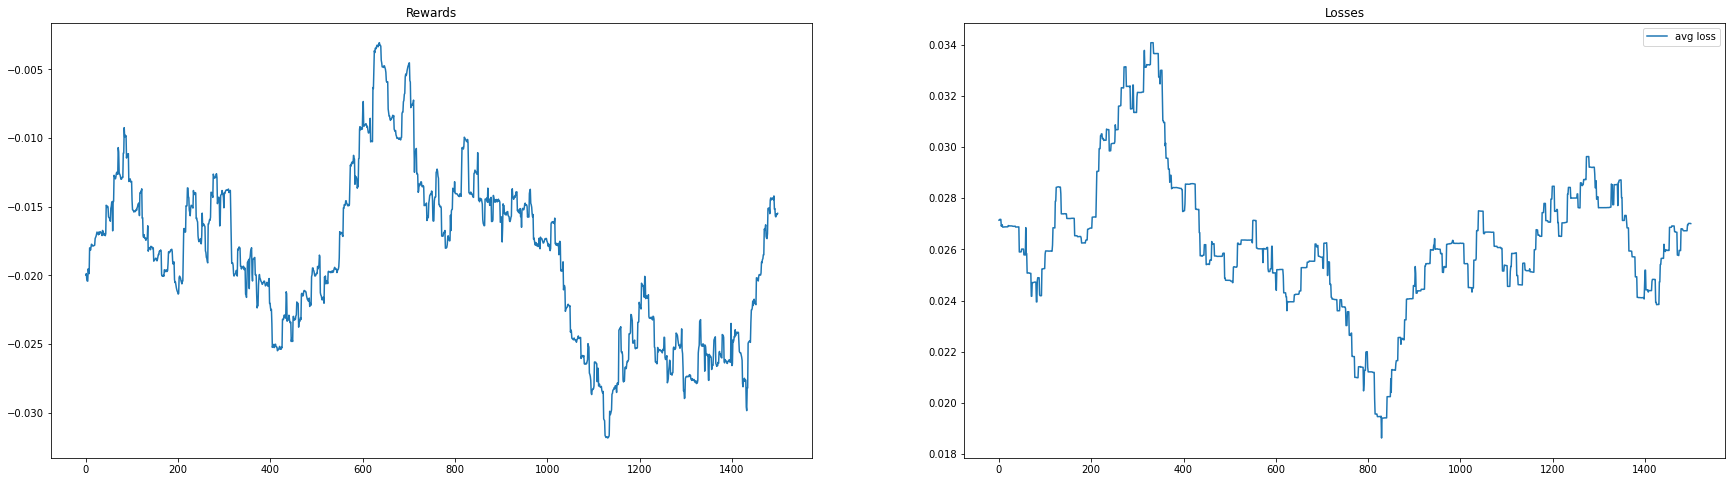

In [56]:
fig = plt.figure(figsize=[30,8])

ax2 = fig.add_subplot(121)
ax2.plot(running_mean(rewards, window=500), label="avg reward")
ax2.set_title("Rewards")

ax3 = fig.add_subplot(122)
ax3.plot(running_mean(losses, window=500), label="avg loss")
ax3.set_title("Losses")
plt.legend()

In [57]:
print('Total reward:', sum(rewards))

Total reward: -36.46511083131082


In [39]:
sum(y_hat_['normal'])

71.49710443002868